## Imports

In [1]:
import pandas as pd
import nltk
# nltk.download('wordnet')
import icrawler
from icrawler.builtin import BingImageCrawler

In [2]:
import compsyn as cs
import os
import PIL
from PIL import Image
import numpy as np
from compsyn.helperfunctions import settings, search_and_download, run_google_vision, write_img_classifications_to_file
from compsyn.wordnet_functions import get_wordnet_tree_data

In [3]:
# normally not a good idea to ignore all warnings, but the only warnings in this nb are matplotlib user warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Load words from experiments

In [4]:
dfColor = pd.read_csv(r'../../../data/norming/colorPickerData.csv')
cols = ["word", "participantID", "button_pressed", "response_munsell", "response_r", "response_g", "response_b", "condition"]
dfColor = dfColor[cols]

# identify target words
uniqueWords = set(dfColor['word'].to_list())
colorWords = set(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink'])
targetWords = list(uniqueWords-colorWords)

## Get WordNet data

In [5]:
number_images = 100 
search_terms = targetWords
filter_data = True
get_tree_data = True

In [6]:
home = os.getcwd()

In [7]:
n_categories = 5

In [8]:
# if get_tree_data: 
#     print("Adding Search Terms from Tree")
#     tree_search_terms, raw_tree, all_tree_data = get_wordnet_tree_data(search_terms, home)
#     search_terms = tree_search_terms[:n_categories]
#     print(search_terms)
#     print(all_tree_data.head())

## Download images using BingImageCrawler

In [9]:
for word in targetWords:
    print(word)
    bing_crawler = BingImageCrawler(storage={'root_dir': './downloads/%s' % word})
    bing_crawler.crawl(keyword=word, max_num=100)

2021-01-30 18:16:10,130 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:16:10,138 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:16:10,144 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:16:10,147 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:16:10,167 - INFO - icrawler.crawler - starting 1 downloader threads...


iron


2021-01-30 18:16:10,640 - INFO - parser - parsing result page https://www.bing.com/images/async?q=iron&first=0
2021-01-30 18:16:10,723 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:16:10,730 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:16:10,738 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:16:10,746 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:16:10,754 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:16:10,762 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:16:10,770 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:16:10,778 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:16:10,939 - INFO - downloader - image #9	https://i.ytimg.com/vi/xPG0O9NqJwk/maxresdefault.jpg
2021-01-30 18:16:10,967 - INFO - downloader - image #10	https://i.ytimg.com/vi/ojnnqbhI-c8/maxresdefault.jpg
2021-01-30 18:16:11,038 - INFO - downloa

2021-01-30 18:16:40,658 - INFO - downloader - image #62	https://www.screengeek.net/wp-content/uploads/2016/07/is-iron-man-becoming-marvel-s-greatest-villain-527622.jpg
2021-01-30 18:16:41,831 - INFO - downloader - image #63	https://industrialin.com/sites/default/files/news/Kumba-Iron-Ore.jpg
2021-01-30 18:16:42,908 - INFO - downloader - image #64	https://www.thechemicalengineer.com/media/14796/iron-ore-pellets.jpg
2021-01-30 18:16:43,984 - INFO - downloader - image #65	https://www.fortressofsolitude.co.za/wp-content/uploads/2020/01/Tony-Stark-Iron-Man.jpg
2021-01-30 18:16:45,645 - INFO - downloader - image #66	https://harley-davidson-legnano.it/wp-content/uploads/2018/09/19-sportster-iron-883-hdi-gallery-2.jpg
2021-01-30 18:16:45,768 - INFO - downloader - image #67	https://i.ytimg.com/vi/dUBwXfQkT9Q/maxresdefault.jpg
2021-01-30 18:16:45,870 - INFO - downloader - image #68	https://assets1.ignimgs.com/2020/09/01/ironharvest-keyart-blogroll-1598993315671.jpg
2021-01-30 18:16:46,096 - INFO

warehouse


2021-01-30 18:17:04,655 - INFO - parser - parsing result page https://www.bing.com/images/async?q=warehouse&first=0
2021-01-30 18:17:04,751 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:17:04,759 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:17:04,767 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:17:04,775 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:17:04,783 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:17:04,791 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:17:04,799 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:17:04,807 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:17:05,558 - INFO - downloader - image #9	https://www.portcalls.com/wp-content/uploads/2019/01/Airspeed-warehouse.jpg
2021-01-30 18:17:08,368 - INFO - downloader - image #10	http://www.quantumsilicones.com/wp-content/uploads/2013/03/New-QS

2021-01-30 18:18:07,883 - INFO - downloader - image #57	http://www.dixontransport.com/web/app/uploads/160826_JB1_023-1920x0-c-default.jpg
2021-01-30 18:18:09,176 - INFO - downloader - image #58	https://www.conger.com/wp-content/uploads/2018/12/warehouse-space-optimization-e1565703415556.jpg
2021-01-30 18:18:09,365 - INFO - downloader - image #59	https://thumbs.dreamstime.com/z/modern-warehouse-forklift-forklifts-33127744.jpg
2021-01-30 18:18:10,924 - INFO - downloader - image #60	https://www.allthingssupplychain.com/wp-content/uploads/2018/01/blog_warehouse_madden_forklift.jpg
2021-01-30 18:18:13,182 - INFO - downloader - image #61	http://www.oecl.sg/wp-content/uploads/2016/11/warehouse.jpg
2021-01-30 18:18:15,733 - INFO - downloader - image #62	http://www.xpedinternational.com/wp-content/uploads/Warehouse-Hamburg-Forklift.jpg
2021-01-30 18:18:16,250 - INFO - downloader - image #63	https://www.fmglobal.com/~/media/Images/FMGlobal/970x555/2018/2018_Automated-Warehouse_970x555.jpg
2021-0

discretion


2021-01-30 18:18:32,986 - INFO - parser - parsing result page https://www.bing.com/images/async?q=discretion&first=0
2021-01-30 18:18:33,058 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:18:33,066 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:18:33,074 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:18:33,082 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:18:33,090 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:18:33,098 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:18:33,106 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:18:33,114 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:18:33,725 - INFO - downloader - image #9	http://www.quotehd.com/imagequotes/authors46/hannah-moore-quote-perish-discretion-when-it-interferes-with-duty.jpg
2021-01-30 18:18:33,962 - INFO - downloader - image #10	http://qtoptens.com/wp-co

2021-01-30 18:19:01,187 - INFO - downloader - image #58	https://www.chaimbentorah.com/wp-content/uploads/2019/05/Discretion-300x255.jpg
2021-01-30 18:19:01,275 - INFO - downloader - image #59	http://image.slidesharecdn.com/administrativediscretion-150426064406-conversion-gate01/95/administrative-discretion-2-638.jpg
2021-01-30 18:19:01,469 - INFO - downloader - image #60	https://img-aws.ehowcdn.com/640x640/s3-us-west-1.amazonaws.com/contentlab.studiod/getty/cache.gettyimages.com/7300f4134e054d50bea88564df9be5fe.jpg
2021-01-30 18:19:02,080 - INFO - parser - parsing result page https://www.bing.com/images/async?q=discretion&first=80
2021-01-30 18:19:02,733 - INFO - downloader - image #61	http://www.missionmindedmanagement.com/wp-content/uploads/2009/02/time-span-of-discretion.jpg
2021-01-30 18:19:03,101 - INFO - downloader - image #62	http://4.bp.blogspot.com/-bKvUSpPkzTM/U-u4R1Lm9rI/AAAAAAAAAkI/xXhTbzDWf3A/s1600/Police%2Band%2BDiscretion.jpg
2021-01-30 18:19:03,208 - INFO - downloader -

defiance


2021-01-30 18:19:17,088 - INFO - parser - parsing result page https://www.bing.com/images/async?q=defiance&first=0
2021-01-30 18:19:17,177 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:19:17,185 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:19:17,193 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:19:17,201 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:19:17,209 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:19:17,217 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:19:17,228 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:19:17,240 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:19:17,405 - INFO - downloader - image #9	https://optihacks.com/wp-content/uploads/defiance_cheats.jpg
2021-01-30 18:19:17,738 - INFO - downloader - image #10	http://www.entertainmentwallpaper.com/images/desktops/movie/tv-defiance02.jpg
202

2021-01-30 18:19:52,961 - INFO - parser - parsing result page https://www.bing.com/images/async?q=defiance&first=80
2021-01-30 18:19:53,867 - INFO - downloader - image #60	https://makeupmag.com/wp-content/uploads/images/defiance-4_600px.jpg
2021-01-30 18:19:54,253 - INFO - downloader - image #61	https://vignette3.wikia.nocookie.net/steamtradingcards/images/0/09/Defiance_Artwork_5.jpg
2021-01-30 18:19:55,251 - INFO - downloader - image #62	https://wallpapers-all.com/uploads/posts/2017-03/27_defiance.jpg
2021-01-30 18:19:55,816 - INFO - downloader - image #63	https://shutupandwatchthemovie.files.wordpress.com/2010/08/defiance20.jpg
2021-01-30 18:19:55,951 - INFO - downloader - image #64	https://i.ytimg.com/vi/5doOzmXvjjY/maxresdefault.jpg
2021-01-30 18:19:56,140 - INFO - downloader - image #65	https://upload.wikimedia.org/wikipedia/en/6/65/Everything_is_Broken_%28Defiance%29.jpg
2021-01-30 18:19:56,319 - INFO - downloader - image #66	http://i.huffpost.com/gen/1089910/images/o-DEFIANCE-RA

romance


2021-01-30 18:20:06,205 - INFO - parser - parsing result page https://www.bing.com/images/async?q=romance&first=0
2021-01-30 18:20:06,302 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:20:06,310 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:20:06,318 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:20:06,326 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:20:06,334 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:20:06,342 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:20:06,348 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:20:06,362 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:20:06,488 - INFO - downloader - image #9	http://media1.santabanta.com/full1/Emotions/Romance/romance-49a.jpg
2021-01-30 18:20:09,974 - INFO - downloader - image #10	https://shaeestellaphoto.com/wp-content/uploads/2017/11/Romance-BW02-BA-13.

2021-01-30 18:20:42,656 - INFO - downloader - image #59	https://www.tvovermind.com/wp-content/uploads/2017/12/True-romance.jpg
2021-01-30 18:20:42,782 - INFO - downloader - image #60	https://i.ytimg.com/vi/tSa5LOcCcYw/maxresdefault.jpg
2021-01-30 18:20:42,903 - INFO - downloader - image #61	https://upload.wikimedia.org/wikipedia/commons/1/19/Romance_(1920)_-_Sydney_%26_Keane.jpg
2021-01-30 18:20:44,084 - INFO - downloader - image #62	http://www.myteenguide.com/wp-content/uploads/2015/10/teen-romance.jpg
2021-01-30 18:20:44,177 - INFO - downloader - image #63	https://i.ytimg.com/vi/9md94XuQJ3M/maxresdefault.jpg
2021-01-30 18:20:44,533 - INFO - downloader - image #64	http://4.bp.blogspot.com/-88aMQfusbCA/Vi-QDl0sExI/AAAAAAAABaQ/2JraLZPROIQ/s1600/Tdyalmodsm.jpg
2021-01-30 18:20:45,228 - INFO - parser - parsing result page https://www.bing.com/images/async?q=romance&first=80
2021-01-30 18:20:45,989 - INFO - downloader - image #65	http://media1.santabanta.com/full1/Emotions/Romance/romance-

tree


2021-01-30 18:21:16,416 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tree&first=0
2021-01-30 18:21:16,472 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:21:16,478 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:21:16,483 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:21:16,488 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:21:16,493 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:21:16,498 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:21:16,503 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:21:16,508 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:21:16,627 - INFO - downloader - image #9	https://upload.wikimedia.org/wikipedia/commons/2/24/Sorbus_torminalis_Full_tree.jpg
2021-01-30 18:21:16,689 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/c

2021-01-30 18:22:00,859 - INFO - downloader - image #55	https://selectree.calpoly.edu/images/1000/81/original/pinus-thunbergii-tree.jpg
2021-01-30 18:22:02,567 - INFO - downloader - image #56	https://selectree.calpoly.edu/images/0100/21/original/acer-saccharum-green-mountain-tree-fall.jpg
2021-01-30 18:22:02,754 - INFO - downloader - image #57	https://3.bp.blogspot.com/-P3vN4l1b_v4/T92Om4hwBVI/AAAAAAAAA-4/IEMLBBO0fhc/s1600/neem+tree+2.jpg
2021-01-30 18:22:03,044 - INFO - downloader - image #58	http://eso.mmo-fashion.com/wp-content/uploads/sites/2/2019/05/Tree-Towering-Iroko-Superior-1.jpg
2021-01-30 18:22:03,118 - INFO - downloader - image #59	http://www.thetreecenter.com/wp-content/uploads/2014/06/quaking-aspen-2.jpg
2021-01-30 18:22:03,769 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tree&first=80
2021-01-30 18:22:04,851 - INFO - downloader - image #60	https://www.tree-shop.co.uk/wp-content/uploads/2019/09/purple-beech17k-2-1024x768.jpg
2021-01-30 18:22:0

revolt


2021-01-30 18:22:18,589 - INFO - parser - parsing result page https://www.bing.com/images/async?q=revolt&first=0
2021-01-30 18:22:18,629 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:22:18,630 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:22:18,632 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:22:18,633 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:22:18,634 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:22:18,636 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:22:18,637 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:22:18,638 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:22:18,698 - INFO - downloader - image #9	https://image.tmdb.org/t/p/w500/eM2zipCkAXhp0BZF2noDp7bRFgV.jpg
2021-01-30 18:22:19,357 - INFO - downloader - image #10	https://upload.wikimedia.org/wikipedia/en/e/eb/NCIS_Revolt_Album.jpg
2021-01-30 

2021-01-30 18:22:57,277 - INFO - downloader - image #42	https://i.ytimg.com/vi/c70ud2JIyjM/maxresdefault.jpg
2021-01-30 18:22:57,648 - INFO - downloader - image #43	https://r.mprd.se/fup/up/152-Revolt-1.jpg
2021-01-30 18:22:57,757 - INFO - downloader - image #44	https://i.ytimg.com/vi/GPIyu5lekJ4/maxresdefault.jpg
2021-01-30 18:22:57,882 - INFO - parser - parsing result page https://www.bing.com/images/async?q=revolt&first=80
2021-01-30 18:22:57,915 - INFO - downloader - image #45	https://i.ytimg.com/vi/xU6S_9y4Ps0/maxresdefault.jpg
2021-01-30 18:22:58,555 - INFO - downloader - image #46	https://hiddenschoolstour.files.wordpress.com/2013/09/peasants-revolt-1381.jpg
2021-01-30 18:22:58,620 - INFO - downloader - image #47	https://upload.wikimedia.org/wikipedia/en/9/94/Youth_in_Revolt_Poster.jpg
2021-01-30 18:22:58,914 - INFO - downloader - image #48	https://urbanintellectuals.com/wp-content/uploads/2016/11/CreoleSlaveRevolt.jpg
2021-01-30 18:22:59,378 - INFO - downloader - image #49	http

muscle


2021-01-30 18:23:17,671 - INFO - parser - parsing result page https://www.bing.com/images/async?q=muscle&first=0
2021-01-30 18:23:17,852 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:23:17,854 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:23:17,858 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:23:17,860 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:23:17,863 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:23:17,865 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:23:17,868 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:23:17,869 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:23:17,970 - INFO - downloader - image #9	https://4.bp.blogspot.com/-QjBOQfEShfo/Wft52AH0imI/AAAAAAAAjOo/eue0kBMR9n0bq3VgOT7uq72P1iBXX4xXACLcBGAs/s1600/18423709_1479493015447296_5056902615885403026_n.jpg
2021-01-30 18:23:20,096 - INFO - downl

2021-01-30 18:23:44,170 - INFO - downloader - image #59	https://ehonami.blob.core.windows.net/media/2016/10/6-things-muscle-cramps-say-health-800x600.jpg
2021-01-30 18:23:45,711 - INFO - downloader - image #60	https://maximummusclereport.com/wp-content/uploads/2017/08/DSC_1134.jpg
2021-01-30 18:23:46,301 - INFO - downloader - image #61	http://fc03.deviantart.net/fs71/f/2009/359/7/5/MuscleMorph__Milo_Ventimiglia_by_dolphinbad.jpg
2021-01-30 18:23:46,532 - INFO - parser - parsing result page https://www.bing.com/images/async?q=muscle&first=80
2021-01-30 18:23:46,694 - INFO - downloader - image #62	http://www.bigdonsboys.com/h2/brian_muscle_daddy/images/img_2449.jpg
2021-01-30 18:23:48,024 - INFO - downloader - image #63	http://gallery.rxmuscle.com/newgallery/JB5_1301_GTZCNWDZTW.jpg
2021-01-30 18:23:48,545 - INFO - downloader - image #64	https://cdn-ami-drupal.heartyhosting.com/sites/muscleandfitness.com/files/media/plate-raise-1109.jpg
2021-01-30 18:23:49,690 - INFO - downloader - image 

insanity


2021-01-30 18:23:58,728 - INFO - parser - parsing result page https://www.bing.com/images/async?q=insanity&first=0
2021-01-30 18:23:58,761 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:23:58,763 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:23:58,764 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:23:58,766 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:23:58,769 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:23:58,770 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:23:58,771 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:23:58,773 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:23:59,091 - INFO - downloader - image #9	http://transformpersonaltraining.co.uk/photos/insanity.jpg
2021-01-30 18:24:00,732 - INFO - downloader - image #10	https://cms-prod-data-1488327456-uploads-mc9utftqabj4.s3.amazonaws.com/uploads/2016

2021-01-30 18:24:36,572 - INFO - downloader - image #60	https://i.ytimg.com/vi/SGdFTWnsC88/maxresdefault.jpg
2021-01-30 18:24:36,790 - INFO - downloader - image #61	https://fitbottomedgirls.com/wp-content/uploads/2012/03/insanity-group-shot.jpg
2021-01-30 18:24:36,904 - INFO - downloader - image #62	https://upload.wikimedia.org/wikipedia/en/2/26/Tony_MacAlpine_-_1997_-_Live_Insanity.jpg
2021-01-30 18:24:37,005 - INFO - downloader - image #63	https://i.ytimg.com/vi/MnBaN3SlvKg/maxresdefault.jpg
2021-01-30 18:24:37,098 - INFO - downloader - image #64	https://i.ytimg.com/vi/aB8hvoYDpfk/maxresdefault.jpg
2021-01-30 18:24:37,746 - INFO - downloader - image #65	http://www.imperfecthomemaker.com/wp-content/uploads/2014/03/insanity-quote.jpg
2021-01-30 18:24:38,225 - INFO - downloader - image #66	https://1.bp.blogspot.com/-cbD3x7467TM/UZNdODA6hZI/AAAAAAAABBI/deV55Vpoydo/s1600/insanity.jpg
2021-01-30 18:24:38,382 - INFO - downloader - image #67	http://dndspeak.com/wp-content/uploads/2017/12/ins

windmill


2021-01-30 18:24:47,840 - INFO - parser - parsing result page https://www.bing.com/images/async?q=windmill&first=0
2021-01-30 18:24:47,870 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:24:47,872 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:24:47,876 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:24:47,880 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:24:47,881 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:24:47,884 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:24:47,885 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:24:47,886 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:24:48,112 - INFO - downloader - image #9	https://lrzx641zf4f141zb9342prt6-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/murphy-windmill-and-millwright-cottage.jpg
2021-01-30 18:24:48,586 - INFO - downloader - image #10	https://www.the

2021-01-30 18:25:45,187 - INFO - downloader - image #55	https://upload.wikimedia.org/wikipedia/commons/5/51/Denver_Windmill.jpg
2021-01-30 18:25:45,647 - ERROR - downloader - Response status code 403, file https://www.dayoutwiththekids.co.uk/media/11651/37540-wilton-windmill-wilton-01.jpg
2021-01-30 18:25:46,672 - INFO - downloader - image #56	https://www.backwoodshome.com/bhm/wp-content/uploads/2015/12/windmill-1061275_1920.jpg
2021-01-30 18:25:46,806 - ERROR - downloader - Response status code 403, file https://c.wallhere.com/photos/32/9f/old_light_sunset_sun_holland_classic_mill_windmill-982940.jpg
2021-01-30 18:25:47,210 - INFO - downloader - image #57	http://www.about-bicycles.com/fox-river-trail-pics/Fox-River-Trail-2011-Windmill3.jpg
2021-01-30 18:25:47,666 - INFO - downloader - image #58	http://presidential-aviation.com/wp-content/uploads/page/hook-windmill-1.jpg
2021-01-30 18:25:47,768 - INFO - downloader - image #59	https://upload.wikimedia.org/wikipedia/commons/6/63/Thrigby_

dread


2021-01-30 18:25:53,860 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dread&first=0
2021-01-30 18:25:53,887 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:25:53,889 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:25:53,890 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:25:53,890 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:25:53,891 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:25:53,892 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:25:53,893 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:25:53,894 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:25:53,981 - INFO - downloader - image #9	https://i.ytimg.com/vi/sqXaJnsx24c/maxresdefault.jpg
2021-01-30 18:25:54,938 - ERROR - downloader - Response status code 404, file https://hairstyleforwomen.net/wp-content/uploads/2015/12/dread-locks-i

2021-01-30 18:26:20,883 - ERROR - downloader - Exception caught when downloading file https://image.samsbeauty.com/common/productimages/00071024/B_FreeTress-Equal-urban-soft-dread_2.jpg, error: HTTPSConnectionPool(host='image.samsbeauty.com', port=443): Max retries exceeded with url: /common/productimages/00071024/B_FreeTress-Equal-urban-soft-dread_2.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))), remaining retry times: 0
2021-01-30 18:26:21,119 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dread&first=60
2021-01-30 18:26:21,220 - INFO - downloader - image #52	http://www.ebonyline.com/media/catalog/product/cache/1/image/1800x/040ec09b1e35df139433887a97daa66f/j/a/janet-collection-braid-style-wig-softex-dread-loc-hair.jpg
2021-01-30 18:26:22,001 - INFO - downloader - image #53	https://www.mens-hairstyle.com/wp-content/uploads/2020/01/7-dre

reassurance


2021-01-30 18:27:05,004 - INFO - parser - parsing result page https://www.bing.com/images/async?q=reassurance&first=0
2021-01-30 18:27:05,066 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:27:05,067 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:27:05,069 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:27:05,070 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:27:05,071 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:27:05,073 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:27:05,074 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:27:05,075 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:27:05,160 - INFO - downloader - image #9	https://i.ytimg.com/vi/aqkVBFVFuow/maxresdefault.jpg
2021-01-30 18:27:05,252 - INFO - downloader - image #10	https://i.ytimg.com/vi/c_pBiJ25_Sg/maxresdefault.jpg
2021-01-30 18:27:08,350 - INFO - 

2021-01-30 18:27:34,543 - INFO - downloader - image #58	http://image1.slideserve.com/2214047/reassurance-noun-n.jpg
2021-01-30 18:27:35,606 - INFO - downloader - image #59	https://lifeinabind.files.wordpress.com/2015/07/therapy-and-reassurance.jpg
2021-01-30 18:27:36,599 - INFO - downloader - image #60	https://gracefellowshipinternational.com/wp-content/uploads/2014/06/blessed_reassurance.jpg
2021-01-30 18:27:36,744 - INFO - downloader - image #61	https://i.ytimg.com/vi/YZIpHbH0yJg/maxresdefault.jpg
2021-01-30 18:27:36,797 - INFO - downloader - image #62	https://i.pinimg.com/736x/c0/ca/1c/c0ca1c16b9e0a9ef48d1541495ba735b--joy-quotes-beach-quotes.jpg
2021-01-30 18:27:37,299 - INFO - downloader - image #63	https://i0.wp.com/www.dancingthroughthepain.com/wp-content/uploads/2019/06/Reassurance.jpg
2021-01-30 18:27:37,335 - INFO - downloader - image #64	https://i.ytimg.com/vi/ZxBfsLlXr6A/maxresdefault.jpg
2021-01-30 18:27:37,614 - ERROR - downloader - Response status code 404, file https://

cornflour


2021-01-30 18:27:46,135 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cornflour&first=0
2021-01-30 18:27:46,200 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:27:46,202 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:27:46,203 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:27:46,204 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:27:46,205 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:27:46,206 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:27:46,207 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:27:46,208 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:27:46,389 - INFO - downloader - image #9	http://ichef.bbci.co.uk/food/ic/food_16x9_608/foods/c/cornflour_16x9.jpg
2021-01-30 18:27:46,493 - INFO - downloader - image #10	https://www.stayathomemum.com.au/wp-content/uploads/2015/03/cornflou

2021-01-30 18:28:28,780 - INFO - downloader - image #58	http://www.oldshopstuff.com/Portals/49/ListingImages/FullSize/43423.jpg
2021-01-30 18:28:31,159 - INFO - downloader - image #59	https://www.seingayhar.com/image/cache/catalog/Product/Revise/Cooking Ingredients/37 Knorr Cornflour 700G-1000x1000.jpg
2021-01-30 18:28:36,165 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:28:36,166 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:28:36,836 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 18:28:36,849 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:28:36,851 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:28:36,852 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:28:36,852 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:28:36,854 - INFO - icrawler.crawler - starting 1 downloader threads...


absurdity


2021-01-30 18:28:37,130 - INFO - parser - parsing result page https://www.bing.com/images/async?q=absurdity&first=0
2021-01-30 18:28:37,171 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:28:37,174 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:28:37,175 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:28:37,176 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:28:37,177 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:28:37,178 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:28:37,179 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:28:37,180 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:28:37,181 - INFO - downloader - skip downloading file 000009.jpg
2021-01-30 18:28:37,182 - INFO - downloader - skip downloading file 000010.jpg
2021-01-30 18:28:37,183 - INFO - downloader - skip downloading file 000011.jpg
2021-01-30 18:2

2021-01-30 18:28:41,222 - INFO - downloader - image #90	https://pocket-image-cache.com/2000x/https%3A%2F%2Fs3.amazonaws.com%2Fpocket-syndicated-images%2Farticles%2F1505%2F1567542458_albertcamus.jpg
2021-01-30 18:28:41,930 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:28:41,932 - INFO - parser - thread parser-001 exit
2021-01-30 18:28:41,937 - INFO - downloader - image #91	https://www.azquotes.com/picture-quotes/quote-accepting-the-absurdity-of-everything-around-us-is-one-step-a-necessary-experience-it-albert-camus-49-54-48.jpg
2021-01-30 18:28:42,030 - INFO - downloader - image #92	https://manybooks.net/sites/default/files/styles/220x330sc/public/old-covers/cover-orig-25675.jpg
2021-01-30 18:28:42,168 - INFO - downloader - image #93	https://images.gr-assets.com/users/1456417714p2/32594560.jpg
2021-01-30 18:28:47,173 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:28:47,174 - INFO - downloader - thread downloader-001

train


2021-01-30 18:28:48,229 - INFO - parser - parsing result page https://www.bing.com/images/async?q=train&first=0
2021-01-30 18:28:48,302 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:28:48,303 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:28:48,305 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:28:48,306 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:28:48,307 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:28:48,308 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:28:48,309 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:28:48,310 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:28:48,855 - INFO - downloader - image #9	http://www.trainsimmods.com/wp-content/uploads/2017/06/DB-BR-361-v1.0-Diesel-Locomotive-2.jpg
2021-01-30 18:28:54,145 - INFO - downloader - image #10	https://www.interrail.eu/content/dam/images/interra

2021-01-30 18:29:20,548 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Penn_Central_train_405_at_Worcester%2C_September_1968.jpg
2021-01-30 18:29:20,851 - INFO - downloader - image #37	http://www.destination360.com/north-america/us/california/napa/images/s/napa-valley-wine-train.jpg
2021-01-30 18:29:21,667 - INFO - downloader - image #38	http://www.saga.co.uk/contentlibrary/saga/publishing/verticals/money/spending/travel/cut-the-cost-of-travelling-by-train.jpg
2021-01-30 18:29:22,540 - INFO - downloader - image #39	https://aerosoft-shop.com/shop-rd/bilder/screenshots/train/london-faversham/london-faversham-02.jpg
2021-01-30 18:29:23,298 - INFO - downloader - image #40	https://joneshacker.com/wp-content/uploads/2017/12/bigstock-Train-Injury.jpg
2021-01-30 18:29:23,858 - INFO - downloader - image #41	https://amtrakdowneaster.com/sites/default/files/inline-images/marsh_train.jpg
2021-01-30 18:29:23,956 - ERROR - downloader -

2021-01-30 18:32:04,852 - INFO - downloader - image #33	https://cdn.tobi.com/product_images/lg/1/black-gold-this-feeling-double-buckle-belt.jpg
2021-01-30 18:32:04,935 - INFO - downloader - image #34	https://www.roguefitness.com/media/catalog/product/cache/1/image/1500x1500/472321edac810f9b2465a359d8cdc0b5/r/o/rogue-leather-lifting-belt-web3_1_1.jpg
2021-01-30 18:32:05,250 - INFO - downloader - image #35	https://cdn.tobi.com/product_images/md/2/black-cassadee-studded-skinny-belt.jpg
2021-01-30 18:32:05,511 - INFO - downloader - image #36	http://cdn.blessthisstuff.com/imagens/stuff/bowen-belt-knifes-2.jpg
2021-01-30 18:32:05,527 - INFO - parser - parsing result page https://www.bing.com/images/async?q=belt&first=60
2021-01-30 18:32:05,835 - INFO - downloader - image #37	https://www.homestratosphere.com/wp-content/uploads/2018/06/hd-adjustable-tool-belt-060718.jpg
2021-01-30 18:32:06,851 - INFO - downloader - image #38	https://w8fit.com/wp-content/uploads/2017/11/w8fit-belt.jpg
2021-01-3

building


2021-01-30 18:32:30,481 - INFO - parser - parsing result page https://www.bing.com/images/async?q=building&first=0
2021-01-30 18:32:30,527 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:32:30,529 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:32:30,530 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:32:30,532 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:32:30,533 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:32:30,534 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:32:30,536 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:32:30,537 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:32:30,623 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Empire_State_Building_by_David_Shankbone_crop.jpg
2021-01-30 18:32:30,768 - INFO - downloader - image #9	http://s3.am

2021-01-30 18:32:59,363 - INFO - downloader - image #53	http://images.skyscrapercenter.com/building/seattletower1.jpg
2021-01-30 18:32:59,494 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Middough_Brothers-Insurance_Exchange_Building.jpg
2021-01-30 18:32:59,826 - INFO - downloader - image #54	http://images.skyscrapercenter.com/building/nyc11.jpg
2021-01-30 18:33:00,113 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Candler_Building_Atlanta.jpg
2021-01-30 18:33:00,229 - INFO - downloader - image #55	https://upload.wikimedia.org/wikipedia/commons/2/29/GE_Building_Oct_2005.jpg
2021-01-30 18:33:00,555 - INFO - downloader - image #56	https://images.skyscrapercenter.com/building/ny019.jpg
2021-01-30 18:33:00,734 - INFO - downloader - image #57	http://images.skyscrapercenter.com/building/ny0006-0.jpg
2021-01-30 18:33:01,775 - INFO - downloader - image #58	http://i

disgust


2021-01-30 18:33:32,637 - INFO - parser - parsing result page https://www.bing.com/images/async?q=disgust&first=0
2021-01-30 18:33:32,693 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:33:32,695 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:33:32,696 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:33:32,697 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:33:32,698 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:33:32,700 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:33:32,701 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:33:32,702 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:33:33,189 - INFO - downloader - image #9	http://www.jannilla.se/wp-content/uploads/2012/10/Disgust.jpg
2021-01-30 18:33:33,711 - INFO - downloader - image #10	https://blurppy.files.wordpress.com/2015/01/61203_disgust.jpg
2021-01-30 18:33:33

2021-01-30 18:33:59,594 - ERROR - downloader - Exception caught when downloading file http://www.bl-expert.com/wp-content/uploads/2013/06/surprice-disgust.jpg, error: HTTPConnectionPool(host='www.bl-expert.com', port=80): Max retries exceeded with url: /wp-content/uploads/2013/06/surprice-disgust.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc88e22c670>: Failed to establish a new connection: [Errno 111] Connection refused')), remaining retry times: 1
2021-01-30 18:33:59,720 - ERROR - downloader - Exception caught when downloading file http://www.bl-expert.com/wp-content/uploads/2013/06/surprice-disgust.jpg, error: HTTPConnectionPool(host='www.bl-expert.com', port=80): Max retries exceeded with url: /wp-content/uploads/2013/06/surprice-disgust.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc88e22ca00>: Failed to establish a new connection: [Errno 111] Connection refused')), remaining retry times: 0
2021-01-30 18:

hate


2021-01-30 18:34:06,632 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hate&first=0
2021-01-30 18:34:06,705 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:34:06,707 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:34:06,710 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:34:06,712 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:34:06,716 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:34:06,718 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:34:06,720 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:34:06,722 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:34:07,345 - INFO - downloader - image #9	https://sma.ie/wp-content/uploads/2018/04/Love-Hate.jpg
2021-01-30 18:34:08,347 - INFO - downloader - image #10	https://julieamarxhausen.files.wordpress.com/2011/02/love-hate.jpg
2021-01-30 18:34:09,485

2021-01-30 18:34:47,936 - INFO - downloader - image #52	https://bretcontreras.com/wp-content/uploads/Haters-Gonna-Hate.jpg
2021-01-30 18:34:48,055 - INFO - downloader - image #53	https://lawyerscommittee.org/wp-content/uploads/2017/03/DsXj6RYXgAImwzG.jpg
2021-01-30 18:34:49,823 - INFO - downloader - image #54	http://fatchicksings.files.wordpress.com/2013/06/haters-gonna-hate-cat.jpg
2021-01-30 18:34:50,312 - INFO - downloader - image #55	https://northantsrec2013.files.wordpress.com/2015/07/hatecrimes-mgn.jpg
2021-01-30 18:34:50,382 - INFO - downloader - image #56	https://upload.wikimedia.org/wikipedia/en/1/17/Hate-issue1.jpg
2021-01-30 18:34:50,510 - INFO - downloader - image #57	https://otterlover58.files.wordpress.com/2015/06/hate.jpg
2021-01-30 18:34:50,640 - INFO - downloader - image #58	https://www.desicomments.com/wp-content/uploads/2017/04/I-hate-monday.jpg
2021-01-30 18:34:51,138 - INFO - downloader - image #59	https://www.sott.net/image/s16/328045/full/Hate_crime.jpg
2021-01-3

regret


2021-01-30 18:34:57,699 - INFO - parser - parsing result page https://www.bing.com/images/async?q=regret&first=0
2021-01-30 18:34:57,729 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:34:57,731 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:34:57,733 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:34:57,734 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:34:57,736 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:34:57,737 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:34:57,738 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:34:57,740 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:34:57,849 - INFO - downloader - image #9	http://www.marcandangel.com/images/10-you-will-regret.jpg
2021-01-30 18:34:59,488 - INFO - downloader - image #10	https://www.risaleenglish.com/panel/uploads/product_v/Regret-or-Thanks.jpg
2021-01-30 

2021-01-30 18:35:22,180 - INFO - downloader - image #58	https://adaa.org/sites/default/files/2018-11/regret_loss_grief_recovery.jpg
2021-01-30 18:35:23,547 - INFO - downloader - image #59	https://inspiyr.com/wp-content/uploads/2012/04/regret_nothing.jpg
2021-01-30 18:35:23,621 - INFO - downloader - image #60	https://static01.nyt.com/images/2017/08/20/opinion/sunday/20krein/20krein-facebookJumbo.jpg
2021-01-30 18:35:24,405 - INFO - downloader - image #61	https://images.lifealth.com/uploads/2018/06/why-you-should-not-regret-your-decision.jpg
2021-01-30 18:35:24,584 - INFO - downloader - image #62	https://www.familyfriendpoems.com/images/hero/large/sad-regret.jpg
2021-01-30 18:35:24,725 - INFO - downloader - image #63	http://i.huffpost.com/gen/1875592/thumbs/o-REGRET-facebook.jpg
2021-01-30 18:35:25,759 - INFO - downloader - image #64	http://www.thechangeblog.com/wp-content/uploads/2012/09/career-regret.jpg
2021-01-30 18:35:25,893 - INFO - downloader - image #65	https://vice-images.vice.c

fear


2021-01-30 18:35:36,799 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fear&first=0
2021-01-30 18:35:36,856 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:35:36,859 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:35:36,860 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:35:36,862 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:35:36,863 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:35:36,864 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:35:36,866 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:35:36,867 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:35:37,079 - INFO - downloader - image #9	http://img12.deviantart.net/4ebe/i/2014/027/a/8/emotions___fear_by_coceaddict-d73y7ok.jpg
2021-01-30 18:35:37,175 - INFO - downloader - image #10	https://foreverasleep.files.wordpress.com/2013/02/fear.j

2021-01-30 18:36:06,386 - INFO - downloader - image #42	http://www.fearlessmotivation.com/wp-content/uploads/2016/01/FEAR-QUOTES.jpg
2021-01-30 18:36:07,507 - INFO - downloader - image #43	http://arabianqueen.files.wordpress.com/2012/11/fear_1-316130400_std.jpg
2021-01-30 18:36:08,281 - INFO - downloader - image #44	https://teamsylvester.com/u/2019/06/FEAR-blog-post-01.jpg
2021-01-30 18:36:09,453 - INFO - downloader - image #45	https://gaminghistory101.files.wordpress.com/2014/10/fear_2.jpg
2021-01-30 18:36:09,627 - INFO - downloader - image #46	https://virtuousgirls.files.wordpress.com/2013/02/fear.jpg
2021-01-30 18:36:09,711 - INFO - downloader - image #47	https://www.healthyplace.com/sites/default/files/uploads/2013/10/face-your-fear.jpg
2021-01-30 18:36:10,752 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fear&first=60
2021-01-30 18:36:12,832 - INFO - downloader - image #48	https://adrianasofiahernandez.files.wordpress.com/2013/02/fear11.jpg
2021-01-30 1

bread


2021-01-30 18:36:47,922 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bread&first=0
2021-01-30 18:36:47,968 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:36:47,970 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:36:47,971 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:36:47,973 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:36:47,974 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:36:47,975 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:36:47,976 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:36:47,977 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:36:48,111 - INFO - downloader - image #9	https://www.layersofhappiness.com/wp-content/uploads/2015/08/artisan-bread-21.jpg
2021-01-30 18:36:48,797 - INFO - downloader - image #10	https://oldworldgardenfarms.com/wp-content/uploads/2019/11/arti

2021-01-30 18:37:20,080 - INFO - downloader - image #61	http://chocolatewithgrace.com/wp-content/uploads/2014/05/Lemon-Blueberry-Bread-5.jpg
2021-01-30 18:37:20,327 - INFO - downloader - image #62	https://www.homecookingadventure.com/images/recipes/olive_bread_mainimage2.jpg
2021-01-30 18:37:21,285 - INFO - downloader - image #63	https://fivesilverspoons.com/wp-content/uploads/2017/11/Homemade-French-Bread-Recipe.jpg
2021-01-30 18:37:21,682 - INFO - downloader - image #64	http://retrohousewifegoesgreen.com/wp-content/uploads/2011/02/cheese-bread-pin.jpg
2021-01-30 18:37:21,986 - INFO - downloader - image #65	https://chocolatewithgrace.com/wp-content/uploads/2016/08/Easy-Classic-Zucchini-Bread-6-683x1024.jpg
2021-01-30 18:37:23,021 - INFO - downloader - image #66	http://gatherforbread.com/wp-content/uploads/2014/11/Whole-Wheat-Oatmeal-Honey-Bread-text.jpg
2021-01-30 18:37:23,260 - INFO - downloader - image #67	https://ministry-to-children.com/wp-content/uploads/2013/12/fresh-daily-bread

memory


2021-01-30 18:37:38,958 - INFO - parser - parsing result page https://www.bing.com/images/async?q=memory&first=0
2021-01-30 18:37:39,011 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:37:39,013 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:37:39,015 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:37:39,018 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:37:39,019 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:37:39,022 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:37:39,024 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:37:39,025 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:37:39,119 - INFO - downloader - image #9	https://www.consumerhealthdigest.com/wp-content/uploads/2015/02/brain-and-memory.jpg
2021-01-30 18:37:39,680 - INFO - downloader - image #10	http://kmit.in/emagazine/wp-content/uploads/2018/02/memory.

2021-01-30 18:38:08,287 - INFO - downloader - image #48	https://media-bipolar.newlifeoutlook.com/wp-content/uploads/2017/10/BipolarAndMemoryLoss-Feature.jpg
2021-01-30 18:38:08,427 - INFO - downloader - image #49	http://i.huffpost.com/gen/1177790/thumbs/o-IMPROVE-MEMORY-BRAIN-SCIENCE-facebook.jpg
2021-01-30 18:38:09,061 - INFO - downloader - image #50	https://asburyseminary.edu/wp-content/uploads/inlovingmemory.jpg
2021-01-30 18:38:10,021 - INFO - downloader - image #51	https://figandlaurel.com/wp-content/uploads/2019/09/in-loving-memory-cards.jpg
2021-01-30 18:38:10,488 - INFO - downloader - image #52	http://multibriefs.com/briefs/exclusive/0919memory.jpg
2021-01-30 18:38:14,710 - INFO - parser - parsing result page https://www.bing.com/images/async?q=memory&first=80
2021-01-30 18:38:16,623 - INFO - downloader - image #53	http://www.thenlpcompany.com/wp-content/uploads/2014/12/visualmemory.jpg
2021-01-30 18:38:16,804 - INFO - downloader - image #54	http://www.newswise.com/images/uploa

clarity


2021-01-30 18:38:36,067 - INFO - parser - parsing result page https://www.bing.com/images/async?q=clarity&first=0
2021-01-30 18:38:36,293 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:38:36,295 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:38:36,296 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:38:36,297 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:38:36,298 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:38:36,299 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:38:36,299 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:38:36,300 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:38:36,721 - INFO - downloader - image #9	https://www.gehealthcare.com/-/media/c23462ece76041a9b16a98986ddf94ee.jpg
2021-01-30 18:38:37,225 - INFO - downloader - image #10	http://www.journey-to-freedom.com/images/clarity-1.jpg
2021-01-30 18:

2021-01-30 18:39:14,717 - INFO - downloader - image #47	https://images.carscoops.com/2017/03/3db8d278-2017-honda-clarity-28.jpg
2021-01-30 18:39:15,140 - INFO - downloader - image #48	https://www.torquenews.com/sites/default/files/images/clarity_front_34.jpg
2021-01-30 18:39:15,719 - INFO - downloader - image #49	https://www.kbb.com/wp-content/uploads/2019/11/01-2019-honda-clarity-KBB-1.jpg
2021-01-30 18:39:20,772 - ERROR - downloader - Exception caught when downloading file https://cars.usnews.com/static/images/Auto/izmo/i63501041/2018_honda_clarity_angularfront.jpg, error: HTTPSConnectionPool(host='cars.usnews.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2021-01-30 18:39:25,818 - ERROR - downloader - Exception caught when downloading file https://cars.usnews.com/static/images/Auto/izmo/i63501041/2018_honda_clarity_angularfront.jpg, error: HTTPSConnectionPool(host='cars.usnews.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
20

lemon


2021-01-30 18:39:39,188 - INFO - parser - parsing result page https://www.bing.com/images/async?q=lemon&first=0
2021-01-30 18:39:39,251 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:39:39,253 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:39:39,255 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:39:39,256 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:39:39,260 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:39:39,262 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:39:39,264 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:39:39,266 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:39:40,078 - INFO - downloader - image #9	http://www.chicagonow.com/get-fit-chicago/files/2013/09/Lemon.jpg
2021-01-30 18:39:41,062 - INFO - downloader - image #10	http://lemon.press/wp-content/uploads/2016/01/DSC_0184.jpg
2021-01-30 18:39:43,

2021-01-30 18:40:07,403 - INFO - downloader - image #59	https://www.plattertalk.com/wp-content/uploads/2016/09/Lemon___Lime_Series_2_by_cazzyae.jpg
2021-01-30 18:40:09,749 - INFO - parser - parsing result page https://www.bing.com/images/async?q=lemon&first=80
2021-01-30 18:40:11,444 - ERROR - downloader - Response status code 404, file https://simplyplayfulfare.com/wp-content/uploads/2014/09/IMG_3127.jpg
2021-01-30 18:40:12,221 - ERROR - downloader - Response status code 404, file https://blogs.psychcentral.com/coming-out-crazy/files/2010/05/Just-another-lemon-tree3-e1274409653429.jpg
2021-01-30 18:40:12,629 - INFO - downloader - image #60	https://scrummylane.com/wp-content/uploads/2017/08/lemon_pudding.jpg
2021-01-30 18:40:12,944 - INFO - downloader - image #61	http://www.topinspired.com/wp-content/uploads/2015/02/lemon-souffle.jpg
2021-01-30 18:40:13,280 - ERROR - downloader - Exception caught when downloading file https://weknowyourdreams.com/images/lemon/lemon-08.jpg, error: HTTPS

glamour


2021-01-30 18:40:29,237 - INFO - parser - parsing result page https://www.bing.com/images/async?q=glamour&first=0
2021-01-30 18:40:29,295 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:40:29,297 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:40:29,299 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:40:29,300 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:40:29,301 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:40:29,303 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:40:29,304 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:40:29,306 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:40:29,727 - INFO - downloader - image #9	https://www.theimagerystudio.com/boudoir/wp-content/uploads/2017/11/Best-Boston-Female-Photographer-3.jpg
2021-01-30 18:40:30,182 - INFO - downloader - image #10	http://www.artphotobykira.com.au/wp-c

2021-01-30 18:41:06,299 - INFO - downloader - image #54	http://3.bp.blogspot.com/-Y40Rkl6ZBVo/TjZmi4iqtRI/AAAAAAAAE7U/Rx6ztIw5Fb0/s1600/PortraitGlamourOF008.jpg
2021-01-30 18:41:06,520 - INFO - downloader - image #55	http://celebmafia.com/wp-content/uploads/2016/03/gal-gadot-glamour-magazine-april-2016-issue-2.jpg
2021-01-30 18:41:07,395 - INFO - downloader - image #56	https://artwingny.files.wordpress.com/2013/05/glamour_0613_cover_final.jpg
2021-01-30 18:41:07,487 - INFO - downloader - image #57	https://thumbs.dreamstime.com/z/beauty-fashion-glamour-model-brides-dress-23439859.jpg
2021-01-30 18:41:07,802 - INFO - downloader - image #58	https://media.glamour.com/photos/5695ea1916d0dc3747eea521/master/w_1600/magazine-2009-03-19-glamour-june-2011-main.jpg
2021-01-30 18:41:08,307 - INFO - downloader - image #59	https://www.welcomenri.com/Top-News/new-set-img/actress-sexy-picturesactress-glamour12.jpg
2021-01-30 18:41:08,645 - INFO - downloader - image #60	http://static.becomegorgeous.com

mansion


2021-01-30 18:41:29,308 - INFO - parser - parsing result page https://www.bing.com/images/async?q=mansion&first=0
2021-01-30 18:41:29,371 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:41:29,373 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:41:29,375 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:41:29,376 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:41:29,378 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:41:29,379 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:41:29,380 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:41:29,382 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:41:29,471 - INFO - downloader - image #9	https://i.ytimg.com/vi/uNcs_CxRSnk/maxresdefault.jpg
2021-01-30 18:41:29,558 - INFO - downloader - image #10	https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2017/05/modern-mansion-berkshi

2021-01-30 18:41:43,700 - INFO - downloader - image #44	https://www.kriskoeller.com/photos/2011/2011-07-02-touring-the-hudson-valley-20110702kpk_8158.jpg
2021-01-30 18:41:43,965 - INFO - parser - parsing result page https://www.bing.com/images/async?q=mansion&first=60
2021-01-30 18:41:44,433 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Carson_Mansion_Eureka_California.jpg
2021-01-30 18:41:44,804 - INFO - downloader - image #45	http://cdn.onlyinyourstate.com/wp-content/uploads/2017/11/the-mansion-on-delaware.jpg
2021-01-30 18:41:45,088 - INFO - downloader - image #46	https://vignette.wikia.nocookie.net/justleafy/images/1/12/Luxury_Mansion.jpg
2021-01-30 18:41:46,707 - INFO - downloader - image #47	https://bestoftimestravel.com/wp-content/uploads/2017/02/Breakers-Mansion-Christmas.jpg
2021-01-30 18:41:47,556 - INFO - downloader - image #48	https://www.thcfriends.org/public/upload/u18/FultonMansion_Luminares_TPWD.jpg
2021-

ferret


2021-01-30 18:42:07,424 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ferret&first=0
2021-01-30 18:42:07,483 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:42:07,485 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:42:07,487 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:42:07,489 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:42:07,490 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:42:07,491 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:42:07,493 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:42:07,494 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:42:07,625 - INFO - downloader - image #9	https://www.gannett-cdn.com/indepth-static-assets/uploads/master/3486479002/fd34d304-b487-42f2-ad89-77b15f545895-ferret-cropped.jpg
2021-01-30 18:42:07,899 - INFO - downloader - image #10	https://pett

2021-01-30 18:42:41,917 - INFO - downloader - image #61	http://i0.wp.com/www.hbferretclub.co.uk/site/wp-content/uploads/2012/11/Tolly-Jones2.jpg
2021-01-30 18:42:42,174 - INFO - downloader - image #62	https://www.ferret-world.com/wp-content/uploads/2019/01/ferret-legality.jpg
2021-01-30 18:42:42,899 - INFO - downloader - image #63	https://www.jwoodvet.co.uk/wp-content/uploads/2018/08/ferret-eating.jpg
2021-01-30 18:42:43,064 - INFO - downloader - image #64	https://www.pets4homes.co.uk/images/classifieds/2016/08/04/1351471/large/3ee5fc30b0e6289a6ae244bd63de9fc7.jpg
2021-01-30 18:42:43,280 - INFO - downloader - image #65	https://www.ferret-world.com/wp-content/uploads/2018/07/AdobeStock_31659394-1024x683.jpg
2021-01-30 18:42:44,199 - INFO - downloader - image #66	https://images.wagwalkingweb.com/media/articles/ferret/hair-loss/hair-loss.jpg
2021-01-30 18:42:44,298 - INFO - downloader - image #67	https://debbietheferret.files.wordpress.com/2013/06/ferret-3.jpg
2021-01-30 18:42:44,610 - IN

imagination


2021-01-30 18:42:58,511 - INFO - parser - parsing result page https://www.bing.com/images/async?q=imagination&first=0
2021-01-30 18:42:58,560 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:42:58,562 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:42:58,564 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:42:58,565 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:42:58,567 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:42:58,568 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:42:58,570 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:42:58,571 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:42:58,988 - INFO - downloader - image #9	https://trustmeilie.files.wordpress.com/2015/04/schoolgirl-running-from-her-imagination-26513-1920x1080.jpg
2021-01-30 18:42:59,928 - INFO - downloader - image #10	https://moreenigma.files.wordpr

2021-01-30 18:43:35,261 - INFO - downloader - image #56	https://seylangecorner.files.wordpress.com/2014/02/imagination-1.jpg
2021-01-30 18:43:35,383 - INFO - downloader - image #57	https://s3.amazonaws.com/putmeinthestory/images/blog/graphics/building-reader-imagination-sm.jpg
2021-01-30 18:43:36,895 - INFO - downloader - image #58	http://www.anthonyvennbrown.com/wp-content/uploads/2012/05/iceberg_imagination-e1337491928514.jpg
2021-01-30 18:43:36,999 - INFO - downloader - image #59	http://coolvibe.com/wp-content/uploads/2010/03/destinationimagination.jpg
2021-01-30 18:43:37,883 - INFO - downloader - image #60	https://secure.parksandresorts.wdpromedia.com/media/disneyparks/blog/wp-content/uploads/2012/01/2fmt123234LARGE.jpg
2021-01-30 18:43:38,149 - INFO - downloader - image #61	https://spiritualityhealth.com/assets/images/Articles/_articleSummaryImage/imagination_Eldridge.jpg
2021-01-30 18:43:38,331 - INFO - downloader - image #62	https://www.searchquotes.com/sof/images/picture_quotes

fish


2021-01-30 18:43:48,574 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fish&first=0
2021-01-30 18:43:48,631 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:43:48,634 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:43:48,635 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:43:48,637 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:43:48,638 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:43:48,640 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:43:48,641 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:43:48,643 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:43:49,640 - INFO - downloader - image #9	https://thriftymommaramblings.com/wp-content/uploads/2017/08/saltwater-fish-1024x681.jpg
2021-01-30 18:43:50,063 - INFO - downloader - image #10	http://weknowyourdreams.com/images/fish/fish-02.jpg
2021-

2021-01-30 18:44:31,560 - INFO - downloader - image #60	https://www.aquascapeconstruction.com/uploads/IMG_0684.jpg
2021-01-30 18:44:33,866 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fish&first=80
2021-01-30 18:44:35,889 - INFO - downloader - image #61	http://www.eniscuola.net/wp-content/uploads/2013/11/migrazione/assets/5474/foto_biodiversita_23.jpg
2021-01-30 18:44:36,122 - INFO - downloader - image #62	https://www.petguide.com/wp-content/uploads/2017/11/fish-breeds.jpg
2021-01-30 18:44:36,364 - INFO - downloader - image #63	https://ourmarinespecies.com/wp-content/uploads/2019/07/hatchetfish_17.jpg
2021-01-30 18:44:36,500 - INFO - downloader - image #64	http://d279m997dpfwgl.cloudfront.net/wp/2018/03/0330_robotic-fish.jpg
2021-01-30 18:44:36,645 - INFO - downloader - image #65	http://fishkeepingadvice.com/wp-content/uploads/Damselfish.jpg
2021-01-30 18:44:36,753 - INFO - downloader - image #66	https://www.livetropicalfish.net/wp-content/uploads/2018/11/k

toast


2021-01-30 18:44:55,680 - INFO - parser - parsing result page https://www.bing.com/images/async?q=toast&first=0
2021-01-30 18:44:55,722 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:44:55,724 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:44:55,725 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:44:55,727 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:44:55,728 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:44:55,730 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:44:55,731 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:44:55,733 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:44:56,482 - INFO - downloader - image #9	http://www.yummyinspirations.net/wp-content/uploads/2016/03/Cinnamon-French-Toast-Recipe-Thumbnail.jpg
2021-01-30 18:44:56,789 - INFO - downloader - image #10	https://crustabakes.files.wordpress.com/20

2021-01-30 18:45:21,656 - INFO - downloader - image #60	http://mommymouseclubhouse.com/wp-content/uploads/2017/10/French-Toast-2.jpg
2021-01-30 18:45:23,429 - INFO - downloader - image #61	http://taylorshocks.files.wordpress.com/2010/10/challah_french_toast_21.jpg
2021-01-30 18:45:23,983 - INFO - downloader - image #62	http://www.thcfinder.com/uploads/files/medicated-french-toast-recipe-thcf-fs.jpg
2021-01-30 18:45:24,248 - INFO - downloader - image #63	https://cafedelites.com/wp-content/uploads/2018/05/French-Toast-IMAGE-22.jpg
2021-01-30 18:45:24,584 - ERROR - downloader - Exception caught when downloading file https://weknowyourdreams.com/images/toast/toast-03.jpg, error: HTTPSConnectionPool(host='weknowyourdreams.com', port=443): Max retries exceeded with url: /images/toast/toast-03.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)'))), remaining retry times: 2
2021-01-30 18:45:24,9

playfulness


2021-01-30 18:45:53,786 - INFO - parser - parsing result page https://www.bing.com/images/async?q=playfulness&first=0
2021-01-30 18:45:53,849 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:45:53,851 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:45:53,852 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:45:53,853 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:45:53,854 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:45:53,855 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:45:53,856 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:45:53,857 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:45:53,991 - INFO - downloader - image #9	http://thumbs.dreamstime.com/z/playfulness-7524920.jpg
2021-01-30 18:45:54,090 - INFO - downloader - image #10	https://i.ytimg.com/vi/P2BwcNnUqxA/maxresdefault.jpg
2021-01-30 18:45:54,716 - INFO 

2021-01-30 18:46:43,918 - INFO - downloader - image #60	https://johnfreedmanarchive.files.wordpress.com/2018/07/kg-lady5.jpg
2021-01-30 18:46:43,929 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:46:43,931 - INFO - parser - thread parser-001 exit
2021-01-30 18:46:44,001 - INFO - downloader - image #61	https://www.aplayfulpath.com/wp-content/uploads/2015/03/playfulness-in-Qatar.jpg
2021-01-30 18:46:49,008 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:46:49,010 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:46:49,540 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 18:46:49,557 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:46:49,557 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:46:49,559 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:46:49,564 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:46:49,568 - INFO - icrawler.craw

weariness


2021-01-30 18:46:49,868 - INFO - parser - parsing result page https://www.bing.com/images/async?q=weariness&first=0
2021-01-30 18:46:49,939 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:46:49,941 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:46:49,942 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:46:49,944 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:46:49,946 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:46:49,947 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:46:49,949 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:46:49,950 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:46:51,125 - INFO - downloader - image #9	http://www.jonstolpe.com/wp-content/uploads/2014/11/tired-418902_1280-1024x1024.jpg
2021-01-30 18:46:51,231 - INFO - downloader - image #10	http://www.thewicketgate.org/wp-content/uploads/2015/11/O

2021-01-30 18:47:28,949 - ERROR - downloader - Exception caught when downloading file https://cdn.quotesgram.com/small/88/20/910934475-weariness-quotes.jpg, error: HTTPSConnectionPool(host='cdn.quotesgram.com', port=443): Read timed out., remaining retry times: 1
2021-01-30 18:47:29,865 - INFO - downloader - image #60	https://cdn.quotesgram.com/small/88/20/910934475-weariness-quotes.jpg
2021-01-30 18:47:30,097 - INFO - downloader - image #61	https://churchleaders-eszuskq0bptlfh8awbb.stackpathdns.com/wp-content/uploads/2020/09/9.26-Overcome-Spiritual-Weariness.jpg
2021-01-30 18:47:30,419 - INFO - downloader - image #62	https://hisunmeasuredgrace.com/wp-content/uploads/2018/01/Weariness-4.jpg
2021-01-30 18:47:30,472 - INFO - downloader - image #63	https://hisunmeasuredgrace.com/wp-content/uploads/2018/01/Are-You-Struggling-with-Weariness-Come-to-Jesus-1-700x250.jpg
2021-01-30 18:47:30,602 - INFO - downloader - image #64	https://i.ytimg.com/vi/3Vuuh39UcXU/maxresdefault.jpg
2021-01-30 18:4

barley


2021-01-30 18:47:36,926 - INFO - parser - parsing result page https://www.bing.com/images/async?q=barley&first=0
2021-01-30 18:47:36,998 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:47:36,999 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:47:37,000 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:47:37,002 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:47:37,003 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:47:37,004 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:47:37,006 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:47:37,007 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:47:37,544 - INFO - downloader - image #9	http://img.aws.livestrongcdn.com/ls-1200x630/cpi.studiod.com/www_livestrong_com/photos.demandstudios.com/getty/article/106/118/471807416_XS.jpg
2021-01-30 18:47:37,667 - INFO - downloader - image #10	

2021-01-30 18:49:13,814 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:49:13,815 - INFO - parser - thread parser-001 exit
2021-01-30 18:49:14,247 - INFO - downloader - image #61	http://cdn.shopify.com/s/files/1/2600/9462/products/B08_seeds_Bere_barley_1200x1200.jpg
2021-01-30 18:49:19,256 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:49:19,257 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:49:19,753 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 18:49:19,770 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:49:19,771 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:49:19,773 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:49:19,779 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:49:19,782 - INFO - icrawler.crawler - starting 1 downloader threads...


staple


2021-01-30 18:49:20,079 - INFO - parser - parsing result page https://www.bing.com/images/async?q=staple&first=0
2021-01-30 18:49:20,135 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:49:20,137 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:49:20,138 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:49:20,140 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:49:20,141 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:49:20,142 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:49:20,144 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:49:20,145 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:49:20,304 - INFO - downloader - image #9	https://www.wikihow.com/images/9/9f/Swingline-staple-gun-hammer-back.jpg
2021-01-30 18:49:20,455 - INFO - downloader - image #10	https://www.ldproducts.com/media/catalog/product/cache/3/image/9df78eab

2021-01-30 18:49:46,474 - INFO - downloader - image #43	https://blogs.solidworks.com/teacher/wp-content/uploads/sites/3/6a00d83451706569e20168e7c3bad5970c.jpg
2021-01-30 18:49:46,804 - INFO - downloader - image #44	https://www.tonercable.com/images/products/591189_t59_5-16_x_5-16_insulated_staple_pack_of_300.jpg
2021-01-30 18:49:46,961 - INFO - downloader - image #45	http://www.detectamet.co.uk/lib/img/metal-xray-detectable/staple-free-stapler-hd-black.jpg
2021-01-30 18:49:47,094 - INFO - downloader - image #46	https://i.ytimg.com/vi/EVNXwTV853c/maxresdefault.jpg
2021-01-30 18:49:47,562 - INFO - downloader - image #47	https://www.plantra.com/assets/images/products/staple-setter-finally-makes-driving-sod-ground-anchor-staples-a-breeze.jpg
2021-01-30 18:49:48,288 - INFO - downloader - image #48	http://www.tooled-up.com/artwork/prodzoom/Bosch21019624.jpg
2021-01-30 18:49:48,559 - INFO - downloader - image #49	http://www.sailrite.com/Product%20Images/Sailrite-Long-Nose-Upholstery-Staple-Gu

anxiety


2021-01-30 18:50:06,202 - INFO - parser - parsing result page https://www.bing.com/images/async?q=anxiety&first=0
2021-01-30 18:50:06,258 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:50:06,260 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:50:06,261 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:50:06,263 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:50:06,264 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:50:06,265 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:50:06,266 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:50:06,267 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:50:06,327 - INFO - downloader - image #9	https://i.ytimg.com/vi/4C3e7A3Kn4M/maxresdefault.jpg
2021-01-30 18:50:06,349 - INFO - downloader - image #10	https://i.ytimg.com/vi/RFjN_SM7ijc/maxresdefault.jpg
2021-01-30 18:50:06,384 - INFO - down

2021-01-30 18:50:35,495 - ERROR - downloader - Exception caught when downloading file https://cdn4.littlethings.com/app/uploads/2017/10/medical-causes-of-anxiety.jpg, error: HTTPSConnectionPool(host='cdn4.littlethings.com', port=443): Max retries exceeded with url: /app/uploads/2017/10/medical-causes-of-anxiety.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)'))), remaining retry times: 1
2021-01-30 18:50:35,694 - ERROR - downloader - Exception caught when downloading file https://cdn4.littlethings.com/app/uploads/2017/10/medical-causes-of-anxiety.jpg, error: HTTPSConnectionPool(host='cdn4.littlethings.com', port=443): Max retries exceeded with url: /app/uploads/2017/10/medical-causes-of-anxiety.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)'))), remaining retry times: 0
2021-01-30 1

insect


2021-01-30 18:50:52,258 - INFO - parser - parsing result page https://www.bing.com/images/async?q=insect&first=0
2021-01-30 18:50:52,316 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:50:52,318 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:50:52,320 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:50:52,321 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:50:52,322 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:50:52,324 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:50:52,325 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:50:52,326 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:50:52,429 - INFO - downloader - image #9	https://frontiersinblog.files.wordpress.com/2019/07/frontiers-in-nutrition-insect-antioxidants.jpg
2021-01-30 18:50:52,746 - INFO - downloader - image #10	https://inhabitat.com/wp-content/blogs.dir/1/

2021-01-30 18:51:17,138 - ERROR - downloader - Exception caught when downloading file https://media.treehugger.com/assets/images/2012/11/02-insect-eyes.jpg, error: HTTPSConnectionPool(host='media.treehugger.com', port=443): Max retries exceeded with url: /assets/images/2012/11/02-insect-eyes.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc89403aa90>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry times: 1
2021-01-30 18:51:17,154 - ERROR - downloader - Exception caught when downloading file https://media.treehugger.com/assets/images/2012/11/02-insect-eyes.jpg, error: HTTPSConnectionPool(host='media.treehugger.com', port=443): Max retries exceeded with url: /assets/images/2012/11/02-insect-eyes.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc88ec53a90>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry

flesh


2021-01-30 18:51:44,333 - INFO - parser - parsing result page https://www.bing.com/images/async?q=flesh&first=0
2021-01-30 18:51:44,391 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:51:44,393 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:51:44,394 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:51:44,395 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:51:44,396 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:51:44,398 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:51:44,399 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:51:44,400 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:51:44,465 - INFO - downloader - image #9	https://1.bp.blogspot.com/-TTOjNaJQAC8/T7RXqedDWVI/AAAAAAAAGn0/xCGaxbTVbV8/s1600/Flesh+Eating+Bacteria+-+Necrotizing+Fasciitis2.jpg
2021-01-30 18:51:44,723 - INFO - downloader - image #10	https://www.n

2021-01-30 18:52:17,170 - ERROR - downloader - Exception caught when downloading file https://www.nubianplanet.com/pictures/uploads/2019/01/human-flesh-leather.jpg, error: HTTPSConnectionPool(host='www.nupla.net', port=443): Max retries exceeded with url: /pictures/uploads/2019/01/human-flesh-leather.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1123)'))), remaining retry times: 1
2021-01-30 18:52:17,371 - ERROR - downloader - Exception caught when downloading file https://www.nubianplanet.com/pictures/uploads/2019/01/human-flesh-leather.jpg, error: HTTPSConnectionPool(host='www.nupla.net', port=443): Max retries exceeded with url: /pictures/uploads/2019/01/human-flesh-leather.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1123)'))), remaining retry times: 0
2021-01-30 18:52:18,135 - INFO - d

inflamation


2021-01-30 18:52:29,398 - INFO - parser - parsing result page https://www.bing.com/images/async?q=inflamation&first=0
2021-01-30 18:52:29,454 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:52:29,456 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:52:29,457 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:52:29,459 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:52:29,460 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:52:29,462 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:52:29,463 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:52:29,464 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:52:29,665 - INFO - downloader - image #9	https://www.cancercenter.com/-/media/ctca/images/others/blogs/2018/08-august/03-blog-inflammation-l.jpg
2021-01-30 18:52:29,800 - INFO - downloader - image #10	https://livelovefruit.com/wp-conten

2021-01-30 18:53:07,662 - INFO - downloader - image #57	https://bipolar1blog.files.wordpress.com/2015/11/inflammation.jpg
2021-01-30 18:53:07,687 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 18:53:07,689 - INFO - parser - thread parser-001 exit
2021-01-30 18:53:08,402 - INFO - downloader - image #58	https://lifegemdaily.com/wp-content/uploads/2016/12/chronic-inflammation.jpg
2021-01-30 18:53:08,868 - INFO - downloader - image #59	https://www.easypaleo.com/wp-content/uploads/2015/10/chronicinflammationsymptoms.jpg
2021-01-30 18:53:13,874 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 18:53:13,875 - INFO - downloader - thread downloader-001 exit
2021-01-30 18:53:14,173 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 18:53:14,195 - INFO - icrawler.crawler - start crawling...
2021-01-30 18:53:14,196 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:53:14,198 - INFO - feeder - thread feeder-00

humiliation


2021-01-30 18:53:14,492 - INFO - parser - parsing result page https://www.bing.com/images/async?q=humiliation&first=0
2021-01-30 18:53:14,525 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:53:14,527 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:53:14,528 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:53:14,530 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:53:14,531 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:53:14,533 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:53:14,534 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:53:14,536 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:53:14,753 - INFO - downloader - image #9	http://fscomps.fotosearch.com/compc/IMG/IMG112/122050.jpg
2021-01-30 18:53:14,872 - INFO - downloader - image #10	https://content.wisestep.com/wp-content/uploads/2016/06/humiliation-in-the-workpl

2021-01-30 18:53:32,438 - INFO - downloader - image #58	https://i.pinimg.com/originals/6c/9a/b8/6c9ab8c9f7184d0ef1e95b0b72c8ef74.jpg
2021-01-30 18:53:32,512 - INFO - downloader - image #59	http://i.ytimg.com/vi/40eTZzrKC4M/hqdefault.jpg
2021-01-30 18:53:32,559 - INFO - downloader - image #60	https://i.ytimg.com/vi/O2x3ts4DtRI/maxresdefault.jpg
2021-01-30 18:53:32,681 - INFO - downloader - image #61	https://s-media-cache-ak0.pinimg.com/736x/3c/a7/9f/3ca79f2edfc1c42ac4482a12be751328--humiliation-captions-dressage.jpg
2021-01-30 18:53:35,102 - INFO - downloader - image #62	http://bndasupamark.com/wp-content/gallery/review-of-humiliating-kayla/KED-wrestling-humiliation-7.jpg
2021-01-30 18:53:35,177 - INFO - downloader - image #63	https://i.ebayimg.com/images/i/231859094246-0-1/s-l1000.jpg
2021-01-30 18:53:35,215 - INFO - downloader - image #64	https://pbs.twimg.com/media/DhHtyesWkAAvSnh.jpg
2021-01-30 18:53:35,671 - INFO - downloader - image #65	https://chinadigitaltimes.net/wp-content/upl

heroism


2021-01-30 18:53:50,538 - INFO - parser - parsing result page https://www.bing.com/images/async?q=heroism&first=0
2021-01-30 18:53:50,595 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:53:50,597 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:53:50,598 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:53:50,600 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:53:50,601 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:53:50,603 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:53:50,605 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:53:50,606 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:53:51,084 - INFO - downloader - image #9	http://www.hellenicaworld.com/History/AdolphusWGreely/en/images2/illo_005h.jpg
2021-01-30 18:53:51,178 - INFO - downloader - image #10	http://2.bp.blogspot.com/-uX_tY3vugiM/ULXwS03O3XI/AAAAAAAACqo/_a

2021-01-30 18:54:29,736 - INFO - downloader - image #42	https://i.ytimg.com/vi/75tAr-nnKpY/maxresdefault.jpg
2021-01-30 18:54:29,775 - INFO - downloader - image #43	https://i.ytimg.com/vi/tktb-fZ7Jo0/hqdefault.jpg
2021-01-30 18:54:30,057 - INFO - downloader - image #44	http://4.bp.blogspot.com/-GqsMRB8KmDQ/TfZzDeC3RpI/AAAAAAAAAAo/R1VcBlQM_DM/s1600/Highligher+of+Heroism.jpg
2021-01-30 18:54:30,172 - INFO - downloader - image #45	https://i.ytimg.com/vi/Y2YHzviIAqw/maxresdefault.jpg
2021-01-30 18:54:30,457 - INFO - downloader - image #46	http://vignette3.wikia.nocookie.net/powerlisting/images/3/35/Hero_Trinity.jpg
2021-01-30 18:54:30,672 - INFO - parser - parsing result page https://www.bing.com/images/async?q=heroism&first=80
2021-01-30 18:54:31,315 - INFO - downloader - image #47	http://www.idesirevintageposters.com/blogs/wp-content/uploads/2013/04/ault-heroism-salute.jpg
2021-01-30 18:54:32,387 - INFO - downloader - image #48	https://chabadstanford.org/images/article_large_image/ANewKi

glee


2021-01-30 18:55:00,661 - INFO - parser - parsing result page https://www.bing.com/images/async?q=glee&first=0
2021-01-30 18:55:00,743 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:55:00,745 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:55:00,747 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:55:00,748 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:55:00,750 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:55:00,751 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:55:00,753 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:55:00,754 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:55:01,632 - INFO - downloader - image #9	https://netflixlife.com/files/2015/06/glee1.jpg
2021-01-30 18:55:01,878 - INFO - downloader - image #10	https://static2.srcdn.com/wordpress/wp-content/uploads/2018/10/Glee-forgotten-characters-2.jpg
202

2021-01-30 18:55:30,389 - INFO - downloader - image #54	https://3.bp.blogspot.com/-MEMFRjxZGmE/UZhF_GxOoqI/AAAAAAAABi0/MAVzEFBH-ao/s1600/glee_green_1280x1024.jpg
2021-01-30 18:55:30,638 - INFO - downloader - image #55	http://ifelicious.com/wp-content/uploads/2010/01/GLEE_SAGAwards.jpg
2021-01-30 18:55:30,951 - INFO - downloader - image #56	https://www.hypable.com/wp-content/uploads/2018/11/Glee-Christmas-Episodes.jpg
2021-01-30 18:55:31,074 - INFO - downloader - image #57	https://media.glamour.com/photos/56957eba5fff94d44eec2907/master/w_1600%2Cc_limit/entertainment-2013-03-glee-the-new-normal-cast-main.jpg
2021-01-30 18:55:31,370 - INFO - parser - parsing result page https://www.bing.com/images/async?q=glee&first=80
2021-01-30 18:55:31,861 - INFO - downloader - image #58	http://millennialmarketing.com/wp-content/uploads/2009/09/glee_cast_fox.jpg
2021-01-30 18:55:32,040 - INFO - downloader - image #59	https://cdn1.thr.com/sites/default/files/2013/10/glee_cory_tribute.jpg
2021-01-30 18:

noun


2021-01-30 18:55:43,783 - INFO - parser - parsing result page https://www.bing.com/images/async?q=noun&first=0
2021-01-30 18:55:43,844 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:55:43,846 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:55:43,848 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:55:43,849 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:55:43,851 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:55:43,852 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:55:43,854 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:55:43,855 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:55:43,991 - INFO - downloader - image #9	https://3.bp.blogspot.com/-7EeRWJBl9j4/UqsYBR2S_QI/AAAAAAAAAIs/WfQj0Ny_57Q/s1600/Noun+-+intro.jpg
2021-01-30 18:55:44,159 - INFO - downloader - image #10	https://7esl.com/wp-content/uploads/2019/02/CONC

2021-01-30 18:56:34,518 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 18:56:34,519 - INFO - feeder - thread feeder-001 exit
2021-01-30 18:56:34,520 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 18:56:34,523 - INFO - icrawler.crawler - starting 1 downloader threads...


suffering


2021-01-30 18:56:34,862 - INFO - parser - parsing result page https://www.bing.com/images/async?q=suffering&first=0
2021-01-30 18:56:34,919 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:56:34,921 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:56:34,922 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:56:34,923 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:56:34,925 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:56:34,926 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:56:34,928 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:56:34,929 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:56:35,223 - INFO - downloader - image #9	https://redeeminggod.com/wp-content/uploads/2015/10/Suffering-1024x671-570x374.jpg
2021-01-30 18:56:35,721 - INFO - downloader - image #10	http://dadforbeginners.com/wp-content/uploads/2014/10/suff

2021-01-30 18:57:14,268 - INFO - downloader - image #59	https://emotionsoflife2016.files.wordpress.com/2016/10/suffering366.jpg
2021-01-30 18:57:14,370 - INFO - downloader - image #60	https://i.ytimg.com/vi/yZ2slXsYfdk/hqdefault.jpg
2021-01-30 18:57:14,492 - INFO - downloader - image #61	https://s-i.huffpost.com/gen/2595256/images/o-CHRISTIAN-SUFFERING-facebook.jpg
2021-01-30 18:57:14,964 - INFO - parser - parsing result page https://www.bing.com/images/async?q=suffering&first=80
2021-01-30 18:57:15,400 - INFO - downloader - image #62	https://spacioustherapy.com/wp-content/uploads/2017/10/hailey-kean-111977-900x450.jpg
2021-01-30 18:57:15,507 - INFO - downloader - image #63	https://i.ytimg.com/vi/rG9erD2HAYQ/maxresdefault.jpg
2021-01-30 18:57:15,824 - INFO - downloader - image #64	http://apologeticspress.org/user_images/image/rr/2015/Suffering%20Cover%20web.jpg
2021-01-30 18:57:16,469 - INFO - downloader - image #65	https://addictedtohorrormovies.files.wordpress.com/2016/09/the-sufferi

faith


2021-01-30 18:57:28,934 - INFO - parser - parsing result page https://www.bing.com/images/async?q=faith&first=0
2021-01-30 18:57:28,978 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:57:28,980 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:57:28,981 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:57:28,982 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:57:28,984 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:57:28,985 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:57:28,987 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:57:28,988 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:57:30,102 - INFO - downloader - image #9	http://www.lavendermagazine.com/wp-content/uploads/2011/10/faith.jpg
2021-01-30 18:57:30,531 - INFO - downloader - image #10	http://familyradio316.com/wp-content/uploads/2017/01/faith.jpg
2021-01-30 18

2021-01-30 18:57:58,604 - INFO - downloader - image #40	http://images.sharefaith.com/images/3/1288039360433_293/slide-42.jpg
2021-01-30 18:57:59,549 - INFO - downloader - image #41	https://svgbomb.com/wp-content/uploads/2018/11/free-svg-cut-file-faith-cross.jpg
2021-01-30 18:58:00,661 - INFO - downloader - image #42	https://www.pinkpetro.com/wp-content/uploads/2020/05/Leap-of-Faith.jpg
2021-01-30 18:58:01,823 - INFO - parser - parsing result page https://www.bing.com/images/async?q=faith&first=60
2021-01-30 18:58:01,966 - INFO - downloader - image #43	https://www.compassionuk.org/wp-content/uploads/2018/09/Faith-Bible-verses.jpg
2021-01-30 18:58:02,236 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/en/thumb/a/a3/FaithNovel.jpg
2021-01-30 18:58:02,441 - INFO - downloader - image #44	https://pastorbillholdridge.files.wordpress.com/2016/02/faith.jpg
2021-01-30 18:58:05,234 - INFO - downloader - image #45	http://thevillagewhitby.ca/wp-content/u

robin


2021-01-30 18:58:27,058 - INFO - parser - parsing result page https://www.bing.com/images/async?q=robin&first=0
2021-01-30 18:58:27,127 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:58:27,129 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:58:27,130 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:58:27,131 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:58:27,133 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:58:27,134 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:58:27,135 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:58:27,136 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:58:27,225 - INFO - downloader - image #9	https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Birds/A-G/american-robin.ngsversion.1498578160591.adapt.1900.1.jpg
2021-01-30 18:58:28,005 - INFO - downloader - image #10	http://www

2021-01-30 18:59:07,351 - INFO - downloader - image #55	https://news.toyark.com/wp-content/uploads/sites/4/2018/09/Ikemen-Damien-Wayne-Robin-004.jpg
2021-01-30 18:59:07,458 - INFO - downloader - image #56	https://images.halloweencostumes.com/products/22607/1-1/robin-arkham-origins-.jpg
2021-01-30 18:59:07,621 - INFO - downloader - image #57	https://www.cbr.com/wp-content/uploads/2017/01/batman-robin-header.jpg
2021-01-30 18:59:08,180 - ERROR - downloader - Response status code 404, file https://baltimorechildabusecenter.files.wordpress.com/2014/10/quivers-robin-updated.jpg
2021-01-30 18:59:09,083 - INFO - downloader - image #58	http://getwallpapers.com/wallpaper/full/9/5/d/1141687-widescreen-robin-wallpaper-dc-2160x3840-iphone.jpg
2021-01-30 18:59:09,216 - INFO - downloader - image #59	https://3.bp.blogspot.com/-toVw_dw4sgY/UFtXrqTLVVI/AAAAAAAAAhA/uCj0iqFR0mE/s1600/Damainasrobin.jpg
2021-01-30 18:59:09,389 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.o

speed


2021-01-30 18:59:23,112 - INFO - parser - parsing result page https://www.bing.com/images/async?q=speed&first=0
2021-01-30 18:59:23,159 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 18:59:23,161 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 18:59:23,162 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 18:59:23,164 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 18:59:23,165 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 18:59:23,167 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 18:59:23,168 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 18:59:23,170 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 18:59:23,256 - INFO - downloader - image #9	https://www.bluetext.com/wp-content/uploads/2017/02/speed.jpg
2021-01-30 18:59:23,337 - INFO - downloader - image #10	https://d.newsweek.com/en/full/1500106/light-speed-light-speed.jpg
2021-01-30 18:59

2021-01-30 19:00:06,440 - INFO - downloader - image #58	http://cdn1.bostonmagazine.com/wp-content/uploads/2016/12/speed-limit-1.jpg
2021-01-30 19:00:09,490 - INFO - downloader - image #59	https://www.atmospherefitness.com.au/wp-content/uploads/2019/01/Speed-Training-1920x700pxls.jpg
2021-01-30 19:00:11,916 - INFO - downloader - image #60	http://www.sagmart.com/other_images/2016-Triumph-Speed-Triple.jpg
2021-01-30 19:00:12,114 - INFO - downloader - image #61	https://mygolfspy-wp-uploads.s3.amazonaws.com/uploads/2020/11/cobra_RadSpeedXB_std.jpg
2021-01-30 19:00:12,227 - INFO - downloader - image #62	https://cdn.speedcheck.org/images/reviews/ookla-speed-test-mobile.jpg
2021-01-30 19:00:12,454 - INFO - downloader - image #63	http://static3.businessinsider.com/image/5a7dbe24d030721c078b49d8-2400/rts1klra.jpg
2021-01-30 19:00:12,725 - INFO - downloader - image #64	https://images.vexels.com/media/users/3/106541/raw/68a9ced72bfbb20fcd960095886582f0-car-speed-meter-set.jpg
2021-01-30 19:00:12,9

grape


2021-01-30 19:00:23,223 - INFO - parser - parsing result page https://www.bing.com/images/async?q=grape&first=0
2021-01-30 19:00:23,278 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:00:23,280 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:00:23,281 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:00:23,282 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:00:23,284 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:00:23,286 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:00:23,287 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:00:23,289 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:00:23,476 - INFO - downloader - image #9	https://www.almanac.com/sites/default/files/image_nodes/green-grapes.jpg
2021-01-30 19:00:23,568 - INFO - downloader - image #10	http://1.bp.blogspot.com/-uWP6YPAgeus/T_su93hxoJI/AAAAAAAAFLs/sAWCgrQZuy

2021-01-30 19:00:48,631 - INFO - downloader - image #37	https://www.tasteofhome.com/wp-content/uploads/2019/08/black-or-blue-bunch-grapes-in-hand-old-senior-farmer-shutterstock_717869458.jpg
2021-01-30 19:00:51,447 - INFO - downloader - image #38	https://www.msamb.com/images/grape1.jpg
2021-01-30 19:00:52,590 - INFO - downloader - image #39	https://r.lvmh-static.com/uploads/2015/08/news-dates-vendanges-2000x1100.jpg
2021-01-30 19:00:52,670 - INFO - downloader - image #40	http://cdn.modernfarmer.com/wp-content/uploads/2014/11/greengrape.jpg
2021-01-30 19:00:53,077 - INFO - downloader - image #41	http://foragerchef.com/wp-content/uploads/2013/09/Wild-Grape-5.jpg
2021-01-30 19:00:54,302 - INFO - downloader - image #42	https://www.degroot-inc.com/wp-content/uploads/2018/08/Grape_Beta.jpg
2021-01-30 19:00:59,406 - INFO - downloader - image #43	http://www.seedarea.com/4753-thickbox_default/taiwan-kyoho-grape-seeds.jpg
2021-01-30 19:00:59,671 - INFO - downloader - image #44	https://factorydir

razor


2021-01-30 19:01:19,288 - INFO - parser - parsing result page https://www.bing.com/images/async?q=razor&first=0
2021-01-30 19:01:19,342 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:01:19,344 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:01:19,345 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:01:19,347 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:01:19,349 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:01:19,350 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:01:19,351 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:01:19,353 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:01:19,415 - INFO - downloader - image #9	https://ae01.alicdn.com/kf/HTB1LHojXIfrK1RkSnb4q6xHRFXaU/Wholesale-3pcs-set-Razor-Disposable-Shaving-Razor-Handle-Stainless-Steel-Blade-Razor-For-Man-Face-Care.jpg
2021-01-30 19:01:19,455 - INFO - down

2021-01-30 19:01:42,315 - INFO - downloader - image #58	https://cdn11.bigcommerce.com/s-3gxa4gbe/images/stencil/1280x1280/products/330/1701/DSC_2246__14711.1518547933.jpg
2021-01-30 19:01:42,428 - INFO - downloader - image #59	https://m.media-amazon.com/images/S/aplus-media/vc/a2f2368a-ef9a-4577-b290-713065315260.jpg
2021-01-30 19:01:42,746 - INFO - downloader - image #60	http://sharpologist.com/wp-content/uploads/2015/11/IMG1261.jpg
2021-01-30 19:01:43,029 - INFO - downloader - image #61	https://www.maggardrazors.com/wp-content/uploads/2016/08/Muhle-R89-Rosegold-DE-Safety-Razor.jpg
2021-01-30 19:01:43,716 - INFO - downloader - image #62	http://www.medicalhealthtips.com/wp-content/uploads/2014/02/gillette-shaving-razor.jpg
2021-01-30 19:01:43,890 - INFO - downloader - image #63	http://sharpologist.com/wp-content/uploads/2017/02/razor1.jpg
2021-01-30 19:01:44,187 - INFO - downloader - image #64	https://cdn.shopify.com/s/files/1/1344/3741/products/feather-double-edge-razor_1000x1000.jpg


tomato


2021-01-30 19:02:02,341 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tomato&first=0
2021-01-30 19:02:02,414 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:02:02,416 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:02:02,417 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:02:02,419 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:02:02,420 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:02:02,421 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:02:02,423 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:02:02,424 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:02:02,914 - INFO - downloader - image #9	https://www.growjoy.com/store/pc/catalog/big_beef_tomato_plant_1247_detail.jpg
2021-01-30 19:02:03,036 - INFO - downloader - image #10	https://bonnieplants.com/wp-content/uploads/solar-fire-tomato.jpg

2021-01-30 19:02:41,646 - INFO - downloader - image #62	https://www.thespruceeats.com/thmb/jctIJhs7hM1TX8hH7nU_EKQHWEI=/1500x1000/filters:fill(auto,1)/GettyImages-707451227-5a3474247bb2830037b21119.jpg
2021-01-30 19:02:42,513 - INFO - downloader - image #63	https://www.southernexposure.com/images/large/tomato-yellow-brandywine_LRG.jpg
2021-01-30 19:02:42,571 - INFO - downloader - image #64	http://www.seriouseats.com/images/2014/08/20140818-tomato-sauce-vicky-wasik-5.jpg
2021-01-30 19:02:42,692 - INFO - downloader - image #65	https://cdn.shopify.com/s/files/1/0860/2016/products/tomato-amish-paste_1024x1024.jpg
2021-01-30 19:02:43,411 - INFO - downloader - image #66	http://www.allotment-garden.org/wp-content/uploads/2016/04/Brandywine-Tomato.jpg
2021-01-30 19:02:44,772 - INFO - downloader - image #67	https://www.petpoisonhelpline.com/wp-content/uploads/2011/10/Tomato-Plant.jpg
2021-01-30 19:02:45,102 - INFO - downloader - image #68	https://media.spokesman.com/photos/2012/05/06/hom_06gard

oddity


2021-01-30 19:03:04,434 - INFO - parser - parsing result page https://www.bing.com/images/async?q=oddity&first=0
2021-01-30 19:03:04,476 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:03:04,478 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:03:04,480 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:03:04,481 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:03:04,483 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:03:04,484 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:03:04,485 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:03:04,487 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:03:04,615 - INFO - downloader - image #9	https://images.macmillan.com/folio-assets/macmillan_us_frontbookcovers_1000H/9781250123282.jpg
2021-01-30 19:03:04,698 - INFO - downloader - image #10	https://i.ytimg.com/vi/CtBItBCZsvU/maxresdefault.

2021-01-30 19:03:27,713 - INFO - parser - parsing result page https://www.bing.com/images/async?q=oddity&first=80
2021-01-30 19:03:27,946 - INFO - downloader - image #61	http://www.musicismysanctuary.com/wp-content/uploads/2020/07/a1484090135_10.jpg
2021-01-30 19:03:29,357 - INFO - downloader - image #62	https://courtneyssoundworld.files.wordpress.com/2015/06/david-bowie-space-oddity.jpg
2021-01-30 19:03:30,021 - INFO - downloader - image #63	https://rockhaq.com/wp-content/uploads/single-review-david-bowie-space-oddity-1969-1.jpg
2021-01-30 19:03:30,656 - INFO - downloader - image #64	https://image-cdn.hypb.st/https:%2F%2Fhypebeast.com%2Fimage%2F2014%2F06%2Flazy-oaf-2014-summer-space-oddity-collection-8.jpg
2021-01-30 19:03:30,765 - INFO - downloader - image #65	https://i.ytimg.com/vi/07zKjk0ctQQ/maxresdefault.jpg
2021-01-30 19:03:30,856 - INFO - downloader - image #66	https://img.discogs.com/RU_fPryaumBWvrCni1lqruz6E0E=/fit-in/600x599/filters:strip_icc():format(jpeg):mode_rgb():qualit

urge


2021-01-30 19:03:38,546 - INFO - parser - parsing result page https://www.bing.com/images/async?q=urge&first=0
2021-01-30 19:03:38,605 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:03:38,606 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:03:38,608 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:03:38,610 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:03:38,611 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:03:38,613 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:03:38,614 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:03:38,616 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:03:39,357 - INFO - downloader - image #9	http://www.bt.dk/sites/default/files-dk/node-images/147/3/3147080-urge-sodavand.jpg
2021-01-30 19:03:39,631 - INFO - downloader - image #10	http://www.garymacleod.ca/images/urge-glowing_sign.jpg
2021-01

2021-01-30 19:04:26,299 - INFO - downloader - image #53	http://www.vintageandrare.com/uploads/products/40356/1422634/original.jpg
2021-01-30 19:04:27,171 - INFO - downloader - image #54	http://davesguitar.com/wp-content/uploads/2017/06/M44719.jpg
2021-01-30 19:04:27,807 - INFO - downloader - image #55	https://bikerumor.com/wp-content/uploads/2017/09/Urge-Trailhead_affordable-trail-all-mountain-bike-helmet_berm2.jpg
2021-01-30 19:04:28,340 - INFO - downloader - image #56	http://img04.deviantart.net/cf81/i/2009/216/6/d/the_urge_by_tyskas.jpg
2021-01-30 19:04:28,506 - INFO - downloader - image #57	https://media.newyorker.com/photos/59096f7d8b51cf59fc4223c5/16:9/w_1200,h_630,c_limit/Borowitz-Psychologists-Urge-People-With-Low-Self-Esteem-to-Watch-GOP-Debate.jpg
2021-01-30 19:04:28,818 - INFO - downloader - image #58	http://2.bp.blogspot.com/-7J95709G-3o/TduGxXHna2I/AAAAAAAAEEs/YvFln0efBsQ/s1600/Urge+Overkill+-+Saturation+-+1993.jpg
2021-01-30 19:04:28,992 - INFO - downloader - image #59	ht

gloom


2021-01-30 19:04:37,630 - INFO - parser - parsing result page https://www.bing.com/images/async?q=gloom&first=0
2021-01-30 19:04:37,701 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:04:37,703 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:04:37,704 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:04:37,706 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:04:37,708 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:04:37,709 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:04:37,711 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:04:37,712 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:04:37,870 - INFO - downloader - image #9	https://www.asian-sirens.net/uploads/2018/10/maxresdefault.jpg
2021-01-30 19:04:37,967 - INFO - downloader - image #10	http://images.wikia.com/pokemon/images/7/7b/Erika%27s_Gloom.jpg
2021-01-30 19:04:3

2021-01-30 19:04:59,843 - INFO - downloader - image #63	http://soiree-eventdesign.com/wp-content/uploads/2015/04/Monster-High-Gloom-and-Bloom-Dolls.jpg
2021-01-30 19:05:04,859 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 19:05:04,859 - INFO - downloader - thread downloader-001 exit
2021-01-30 19:05:05,345 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 19:05:05,347 - INFO - icrawler.crawler - start crawling...
2021-01-30 19:05:05,348 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 19:05:05,350 - INFO - feeder - thread feeder-001 exit
2021-01-30 19:05:05,350 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 19:05:05,354 - INFO - icrawler.crawler - starting 1 downloader threads...


leg


2021-01-30 19:05:05,657 - INFO - parser - parsing result page https://www.bing.com/images/async?q=leg&first=0
2021-01-30 19:05:05,715 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:05:05,717 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:05:05,719 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:05:05,720 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:05:05,722 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:05:05,723 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:05:05,725 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:05:05,727 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:05:05,891 - INFO - downloader - image #9	https://s3-us-east-2.amazonaws.com/ghostmedia/wp-content/uploads/2020/03/LEGS-M-LEFT-1.jpg
2021-01-30 19:05:05,999 - INFO - downloader - image #10	https://images.shape.mdpcdn.com/sites/shape.com/files/st

2021-01-30 19:05:27,093 - INFO - downloader - image #49	https://cdn7.bigcommerce.com/s-psnihlu/images/stencil/1428x2000/products/177/2847/ld-farm-29l-ch__72361.1473784658.jpg
2021-01-30 19:05:28,775 - INFO - downloader - image #50	http://chiropractor-sioux-city.com/wp-content/uploads/2014/12/lower-leg-muscles-achilles-2-labeled-224x300.jpg
2021-01-30 19:05:29,155 - INFO - downloader - image #51	https://vignette.wikia.nocookie.net/marvelcinematicuniverse/images/f/f8/RhodeysLegBraces.jpg
2021-01-30 19:05:29,407 - INFO - downloader - image #52	https://www.2xu.com/dw/image/v2/AAXS_PRD/on/demandware.static/-/Sites-txu-master-catalog/default/dwaf369039/images/UA1953b/UA1953b_WHT-WHT.jpg
2021-01-30 19:05:29,507 - INFO - downloader - image #53	https://www.roguefitness.com/media/catalog/product/cache/1/image/1500x1500/472321edac810f9b2465a359d8cdc0b5/a/b/abdominal-leg-raise-dip-station-web.jpg
2021-01-30 19:05:31,101 - INFO - downloader - image #54	https://www.blackberryclinic.co.uk/wp-content/

despair


2021-01-30 19:05:47,728 - INFO - parser - parsing result page https://www.bing.com/images/async?q=despair&first=0
2021-01-30 19:05:47,798 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:05:47,800 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:05:47,801 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:05:47,803 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:05:47,804 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:05:47,805 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:05:47,807 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:05:47,808 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:05:48,380 - INFO - downloader - image #9	https://nomoresecretsdotcom.files.wordpress.com/2020/05/despair.jpg
2021-01-30 19:05:48,662 - INFO - downloader - image #10	https://www.truthdig.com/wp-content/uploads/2017/09/Despair-Fish-two.jpg
20

2021-01-30 19:06:23,942 - INFO - downloader - image #60	https://justjuliewrites.files.wordpress.com/2013/12/woman-in-despair.jpg
2021-01-30 19:06:25,573 - INFO - downloader - image #61	http://findinggoddaily.com/wp-content/uploads/2012/10/Despair-Hope-sign-by-Stuart-Miles-FreeDigitalPhotosnet.jpg
2021-01-30 19:06:25,698 - INFO - downloader - image #62	http://i.ytimg.com/vi/ygONQEpPwqI/maxresdefault.jpg
2021-01-30 19:06:25,808 - INFO - downloader - image #63	https://regmedia.co.uk/2017/12/08/despair.jpg
2021-01-30 19:06:26,013 - INFO - downloader - image #64	http://static8.depositphotos.com/1424188/891/i/950/depositphotos_8913720-stock-photo-silhouette-man-fatigue-despair-tired.jpg
2021-01-30 19:06:26,204 - INFO - parser - parsing result page https://www.bing.com/images/async?q=despair&first=80
2021-01-30 19:06:26,257 - INFO - downloader - image #65	http://cdn.quotationof.com/images/despair-quotes-1.jpg
2021-01-30 19:06:26,460 - INFO - downloader - image #66	https://www.publicdomainpict

vagueness


2021-01-30 19:06:36,801 - INFO - parser - parsing result page https://www.bing.com/images/async?q=vagueness&first=0
2021-01-30 19:06:36,865 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:06:36,867 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:06:36,869 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:06:36,871 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:06:36,872 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:06:36,874 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:06:36,876 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:06:36,877 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:06:37,408 - INFO - downloader - image #9	https://bahaiteachings.org/wp-content/uploads/2016/07/Benefits-of-Vagueness.jpg
2021-01-30 19:06:37,492 - INFO - downloader - image #10	https://i.ytimg.com/vi/mLPg1UYm54g/maxresdefault.jpg
2021-01-

2021-01-30 19:06:55,355 - INFO - downloader - image #59	https://www.becomeanindividual.com/wp-content/uploads/2020/12/vagueness.jpg
2021-01-30 19:06:55,447 - INFO - downloader - image #60	https://thumbs.dreamstime.com/z/illustration-sailboat-sliding-waves-company-other-decorations-vagueness-vagueness-my-sailboat-life-109546462.jpg
2021-01-30 19:06:55,598 - INFO - downloader - image #61	https://i.ytimg.com/vi/ZnwFi4y8PgA/maxresdefault.jpg
2021-01-30 19:06:56,457 - INFO - downloader - image #62	https://cdn3.digitalartsonline.co.uk/cmsdata/features/3516022/vagueness-social.jpg
2021-01-30 19:06:56,487 - INFO - parser - parsing result page https://www.bing.com/images/async?q=vagueness&first=80
2021-01-30 19:06:56,538 - INFO - downloader - image #63	https://thumbs.dreamstime.com/b/vagueness-vagueness-my-sailboat-life-beautiful-illustration-sailboat-sliding-waves-company-other-109549637.jpg
2021-01-30 19:06:56,621 - INFO - downloader - image #64	https://i.ytimg.com/vi/DHJ4PO6cm4A/maxresdefaul

bus


2021-01-30 19:07:06,917 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bus&first=0
2021-01-30 19:07:06,987 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:07:06,989 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:07:06,991 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:07:06,992 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:07:06,994 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:07:06,996 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:07:06,997 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:07:06,999 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:07:07,082 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/SBS_Transit_Volvo_B9TL_Wright_Eclipse_Gemini_2_-_SG5300P_70M_(1).jpg
2021-01-30 19:07:09,082 - INFO - downloader - image #

2021-01-30 19:07:48,368 - INFO - downloader - image #57	http://go-trans-siberia.com/wp-content/uploads/2011/12/Bus-UU-UB-1-Bus-was-1000-rubles-got-on-at-the-Opera-House-1024x768.jpg
2021-01-30 19:07:48,533 - ERROR - downloader - Response status code 403, file https://www.london.gov.uk/sites/default/files/hydrogen-bus-2x1.jpg
2021-01-30 19:07:50,504 - INFO - downloader - image #58	https://www.sustainable-bus.com/wp-content/uploads/2019/11/file.jpg
2021-01-30 19:07:50,845 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bus&first=80
2021-01-30 19:07:56,518 - INFO - downloader - image #59	http://www.bhaktivedantamanor.co.uk/home/wp-content/uploads/2013/03/Little-Bus.jpg
2021-01-30 19:07:56,996 - INFO - downloader - image #60	https://www.japanvisitor.com/images/content_images/tokyo-bus-1.jpg
2021-01-30 19:07:57,114 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Stagecoach_East_London_bus_19000_\"Spiri

rose


2021-01-30 19:08:19,017 - INFO - parser - parsing result page https://www.bing.com/images/async?q=rose&first=0
2021-01-30 19:08:19,066 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:08:19,068 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:08:19,069 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:08:19,071 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:08:19,073 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:08:19,074 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:08:19,075 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:08:19,077 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:08:19,292 - INFO - downloader - image #9	https://susanrushtondotnet.files.wordpress.com/2015/03/orange-rose.jpg
2021-01-30 19:08:19,690 - INFO - downloader - image #10	http://minnesotarosesociety.org/wp-content/uploads/2013/08/queen-elizabeth.

2021-01-30 19:08:47,053 - INFO - downloader - image #47	https://www.verdipreserved.co.uk/1312-thickbox_default/burgundyrosehead.jpg
2021-01-30 19:08:47,320 - INFO - parser - parsing result page https://www.bing.com/images/async?q=rose&first=60
2021-01-30 19:08:48,032 - INFO - downloader - image #48	https://www.hdnicewallpapers.com/Walls/Big/Flowers/Beautiful_Red_Rose_Flower_Wallpaper.jpg
2021-01-30 19:08:48,381 - INFO - downloader - image #49	https://www.jacksonsnurseries.co.uk/images/detailed/0/rosa-rhapsody-in-blue.jpg
2021-01-30 19:08:48,474 - INFO - downloader - image #50	https://www.flowerpower.com.au/media/product/266618f8f/black-beauty-rose.jpg
2021-01-30 19:08:49,168 - INFO - downloader - image #51	https://www.gardendesign.com/pictures/images/900x705Max/site_3/rosa-radrazz-red-rose-alamy-stock-photo_12414.jpg
2021-01-30 19:08:50,240 - INFO - downloader - image #52	https://plants.westwoodgardens.com/Content/Images/Photos/J675-15.jpg
2021-01-30 19:08:50,383 - INFO - downloader - 

tripod


2021-01-30 19:09:13,108 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tripod&first=0
2021-01-30 19:09:13,157 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:09:13,159 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:09:13,160 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:09:13,162 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:09:13,163 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:09:13,165 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:09:13,166 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:09:13,168 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:09:13,316 - INFO - downloader - image #9	https://www.bhphotovideo.com/images/images2500x2500/Magnus_PV_3310_Photo_Tripod_With_796298.jpg
2021-01-30 19:09:14,922 - INFO - downloader - image #10	http://www.imcphoto.net/wp-content/uploads/2013/

2021-01-30 19:09:34,263 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tripod&first=60
2021-01-30 19:09:34,466 - INFO - downloader - image #56	https://i.ebayimg.com/images/i/291031710106-0-1/s-l1000.jpg
2021-01-30 19:09:37,998 - INFO - downloader - image #57	http://www.websiteoptimization.com/speed/tweak/tripod/dutchhill.jpg
2021-01-30 19:09:38,088 - INFO - downloader - image #58	https://images.iphonephotographyschool.com/24351/iPhone-Tripod.jpg
2021-01-30 19:09:39,420 - INFO - downloader - image #59	https://hotlaserlevel.com/wp-content/uploads/2015/11/DEWALT-DW0737-Heavy-Duty-Tripod.jpg
2021-01-30 19:09:39,535 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Berlebach_402.jpg
2021-01-30 19:09:39,639 - INFO - downloader - image #60	https://static.bhphotovideo.com/explora/sites/default/files/1446755760000_247940_0.jpg
2021-01-30 19:09:40,556 - INFO - downloader - image #61	https://www.sccssurvey.co

cigar


2021-01-30 19:10:04,151 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cigar&first=0
2021-01-30 19:10:04,206 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:10:04,210 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:10:04,211 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:10:04,213 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:10:04,215 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:10:04,216 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:10:04,217 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:10:04,219 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:10:04,370 - ERROR - downloader - Exception caught when downloading file http://eventshuttleservice.com/wp-content/uploads/2019/01/The-Rake-Davidoff-Cigar-How-To-40.jpg, error: HTTPConnectionPool(host='eventshuttleservice.com', port=80): Max r

2021-01-30 19:10:30,153 - ERROR - downloader - Exception caught when downloading file http://www.jcnewman.com/wp-content/uploads/2019/01/jpg-american_beauty011.jpg, error: HTTPSConnectionPool(host='www.jcnewman.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/01/jpg-american_beauty011.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))), remaining retry times: 0
2021-01-30 19:10:30,247 - INFO - downloader - image #46	http://atlas-content-cdn.pixelsquid.com/stock-images/cigar-ENo13B6-600.jpg
2021-01-30 19:10:30,363 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cigar&first=60
2021-01-30 19:10:30,461 - INFO - downloader - image #47	https://a1.vaping360.com/wp-content/uploads/2016/09/Epuffer-Robusto.jpg
2021-01-30 19:10:31,049 - INFO - downloader - image #48	https://kohnhed.files.wordpress.com/2014/08/cigar-bundle-img.jpg
2

fork


2021-01-30 19:10:53,266 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fork&first=0
2021-01-30 19:10:53,321 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:10:53,323 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:10:53,324 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:10:53,326 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:10:53,327 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:10:53,329 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:10:53,330 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:10:53,332 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:10:53,971 - INFO - downloader - image #9	https://ehire.co.za/wp-content/uploads/2018/10/cutlery-vision-starter-and-dessert-fork.jpg
2021-01-30 19:10:54,132 - INFO - downloader - image #10	https://images.cutco.com/products/1000/stainless-dinner

2021-01-30 19:11:18,504 - INFO - downloader - image #41	https://www.gompels.co.uk/image/cache/data/87421-table-fork-s-s-x-12-500x500.jpg
2021-01-30 19:11:21,734 - INFO - downloader - image #42	http://disposablepoint.com/wp-content/uploads/2016/10/Green-Fork.jpg
2021-01-30 19:11:22,945 - INFO - downloader - image #43	https://www.villeroy-boch.co.uk/shop/media/catalog/product/cache/13/image/560x/9df78eab33525d08d6e5fb8d27136e95/6/3/63330050/villeroy-boch-Play!-Red-Roses-fork-30.jpg
2021-01-30 19:11:23,049 - INFO - downloader - image #44	https://assets.katomcdn.com/q_auto,f_auto/products/158/158-574352/158-574352.jpg
2021-01-30 19:11:23,095 - INFO - downloader - image #45	https://www.webstaurantstore.com/images/products/extra_large/52952/512542.jpg
2021-01-30 19:11:23,224 - INFO - downloader - image #46	https://5.imimg.com/data5/NN/PB/MY-2/ss-fork-spoon-500x500.jpg
2021-01-30 19:11:23,448 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fork&first=60
2021-01-30 19

thistle


2021-01-30 19:11:46,382 - INFO - parser - parsing result page https://www.bing.com/images/async?q=thistle&first=0
2021-01-30 19:11:46,440 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:11:46,442 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:11:46,443 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:11:46,444 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:11:46,445 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:11:46,447 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:11:46,448 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:11:46,449 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:11:46,512 - INFO - downloader - image #9	https://nature.mdc.mo.gov/sites/default/files/media/images/2013/12/canada-thistle_1334019-lgpt.jpg
2021-01-30 19:12:02,215 - INFO - downloader - image #10	https://www.agric.wa.gov.au/sites/gateway/fi

2021-01-30 19:12:15,120 - WARNING - urllib3.connection - Certificate did not match expected hostname: www.bcinvasives.ca. Certificate: {'subject': ((('commonName', 'bcinvasives.ca'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', 'R3'),)), 'version': 3, 'serialNumber': '042FF6EF8DF9C2E5627CF77EA25708E3F85B', 'notBefore': 'Jan 29 23:13:40 2021 GMT', 'notAfter': 'Apr 29 23:13:40 2021 GMT', 'subjectAltName': (('DNS', 'bcinvasives.ca'),), 'OCSP': ('http://r3.o.lencr.org',), 'caIssuers': ('http://r3.i.lencr.org/',)}
2021-01-30 19:12:15,121 - ERROR - downloader - Exception caught when downloading file https://www.bcinvasives.ca/images/photos/_full/Marsh_Pl_Thistle005_KWill_MAL.jpg, error: HTTPSConnectionPool(host='www.bcinvasives.ca', port=443): Max retries exceeded with url: /images/photos/_full/Marsh_Pl_Thistle005_KWill_MAL.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'www.bcinvasives.ca' doesn't match 'bcinvasives.ca'"))), 

seat


2021-01-30 19:12:52,476 - INFO - parser - parsing result page https://www.bing.com/images/async?q=seat&first=0
2021-01-30 19:12:52,531 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:12:52,533 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:12:52,535 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:12:52,537 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:12:52,538 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:12:52,540 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:12:52,541 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:12:52,542 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:12:52,753 - INFO - downloader - image #9	https://s1.cdn.autoevolution.com/images/gallery/SEAT-Altea-Freetrack-5633_5.jpg
2021-01-30 19:12:52,913 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commo

2021-01-30 19:13:08,020 - INFO - downloader - image #56	https://s1.cdn.autoevolution.com/images/gallery/SEAT-Arosa-1823_18.jpg
2021-01-30 19:13:09,035 - INFO - downloader - image #57	http://www.worldautoevolution.com/wp-content/uploads/2016/07/SEAT-ATECA-025h.jpg
2021-01-30 19:13:09,270 - INFO - downloader - image #58	https://s1.cdn.autoevolution.com/images/gallery/SEATIbiza5Doors-556_4.jpg
2021-01-30 19:13:09,399 - INFO - downloader - image #59	https://car-images.bauersecure.com/pagefiles/80304/seat_tarraco_06.jpg
2021-01-30 19:13:09,589 - INFO - downloader - image #60	https://s1.cdn.autoevolution.com/images/news/gallery/seat-ateca-live_3.jpg
2021-01-30 19:13:09,779 - INFO - downloader - image #61	https://s1.cdn.autoevolution.com/images/gallery/SEATIbiza3Doors-555_5.jpg
2021-01-30 19:13:09,977 - INFO - downloader - image #62	https://s1.cdn.autoevolution.com/images/gallery/SEATToledo-2108_2.jpg
2021-01-30 19:13:10,204 - INFO - downloader - image #63	https://cdn.motor1.com/images/mgl/8L

window


2021-01-30 19:13:32,543 - INFO - parser - parsing result page https://www.bing.com/images/async?q=window&first=0
2021-01-30 19:13:32,597 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:13:32,599 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:13:32,600 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:13:32,602 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:13:32,603 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:13:32,604 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:13:32,606 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:13:32,607 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:13:32,720 - INFO - downloader - image #9	https://cdn.lifehack.org/wp-content/uploads/2013/11/window2.jpg
2021-01-30 19:13:33,346 - INFO - downloader - image #10	https://www.simonton.com/wp-content/uploads/2015/08/Simonton-Awning-Window-Exter

2021-01-30 19:14:22,832 - INFO - downloader - image #45	http://www.localglazingprices.co.uk/wp-content/uploads/2017/05/French-window-with-Juliet-Balcony.jpg
2021-01-30 19:14:23,068 - INFO - downloader - image #46	http://lovegrowswild.com/wp-content/uploads/2015/09/Farmhouse-Window-Trim-14.jpg
2021-01-30 19:14:23,208 - INFO - downloader - image #47	http://ww1.prweb.com/prfiles/2012/10/01/10829216/SIM - Pic - Asure Interior Window.jpg
2021-01-30 19:14:23,443 - INFO - downloader - image #48	https://midcityeast.com/wp-content/uploads/2016/07/Simple-Look-Window-Treatment-Ideas.jpg
2021-01-30 19:14:23,851 - INFO - downloader - image #49	https://www.sunhomemi.com/wp-content/uploads/2018/07/pella_window_16.jpg
2021-01-30 19:14:25,898 - INFO - downloader - image #50	https://www.whiteline.co.uk/wp-content/uploads/2014/03/Arched-Window.jpg
2021-01-30 19:14:27,128 - INFO - downloader - image #51	https://www.climateseal.com/wp-content/uploads/2018/04/Climate-Seal-Window-Closeup-with-Magnet-Sill.jpg

ego


2021-01-30 19:14:52,675 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ego&first=0
2021-01-30 19:14:52,742 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:14:52,744 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:14:52,746 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:14:52,747 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:14:52,749 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:14:52,750 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:14:52,752 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:14:52,753 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:14:52,803 - INFO - downloader - image #9	https://yt3.ggpht.com/-UhX4vGVM_80/AAAAAAAAAAI/AAAAAAAAAAA/hh9vQMRmPkg/s900-c-k-no-mo-rj-c0xffffff/photo.jpg
2021-01-30 19:14:52,861 - INFO - downloader - image #10	https://i0.wp.com/www.fatosmorina.com/

2021-01-30 19:15:22,757 - INFO - downloader - image #60	https://www.lifeadvancer.com/wp-content/uploads/2017/08/Big-Ego.jpg
2021-01-30 19:15:23,972 - INFO - downloader - image #61	https://www.worldvapor.com/media/catalog/product/cache/1/thumbnail/500x/9df78eab33525d08d6e5fb8d27136e95/e/g/ego-2.jpg
2021-01-30 19:15:24,166 - INFO - downloader - image #62	http://cdn-2.simplypsychology.org/id-ego-superego.jpg
2021-01-30 19:15:26,202 - INFO - downloader - image #63	http://www.yamaha-motor.com.my/wp-content/uploads/2018/08/Ego-Solariz-1-1024x683.jpg
2021-01-30 19:15:26,494 - INFO - downloader - image #64	https://discountvapepen.com/wp-content/uploads/2019/08/Ego-Twist-900-503x570.jpg
2021-01-30 19:15:27,044 - INFO - downloader - image #65	http://www.ecig-parts.com/image/cache/data/EGO-V/EGO-V-grey-battery-matte-1000x1000.jpg
2021-01-30 19:15:27,871 - INFO - downloader - image #66	https://livingsmoke.files.wordpress.com/2013/10/ego-c-twist-black-1100mah.jpg
2021-01-30 19:15:28,469 - INFO - do

diner


2021-01-30 19:15:37,773 - INFO - parser - parsing result page https://www.bing.com/images/async?q=diner&first=0
2021-01-30 19:15:37,830 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:15:37,832 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:15:37,834 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:15:37,835 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:15:37,837 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:15:37,839 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:15:37,840 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:15:37,842 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:15:38,041 - INFO - downloader - image #9	https://theresident.wpms.greatbritishlife.co.uk/wp-content/uploads/sites/10/2014/06/fatboysdiner.jpg
2021-01-30 19:15:40,157 - INFO - downloader - image #10	http://www.newretrodining.com/images/Groovy_

2021-01-30 19:16:09,517 - INFO - downloader - image #54	https://donnas-diner.com/Photo-Gallery/images/download/Night-of-Lights-1.jpg
2021-01-30 19:16:10,003 - INFO - downloader - image #55	https://images1.miaminewtimes.com/imager/kendall-village-diner/u/original/6414978/4284783.0.jpg
2021-01-30 19:16:10,848 - INFO - downloader - image #56	http://inglewoodyyc.ca/wp-content/uploads/2017/03/20140418_121815-1067x800.jpg
2021-01-30 19:16:10,898 - INFO - downloader - image #57	https://upload.wikimedia.org/wikipedia/commons/8/84/Boulevard_diner.jpg
2021-01-30 19:16:11,523 - INFO - downloader - image #58	https://c8.alamy.com/comp/AKW36Y/interior-of-vintage-diner-restaurant-AKW36Y.jpg
2021-01-30 19:16:11,821 - INFO - parser - parsing result page https://www.bing.com/images/async?q=diner&first=80
2021-01-30 19:16:12,210 - INFO - downloader - image #59	https://media1.fdncms.com/orlando/imager/u/zoom/2480510/bartlettimage-metro-diner-5066.jpg
2021-01-30 19:16:14,753 - INFO - downloader - image #60

relief


2021-01-30 19:16:27,819 - INFO - parser - parsing result page https://www.bing.com/images/async?q=relief&first=0
2021-01-30 19:16:27,876 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:16:27,878 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:16:27,880 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:16:27,881 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:16:27,882 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:16:27,884 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:16:27,885 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:16:27,886 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:16:28,466 - INFO - downloader - image #9	http://pre04.deviantart.net/ec83/th/pre/i/2012/234/e/3/jedi_master_yoda__3d_relief_sculpture_wall_plaque_by_mixta110-d5bzvk4.jpg
2021-01-30 19:16:28,554 - INFO - downloader - image #10	https://upload.

2021-01-30 19:16:54,083 - INFO - downloader - image #49	http://www.cosmographics.co.uk/images/products/3d-raised-relief-map-of-the-world2827.jpg
2021-01-30 19:16:56,906 - INFO - downloader - image #50	http://www.egyptian-museum-berlin.com/bilder/g_o_relief_totentempel_hatschepsut_01.jpg
2021-01-30 19:16:56,945 - INFO - parser - parsing result page https://www.bing.com/images/async?q=relief&first=80
2021-01-30 19:16:57,226 - INFO - downloader - image #51	http://www.vam.ac.uk/__data/assets/image/0020/181622/2011FB2653_algardi_relief.jpg
2021-01-30 19:16:57,908 - INFO - downloader - image #52	http://blogs.vsb.bc.ca/dkeller/files/2011/11/depositphotos_5763599-Bas-relief-of-fairytale-snake.jpg
2021-01-30 19:17:00,504 - INFO - downloader - image #53	https://www.javaheritagetour.com/wp-content/uploads/2015/10/Understanding-the-Thousands-of-Relief-Panels-of-Borobudur.jpg
2021-01-30 19:17:00,637 - INFO - downloader - image #54	https://upload.wikimedia.org/wikipedia/commons/5/56/Indian_Bas-relie

heaven


2021-01-30 19:17:19,928 - INFO - parser - parsing result page https://www.bing.com/images/async?q=heaven&first=0
2021-01-30 19:17:19,985 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:17:19,987 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:17:19,988 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:17:19,990 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:17:19,992 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:17:19,993 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:17:19,995 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:17:19,996 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:17:21,365 - INFO - downloader - image #9	https://boldlions.files.wordpress.com/2014/05/heaven-3.jpg
2021-01-30 19:17:21,446 - INFO - downloader - image #10	http://2.bp.blogspot.com/-PXhUk24I_Ck/UoP6U1llXMI/AAAAAAAABeo/m12TuU3290E/s1600/stair

2021-01-30 19:18:06,215 - INFO - downloader - image #62	http://www.epm.org/static/uploads/images/blog/to-heaven-and-back.jpg
2021-01-30 19:18:06,522 - INFO - downloader - image #63	http://www.21st-century-christianity.com/images/HEAVEN-3-7.jpg
2021-01-30 19:18:06,902 - INFO - downloader - image #64	https://www.jesus-is-savior.com/Basics/road_to_heaven.jpg
2021-01-30 19:18:07,162 - INFO - downloader - image #65	https://www.gotquestions.org/img/OG/is-heaven-real.jpg
2021-01-30 19:18:09,247 - INFO - downloader - image #66	http://dreamicus.com/data/heaven/heaven-05.jpg
2021-01-30 19:18:09,441 - INFO - downloader - image #67	http://i.huffpost.com/gen/1693141/images/o-HEAVEN-facebook.jpg
2021-01-30 19:18:10,194 - INFO - downloader - image #68	https://wallpapertag.com/wallpaper/full/1/4/8/417735-large-heaven-images-backgrounds-1920x1080.jpg
2021-01-30 19:18:10,504 - INFO - downloader - image #69	https://www.biblword.net/wp-content/uploads/2015/04/New-heaven-new-earth-740x494.jpg
2021-01-30 19

divinity


2021-01-30 19:18:19,003 - INFO - parser - parsing result page https://www.bing.com/images/async?q=divinity&first=0
2021-01-30 19:18:19,052 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:18:19,054 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:18:19,056 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:18:19,058 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:18:19,059 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:18:19,061 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:18:19,062 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:18:19,064 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:18:19,134 - INFO - downloader - image #9	https://3.bp.blogspot.com/-ombu-DdQ6i8/USWIiBhU_zI/AAAAAAAABDk/iHhXVYkhQtc/s1600/Divinity-2-The-Dragon-Knight-Saga-cheats.jpg
2021-01-30 19:18:19,530 - INFO - downloader - image #10	https://d1fs8ljx

2021-01-30 19:18:47,332 - INFO - downloader - image #57	http://oyster.ignimgs.com/mediawiki/apis.ign.com/divinity-original-sin/f/fd/Dos-290.jpg
2021-01-30 19:18:48,236 - INFO - downloader - image #58	https://www.maniac.de/wp-content/uploads/2018/09/divinity-original-sin-2-screen-01.jpg
2021-01-30 19:18:48,561 - INFO - downloader - image #59	https://destructoid.com/ul/547930-DivinityFallenHeroes.jpg
2021-01-30 19:18:49,327 - INFO - downloader - image #60	http://megagames.com/sites/default/files/game-images/Divinity%20Dragon%20Commander%202.jpg
2021-01-30 19:18:49,632 - INFO - downloader - image #61	https://vistapointe.net/images/divinity-7.jpg
2021-01-30 19:18:49,871 - INFO - parser - parsing result page https://www.bing.com/images/async?q=divinity&first=80
2021-01-30 19:18:49,878 - INFO - downloader - image #62	https://images.gamewatcherstatic.com/image/file/6/a5/19006/0030261.jpg
2021-01-30 19:18:50,107 - INFO - downloader - image #63	http://cdn.pastemagazine.com/www/articles/divinity

diversity


2021-01-30 19:19:07,176 - INFO - parser - parsing result page https://www.bing.com/images/async?q=diversity&first=0
2021-01-30 19:19:07,234 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:19:07,236 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:19:07,237 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:19:07,239 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:19:07,240 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:19:07,242 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:19:07,243 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:19:07,244 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:19:07,301 - INFO - downloader - image #9	http://3.bp.blogspot.com/-AeSPmiV1qbQ/UZ0AejW_fuI/AAAAAAAAG-s/r49R5iwVacQ/s1600/biodiversity.jpg
2021-01-30 19:19:07,837 - INFO - downloader - image #10	https://div38healthpsychologist.files.wordpr

2021-01-30 19:19:34,426 - ERROR - downloader - Exception caught when downloading file https://dsqapj1lakrkc.cloudfront.net/media/institute/DiversityJune25.18FeatureSized.jpg, error: HTTPSConnectionPool(host='dsqapj1lakrkc.cloudfront.net', port=443): Max retries exceeded with url: /media/institute/DiversityJune25.18FeatureSized.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc88e1d0e20>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry times: 0
2021-01-30 19:19:34,664 - INFO - parser - parsing result page https://www.bing.com/images/async?q=diversity&first=80
2021-01-30 19:19:36,163 - INFO - downloader - image #50	http://blog.ut.ee/wp-content/uploads/2016/10/human-diversity.jpg
2021-01-30 19:19:38,024 - INFO - downloader - image #51	http://www.stripecommunications.com/wp-content/uploads/2015/09/Diversity.jpg
2021-01-30 19:19:38,860 - INFO - downloader - image #52	http://vividlife.me/ultimate/wp-

gist


2021-01-30 19:20:08,198 - INFO - parser - parsing result page https://www.bing.com/images/async?q=gist&first=0
2021-01-30 19:20:08,257 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:20:08,259 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:20:08,260 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:20:08,262 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:20:08,264 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:20:08,265 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:20:08,267 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:20:08,268 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:20:08,505 - INFO - downloader - image #9	http://humpath.com/IMG/jpg/colonic_gist_07_5.jpg
2021-01-30 19:20:09,147 - INFO - downloader - image #10	http://www.pathologyoutlines.com/caseofweek/case237image7.jpg
2021-01-30 19:20:09,215 - INFO - do

2021-01-30 19:20:30,094 - INFO - downloader - image #50	http://2.bp.blogspot.com/-KYs7zpn1Vq4/UK6_Utyp3II/AAAAAAAAB2s/oLEqh7l00mQ/s1600/gist.jpg
2021-01-30 19:20:30,183 - INFO - downloader - image #51	http://drugline.org/img/term/gist-6457_2.jpg
2021-01-30 19:20:30,436 - INFO - downloader - image #52	https://webpathology.com/slides-13/slides/Stomach_GIST7.jpg
2021-01-30 19:20:30,687 - INFO - parser - parsing result page https://www.bing.com/images/async?q=gist&first=80
2021-01-30 19:20:31,308 - INFO - downloader - image #53	https://www.zelfmaakrecepten.nl/wp-content/uploads/2013/01/gist-300x225.jpg
2021-01-30 19:20:31,449 - INFO - downloader - image #54	https://i.ytimg.com/vi/XZNhAHZlL6c/maxresdefault.jpg
2021-01-30 19:20:31,636 - INFO - downloader - image #55	https://www.researchgate.net/profile/Selim_Soezen/publication/291698615/figure/fig6/AS:711354952462336@1546611645774/Macroscopic-and-microscopic-inspection-of-GIST-tumor-A-Small-intestinal-GIST-B-GIST.jpg
2021-01-30 19:20:31,801 

responsibility


2021-01-30 19:20:45,268 - INFO - parser - parsing result page https://www.bing.com/images/async?q=responsibility&first=0
2021-01-30 19:20:45,328 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:20:45,329 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:20:45,331 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:20:45,332 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:20:45,334 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:20:45,335 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:20:45,337 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:20:45,339 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:20:45,543 - INFO - downloader - image #9	https://www.socialworkhelper.com/wp-content/uploads/0201/03/personal-responsibility.jpg
2021-01-30 19:20:45,685 - INFO - downloader - image #10	https://img.quotery.com/pictures/2014/03/respons

2021-01-30 19:21:26,752 - INFO - downloader - image #49	https://lifeovercs.com/wp-content/uploads/2015/08/responsibility-book-pin21.jpg
2021-01-30 19:21:26,881 - INFO - downloader - image #50	https://i.ytimg.com/vi/XIFNzkePHf0/maxresdefault.jpg
2021-01-30 19:21:26,900 - INFO - parser - parsing result page https://www.bing.com/images/async?q=responsibility&first=80
2021-01-30 19:21:26,917 - INFO - downloader - image #51	https://i.ytimg.com/vi/-QRqIGznHvU/maxresdefault.jpg
2021-01-30 19:21:27,343 - INFO - downloader - image #52	https://fabrikbrands.com/wp-content/uploads/Corporate-Social-Responsibility-01.jpg
2021-01-30 19:21:27,407 - INFO - downloader - image #53	https://cdn.xl.thumbs.canstockphoto.com/hand-pressing-responsibility-button-on-interface-with-blue-background-drawing_csp21363807.jpg
2021-01-30 19:21:27,618 - INFO - downloader - image #54	https://excellentleading.files.wordpress.com/2014/12/responsibility-poster-t-a67302_l.jpg
2021-01-30 19:21:27,874 - INFO - downloader - ima

pain


2021-01-30 19:21:44,333 - INFO - parser - parsing result page https://www.bing.com/images/async?q=pain&first=0
2021-01-30 19:21:44,379 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:21:44,381 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:21:44,383 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:21:44,385 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:21:44,386 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:21:44,388 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:21:44,389 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:21:44,390 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:21:45,992 - INFO - downloader - image #9	https://bpac.org.nz/2018/img/acute-pain-main.jpg
2021-01-30 19:21:46,178 - INFO - downloader - image #10	https://beachpaincenter.com/wp-content/uploads/2018/08/shoulder-pain-chiropractor.jpg
2021-01-30 

2021-01-30 19:22:42,541 - INFO - downloader - image #59	https://charlies-magazines.com/wp-content/uploads/2017/09/pain-between-shoulder-blades.jpg
2021-01-30 19:22:42,629 - INFO - downloader - image #60	https://post.greatist.com/wp-content/uploads/2020/03/ankle-leg-pain-1200x628-facebook-1200x628.jpg
2021-01-30 19:22:43,185 - INFO - downloader - image #61	http://arizonapain.com/wp-content/uploads/2014/07/foot-pain.jpg
2021-01-30 19:22:44,042 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 19:22:44,044 - INFO - parser - thread parser-001 exit
2021-01-30 19:22:44,279 - INFO - downloader - image #62	https://mydrsteve.com/wp-content/uploads/2017/03/foot-pain-687x1030.jpg
2021-01-30 19:22:44,446 - INFO - downloader - image #63	https://static.spineuniverse.com/sites/default/files/lead-images/article/48064-lidoderm_patch_back_manshutterstock_620173484.jpg
2021-01-30 19:22:44,473 - INFO - downloader - image #64	http://i.huffpost.com/gen/1266513/images/o-PAIN-RELIE

hell


2021-01-30 19:22:50,463 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hell&first=0
2021-01-30 19:22:50,522 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:22:50,524 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:22:50,525 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:22:50,527 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:22:50,528 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:22:50,529 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:22:50,530 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:22:50,531 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:22:51,262 - INFO - downloader - image #9	http://weknowyourdreams.com/images/hell/hell-01.jpg
2021-01-30 19:22:51,772 - INFO - downloader - image #10	http://www.theimaginativeconservative.org/wp-content/uploads/2015/07/hell-burning.jpg
2021-01-

2021-01-30 19:23:20,153 - INFO - downloader - image #62	https://thewildvoice.org/wp-content/uploads/2015/04/hell-for-fb.jpg
2021-01-30 19:23:20,598 - INFO - downloader - image #63	http://www.hellhappens.com/hell-lake.jpg
2021-01-30 19:23:21,313 - INFO - downloader - image #64	https://mysticinvestigations.com/paranormal/wp-content/uploads/2011/10/HellPortal.jpg
2021-01-30 19:23:21,673 - INFO - downloader - image #65	https://pearlsofprofundity.files.wordpress.com/2014/10/graphic-hell.jpg
2021-01-30 19:23:22,131 - INFO - downloader - image #66	https://www.comereason.org/images/content/articles/existence-of-god/going-to-hell.jpg
2021-01-30 19:23:22,328 - INFO - downloader - image #67	http://3.bp.blogspot.com/-_rypP3s7R8U/USI4xr0zVQI/AAAAAAAAD3Y/jXe3FBYHkO8/s1600/VG+(332).jpg
2021-01-30 19:23:22,405 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hell&first=80
2021-01-30 19:23:22,573 - INFO - downloader - image #68	https://crazyphoenix.files.wordpress.com/2011/04/h

shoes


2021-01-30 19:23:37,535 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shoes&first=0
2021-01-30 19:23:37,595 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:23:37,596 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:23:37,598 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:23:37,599 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:23:37,601 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:23:37,602 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:23:37,603 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:23:37,605 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:23:37,811 - INFO - downloader - image #9	https://www.ems.com/on/demandware.static/-/Sites-vestis-master-catalog/default/dw7c76cb45/product/images/2051/412/2051412/2051412_203_main.jpg
2021-01-30 19:23:38,119 - INFO - downloader - image #10	ht

2021-01-30 19:24:05,302 - ERROR - downloader - Response status code 403, file https://www.prodirectbasketball.com/productimages/V3_1_Main/210530_Main_Thumb_0581001.jpg
2021-01-30 19:24:05,594 - INFO - downloader - image #48	http://i.ebayimg.com/images/i/271476857415-0-1/s-l1000.jpg
2021-01-30 19:24:05,661 - INFO - downloader - image #49	http://images.the-house.com/dc-syntax-skate-shoes-black-grey-16-1.jpg
2021-01-30 19:24:07,168 - INFO - downloader - image #50	https://www.bazaargadgets.com/image/cache/catalog/products/clothingapparel/menshoes/StylishCasualMultiColorWalkingShoesSneakers-SKU121087-2-800x800.jpg
2021-01-30 19:24:07,896 - INFO - downloader - image #51	https://www.yezshoes.com/uploads/Basketball/Adidas_Crazy_Explosive/Crazy_Explosive_2017_PK/Adidas_Crazy_Explosive_2017_PK_Men_Basketball_Shoes_Chinese_Red_White_BY4450_P3.jpg
2021-01-30 19:24:08,064 - ERROR - downloader - Response status code 403, file https://www.prodirectbasketball.com/productimages/V3_1_Gallery_2/197090_Ga

dream


2021-01-30 19:24:30,623 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dream&first=0
2021-01-30 19:24:30,680 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:24:30,682 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:24:30,684 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:24:30,685 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:24:30,687 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:24:30,688 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:24:30,690 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:24:30,691 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:24:30,890 - INFO - downloader - image #9	https://www.boredart.com/wp-content/uploads/2015/12/dream-art-14.jpg
2021-01-30 19:24:31,679 - INFO - downloader - image #10	https://www.atlanticuniv.edu/media/11565/dream-interpretation-certificate.jp

2021-01-30 19:24:54,452 - INFO - downloader - image #41	https://i.ytimg.com/vi/H28hedqleKg/maxresdefault.jpg
2021-01-30 19:24:57,599 - INFO - downloader - image #42	https://www.traveldream.com.au/img/travel_dream_home_FB.jpg
2021-01-30 19:24:58,693 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dream&first=60
2021-01-30 19:25:02,008 - INFO - downloader - image #43	http://www.huntinghandmade.com/wp-content/uploads/2016/09/2-dream-big-quotes.jpg
2021-01-30 19:25:02,241 - INFO - downloader - image #44	https://usercontent2.hubstatic.com/13705955_f1024.jpg
2021-01-30 19:25:02,524 - INFO - downloader - image #45	https://knowledge.wharton.upenn.edu/wp-content/uploads/2016/05/american-dream.jpg
2021-01-30 19:25:04,877 - INFO - downloader - image #46	https://serenholisticlifestyles.com/wp-content/uploads/2016/08/Dare-to-dream-Aug-Full-Moon.jpg
2021-01-30 19:25:04,924 - INFO - downloader - image #47	https://i.ytimg.com/vi/IhEWdwECbws/maxresdefault.jpg
2021-01-30 19:25:

equality


2021-01-30 19:25:27,764 - INFO - parser - parsing result page https://www.bing.com/images/async?q=equality&first=0
2021-01-30 19:25:27,824 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:25:27,826 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:25:27,828 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:25:27,829 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:25:27,831 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:25:27,832 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:25:27,834 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:25:27,835 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:25:27,905 - INFO - downloader - image #9	https://i.ytimg.com/vi/C-uyB5I6WnQ/maxresdefault.jpg
2021-01-30 19:25:28,311 - INFO - downloader - image #10	https://jacciturner.files.wordpress.com/2015/07/race-equality.jpg
2021-01-30 19:25:29,163

2021-01-30 19:25:57,462 - INFO - downloader - image #60	http://bahaiteachings.org/wp-content/uploads/2013/08/Woman-Equality-396.jpg
2021-01-30 19:25:59,205 - WARNING - urllib3.connection - Certificate did not match expected hostname: obv.org.uk. Certificate: {'subject': ((('commonName', 'www.obv.org.uk'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', "Let's Encrypt Authority X3"),)), 'version': 3, 'serialNumber': '04705ECB626F4C98F11E016221B02763A95B', 'notBefore': 'Nov 20 23:01:33 2020 GMT', 'notAfter': 'Feb 18 23:01:33 2021 GMT', 'subjectAltName': (('DNS', 'www.obv.org.uk'),), 'OCSP': ('http://ocsp.int-x3.letsencrypt.org',), 'caIssuers': ('http://cert.int-x3.letsencrypt.org/',)}
2021-01-30 19:25:59,206 - ERROR - downloader - Exception caught when downloading file http://obv.org.uk/sites/default/files/imagecache/630x230/images/Equality-Diversity.jpg, error: HTTPSConnectionPool(host='obv.org.uk', port=443): Max retries exceeded with 

obviousness


2021-01-30 19:26:09,818 - INFO - parser - parsing result page https://www.bing.com/images/async?q=obviousness&first=0
2021-01-30 19:26:09,859 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:26:09,861 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:26:09,862 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:26:09,864 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:26:09,866 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:26:09,867 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:26:09,868 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:26:09,870 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:26:09,954 - INFO - downloader - image #9	https://www.ipwatchdog.com/wp-content/uploads/2017/07/businessman-question-marks.jpg
2021-01-30 19:26:10,132 - INFO - downloader - image #10	https://i.ytimg.com/vi/4B-5YcZ_AbE/maxresdefault.jpg
2

2021-01-30 19:26:42,416 - INFO - downloader - image #60	http://photos1.blogger.com/blogger/4895/462/1600/LBEArgus6Nov06 015.jpg
2021-01-30 19:26:42,535 - INFO - downloader - image #61	https://i.ytimg.com/vi/ErrKuQBnjvk/maxresdefault.jpg
2021-01-30 19:26:42,762 - INFO - downloader - image #62	https://www.finnegan.com/images/content/1/5/v2/157500.jpg
2021-01-30 19:26:42,888 - INFO - downloader - image #63	https://image1.slideserve.com/1605216/obviousness-n.jpg
2021-01-30 19:26:42,956 - INFO - downloader - image #64	https://i.ytimg.com/vi/W7OC1ymcAy4/maxresdefault.jpg
2021-01-30 19:26:44,766 - INFO - downloader - image #65	https://www.gannons.co.uk/wp-content/uploads/2020/09/wes-hicks-no7zq9FV2E4-unsplash-scaled.jpg
2021-01-30 19:26:44,853 - ERROR - downloader - Response status code 503, file https://www.jarofquotes.com/quotes/1109394-its-not-obviousness-complexity-things-thats-deftly-deluding-mankind-its-man-himself-pawan-mishra.jpg
2021-01-30 19:26:45,096 - INFO - downloader - image #66

purse


2021-01-30 19:26:55,877 - INFO - parser - parsing result page https://www.bing.com/images/async?q=purse&first=0
2021-01-30 19:26:55,941 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:26:55,943 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:26:55,944 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:26:55,946 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:26:55,947 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:26:55,948 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:26:55,949 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:26:55,950 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:26:56,583 - INFO - downloader - image #9	https://ebhfashion.com/wp-content/uploads/2017/08/06102.jpg
2021-01-30 19:26:57,077 - INFO - downloader - image #10	https://ebhfashion.com/wp-content/uploads/2017/08/0058612.jpg
2021-01-30 19:26:57,618

2021-01-30 19:27:31,080 - INFO - downloader - image #48	https://cdn.shoptiques.com/shoptiques-shop/products/sourpuss-sourpuss-sputnik-purse-pink-19bd5540_l.jpg
2021-01-30 19:27:31,439 - INFO - parser - parsing result page https://www.bing.com/images/async?q=purse&first=60
2021-01-30 19:27:31,694 - INFO - downloader - image #49	https://cdn.notonthehighstreet.com/fs/9b/88/620a-c9bb-4820-b451-49078c82a10c/original_real-leather-coin-purse.jpg
2021-01-30 19:27:31,761 - INFO - downloader - image #50	https://cdn.shopify.com/s/files/1/0344/6469/products/cat_purse_grande.jpg
2021-01-30 19:27:32,002 - INFO - downloader - image #51	https://images.halloweencostumes.com/products/37135/1-1/pink-ladies-purse.jpg
2021-01-30 19:27:32,682 - INFO - downloader - image #52	http://millennialmarketing.com/wp-content/uploads/2010/02/coach-purse.jpg
2021-01-30 19:27:34,603 - INFO - downloader - image #53	https://www.lanaredstudio.com/wp-content/uploads/2017/05/SEWING-DIY-_-Custom-Fabric-Clip-Purse-14.jpg
2021-

stomach


2021-01-30 19:27:56,975 - INFO - parser - parsing result page https://www.bing.com/images/async?q=stomach&first=0
2021-01-30 19:27:57,053 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:27:57,055 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:27:57,056 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:27:57,058 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:27:57,059 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:27:57,061 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:27:57,062 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:27:57,064 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:27:57,372 - INFO - downloader - image #9	https://healingthebody.ca/wp-content/uploads/2016/10/Fotolia_73664591_Subscription_Monthly_M.jpg
2021-01-30 19:27:57,543 - INFO - downloader - image #10	https://www.newhope.com/sites/newhope360.com/f

2021-01-30 19:28:18,905 - INFO - downloader - image #47	https://www.testyourintolerance.com/wp-content/uploads/2019/07/Bloated-Stomach-due-to-food-intolerances.jpg
2021-01-30 19:28:19,570 - INFO - downloader - image #48	https://www.healthandnutritiontips.net/images/stomach_cyst.jpg
2021-01-30 19:28:19,821 - INFO - downloader - image #49	https://healthjade.com/wp-content/uploads/2017/09/stomach-muscle-spasm.jpg
2021-01-30 19:28:21,010 - INFO - downloader - image #50	https://virinchihospitals.com/wp-content/uploads/2019/02/stomachpain-1024x555.jpg
2021-01-30 19:28:21,568 - INFO - downloader - image #51	https://cdn.images.express.co.uk/img/dynamic/11/590x/Stomach-bloating-841526.jpg
2021-01-30 19:28:23,459 - INFO - downloader - image #52	https://www.illcure.org/wp-content/uploads/2017/01/Pregnancy-Week-By-Week.jpg
2021-01-30 19:28:23,598 - INFO - downloader - image #53	https://i.ytimg.com/vi/98CWwaYPFOQ/maxresdefault.jpg
2021-01-30 19:28:23,633 - INFO - downloader - image #54	https://i.yt

tendency


2021-01-30 19:28:39,075 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tendency&first=0
2021-01-30 19:28:39,129 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:28:39,131 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:28:39,132 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:28:39,134 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:28:39,135 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:28:39,136 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:28:39,138 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:28:39,139 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:28:39,270 - INFO - downloader - image #9	https://image.slidesharecdn.com/measuresofcentraltendency-120205183125-phpapp02/95/measures-of-central-tendency-1-728.jpg
2021-01-30 19:28:41,170 - INFO - downloader - image #10	https://mk0at44uvaxh

2021-01-30 19:28:52,165 - INFO - downloader - image #56	https://i.ytimg.com/vi/koqbu6Q94ys/maxresdefault.jpg
2021-01-30 19:28:52,244 - INFO - downloader - image #57	https://image.slidesharecdn.com/centraltendency-130413035132-phpapp01/95/central-tendency-1-638.jpg
2021-01-30 19:28:52,344 - INFO - downloader - image #58	https://image.slidesharecdn.com/chandruppt-160712041715/95/measure-of-central-tendency-2-638.jpg
2021-01-30 19:28:53,003 - INFO - downloader - image #59	https://i.ytimg.com/vi/83B-73G5T3s/maxresdefault.jpg
2021-01-30 19:28:53,808 - INFO - downloader - image #60	https://commerceiets.com/wp-content/uploads/2019/07/Slide1-1.jpg
2021-01-30 19:28:53,946 - INFO - downloader - image #61	https://i.ytimg.com/vi/sf-yiZMJsb0/maxresdefault.jpg
2021-01-30 19:28:54,175 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tendency&first=80
2021-01-30 19:28:54,267 - INFO - downloader - image #62	https://image1.slideserve.com/2471204/slide1-l.jpg
2021-01-30 19:28:54,

bracelet


2021-01-30 19:29:04,107 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bracelet&first=0
2021-01-30 19:29:04,172 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:29:04,174 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:29:04,175 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:29:04,176 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:29:04,178 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:29:04,179 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:29:04,180 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:29:04,181 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:29:04,910 - INFO - downloader - image #9	http://www.brighton.com/photos/product/giant/369560S169388/bracelets/power-of-pink-2016-bracelet.jpg
2021-01-30 19:29:04,999 - INFO - downloader - image #10	https://www.raymondleejewelers.net/wp-con

2021-01-30 19:29:38,496 - INFO - downloader - image #49	https://www.thejewelhut.co.uk/media/catalog/product/cache/1/image/1800x/040ec09b1e35df139433887a97daa66f/0/5/05-41-02b-pandora-silver-charm-bracelet-590702hv_1_1_1.jpg
2021-01-30 19:29:39,182 - INFO - downloader - image #50	https://spiritconnexions.com/wp-content/uploads/2018/06/tigers-eye-obsidian-bracelet-three-spirit-04.jpg
2021-01-30 19:29:39,443 - INFO - downloader - image #51	https://www.kay.com/images/products/3745/374530905_MV_ZM.jpg
2021-01-30 19:29:40,808 - INFO - downloader - image #52	http://www.trendijewellery.co.uk/image/cache/data/bracelets/black-dove-friendship-bracelet-1200x1200.jpg
2021-01-30 19:29:40,886 - INFO - downloader - image #53	https://s.yimg.com/aah/yhst-10406508139399/amber-bracelet-1582.jpg
2021-01-30 19:29:41,095 - INFO - downloader - image #54	https://ae01.alicdn.com/kf/HTB12mwXQFXXXXX9XpXXq6xXFXXXE/Boho-Bracelet-Mens-Beaded-Bracelet-6mm-Matte-Black-Onyx-Antique-Charm-Simple-Shamballa-Bracelet-Handm

chalk


2021-01-30 19:30:04,220 - INFO - parser - parsing result page https://www.bing.com/images/async?q=chalk&first=0
2021-01-30 19:30:04,288 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:30:04,290 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:30:04,292 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:30:04,293 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:30:04,295 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:30:04,296 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:30:04,298 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:30:04,299 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:30:04,421 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Chalk.jpg
2021-01-30 19:30:04,519 - INFO - downloader - image #9	http://www.carlemuseum.org/sites/default/files/uploaded

2021-01-30 19:30:42,722 - INFO - downloader - image #57	http://www.simplyevani.com/wp-content/uploads/2012/03/chalkhair.jpg
2021-01-30 19:30:42,957 - INFO - downloader - image #58	https://www.featurepics.com/StockImage/20081120/color-chalk-stock-photo-973386.jpg
2021-01-30 19:30:43,076 - INFO - downloader - image #59	https://www.cheatsheet.com/wp-content/uploads/2017/10/Sidewalk-Chalk-640x426.jpg
2021-01-30 19:30:43,726 - INFO - downloader - image #60	https://www.first4magnets.com/images/magnetically-attachable-white-chalk-pack-of-2-p9912-7281_image.jpg
2021-01-30 19:30:43,873 - INFO - downloader - image #61	http://mylitter.com/wp-content/uploads/2018/03/crayola-chalk-deal.jpg
2021-01-30 19:30:46,315 - INFO - downloader - image #62	https://camartech.com.au/wp-content/uploads/2018/11/51-2012-0-201_Washable-Sidewalk-Chalk_12ct_H1.jpg
2021-01-30 19:30:49,300 - INFO - downloader - image #63	https://toma.com.pl/wp-content/uploads/2014/05/OM-80200-kreda_szkolna_niepyląca_biała_ar.jpg
2021-01

canyon


2021-01-30 19:30:59,332 - INFO - parser - parsing result page https://www.bing.com/images/async?q=canyon&first=0
2021-01-30 19:30:59,389 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:30:59,391 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:30:59,392 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:30:59,393 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:30:59,395 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:30:59,396 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:30:59,398 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:30:59,400 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:30:59,811 - INFO - downloader - image #9	https://www.tripsavvy.com/thmb/Pbik6zVid5sq1abtx9EENXaWGb8=/5260x3500/filters:fill(auto,1)/canyon-and-river-at-sunset-toroweap-overlook-grand-canyon-arizona-152836923-58fa35163df78ca159d43b0a.jpg
2021

2021-01-30 19:31:39,524 - ERROR - downloader - Exception caught when downloading file https://drivingline.prd.s3.amazonaws.com/media/articleimages/2015/03/drive-to-bottom-Grand-Canyon-off-road-102.jpg, error: HTTPSConnectionPool(host='drivingline.prd.s3.amazonaws.com', port=443): Max retries exceeded with url: /media/articleimages/2015/03/drive-to-bottom-Grand-Canyon-off-road-102.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'drivingline.prd.s3.amazonaws.com' doesn't match either of '*.s3.amazonaws.com', 's3.amazonaws.com'"))), remaining retry times: 2
2021-01-30 19:31:39,765 - WARNING - urllib3.connection - Certificate did not match expected hostname: drivingline.prd.s3.amazonaws.com. Certificate: {'subject': ((('countryName', 'US'),), (('stateOrProvinceName', 'Washington'),), (('localityName', 'Seattle'),), (('organizationName', 'Amazon.com, Inc.'),), (('commonName', '*.s3.amazonaws.com'),)), 'issuer': ((('countryName', 'US'),), (('organizationName', 'DigiCert Inc'),), (

2021-01-30 19:32:04,163 - INFO - downloader - thread downloader-001 exit
2021-01-30 19:32:05,070 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 19:32:05,091 - INFO - icrawler.crawler - start crawling...
2021-01-30 19:32:05,092 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 19:32:05,093 - INFO - feeder - thread feeder-001 exit
2021-01-30 19:32:05,093 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 19:32:05,096 - INFO - icrawler.crawler - starting 1 downloader threads...


sadness


2021-01-30 19:32:05,363 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sadness&first=0
2021-01-30 19:32:05,413 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:32:05,415 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:32:05,417 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:32:05,418 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:32:05,419 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:32:05,421 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:32:05,422 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:32:05,424 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:32:05,536 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/S%C3%A9pulcre_Arc-en-Barrois_111008_12.jpg
2021-01-30 19:32:05,825 - INFO - downloader - image #9	http://ronikugler.co

2021-01-30 19:32:26,529 - ERROR - downloader - Exception caught when downloading file https://www.bostoneveningtherapy.com/wp-content/uploads/2019/09/sad-woman-1024x652-1.jpg, error: HTTPSConnectionPool(host='www.bostoneveningtherapy.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/09/sad-woman-1024x652-1.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))), remaining retry times: 0
2021-01-30 19:32:27,553 - INFO - downloader - image #40	https://cinemasiren.com/wp-content/uploads/2015/06/Inside_Out_Sadness.jpg
2021-01-30 19:32:27,827 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sadness&first=60
2021-01-30 19:32:28,331 - INFO - downloader - image #41	https://img00.deviantart.net/2bbd/i/2006/097/c/1/sadness__by_hassunomo.jpg
2021-01-30 19:32:28,430 - INFO - downloader - image #42	https://media.self.com/photos/59551219d9e

spinach


2021-01-30 19:32:47,470 - INFO - parser - parsing result page https://www.bing.com/images/async?q=spinach&first=0
2021-01-30 19:32:47,527 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:32:47,529 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:32:47,531 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:32:47,532 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:32:47,534 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:32:47,535 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:32:47,537 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:32:47,538 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:32:48,049 - INFO - downloader - image #9	https://myurbanfarmscape.files.wordpress.com/2012/03/spinach.jpg
2021-01-30 19:32:48,183 - INFO - downloader - image #10	https://www.acouplecooks.com/wp-content/uploads/2020/01/Sauteed-Spinach-002.jp

2021-01-30 19:33:21,951 - INFO - downloader - image #52	https://files.atkins.com/spinachHero.jpg
2021-01-30 19:33:21,980 - INFO - parser - parsing result page https://www.bing.com/images/async?q=spinach&first=60
2021-01-30 19:33:22,034 - INFO - downloader - image #53	http://everydaydishes.com/wp-content/uploads/2014/04/easy-sauteed-spinach-everydaydishes_com-B1.jpg
2021-01-30 19:33:22,136 - INFO - downloader - image #54	https://unsophisticook.com/wp-content/uploads/2017/05/How-To-Freeze-Spinach.jpg
2021-01-30 19:33:22,273 - INFO - downloader - image #55	https://ag.umass.edu/sites/ag.umass.edu/files/fact-sheets/images/spinach_plant.jpg
2021-01-30 19:33:24,147 - INFO - downloader - image #56	https://thegourmandmom.files.wordpress.com/2011/07/img_6674.jpg
2021-01-30 19:33:24,759 - INFO - downloader - image #57	http://cdn.shopify.com/s/files/1/1380/2059/products/Spinach-All-Green_grande.jpg
2021-01-30 19:33:25,341 - INFO - downloader - image #58	https://cdn4.ruled.me/wp-content/uploads/201

happiness


2021-01-30 19:33:54,618 - INFO - parser - parsing result page https://www.bing.com/images/async?q=happiness&first=0
2021-01-30 19:33:54,677 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:33:54,679 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:33:54,680 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:33:54,681 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:33:54,683 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:33:54,684 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:33:54,686 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:33:54,687 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:33:54,726 - INFO - downloader - image #9	http://3.bp.blogspot.com/-7oL-BK9UOig/TpSgzxvZNeI/AAAAAAAAAjU/dH4JSn8wZ4M/s1600/6234943745_870a016b08_z_large.jpg
2021-01-30 19:33:55,439 - INFO - downloader - image #10	https://blogsensebybarb.fil

2021-01-30 19:34:47,004 - INFO - downloader - image #56	http://weknowyourdreams.com/images/happiness/happiness-04.jpg
2021-01-30 19:34:47,160 - INFO - downloader - image #57	https://i.ytimg.com/vi/lalNXcEJu9g/maxresdefault.jpg
2021-01-30 19:34:52,224 - ERROR - downloader - Exception caught when downloading file https://images.pexels.com/photos/835223/pexels-photo-835223.jpeg?cs=srgb&dl=embrace-golden-sun-happiness-holiday-835223.jpg, error: HTTPSConnectionPool(host='images.pexels.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2021-01-30 19:34:53,955 - INFO - downloader - image #58	https://images.pexels.com/photos/835223/pexels-photo-835223.jpeg?cs=srgb&dl=embrace-golden-sun-happiness-holiday-835223.jpg
2021-01-30 19:34:55,730 - INFO - downloader - image #59	https://positivepsychologyprogram.com/wp-content/uploads/2015/09/hope-and-happiness.jpg
2021-01-30 19:34:57,032 - INFO - downloader - image #60	https://laptophustle.com/wp-content/uploads/2018/09/the-5-p

vegetable


2021-01-30 19:35:04,741 - INFO - parser - parsing result page https://www.bing.com/images/async?q=vegetable&first=0
2021-01-30 19:35:04,775 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:35:04,777 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:35:04,778 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:35:04,780 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:35:04,781 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:35:04,783 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:35:04,784 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:35:04,786 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:35:06,331 - INFO - downloader - image #9	http://weknowyourdreams.com/images/vegetable/vegetable-01.jpg
2021-01-30 19:35:06,719 - INFO - downloader - image #10	http://2.bp.blogspot.com/-XYWmGN_0ISY/TdeqFJ641DI/AAAAAAAADfo/sVCBm1dx3fU/s1600

2021-01-30 19:35:58,358 - INFO - downloader - image #46	http://cookingwithawallflower.com/wp-content/uploads/2017/01/Winter-Vegetable-Soup-7.jpg
2021-01-30 19:35:58,478 - INFO - downloader - image #47	https://askwetandforget.com/wp-content/uploads/2015/04/veggie-basket_c_r_o.jpg
2021-01-30 19:35:58,809 - INFO - downloader - image #48	https://www.familyproducebox.com/wp-content/uploads/2020/05/Regular-Vegetable-Box.jpg
2021-01-30 19:35:58,900 - INFO - downloader - image #49	https://static.parade.com/wp-content/uploads/2014/01/salsify-vegetable-ftr.jpg
2021-01-30 19:35:59,040 - INFO - downloader - image #50	https://www.familyhandyman.com/wp-content/uploads/2020/05/vegetable-garden-GettyImages-1131453124.jpg
2021-01-30 19:35:59,628 - INFO - downloader - image #51	https://www.familyfoodgarden.com/wp-content/uploads/2017/12/IMG_9248-e1515865946434.jpg
2021-01-30 19:36:00,239 - INFO - downloader - image #52	https://media.dhakatribune.com/uploads/2019/04/web-vegetable-shop-dt-1554608318229.jp

temptation


2021-01-30 19:36:18,836 - INFO - parser - parsing result page https://www.bing.com/images/async?q=temptation&first=0
2021-01-30 19:36:18,907 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:36:18,909 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:36:18,910 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:36:18,912 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:36:18,913 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:36:18,915 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:36:18,916 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:36:18,918 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:36:19,034 - INFO - downloader - image #9	https://skinnyms.com/wp-content/uploads/2016/06/5-Tricks-to-Resist-Unhealthy-Food-Temptation.jpg
2021-01-30 19:36:19,865 - INFO - downloader - image #10	http://www.shockya.com/news/wp-content/uplo

2021-01-30 19:37:02,162 - INFO - parser - parsing result page https://www.bing.com/images/async?q=temptation&first=80
2021-01-30 19:37:02,281 - INFO - downloader - image #49	https://www.jmlalonde.com/wp-content/uploads/2017/02/How-To-Avoid-Sexual-Temptation-At-The-Office.jpg
2021-01-30 19:37:03,297 - INFO - downloader - image #50	https://themasterstable.files.wordpress.com/2009/01/temptation-of-jesus.jpg
2021-01-30 19:37:04,866 - INFO - downloader - image #51	http://christianitymalaysia.com/wp/wp-content/uploads/2013/07/temptation.jpg
2021-01-30 19:37:06,174 - INFO - downloader - image #52	http://bible.joshway.com/wp-content/uploads/2016/04/jesus-temptation.jpg
2021-01-30 19:37:06,591 - INFO - downloader - image #53	https://danutm.files.wordpress.com/2012/03/the-temptation-of-jesus.jpg
2021-01-30 19:37:06,854 - INFO - downloader - image #54	https://www.gotquestions.org/img/OG/overcome-temptation.jpg
2021-01-30 19:37:07,212 - INFO - downloader - image #55	http://2.bp.blogspot.com/-fokut

necklace


2021-01-30 19:37:19,922 - INFO - parser - parsing result page https://www.bing.com/images/async?q=necklace&first=0
2021-01-30 19:37:19,985 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:37:19,987 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:37:19,989 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:37:19,990 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:37:19,992 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:37:19,994 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:37:19,995 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:37:19,997 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:37:20,086 - ERROR - downloader - Exception caught when downloading file http://cdn.sweetblossomgifts.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/h/e/heart_ring_necklace_3.jpg, error: HTTPConnectionPool(host='cd

2021-01-30 19:37:38,747 - ERROR - downloader - Exception caught when downloading file https://d1tvmw30728evr.cloudfront.net/media/catalog/product/cache/1/image/800x800/9df78eab33525d08d6e5fb8d27136e95/9/g/9g31010_1.jpg, error: HTTPSConnectionPool(host='d1tvmw30728evr.cloudfront.net', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/800x800/9df78eab33525d08d6e5fb8d27136e95/9/g/9g31010_1.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc8940289a0>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry times: 0
2021-01-30 19:37:39,027 - INFO - parser - parsing result page https://www.bing.com/images/async?q=necklace&first=40
2021-01-30 19:37:39,416 - INFO - downloader - image #34	http://cdn.notonthehighstreet.com/system/product_images/images/001/405/293/original_gold-hammered-disc-necklace.jpg
2021-01-30 19:37:40,529 - INFO - downloader - image #35	https://www.william-may.c

optimism


2021-01-30 19:38:07,972 - INFO - parser - parsing result page https://www.bing.com/images/async?q=optimism&first=0
2021-01-30 19:38:08,017 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:38:08,018 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:38:08,020 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:38:08,021 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:38:08,023 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:38:08,024 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:38:08,026 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:38:08,028 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:38:08,081 - INFO - downloader - image #9	https://3.bp.blogspot.com/-OlrJ_5Vvv44/WN6YWyGOjqI/AAAAAAAAFtM/ajH5lAUrHyQSp7X2Zh1jshxhzImw6d0vACLcB/s1600/optimism.jpg
2021-01-30 19:38:08,178 - INFO - downloader - image #10	http://randalldsmith.c

2021-01-30 19:38:47,156 - INFO - parser - parsing result page https://www.bing.com/images/async?q=optimism&first=80
2021-01-30 19:38:48,626 - INFO - downloader - image #50	http://www.thereturnedmissionary.com/wp-content/uploads/2013/01/Optimism-HarryTrumanSmall-1024x717.jpg
2021-01-30 19:38:48,759 - INFO - downloader - image #51	http://images.medicaldaily.com/sites/medicaldaily.com/files/styles/headline/public/2014/04/25/optimism.jpg
2021-01-30 19:38:50,043 - INFO - downloader - image #52	https://further.net/wp-content/uploads/2019/06/optimism.jpg
2021-01-30 19:38:50,278 - INFO - downloader - image #53	http://3.bp.blogspot.com/-IAQW_3wBjks/ULW7oxdQnSI/AAAAAAAAABg/BFZOg-S6zlE/s1600/lifeinoptimism.jpg
2021-01-30 19:38:51,970 - INFO - downloader - image #54	http://www.seckinesen.com/images_upload/images/optimism-pessimism.jpg
2021-01-30 19:38:53,234 - INFO - downloader - image #55	https://specials-images.forbesimg.com/imageserve/1024882748/960x0.jpg
2021-01-30 19:38:53,439 - INFO - downlo

microscope


2021-01-30 19:39:15,123 - INFO - parser - parsing result page https://www.bing.com/images/async?q=microscope&first=0
2021-01-30 19:39:15,173 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:39:15,176 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:39:15,178 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:39:15,179 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:39:15,181 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:39:15,183 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:39:15,184 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:39:15,186 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:39:17,453 - INFO - downloader - image #9	http://www.microscope-microscope.org/basic/microscope-images/446-370.jpg
2021-01-30 19:39:17,521 - INFO - downloader - image #10	https://images-na.ssl-images-amazon.com/images/I/61CLHvDayNL.jpg
20

2021-01-30 19:39:56,230 - INFO - downloader - image #53	https://nimax-img.de/Produktbilder/zoom/45777_1/Omegon-binocular-microscope.jpg
2021-01-30 19:39:56,406 - INFO - downloader - image #54	https://microbiologyinfo.com/wp-content/uploads/2015/04/Light-Microscope.jpg
2021-01-30 19:39:56,532 - INFO - downloader - image #55	https://www.microscopeworld.com/images/diagram.jpg
2021-01-30 19:39:57,117 - INFO - downloader - image #56	http://nimax-img.de/Produktbilder/zoom/13645_1/Bresser-Microscope-Science-ADL-601P.jpg
2021-01-30 19:39:59,139 - INFO - downloader - image #57	http://www.gtvision.co.uk/WebRoot/Store2/Shops/es141397/5900/B82E/5BF5/BD11/E279/0A0F/1118/FD3F/L2800_Fluorescence_Conversion_Left_Side_.jpg
2021-01-30 19:39:59,797 - INFO - downloader - image #58	https://nimax-img.de/Produktbilder/zoom/53991_1/Olympus-Microscope-CX43-Ergo-LED.jpg
2021-01-30 19:40:00,116 - INFO - downloader - image #59	https://www.microscopeinternational.com/wp-content/uploads/2016/05/MOAE30.jpg
2021-01-3

toilet


2021-01-30 19:40:12,168 - INFO - parser - parsing result page https://www.bing.com/images/async?q=toilet&first=0
2021-01-30 19:40:12,220 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:40:12,222 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:40:12,223 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:40:12,225 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:40:12,226 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:40:12,228 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:40:12,229 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:40:12,231 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:40:12,288 - INFO - downloader - image #9	https://img.thrfun.com/img/082/326/toilet_l1.jpg
2021-01-30 19:40:12,483 - ERROR - downloader - Response status code 404, file https://www.signaturehardware.com/media/catalog/product/cache/1/image/150

2021-01-30 19:40:42,586 - INFO - downloader - image #48	https://www.sunrisespecialty.com/wp-content/uploads/2019/10/best-macerating-toilet.jpg
2021-01-30 19:40:42,746 - INFO - downloader - image #49	https://www.readersdigest.ca/wp-content/uploads/sites/14/2019/03/toilet-1.jpg
2021-01-30 19:40:43,407 - INFO - downloader - image #50	http://farmingmybackyard.com/wp-content/uploads/2014/02/2-DIY-Composting-Toilet-@-Farming-My-Backyard.jpg
2021-01-30 19:40:43,674 - INFO - downloader - image #51	http://cdn0.wideopenspaces.com/wp-content/uploads/2018/07/pythontoilet1.jpg
2021-01-30 19:40:44,937 - INFO - downloader - image #52	http://mytravels.asia/wp-content/uploads/2017/02/japan-toilet.jpg
2021-01-30 19:40:45,134 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Handicap_toilet_2.jpg
2021-01-30 19:40:45,431 - INFO - downloader - image #53	http://toiletszones.com/wp-content/uploads/2018/12/how-to-prevent-poop-from-sticking-to-toile

craziness


2021-01-30 19:41:08,258 - INFO - parser - parsing result page https://www.bing.com/images/async?q=craziness&first=0
2021-01-30 19:41:08,329 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:41:08,331 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:41:08,333 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:41:08,334 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:41:08,336 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:41:08,338 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:41:08,339 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:41:08,340 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:41:08,506 - INFO - downloader - image #9	https://i.ytimg.com/vi/tcqOd-fS7mo/maxresdefault.jpg
2021-01-30 19:41:08,646 - INFO - downloader - image #10	https://cacm.acm.org/system/assets/0000/1499/092209_CACMpg19_Contagious_Craziness.large.

2021-01-30 19:41:26,840 - INFO - downloader - image #63	https://i.ytimg.com/vi/E4e8S5dJqS0/hqdefault.jpg
2021-01-30 19:41:28,198 - INFO - downloader - image #64	http://ultimateradioshow.com/wp-content/uploads/2017/04/HSHSP-Ep-54-Conquering-Crunchtime-Craziness.jpg
2021-01-30 19:41:28,380 - INFO - downloader - image #65	https://cdn.fansided.com/wp-content/blogs.dir/386/files/2016/04/chris-craziness-featured-image-850x403.jpg
2021-01-30 19:41:29,169 - INFO - downloader - image #66	http://astutehoot.com/wp-content/uploads/2013/12/DSC_1521-e1386551707809.jpg
2021-01-30 19:41:29,311 - INFO - downloader - image #67	https://i.ytimg.com/vi/V9J_mpJdFsU/maxresdefault.jpg
2021-01-30 19:41:29,775 - INFO - downloader - image #68	https://1.bp.blogspot.com/-bJpA_C4NzqI/VGJ15Dp2B-I/AAAAAAAAHSY/NwBTH_kqEwg/s1600/elffunny.jpg
2021-01-30 19:41:29,911 - INFO - downloader - image #69	http://cdn2.bigcommerce.com/server3500/babad/product_images/uploaded_images/black-friday-craziness.jpg
2021-01-30 19:41:30,0

obligation


2021-01-30 19:41:37,391 - INFO - parser - parsing result page https://www.bing.com/images/async?q=obligation&first=0
2021-01-30 19:41:37,450 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:41:37,452 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:41:37,453 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:41:37,454 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:41:37,456 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:41:37,457 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:41:37,458 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:41:37,460 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:41:37,491 - INFO - downloader - image #9	http://3.bp.blogspot.com/-IhLeROGsAgE/UmvtIDZKMJI/AAAAAAAADyg/JLKQR9z04iQ/s1600/obligation.jpg
2021-01-30 19:41:38,062 - INFO - downloader - image #10	http://image.shutterstock.com/z/stock-photo-r

2021-01-30 19:42:03,934 - INFO - downloader - image #57	https://www.manutan.fr/img/S/GRP/ST/AIG3023355.jpg
2021-01-30 19:42:04,084 - ERROR - downloader - Response status code 404, file https://www.purelovequotes.com/images/quotes/your-only-obligation-in-any.jpg
2021-01-30 19:42:04,214 - INFO - downloader - image #58	https://i.ytimg.com/vi/8yL6hVpTaZs/maxresdefault.jpg
2021-01-30 19:42:04,402 - INFO - downloader - image #59	https://www.pitcherlist.com/wp-content/uploads/Moral-Obligation-1600x900.jpg
2021-01-30 19:42:04,497 - INFO - downloader - image #60	https://thumbs.dreamstime.com/z/alimony-envelopes-payments-spousal-support-legal-obligation-words-many-as-legally-required-agreed-financial-to-ex-43550613.jpg
2021-01-30 19:42:05,868 - INFO - downloader - image #61	http://www.mykoreanhusband.com/wp-content/uploads/2013/12/obligation-800x800.jpg
2021-01-30 19:42:05,928 - INFO - downloader - image #62	http://image1.slideserve.com/2168037/holy-days-of-obligation-n.jpg
2021-01-30 19:42:06,1

corpse


2021-01-30 19:42:12,450 - INFO - parser - parsing result page https://www.bing.com/images/async?q=corpse&first=0
2021-01-30 19:42:12,522 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:42:12,524 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:42:12,525 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:42:12,527 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:42:12,528 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:42:12,530 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:42:12,531 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:42:12,533 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:42:12,992 - INFO - downloader - image #9	https://autonomousfx.com/wp-content/uploads/2020/03/Mummified-Corpse-2.jpg
2021-01-30 19:42:13,122 - INFO - downloader - image #10	http://static.tvtropes.org/pmwiki/pub/images/marion_corpse.jpg
2021-0

2021-01-30 19:42:37,679 - INFO - downloader - image #46	http://www.botanicgardens.org/sites/default/files/corpseflower080616_2a.jpg
2021-01-30 19:42:38,247 - INFO - downloader - image #47	http://animatedviews.com/wp-content/uploads/2006/12/corpse31.jpg
2021-01-30 19:42:38,386 - INFO - downloader - image #48	https://content.propstore.com/propstorecollection/corpse/PDVD_002.jpg
2021-01-30 19:42:38,713 - INFO - parser - parsing result page https://www.bing.com/images/async?q=corpse&first=60
2021-01-30 19:42:39,087 - INFO - downloader - image #49	https://live.staticflickr.com/3239/2797573739_dd2e84cec4_b.jpg
2021-01-30 19:42:39,234 - INFO - downloader - image #50	https://i.ytimg.com/vi/odJD4JqJiFc/maxresdefault.jpg
2021-01-30 19:42:39,797 - INFO - downloader - image #51	http://blog.hmns.org/wp-content/uploads/2010/07/corpse-flower-011.jpg
2021-01-30 19:42:39,949 - INFO - downloader - image #52	https://www.screengeek.net/wp-content/uploads/2020/06/corpse-hand.jpg
2021-01-30 19:42:41,122 - I

love


2021-01-30 19:43:06,492 - INFO - parser - parsing result page https://www.bing.com/images/async?q=love&first=0
2021-01-30 19:43:06,551 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:43:06,553 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:43:06,554 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:43:06,556 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:43:06,557 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:43:06,559 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:43:06,561 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:43:06,562 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:43:06,654 - INFO - downloader - image #9	http://thewowstyle.com/wp-content/uploads/2015/03/i_love_you_wallpaper_hd.jpg
2021-01-30 19:43:07,216 - INFO - downloader - image #10	http://thewowstyle.com/wp-content/uploads/2015/03/life-love-3046531.

2021-01-30 19:43:44,409 - INFO - downloader - image #59	http://2quotes.net/upload/images/20161117/silence-love-quote.jpg
2021-01-30 19:43:44,611 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/en/thumb/e/eb/Love_Medicine_Cover.jpg
2021-01-30 19:43:44,738 - INFO - parser - parsing result page https://www.bing.com/images/async?q=love&first=80
2021-01-30 19:43:44,841 - INFO - downloader - image #60	http://www.fashiongonerogue.com/wp-content/uploads/2014/07/love-magazine-fw-2014-covers4.jpg
2021-01-30 19:43:48,459 - INFO - downloader - image #61	http://www.besttemplates4free.com/wp-content/uploads/2017/08/Love-Hearts-powerpoint-template-presentation.jpg
2021-01-30 19:43:49,623 - INFO - downloader - image #62	http://silencenogood.net/wordpress/wp-content/uploads/2011/09/Love-And-Light.jpg
2021-01-30 19:43:50,671 - INFO - downloader - image #63	https://www.hdwallpapers.in/download/love_heart_tree_fields-1680x1050.jpg
2021-01-30 19:43:50,803 - INFO

cabinet


2021-01-30 19:44:04,601 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cabinet&first=0
2021-01-30 19:44:04,644 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:44:04,647 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:44:04,648 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:44:04,650 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:44:04,651 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:44:04,653 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:44:04,654 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:44:04,655 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:44:05,029 - INFO - downloader - image #9	https://furniturefromthebarn.com/wp-content/uploads/2015/09/corner-cabinet-with-bi-fold-pocket-doors.jpg
2021-01-30 19:44:05,637 - INFO - downloader - image #10	http://homehinges.com/wp-content/uploa

2021-01-30 19:44:37,131 - INFO - downloader - image #53	http://thediymommy.com/wp-content/uploads/2014/07/Entry-with-Ikea-Shoe-Cabinet1.jpg
2021-01-30 19:44:37,429 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cabinet&first=60
2021-01-30 19:44:37,703 - INFO - downloader - image #54	https://www.sellmystuffcanada.com/store/img_products/1539747796_img_0616z4.jpg
2021-01-30 19:44:38,246 - INFO - downloader - image #55	https://www.sandandsisal.com/wp-content/uploads/2016/03/Cabinet-Hardware-Template-DIY.jpg
2021-01-30 19:44:38,347 - INFO - downloader - image #56	https://sep.yimg.com/ay/yhst-96405782831295/lincoln-park-library-wall-40-glass-door-cabinet-in-rustic-ash-finish-3.jpg
2021-01-30 19:44:38,806 - INFO - downloader - image #57	https://antiqueswan.com/images/com_hikashop/upload/w1133_corner_cabinet_116__master.jpg
2021-01-30 19:44:38,973 - INFO - downloader - image #58	https://www.signaturehardware.com/media/catalog/product/cache/1/image/1500x/9df78eab33525

ocean


2021-01-30 19:45:13,704 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ocean&first=0
2021-01-30 19:45:13,775 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:45:13,776 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:45:13,778 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:45:13,780 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:45:13,781 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:45:13,783 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:45:13,784 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:45:13,786 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:45:14,012 - INFO - downloader - image #9	https://allhdwallpapers.com/wp-content/uploads/2015/05/ocean-8.jpg
2021-01-30 19:45:14,252 - INFO - downloader - image #10	https://www.alternativesjournal.ca/sites/default/files/magazine/ocean2.jpg
202

2021-01-30 19:45:34,221 - INFO - downloader - image #49	https://judithmfishingoc.com/wp-content/uploads/2015/06/gentle-waves-atlantic-ocean-no-sand.jpg
2021-01-30 19:45:37,819 - INFO - downloader - image #50	http://data1.ibtimes.co.in/en/full/675672/ocean-water.jpg
2021-01-30 19:45:38,520 - INFO - downloader - image #51	https://wallup.net/wp-content/uploads/2019/09/801046-sunset-beauty-beautiful-sea-nature-landscape-ocean.jpg
2021-01-30 19:45:39,458 - INFO - downloader - image #52	https://www.regaltribune.com/wp-content/uploads/2016/05/Not-Enough-Oxygen-for-the-Oceans.jpg
2021-01-30 19:45:39,629 - INFO - downloader - image #53	https://assets.theoceancleanup.com/app/uploads/2019/03/About_header_ocean-1920x1080.jpg
2021-01-30 19:45:39,691 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ocean&first=60
2021-01-30 19:45:39,904 - INFO - downloader - image #54	http://papers.co/wallpaper/papers.co-nf44-sunset-sea-sky-ocean-summer-blue-water-nature-33-iphone6-wallpaper

2021-01-30 19:45:59,819 - INFO - downloader - image #77	https://wallpapertag.com/wallpaper/full/2/4/a/897404-widescreen-ocean-scenes-wallpaper-1920x1200-for-retina.jpg
2021-01-30 19:46:00,074 - INFO - downloader - image #78	http://www.boredart.com/wp-content/uploads/2016/11/ocean-wave-photography-10.jpg
2021-01-30 19:46:00,322 - INFO - downloader - image #79	https://www.nhm.ac.uk/content/dam/nhmwww/discover/biodiversity/ocean-ecosystem-full-width.jpg
2021-01-30 19:46:00,771 - INFO - downloader - image #80	https://wallpapertag.com/wallpaper/full/4/f/1/897449-large-ocean-scenes-wallpaper-1932x1200-windows-10.jpg
2021-01-30 19:46:01,188 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 19:46:01,189 - INFO - parser - thread parser-001 exit
2021-01-30 19:46:02,719 - INFO - downloader - image #81	https://images.wallpaperscraft.com/image/underwater_world_ocean_corals_140760_3840x2400.jpg
2021-01-30 19:46:07,734 - INFO - downloader - no more download task for thread

horn


2021-01-30 19:46:08,801 - INFO - parser - parsing result page https://www.bing.com/images/async?q=horn&first=0
2021-01-30 19:46:08,856 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:46:08,858 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:46:08,860 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:46:08,861 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:46:08,863 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:46:08,864 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:46:08,866 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:46:08,867 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:46:12,540 - INFO - downloader - image #9	https://www.dorotheum.com/fileadmin/lot-images/10U170426/hires/wiener-horn-1088611.jpg
2021-01-30 19:46:13,050 - INFO - downloader - image #10	https://www.long-mcquade.com/files/21849/lg_french horn.jpg

2021-01-30 19:46:49,846 - INFO - downloader - image #48	http://www.carid.com/images/pages/air-horns/red-air-horn.jpg
2021-01-30 19:46:51,202 - INFO - downloader - image #49	https://www.africancraftsmarket.com/images/Blesbuck-horn-skull-plate.jpg
2021-01-30 19:46:52,902 - INFO - downloader - image #50	https://www.cranbournemusic.com.au/wp-content/uploads/2018/01/Yamaha-YHR322II-French-Horn.jpg
2021-01-30 19:46:53,013 - INFO - downloader - image #51	http://riverjunction.com/assets/images/productimages/oneofakinds/powder-horn/2815/powderhorn2.jpg
2021-01-30 19:46:53,179 - INFO - downloader - image #52	https://s.yimg.com/aah/yhst-75748725275044/erba-luxury-horn-sculpture-black-lacquer-22.jpg
2021-01-30 19:46:55,536 - INFO - downloader - image #53	https://www.musikmachen.de/wp-content/uploads/2020/04/HORN_Horn_spielen_Instrument_mit_wunderschoenem_Klangspektrum_1200x780_08.jpg
2021-01-30 19:46:55,815 - ERROR - downloader - Response status code 403, file http://www2.onu.edu/~m-blowers/hornpl

drums


2021-01-30 19:47:05,893 - INFO - parser - parsing result page https://www.bing.com/images/async?q=drums&first=0
2021-01-30 19:47:05,963 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:47:05,965 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:47:05,966 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:47:05,968 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:47:05,970 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:47:05,971 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:47:05,973 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:47:05,974 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:47:08,513 - INFO - downloader - image #9	https://www.soundattak.co.uk/images/stories/virtuemart/product/DS_Rebel_Black_Drum_Kit_01.jpg
2021-01-30 19:47:08,739 - INFO - downloader - image #10	http://www.fullcompass.com/common/products/original

2021-01-30 19:47:47,260 - INFO - downloader - image #52	https://media.musiciansfriend.com/is/image/MMGS7/J03650000001000-00-1000x1000.jpg
2021-01-30 19:47:47,590 - INFO - downloader - image #53	https://www.fullcompass.com/common/products/original/256364.jpg
2021-01-30 19:47:47,795 - INFO - downloader - image #54	http://www.explorersdrums.com/assets/images/RBHSet2.jpg
2021-01-30 19:47:48,002 - INFO - downloader - image #55	http://static.keymusic.com/products/125568/XL/gretsch-drums-gase824-usa-standard-burnt-orange-gloss.jpg
2021-01-30 19:47:51,030 - INFO - downloader - image #56	http://donthorpeimages.com/images/drums-rogers-set.jpg
2021-01-30 19:47:51,146 - INFO - downloader - image #57	https://media.music123.com/is/image/MMGS7/Renown-4-piece-Euro-Shell-Pack-with-22-Bass-Drum-Fade-Finish-Ruby-Sparkle-Fade/720101000565000-00-750x750.jpg
2021-01-30 19:47:51,677 - INFO - downloader - image #58	http://cdn.shopify.com/s/files/1/0092/3882/products/DSC_6397_grande.jpg
2021-01-30 19:47:53,143

apple


2021-01-30 19:48:19,010 - INFO - parser - parsing result page https://www.bing.com/images/async?q=apple&first=0
2021-01-30 19:48:19,067 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:48:19,069 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:48:19,071 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:48:19,072 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:48:19,074 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:48:19,075 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:48:19,077 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:48:19,078 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:48:19,262 - INFO - downloader - image #9	https://cdn3.pcadvisor.co.uk/cmsdata/features/3343143/new-apple-logo-colours_thumb800.jpg
2021-01-30 19:48:19,361 - INFO - downloader - image #10	https://i.ytimg.com/vi/IYydmbBQa7A/maxresdefault.jpg
20

2021-01-30 19:48:39,828 - INFO - downloader - image #55	https://thegourmetandthebaby.files.wordpress.com/2012/04/apple-bowl.jpg
2021-01-30 19:48:39,987 - INFO - downloader - image #56	https://chefsmandala.com/wp-content/uploads/2018/03/Apple-Green.jpg
2021-01-30 19:48:40,172 - INFO - downloader - image #57	https://images.idgesg.net/images/article/2019/08/innovation-apple-invite-100809655-large.jpg
2021-01-30 19:48:40,536 - INFO - downloader - image #58	https://www.hillbillyhousewife.com/site/wp-content/uploads/2013/09/apple-varieties.jpg
2021-01-30 19:48:40,653 - INFO - downloader - image #59	https://www.thestar.com/content/dam/thestar/business/2018/11/08/the-curse-of-the-honeycrisp-apple/apple.jpg
2021-01-30 19:48:41,978 - INFO - downloader - image #60	http://freebigpictures.com/wp-content/uploads/2009/09/golden-apple.jpg
2021-01-30 19:48:42,104 - INFO - downloader - image #61	https://cdn.wccftech.com/wp-content/uploads/2020/09/Apple-Watch-Series-6-1.jpg
2021-01-30 19:48:42,288 - INFO

joy


2021-01-30 19:49:01,256 - INFO - parser - parsing result page https://www.bing.com/images/async?q=joy&first=0
2021-01-30 19:49:01,301 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:49:01,303 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:49:01,304 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:49:01,305 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:49:01,306 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:49:01,307 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:49:01,308 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:49:01,309 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:49:01,589 - INFO - downloader - image #9	https://www.koreandrama.org/wp-content/uploads/2018/08/Devilish-Joy5.jpg
2021-01-30 19:49:01,682 - INFO - downloader - image #10	https://upload.wikimedia.org/wikipedia/en/d/d3/Joyfilmposter.jpg
2021-01-3

2021-01-30 19:49:31,299 - INFO - downloader - image #59	https://www.thefamouspeople.com/profiles/images/daphne-joy-3.jpg
2021-01-30 19:49:31,507 - INFO - downloader - image #60	https://static1.thegamerimages.com/wordpress/wp-content/uploads/2017/10/jenny-and-joy-1.jpg
2021-01-30 19:49:31,633 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/H%C3%A9l%C3%A8ne_Joy.jpg
2021-01-30 19:49:31,780 - INFO - downloader - image #61	https://bloximages.chicago2.vip.townnews.com/connecticutmag.com/content/tncms/assets/v3/editorial/9/8f/98fa8310-c305-11e6-8793-9796e9566820/5852fe20bd93a.image.jpg
2021-01-30 19:49:31,936 - INFO - downloader - image #62	http://www.vogue.com/wp-content/uploads/2015/12/01/00-joy-williams.jpg
2021-01-30 19:49:32,324 - INFO - downloader - image #63	https://www.koreandrama.org/wp-content/uploads/2018/08/Devilish-Joy2.jpg
2021-01-30 19:49:32,618 - INFO - parser - parsing result page https://www.bing.com/images/asyn

trouble


2021-01-30 19:49:47,157 - INFO - parser - parsing result page https://www.bing.com/images/async?q=trouble&first=0
2021-01-30 19:49:47,212 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:49:47,214 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:49:47,216 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:49:47,217 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:49:47,219 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:49:47,220 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:49:47,222 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:49:47,224 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:49:47,340 - INFO - downloader - image #9	https://i.ytimg.com/vi/0rCMQ03eh-A/maxresdefault.jpg
2021-01-30 19:49:47,395 - INFO - downloader - image #10	https://1.bp.blogspot.com/-fwjGMOdaNis/Uh9FKbqrV6I/AAAAAAAAEt4/1twclN8DKpI/s1600/trouble_a

2021-01-30 19:50:17,061 - INFO - downloader - image #58	http://i.ytimg.com/vi/NmB7C2mHoxE/maxresdefault.jpg
2021-01-30 19:50:17,203 - INFO - parser - parsing result page https://www.bing.com/images/async?q=trouble&first=80
2021-01-30 19:50:19,010 - INFO - downloader - image #59	http://onecentatatime.com/wp-content/uploads/2013/02/Financial-Trouble.jpg
2021-01-30 19:50:19,642 - ERROR - downloader - Response status code 404, file http://nakaherbs.com/blog/wp-content/uploads/2012/11/trouble-sleeping.jpg
2021-01-30 19:50:20,624 - INFO - downloader - image #60	http://theobelisk.net/obelisk/wp-content/uploads/2014/06/trouble-psalm-9.jpg
2021-01-30 19:50:22,822 - INFO - downloader - image #61	http://roadtriptoouttaspace.files.wordpress.com/2012/08/trouble4.jpg
2021-01-30 19:50:22,893 - INFO - downloader - image #62	https://i.ytimg.com/vi/77UwCwR3rl0/maxresdefault.jpg
2021-01-30 19:50:23,004 - INFO - downloader - image #63	http://2.bp.blogspot.com/-oCgh0RWDuro/UiSrWi-NRBI/AAAAAAAAA64/JaCXfOf0G

randomness


2021-01-30 19:50:31,336 - INFO - parser - parsing result page https://www.bing.com/images/async?q=randomness&first=0
2021-01-30 19:50:31,408 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:50:31,410 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:50:31,411 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:50:31,413 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:50:31,414 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:50:31,415 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:50:31,416 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:50:31,418 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:50:32,418 - INFO - downloader - image #9	http://images2.fanpop.com/images/photos/5300000/Randomness-random-5340160-1920-1200.jpg
2021-01-30 19:50:32,609 - INFO - downloader - image #10	https://www.sciencenews.org/wp-content/uploads/2016/

2021-01-30 19:50:55,073 - INFO - downloader - image #51	https://thechive.com/wp-content/uploads/2020/02/daily-afternoon-randomness-in-hq-45-photos-20.jpg
2021-01-30 19:50:55,075 - INFO - parser - parsing result page https://www.bing.com/images/async?q=randomness&first=60
2021-01-30 19:50:55,201 - INFO - downloader - image #52	https://thechive.com/wp-content/uploads/2016/07/daily-afternoon-randomness-51-photos-50.jpg
2021-01-30 19:50:55,376 - INFO - downloader - image #53	https://thechive.com/wp-content/uploads/2019/08/dar-full-lead-8.7.19.jpg
2021-01-30 19:50:56,875 - INFO - downloader - image #54	https://heartwriter.files.wordpress.com/2017/08/20170824_113153.jpg
2021-01-30 19:50:57,048 - INFO - downloader - image #55	https://thechive.com/wp-content/uploads/2016/07/daily-afternoon-randomness-in-hq-47-photos-18.jpg
2021-01-30 19:50:57,107 - INFO - downloader - image #56	https://thechive.com/wp-content/uploads/2020/04/daily-afternoon-randomness-49-photos-33-166.jpg
2021-01-30 19:50:57,1

rock


2021-01-30 19:51:12,332 - INFO - parser - parsing result page https://www.bing.com/images/async?q=rock&first=0
2021-01-30 19:51:12,388 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:51:12,390 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:51:12,391 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:51:12,393 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:51:12,394 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:51:12,395 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:51:12,397 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:51:12,398 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:51:14,333 - INFO - downloader - image #9	https://www.onlinecameraed.com/wp-content/uploads/Rock-stacks-Port-Douglas-Road-1.jpg
2021-01-30 19:51:14,492 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia

2021-01-30 19:51:52,030 - INFO - downloader - image #47	http://www.intrepidlife.com/wp-content/uploads/2018/04/Skull-Rock-2015-3.jpg
2021-01-30 19:51:54,083 - INFO - downloader - image #48	https://rockstacking.files.wordpress.com/2013/05/img_1467.jpg
2021-01-30 19:51:54,909 - INFO - downloader - image #49	https://www.westvolusiashed.com/gallery/brown-river-2.jpg
2021-01-30 19:51:55,130 - INFO - downloader - image #50	https://www.publicdomainpictures.net/pictures/160000/nahled/balanced-rock-1460003986B3P.jpg
2021-01-30 19:51:55,249 - INFO - downloader - image #51	https://www.dsogaming.com/wp-content/uploads/2014/05/rock_test.jpg
2021-01-30 19:51:56,109 - INFO - downloader - image #52	https://trekohio.com/wp-content/uploads/201210_around-raridans-lair_8111115666.jpg
2021-01-30 19:51:56,356 - INFO - parser - parsing result page https://www.bing.com/images/async?q=rock&first=80
2021-01-30 19:51:57,050 - INFO - downloader - image #53	https://www.3dquakers.com/wp-content/uploads/2015/09/Fore

tarantula


2021-01-30 19:52:13,427 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tarantula&first=0
2021-01-30 19:52:13,482 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:52:13,484 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:52:13,486 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:52:13,487 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:52:13,489 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:52:13,490 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:52:13,492 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:52:13,501 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:52:13,976 - INFO - downloader - image #9	http://www.hoglezoo.org/wp-content/themes/hoglezoo_new/images/animal_finder/1777217141RoseHairTarantula.jpg
2021-01-30 19:52:14,109 - INFO - downloader - image #10	https://upload.wikimedia.org/wiki

2021-01-30 19:52:38,372 - INFO - downloader - image #47	https://www.desertusa.com/dusablog/wp-content/uploads/captivetarantula_edited.jpg
2021-01-30 19:52:38,411 - INFO - downloader - image #48	https://spideridentifications.com/wp-content/uploads/2019/02/Brazilian-Black-Tarantula.jpg
2021-01-30 19:52:38,466 - INFO - downloader - image #49	https://pixfeeds.com/images/37/226151/1280-614518398-red-knee-tarantula.jpg
2021-01-30 19:52:38,795 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tarantula&first=60
2021-01-30 19:52:39,224 - INFO - downloader - image #50	https://haydensanimalfacts.files.wordpress.com/2014/12/mexican-redknee-tarantula.jpg
2021-01-30 19:52:39,269 - INFO - downloader - image #51	https://spideridentifications.com/wp-content/uploads/2019/02/Rose-Hair-Tarantula-Spiderling.jpg
2021-01-30 19:52:39,763 - INFO - downloader - image #52	https://www.jonathansjungleroadshow.co.uk/images/chilerosetarantula3.jpg
2021-01-30 19:52:41,564 - INFO - downloader 

notion


2021-01-30 19:53:05,488 - INFO - parser - parsing result page https://www.bing.com/images/async?q=notion&first=0
2021-01-30 19:53:05,557 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:53:05,559 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:53:05,561 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:53:05,563 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:53:05,564 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:53:05,566 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:53:05,567 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:53:05,569 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:53:05,674 - INFO - downloader - image #9	https://www.geeky-gadgets.com/wp-content/uploads/2020/05/Notion-app.jpg
2021-01-30 19:53:05,915 - INFO - parser - parsing result page https://www.bing.com/images/async?q=notion&first=20
2021-01-30 19:

blessing


2021-01-30 19:53:20,554 - INFO - parser - parsing result page https://www.bing.com/images/async?q=blessing&first=0
2021-01-30 19:53:20,625 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:53:20,627 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:53:20,628 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:53:20,629 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:53:20,631 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:53:20,637 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:53:20,639 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:53:20,640 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:53:21,181 - INFO - downloader - image #9	http://bellableue.files.wordpress.com/2012/03/irish-blessing.jpg
2021-01-30 19:53:22,020 - INFO - downloader - image #10	https://bellableue.files.wordpress.com/2013/02/blessing-by-bella-bleue.jpg
20

2021-01-30 19:54:11,131 - INFO - downloader - image #59	https://i.ytimg.com/vi/YtpgKKqgfEA/maxresdefault.jpg
2021-01-30 19:54:12,412 - INFO - downloader - image #60	https://lindenlink.com/wp-content/uploads/2013/01/IMG_6721gods-blessing.jpg
2021-01-30 19:54:12,541 - INFO - downloader - image #61	https://i.ytimg.com/vi/MDWWt83SSlE/maxresdefault.jpg
2021-01-30 19:54:12,635 - INFO - downloader - image #62	https://i.ytimg.com/vi/_QNFvZ66_zA/maxresdefault.jpg
2021-01-30 19:54:13,321 - INFO - downloader - image #63	https://darolasinsight.files.wordpress.com/2015/10/curse-or-blessing.jpg
2021-01-30 19:54:13,923 - INFO - downloader - image #64	http://cache.lovethispic.com/uploaded_images/282310-Wednesday-Blessing.jpg
2021-01-30 19:54:14,501 - INFO - downloader - image #65	http://www.tootsweet4two.com/wp-content/uploads/2014/03/Irish-hills-Irish-blessing.jpg
2021-01-30 19:54:14,533 - INFO - downloader - image #66	https://i.ytimg.com/vi/8bw9W6DZc2w/hqdefault.jpg
2021-01-30 19:54:14,717 - INFO - 

fame


2021-01-30 19:54:24,661 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fame&first=0
2021-01-30 19:54:24,718 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:54:24,720 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:54:24,721 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:54:24,723 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:54:24,724 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:54:24,726 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:54:24,727 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:54:24,729 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:54:25,107 - INFO - downloader - image #9	https://www.yorkmix.com/wp-content/uploads/2017/08/fame-stage-experience-york-2.jpg
2021-01-30 19:54:25,689 - INFO - downloader - image #10	https://fanart.tv/fanart/movies/3537/movieposter/fame-54fb5b49

2021-01-30 19:55:05,162 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fame&first=80
2021-01-30 19:55:07,029 - INFO - downloader - image #54	https://c.saavncdn.com/307/Fame-Original-OST-2009-500x500.jpg
2021-01-30 19:55:07,062 - INFO - downloader - image #55	https://i.ytimg.com/vi/_Up1s8z7jH8/maxresdefault.jpg
2021-01-30 19:55:11,384 - INFO - downloader - image #56	http://www.toledoblade.com/image/2016/10/29/x600_q65/Marie-Eife-as-Serena-Katz-in-Fame.jpg
2021-01-30 19:55:11,879 - INFO - downloader - image #57	https://www.nicholasjennings.com/images/blog/RockHall/beatlesexhibit-rrhof.jpg
2021-01-30 19:55:12,319 - INFO - downloader - image #58	http://www.thefamegirls.net/wp-content/uploads/2018/01/IMG_3724.jpg
2021-01-30 19:55:12,965 - INFO - downloader - image #59	https://www.thegiftexperience.co.uk/cms_media/images/600x1000_fitbox-star_of_fame_in_a_frame_c.jpg
2021-01-30 19:55:16,220 - INFO - downloader - image #60	http://www.fameworx.com/wp-content/uploads/g

fire


2021-01-30 19:55:26,754 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fire&first=0
2021-01-30 19:55:26,810 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:55:26,812 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:55:26,813 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:55:26,814 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:55:26,816 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:55:26,817 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:55:26,818 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:55:26,820 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:55:26,916 - INFO - downloader - image #9	https://upload.wikimedia.org/wikipedia/commons/6/60/A_fire_lighting.jpg
2021-01-30 19:55:27,168 - INFO - downloader - image #10	https://kubrick.htvapps.com/htv-prod/ibmig/trueup/cms/image/ksbw/38858806-

2021-01-30 19:56:07,935 - INFO - downloader - image #50	http://i.huffpost.com/gen/1190382/images/o-M4-FIRE-facebook.jpg
2021-01-30 19:56:10,175 - INFO - downloader - image #51	https://www.lamarledger.com/wp-content/uploads/2020/08/pine-gulch-fire-wyo-hotshots-05.jpg
2021-01-30 19:56:10,406 - INFO - downloader - image #52	https://s.abcnews.com/images/US/140921_dvo_spec_fire_16x9_992.jpg
2021-01-30 19:56:10,477 - INFO - downloader - image #53	https://cdn.cnn.com/cnnnext/dam/assets/201022184146-east-troublesome-fire-0821-super-tease.jpg
2021-01-30 19:56:11,725 - INFO - downloader - image #54	https://akfireinfo.files.wordpress.com/2019/06/shovel-creek-fire-2-june-22.jpg
2021-01-30 19:56:11,962 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Trees_burning_during_Creek_Fire.jpg
2021-01-30 19:56:12,698 - INFO - parser - parsing result page https://www.bing.com/images/async?q=fire&first=80
2021-01-30 19:56:12,973 - INFO - download

wisdom


2021-01-30 19:56:28,851 - INFO - parser - parsing result page https://www.bing.com/images/async?q=wisdom&first=0
2021-01-30 19:56:28,928 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:56:28,930 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:56:28,931 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:56:28,933 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:56:28,934 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:56:28,936 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:56:28,937 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:56:28,939 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:56:29,325 - INFO - downloader - image #9	https://socialmediaexplorer.com/wp-content/uploads/2017/04/wisdom1.jpg
2021-01-30 19:56:29,915 - INFO - downloader - image #10	http://veritasradionetwork.com/wp-content/uploads/2016/08/Wednesday-Wisdo

2021-01-30 19:57:00,885 - INFO - downloader - image #60	https://upload.wikimedia.org/wikipedia/commons/9/90/Wisdom_EP_cover_2004.jpg
2021-01-30 19:57:00,972 - INFO - downloader - image #61	https://i.ytimg.com/vi/fCCb10yBduA/hqdefault.jpg
2021-01-30 19:57:02,045 - INFO - downloader - image #62	http://stpaulsmarietta.org/wp-content/uploads/2016/10/wisdom.jpg
2021-01-30 19:57:02,141 - INFO - downloader - image #63	https://assets.answersingenesis.org/img/cms/content/contentnode/image/books/trekking-through-proverbs/wisdom-foolishness-main.jpg
2021-01-30 19:57:03,388 - INFO - downloader - image #64	http://wiseinsights.net/wp-content/uploads/2016/02/gods-will-and-wisdom.jpg
2021-01-30 19:57:03,724 - INFO - downloader - image #65	http://s1.hubimg.com/u/4435216_f520.jpg
2021-01-30 19:57:04,458 - INFO - downloader - image #66	https://www.ingodsimage.com/wp-content/uploads/2018/08/Wisdom-from-Above.jpg
2021-01-30 19:57:04,537 - INFO - downloader - image #67	https://www.dreamsquote.com/wp-content

adoration


2021-01-30 19:57:14,935 - INFO - parser - parsing result page https://www.bing.com/images/async?q=adoration&first=0
2021-01-30 19:57:14,991 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:57:14,993 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:57:14,995 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:57:14,996 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:57:14,998 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:57:14,999 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:57:15,001 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:57:15,002 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:57:15,327 - INFO - downloader - image #9	https://www.stjohnsp.org/wp-content/uploads/2018/06/adoration-e1527866817749.jpg
2021-01-30 19:57:15,555 - INFO - downloader - image #10	http://www.catholicnewsagency.com/images/Eucharistic_Adorati

2021-01-30 19:57:47,928 - INFO - downloader - image #57	https://fsspx.uk/sites/sspx/files/styles/dici_image_full_width/public/events/image-perpetual-adoration_2.jpg
2021-01-30 19:57:49,114 - INFO - downloader - image #58	https://portlanddiocese.org/sites/default/files/images/1-EucharisticAdoration2.jpg
2021-01-30 19:57:50,149 - INFO - parser - parsing result page https://www.bing.com/images/async?q=adoration&first=80
2021-01-30 19:57:51,190 - INFO - downloader - image #59	http://www.guardofhonor-usa.org/wp-content/uploads/2018/03/nocturnal-adoration.jpg
2021-01-30 19:57:51,336 - INFO - downloader - image #60	https://i.ytimg.com/vi/e-qY3Ib8PNU/maxresdefault.jpg
2021-01-30 19:57:51,565 - INFO - downloader - image #61	https://swimmingthedepths.files.wordpress.com/2015/03/eucharistic-adoration.jpg
2021-01-30 19:57:52,783 - INFO - downloader - image #62	https://fwdioc.org/eucharistic-adoration.jpg
2021-01-30 19:57:53,881 - INFO - downloader - image #63	https://www.veilsbylily.com/product_im

excitement


2021-01-30 19:58:03,987 - INFO - parser - parsing result page https://www.bing.com/images/async?q=excitement&first=0
2021-01-30 19:58:04,045 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:58:04,047 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:58:04,049 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:58:04,051 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:58:04,053 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:58:04,054 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:58:04,056 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:58:04,058 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:58:04,217 - INFO - downloader - image #9	https://cdn.pixabay.com/photo/2017/08/16/22/29/excited-2649320_960_720.jpg
2021-01-30 19:58:04,850 - INFO - downloader - image #10	http://www.teclasap.com.br/wp-content/uploads/2013/11/excitement.

2021-01-30 19:58:44,349 - INFO - downloader - image #59	https://theeducatorsroom.com/wp-content/uploads/2016/04/Creating-Excitement-In-The-Classroom-With-Hyperdocs.jpg
2021-01-30 19:58:46,166 - INFO - downloader - image #60	http://www.themileageclub.com/blog/wp-content/uploads/2016/08/Build-Excitement.jpg
2021-01-30 19:58:46,313 - INFO - downloader - image #61	https://www.clearpointstrategy.com/wp-content/uploads/2014/10/Strategy-Excitement-e1414420844142.jpg
2021-01-30 19:58:46,704 - INFO - downloader - image #62	https://www.quotationof.com/images/excitement-quotes-4.jpg
2021-01-30 19:58:46,810 - INFO - downloader - image #63	https://i.ytimg.com/vi/MzgOpwKtoNI/maxresdefault.jpg
2021-01-30 19:58:46,931 - INFO - downloader - image #64	http://media-cache-ak0.pinimg.com/736x/f7/24/a4/f724a4422bd33c8fb132e1af17087f34.jpg
2021-01-30 19:58:47,041 - INFO - downloader - image #65	https://i.ytimg.com/vi/kTe_hZyAS_4/maxresdefault.jpg
2021-01-30 19:58:48,362 - INFO - parser - no more page urls fo

road


2021-01-30 19:58:53,064 - INFO - parser - parsing result page https://www.bing.com/images/async?q=road&first=0
2021-01-30 19:58:53,122 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 19:58:53,124 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 19:58:53,125 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 19:58:53,127 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 19:58:53,128 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 19:58:53,130 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 19:58:53,131 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 19:58:53,133 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 19:58:54,372 - INFO - downloader - image #9	http://suzyguese.com/wp-content/uploads/2011/06/Loneliest-Road.jpg
2021-01-30 19:58:58,476 - INFO - downloader - image #10	http://weknowyourdreams.com/images/road/road-03.jpg
2021-01-30 19:59:00,024 - I

2021-01-30 19:59:44,432 - INFO - downloader - image #58	https://4buyersre.com/wp-content/uploads/2017/01/long-road-in-the-forest.jpg
2021-01-30 19:59:44,487 - INFO - downloader - image #59	https://upload.wikimedia.org/wikipedia/commons/6/64/Lattone_Road_(B52)_-_geograph.org.uk_-_1119174.jpg
2021-01-30 19:59:44,762 - INFO - downloader - image #60	https://cdn.thenewstack.io/media/2020/01/7173e480-road-3133502_640.jpg
2021-01-30 19:59:45,599 - INFO - downloader - image #61	http://htc-wallpaper.com/wp-content/uploads/2015/02/Road-snow-mountains.jpg
2021-01-30 19:59:46,563 - INFO - downloader - image #62	http://www.lovethispic.com/uploaded_images/47895-Winter-Road.jpg
2021-01-30 19:59:46,729 - INFO - downloader - image #63	https://t2.unh.edu/sites/t2.unh.edu/files/images/Publications/paved road.jpg
2021-01-30 19:59:46,999 - INFO - downloader - image #64	http://earthporm.com/wp-content/uploads/2014/11/Naithon-road__880.jpg
2021-01-30 19:59:47,256 - INFO - downloader - image #65	https://d36tn

sanity


2021-01-30 20:00:05,234 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sanity&first=0
2021-01-30 20:00:05,302 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:00:05,304 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:00:05,305 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:00:05,307 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:00:05,308 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:00:05,310 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:00:05,311 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:00:05,312 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:00:08,351 - INFO - downloader - image #9	http://stationsquare.com.au/wp-content/uploads/2017/04/Sanity-GS-GV_black-text.jpg
2021-01-30 20:00:08,753 - INFO - downloader - image #10	https://cddvdcovers.files.wordpress.com/2016/05/ramones-halfw

2021-01-30 20:00:27,342 - INFO - downloader - image #46	https://i.ytimg.com/vi/qB5nJozjoAU/maxresdefault.jpg
2021-01-30 20:00:28,066 - INFO - downloader - image #47	http://www.my12stepstore.com/media/PainkillerHroinAndRoadToSanity.jpg
2021-01-30 20:00:30,980 - INFO - downloader - image #48	https://leunig.com.au/images/recent-cartoons/health-and-sanity.jpg
2021-01-30 20:00:31,463 - INFO - downloader - image #49	http://quotesblog.net/wp-content/uploads/2015/01/Sanity-and-happiness-quote.jpg
2021-01-30 20:00:31,586 - INFO - downloader - image #50	https://i.ytimg.com/vi/tD5m2-fJ9wI/maxresdefault.jpg
2021-01-30 20:00:31,812 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sanity&first=80
2021-01-30 20:00:32,028 - INFO - downloader - image #51	https://img.memecdn.com/sanity-chart_o_182832.jpg
2021-01-30 20:00:32,157 - INFO - downloader - image #52	https://i.ytimg.com/vi/OwyTEHpTzrE/maxresdefault.jpg
2021-01-30 20:00:32,221 - INFO - downloader - image #53	http://www.n

friendliness


2021-01-30 20:00:42,339 - INFO - parser - parsing result page https://www.bing.com/images/async?q=friendliness&first=0
2021-01-30 20:00:42,395 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:00:42,397 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:00:42,398 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:00:42,400 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:00:42,402 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:00:42,403 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:00:42,405 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:00:42,406 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:00:42,821 - INFO - downloader - image #9	https://springwoodmarketing.com/wp-content/uploads/2018/09/SWMmobilefriendliness.jpg
2021-01-30 20:00:42,956 - INFO - downloader - image #10	http://media-cache-ec0.pinimg.com/736x/a7/7f/bc/a77fb

2021-01-30 20:01:15,804 - INFO - parser - parsing result page https://www.bing.com/images/async?q=friendliness&first=80
2021-01-30 20:01:16,457 - INFO - downloader - image #55	http://www.skiresort.info/typo3temp/_processed_/b0/03/31/1a/e3da6c9a59.jpg
2021-01-30 20:01:16,574 - INFO - downloader - image #56	https://i.ytimg.com/vi/MDC1WSjQaPg/maxresdefault.jpg
2021-01-30 20:01:18,181 - INFO - downloader - image #57	http://exertioninterfaces.com/study/images/friendliness.jpg
2021-01-30 20:01:18,560 - INFO - downloader - image #58	https://resource.appgamer.com/library/2019/1560756376b_roommate1.jpg
2021-01-30 20:01:18,690 - INFO - downloader - image #59	https://img.discogs.com/gbsoVREI5FyTIsIV85vvvxB-HoI=/fit-in/300x300/filters:strip_icc():format(jpeg):mode_rgb():quality(40)/discogs-images/R-5431008-1492910972-3446.jpeg.jpg
2021-01-30 20:01:19,437 - INFO - downloader - image #60	https://www.whatsondonegal.com/wp-content/uploads/2013/03/friendliness-of-total-strangers2.jpg
2021-01-30 20:01:1

weapon


2021-01-30 20:01:31,453 - INFO - parser - parsing result page https://www.bing.com/images/async?q=weapon&first=0
2021-01-30 20:01:31,511 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:01:31,513 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:01:31,514 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:01:31,516 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:01:31,517 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:01:31,519 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:01:31,520 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:01:31,521 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:01:32,305 - INFO - downloader - image #9	https://www.oowinc.com/wp-content/uploads/2017/01/249-90.jpg
2021-01-30 20:01:32,720 - INFO - downloader - image #10	https://dsjournal.com/wp-content/uploads/2018/08/NGSW.jpg
2021-01-30 20:01:32,908 -

2021-01-30 20:01:57,963 - INFO - downloader - image #56	http://www.quantumbooks.com/wp-content/uploads/2016/04/LaWs-Laser-Weapon-System.jpg
2021-01-30 20:01:59,495 - INFO - downloader - image #57	https://www.yugoimport.com/sites/default/files/120-mm-m91-light-anti-armour-weapon-system_1.jpg
2021-01-30 20:01:59,633 - INFO - downloader - image #58	https://i.mmo.cm/is/image/mmoimg/bigview/war-hammer-foam-weapon--mw-121000-1.jpg
2021-01-30 20:01:59,778 - INFO - downloader - image #59	https://i.ytimg.com/vi/jQlyZ4nl8Fc/maxresdefault.jpg
2021-01-30 20:02:00,135 - INFO - downloader - image #60	https://www.shootingillustrated.com/media/1536251/weapon-mounted-lights.jpg
2021-01-30 20:02:00,350 - INFO - downloader - image #61	https://www.bigtexoutdoors.com/wp-content/uploads/2019/07/113204_B.jpg
2021-01-30 20:02:00,527 - INFO - downloader - image #62	https://wow.zamimg.com/uploads/guide/seo/4960.jpg
2021-01-30 20:02:00,842 - INFO - downloader - image #63	https://www.offgridweb.com/wp-content/upl

sun


2021-01-30 20:02:15,533 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sun&first=0
2021-01-30 20:02:15,594 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:02:15,595 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:02:15,597 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:02:15,598 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:02:15,600 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:02:15,601 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:02:15,602 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:02:15,604 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:02:15,675 - INFO - downloader - image #9	https://i.ytimg.com/vi/sRLeoEKWspc/maxresdefault.jpg
2021-01-30 20:02:15,873 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Activity_Conti

2021-01-30 20:02:27,613 - INFO - downloader - image #51	https://spacewallpaper.files.wordpress.com/2013/06/the-sun-wallpaper.jpg
2021-01-30 20:02:27,647 - INFO - downloader - image #52	https://d.newsweek.com/en/full/1094004/8-29-sun.jpg
2021-01-30 20:02:27,741 - INFO - downloader - image #53	https://www.sciencenews.org/wp-content/uploads/2018/06/060618_EC_sun-shrinking_feat.jpg
2021-01-30 20:02:27,868 - INFO - downloader - image #54	http://spiff.rit.edu/classes/phys230/lectures/sun_gross/spot_uv.jpg
2021-01-30 20:02:27,937 - INFO - downloader - image #55	https://cdn.hswstatic.com/gif/can-the-sun-kill-me-1.jpg
2021-01-30 20:02:28,226 - INFO - parser - parsing result page https://www.bing.com/images/async?q=sun&first=60
2021-01-30 20:02:28,529 - INFO - downloader - image #56	https://travelwithriddhima.files.wordpress.com/2015/05/midnight-sun.jpg
2021-01-30 20:02:28,638 - INFO - downloader - image #57	https://cdn1.collective-evolution.com/assets/uploads/2014/07/sungazing.jpg
2021-01-30 20

mirror


2021-01-30 20:02:51,607 - INFO - parser - parsing result page https://www.bing.com/images/async?q=mirror&first=0
2021-01-30 20:02:51,668 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:02:51,669 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:02:51,671 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:02:51,672 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:02:51,674 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:02:51,675 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:02:51,677 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:02:51,678 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:02:52,046 - INFO - downloader - image #9	http://images.selectmirrors.co.uk/1/Marland11.jpg
2021-01-30 20:02:52,209 - INFO - downloader - image #10	https://mydecorative.com/wp-content/uploads/2013/10/Decorative-mirror.jpg
2021-01-30 20:02:52,

2021-01-30 20:03:27,348 - INFO - downloader - image #57	https://www.xtremevortex.co.uk/wp-content/uploads/2017/05/magic-mirror.jpg
2021-01-30 20:03:28,435 - INFO - downloader - image #58	https://www.homesdirect365.co.uk/images/contemporary-silver-mirrored-wall-mirror-p53406-69178_zoom.jpg
2021-01-30 20:03:29,542 - INFO - downloader - image #59	https://www.electricmirror.com/wp-content/uploads/2018/10/Facet2.ProductPage-1.jpg
2021-01-30 20:03:29,688 - INFO - downloader - image #60	http://cdn.notonthehighstreet.com/system/product_images/images/002/253/944/original_vienna-venetian-mirror.jpg
2021-01-30 20:03:30,905 - INFO - downloader - image #61	https://www.originalmuranoglass.com/images/stories/virtuemart/product/mirror_venetian_cepanico_omg_murano_glass.jpg
2021-01-30 20:03:32,700 - INFO - downloader - image #62	https://www.traduxmirrors.com/uploads/1/1/9/7/119769046/extra-large-round-mirror-in-a-entryway_orig.jpg
2021-01-30 20:03:35,659 - INFO - downloader - image #63	https://cremades

crab


2021-01-30 20:03:53,699 - INFO - parser - parsing result page https://www.bing.com/images/async?q=crab&first=0
2021-01-30 20:03:53,740 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:03:53,742 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:03:53,743 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:03:53,745 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:03:53,747 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:03:53,748 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:03:53,750 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:03:53,751 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:03:54,526 - INFO - downloader - image #9	https://www.hull.ac.uk/work-with-us/more/media-centre/news/site-elements/img/shore-crab.jpg
2021-01-30 20:03:55,102 - INFO - downloader - image #10	https://oregonmarinereserves.com/content/uploads/2017/

2021-01-30 20:04:36,048 - INFO - downloader - image #58	https://www.futurity.org/wp/wp-content/uploads/2018/01/blue-crab-on-sand2_1600.jpg
2021-01-30 20:04:36,216 - INFO - downloader - image #59	https://oceana.org/sites/default/files/decorator-crab_indonesia_sergeuwphoto_via_shutterstock_1.jpg
2021-01-30 20:04:38,327 - INFO - downloader - image #60	http://www.typesofeverything.com/wp-content/uploads/2011/02/Blue-crab.jpg
2021-01-30 20:04:38,533 - INFO - parser - parsing result page https://www.bing.com/images/async?q=crab&first=80
2021-01-30 20:04:40,576 - INFO - downloader - image #61	https://fish.gov.au/Archived-Reports/2012/reports/PublishingImages/Mud_Crab.jpg
2021-01-30 20:04:42,096 - INFO - downloader - image #62	https://octocurio.com/wp-content/uploads/2020/04/crab-champions.jpg
2021-01-30 20:04:42,254 - INFO - downloader - image #63	https://d279m997dpfwgl.cloudfront.net/wp/2017/12/1225_green-crab-1000x564.jpg
2021-01-30 20:04:42,927 - INFO - downloader - image #64	https://www.c

skin


2021-01-30 20:04:56,882 - INFO - parser - parsing result page https://www.bing.com/images/async?q=skin&first=0
2021-01-30 20:04:56,936 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:04:56,938 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:04:56,940 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:04:56,941 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:04:56,943 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:04:56,944 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:04:56,946 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:04:56,947 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:04:57,079 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/en/thumb/9/9b/Skin_poster.jpg
2021-01-30 20:04:57,536 - INFO - downloader - image #9	http://1.bp.blogspot.com/-TqInDfyNZ8s/UmpN0a835-I/AAAAA

2021-01-30 20:05:17,337 - INFO - parser - parsing result page https://www.bing.com/images/async?q=skin&first=60
2021-01-30 20:05:17,544 - ERROR - downloader - Response status code 404, file https://static.acne.org/ipb_uploads/monthly_2018_10/large.5bbbf2897434d_IMG_99042.jpg
2021-01-30 20:05:17,965 - INFO - downloader - image #59	https://www.nivea.co.uk/-/media/global/advice/nice-skin/glowing-skin-128/dark-skinned-woman-applying-moisturiser.jpg
2021-01-30 20:05:18,277 - INFO - downloader - image #60	https://buzznigeria.com/wp-content/uploads/2016/03/scaly-skin-pictures-2.jpg
2021-01-30 20:05:20,151 - INFO - downloader - image #61	https://www.voguehk.com/media/2019/02/k-beauty-glass-skin-products-0.jpg
2021-01-30 20:05:20,251 - INFO - downloader - image #62	https://www.asiaone.com/sites/default/files/inline-images/what-is-keratosis-pilaris-chicken-skin.jpg
2021-01-30 20:05:20,965 - INFO - downloader - image #63	https://skinrevival.ca/wp-content/uploads/2018/10/skin-tags.jpg
2021-01-30 2

moose


2021-01-30 20:05:46,900 - INFO - parser - parsing result page https://www.bing.com/images/async?q=moose&first=0
2021-01-30 20:05:46,956 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:05:46,957 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:05:46,959 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:05:46,961 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:05:46,962 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:05:46,964 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:05:46,965 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:05:46,967 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:05:47,707 - INFO - downloader - image #9	https://www.alaskapublic.org/wp-content/uploads/2018/08/08242018_Moose.jpg
2021-01-30 20:05:47,819 - INFO - downloader - image #10	http://mediad.publicbroadcasting.net/p/kajx/files/201407/A_bull_moose_

2021-01-30 20:06:37,674 - INFO - downloader - image #59	https://vastalaska.com/wp-content/uploads/2015/07/guided-moose-hunting-alaska1-1080x720.jpg
2021-01-30 20:06:39,048 - INFO - downloader - image #60	https://www.mainescene.com/wp-content/uploads/2016/06/MAINE_SCENE_MOOSE_CAL19_Page_14.jpg
2021-01-30 20:06:39,190 - INFO - downloader - image #61	https://photographylife.com/wp-content/uploads/2014/08/Bull-Moose.jpg
2021-01-30 20:06:39,480 - INFO - downloader - image #62	http://www.thetaxidermystore.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/2/1/21740_-_2_of_7.jpg
2021-01-30 20:06:39,713 - INFO - downloader - image #63	https://www.twincities.com/wp-content/uploads/2017/10/mooseb1.jpg
2021-01-30 20:06:40,901 - INFO - downloader - image #64	https://www.opatcholakeoutfitters.com/images/photos/moose2b.jpg
2021-01-30 20:06:40,977 - INFO - downloader - image #65	https://www.opatcholakeoutfitters.com/images/photos/moose10b.jpg
2021-01-30 20:06:44,725 - INFO - dow

embarrassment


2021-01-30 20:06:58,986 - INFO - parser - parsing result page https://www.bing.com/images/async?q=embarrassment&first=0
2021-01-30 20:06:59,044 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:06:59,046 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:06:59,047 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:06:59,048 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:06:59,049 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:06:59,051 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:06:59,052 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:06:59,053 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:07:00,321 - INFO - downloader - image #9	https://stephemera.files.wordpress.com/2010/11/embarrassment1.jpg
2021-01-30 20:07:00,473 - INFO - downloader - image #10	http://i.huffpost.com/gen/1819488/thumbs/o-EMBARRASSMENT-570.jpg
2021-0

2021-01-30 20:07:25,033 - INFO - downloader - image #46	http://i.ytimg.com/vi/_M3KkdJGd2g/maxresdefault.jpg
2021-01-30 20:07:25,185 - INFO - parser - parsing result page https://www.bing.com/images/async?q=embarrassment&first=60
2021-01-30 20:07:26,406 - INFO - downloader - image #47	http://exbankerblog.com/wp-content/uploads/2018/05/Embarrassed-212x300.jpg
2021-01-30 20:07:27,073 - INFO - downloader - image #48	https://trofire.com/wp-content/uploads/2019/03/2019-03-27-trump-embarrassing-embarrassment.jpg
2021-01-30 20:07:27,198 - INFO - downloader - image #49	https://ecdn.teacherspayteachers.com/thumbitem/An-embarrassment-2580011-1571306788/original-2580011-3.jpg
2021-01-30 20:07:27,299 - INFO - downloader - image #50	https://ecdn.teacherspayteachers.com/thumbitem/An-embarrassment-2580011-1571306788/original-2580011-2.jpg
2021-01-30 20:07:27,470 - INFO - downloader - image #51	https://s3.r29static.com/bin/entry/aba/0,1023,3486,1830/x,80/1903854/image.jpg
2021-01-30 20:07:27,575 - INFO

success


2021-01-30 20:07:49,099 - INFO - parser - parsing result page https://www.bing.com/images/async?q=success&first=0
2021-01-30 20:07:49,160 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:07:49,162 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:07:49,163 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:07:49,165 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:07:49,166 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:07:49,168 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:07:49,169 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:07:49,171 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:07:49,231 - INFO - downloader - image #9	https://pi.tedcdn.com/r/talkstar-assets.s3.amazonaws.com/production/playlists/playlist_152/redefining_success_1200x627.jpg
2021-01-30 20:07:49,314 - INFO - downloader - image #10	https://i.ytimg.com/

2021-01-30 20:08:32,097 - INFO - downloader - image #60	http://www.skillifynow.com/wp-content/uploads/2017/09/Shadow-of-Success.jpg
2021-01-30 20:08:34,742 - INFO - downloader - image #61	http://billionsuccess.com/wp-content/uploads/2013/07/small-effort.jpg
2021-01-30 20:08:35,385 - INFO - downloader - image #62	http://www.creative-commons-images.com/highway-signs/images/success.jpg
2021-01-30 20:08:38,041 - INFO - downloader - image #63	http://successfactorsinc.net/wp-content/uploads/2017/03/shutterstock_366631820.jpg
2021-01-30 20:08:39,390 - INFO - downloader - image #64	http://www.robbiemaciver.com/images/mglpdir/images/general/success.jpg
2021-01-30 20:08:40,280 - INFO - downloader - image #65	http://customsandinternationaltradelaw.com/wp-content/uploads/2018/12/Success-Kid-2.jpg
2021-01-30 20:08:41,357 - INFO - downloader - image #66	https://www.mpstarfinancial.com/wp-content/uploads/2015/11/success-failure.jpg
2021-01-30 20:08:42,101 - INFO - parser - no more page urls for threa

pheasant


2021-01-30 20:08:49,193 - INFO - parser - parsing result page https://www.bing.com/images/async?q=pheasant&first=0
2021-01-30 20:08:49,251 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:08:49,253 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:08:49,255 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:08:49,256 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:08:49,258 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:08:49,259 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:08:49,261 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:08:49,262 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:08:49,974 - INFO - downloader - image #9	https://images.fox21online.com/wp-content/uploads/2018/06/pheasant-jpg.jpg
2021-01-30 20:08:52,068 - INFO - downloader - image #10	http://www.britishgamealliance.co.uk/wp-content/uploads/BGA-Pheasan

2021-01-30 20:09:44,277 - INFO - downloader - image #55	https://www.birdland.co.uk/wp-content/uploads/2013/02/golden-pheasant-7.jpg
2021-01-30 20:09:44,700 - INFO - downloader - image #56	http://3.bp.blogspot.com/-aHrGvBMQT1U/UbigwMHVZgI/AAAAAAAABZk/YxLYJnDBBBU/s1600/Pheasant-web-MG2033-1024.jpg
2021-01-30 20:09:44,895 - INFO - parser - parsing result page https://www.bing.com/images/async?q=pheasant&first=80
2021-01-30 20:09:45,725 - INFO - downloader - image #57	https://taxidermy.co.uk/wp-content/uploads/2014/09/pheasant-walking-1.jpg
2021-01-30 20:09:46,434 - INFO - downloader - image #58	http://leesbirdblog.files.wordpress.com/2013/04/11-pheasant-phasianus-colchius-by-robert-scanlon.jpg
2021-01-30 20:09:48,423 - INFO - downloader - image #59	http://gamebirdfowl.com/wp-content/uploads/2019/02/Red-Golden-Pheasant-on-display-1024x682.jpg
2021-01-30 20:09:49,910 - INFO - downloader - image #60	https://templetaxidermy.files.wordpress.com/2012/02/hybrid-pheasant.jpg
2021-01-30 20:09:50,2

modesty


2021-01-30 20:10:04,286 - INFO - parser - parsing result page https://www.bing.com/images/async?q=modesty&first=0
2021-01-30 20:10:04,341 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:10:04,343 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:10:04,345 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:10:04,347 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:10:04,348 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:10:04,350 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:10:04,351 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:10:04,352 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:10:04,627 - INFO - downloader - image #9	http://freshmodesty.com/wp-content/uploads/2014/03/DSC_0253.jpg
2021-01-30 20:10:04,733 - INFO - downloader - image #10	http://freshmodesty.com/wp-content/uploads/2014/06/DSC_0557.jpg
2021-01-30 20:1

2021-01-30 20:10:31,976 - INFO - downloader - image #61	https://modestyhonorsbeauty.files.wordpress.com/2015/03/modesty-honors-beauty-article.jpg
2021-01-30 20:10:32,496 - INFO - downloader - image #62	https://obsessedwithbreasts.files.wordpress.com/2013/05/modesty-3.jpg
2021-01-30 20:10:34,717 - INFO - downloader - image #63	https://islamwich.files.wordpress.com/2013/10/modesty-post1.jpg
2021-01-30 20:10:34,813 - INFO - downloader - image #64	http://freshmodesty.com/wp-content/uploads/2014/03/IMG_5083_edited-1.jpg
2021-01-30 20:10:35,192 - INFO - downloader - image #65	http://3.bp.blogspot.com/-Gcgcm_JW94Q/UTzkBBkGqhI/AAAAAAAAjbc/XobzuqpSLtk/s1600/DSC_0017.jpg
2021-01-30 20:10:35,301 - INFO - downloader - image #66	http://thumbs.dreamstime.com/z/modesty-closeup-portrait-handsome-modest-young-smiling-man-putting-hands-out-thank-you-compliment-i-m-not-good-39257590.jpg
2021-01-30 20:10:35,546 - INFO - parser - parsing result page https://www.bing.com/images/async?q=modesty&first=80
2021

gossip


2021-01-30 20:10:50,485 - INFO - parser - parsing result page https://www.bing.com/images/async?q=gossip&first=0
2021-01-30 20:10:50,543 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:10:50,545 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:10:50,546 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:10:50,548 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:10:50,550 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:10:50,551 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:10:50,553 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:10:50,554 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:10:50,607 - INFO - downloader - image #9	http://i.huffpost.com/gen/3693146/images/o-OFFICE-GOSSIP-facebook.jpg
2021-01-30 20:10:51,097 - INFO - downloader - image #10	http://attractgetwomen.com/wp-content/uploads/2014/06/gossip.jpg
2021-01-3

2021-01-30 20:11:21,834 - INFO - downloader - image #60	https://imagesvc.meredithcorp.io/v3/mm/image?url=https:%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F6%2F2020%2F11%2F11%2FGettyImages-1285009820.jpg
2021-01-30 20:11:21,953 - INFO - downloader - image #61	https://cdn1.thr.com/sites/default/files/2012/10/gossip_girl_high_infidelity_a_l.jpg
2021-01-30 20:11:22,109 - INFO - downloader - image #62	https://static2.srcdn.com/wordpress/wp-content/uploads/2019/03/Gossip-Girl-boyfriends.jpg
2021-01-30 20:11:22,320 - INFO - downloader - image #63	http://cdn.collider.com/wp-content/uploads/2019/07/gossip-girl-blair-serena-high-school-headband-600x407.jpg
2021-01-30 20:11:23,230 - INFO - downloader - image #64	http://images4.fanpop.com/image/photos/23700000/Gossip-Girls-gossip-girl-23788233-1280-1024.jpg
2021-01-30 20:11:23,489 - INFO - downloader - image #65	https://www.scarymommy.com/wp-content/uploads/2019/07/gossip-girl-reboot.jpg
2021-01-30 20:11:24,618 - INFO - downloader - im

shampoo


2021-01-30 20:11:44,514 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shampoo&first=0
2021-01-30 20:11:44,563 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:11:44,565 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:11:44,566 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:11:44,568 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:11:44,569 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:11:44,571 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:11:44,572 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:11:44,574 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:11:44,688 - INFO - downloader - image #9	https://www.aveeno.co.uk/sites/aveeno_noe_2/files/aveeno_gb_pho_pac1_21947966.jpg
2021-01-30 20:11:44,809 - INFO - downloader - image #10	https://s-i.huffpost.com/gen/1551890/images/o-DRY-SHAMPOO-fac

2021-01-30 20:12:12,546 - INFO - downloader - image #54	https://www.fresh-store.eu/6350-large_default/syoss-keratin-hair-perfection-shampoo-500-ml-169-fl-oz.jpg
2021-01-30 20:12:12,686 - INFO - downloader - image #55	https://res.cloudinary.com/mtree/image/upload/f_auto,q_auto/HerbalEssence/en-us/-/media/HerbalEssence/Images/Products/Category/Shop By Collection/MID-TIER-890x890/Slushy Initiative/Secondary/2-in-1-Color-Me-Happy-Shampoo-11_7.jpg
2021-01-30 20:12:12,906 - INFO - downloader - image #56	https://purewows3.imgix.net/images/articles/2017_11/best-smelling-shampoo-r_co.jpg
2021-01-30 20:12:13,333 - INFO - downloader - image #57	https://www.hairclippersclub.com/wp-content/uploads/2018/07/NexxusShampoo.jpg
2021-01-30 20:12:13,532 - INFO - downloader - image #58	https://hairstylehub.com/wp-content/uploads/2017/09/Free-Clear-Set-696x696.jpg
2021-01-30 20:12:14,771 - INFO - downloader - image #59	https://bulldogguide.com/wp-content/uploads/2018/08/MinkSheen-Pet-Shampoo-4in-1Concentrat

hammer


2021-01-30 20:12:28,535 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hammer&first=0
2021-01-30 20:12:28,617 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:12:28,619 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:12:28,620 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:12:28,622 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:12:28,623 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:12:28,625 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:12:28,626 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:12:28,628 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:12:28,707 - INFO - downloader - image #9	https://cdn.shoplightspeed.com/shops/606431/files/1008598/milani-steel-hammer-1-1-2lb.jpg
2021-01-30 20:12:28,944 - INFO - downloader - image #10	http://www.harborfreight.com/media/catalog/product/cac

2021-01-30 20:13:03,638 - INFO - downloader - image #41	http://www.faqs.org/photo-dict/photofiles/list/2754/3663claw_hammer.jpg
2021-01-30 20:13:04,238 - INFO - downloader - image #42	https://durston.com/wp-content/uploads/2018/05/Durstons-Planishing-Hammer-pic1-1127.jpg
2021-01-30 20:13:05,536 - INFO - downloader - image #43	http://www.scytheconnection.com/adp/docs/peening/hammer1LG.jpg
2021-01-30 20:13:05,769 - INFO - downloader - image #44	https://www.thegreenhead.com/imgs/thor-hammer-meat-tenderizer-2.jpg
2021-01-30 20:13:07,706 - INFO - downloader - image #45	https://www.kapriol.com/8996/machinist-hammer.jpg
2021-01-30 20:13:09,875 - INFO - downloader - image #46	https://kowalperun.com/740-thickbox_default/farrier-s-hammer.jpg
2021-01-30 20:13:09,984 - INFO - downloader - image #47	https://images.halloweencostumes.com/products/23375/1-1/viking-sledge-hammer.jpg
2021-01-30 20:13:11,590 - INFO - downloader - image #48	https://cdn11.bigcommerce.com/s-iic0hc/images/stencil/1280x1280/p

bone


2021-01-30 20:13:28,731 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bone&first=0
2021-01-30 20:13:28,803 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:13:28,805 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:13:28,807 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:13:28,808 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:13:28,809 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:13:28,811 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:13:28,813 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:13:28,814 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:13:28,959 - INFO - downloader - image #9	https://i.ytimg.com/vi/e4eCfIAjZOs/maxresdefault.jpg
2021-01-30 20:13:29,002 - INFO - downloader - image #10	http://1.bp.blogspot.com/_79fvvV_cV7o/TNl3S5FPegI/AAAAAAAAAC0/82FowhLIjTU/s1600/compression-f

2021-01-30 20:13:56,759 - INFO - downloader - image #54	http://factfile.org/wp-content/uploads/2015/08/Bone-Cancer-Pic.jpg
2021-01-30 20:13:56,955 - INFO - downloader - image #55	https://www.verywellhealth.com/thmb/_5p3JqmOI92z6PjJcbzZWDlxyeo=/1732x1732/filters:fill(87E3EF,1)/occipitalbone-d5c71758d0624de09ce5d75426c393ba.jpg
2021-01-30 20:13:57,013 - INFO - downloader - image #56	https://boneclones.com/images/store-product/product-1651-main-original-1415044220.jpg
2021-01-30 20:13:57,119 - INFO - downloader - image #57	https://images.onhealth.com/images/slideshow/osteoporosis_s9_bone_density_deterioration.jpg
2021-01-30 20:13:58,347 - ERROR - downloader - Exception caught when downloading file https://www.challengercme.com/wp-content/uploads/2018/06/QQ-180601_IM_Bone_Tumors.jpg, error: HTTPSConnectionPool(host='www.challengercme.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/06/QQ-180601_IM_Bone_Tumors.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL

admiration


2021-01-30 20:14:05,766 - INFO - parser - parsing result page https://www.bing.com/images/async?q=admiration&first=0
2021-01-30 20:14:05,836 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:14:05,838 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:14:05,840 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:14:05,841 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:14:05,843 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:14:05,844 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:14:05,846 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:14:05,847 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:14:06,794 - INFO - downloader - image #9	https://quotefancy.com/media/wallpaper/3840x2160/19940-Thomas-Fuller-Quote-Admiration-is-the-daughter-of-ignorance.jpg
2021-01-30 20:14:07,481 - INFO - downloader - image #10	http://fc04.deviantar

2021-01-30 20:14:40,210 - INFO - parser - parsing result page https://www.bing.com/images/async?q=admiration&first=80
2021-01-30 20:14:40,445 - INFO - downloader - image #56	https://www.askideas.com/media/83/Our-admiration-of-the-antique-is-not-admiration-of-the-old-but-of-the-natural-Ralph-Waldo-Emerson.jpg
2021-01-30 20:14:40,711 - INFO - downloader - image #57	https://www.askideas.com/media/83/It-was-the-joy-of-admiration-and-of-ones-own-ability-growing-together-Ayn-Rand.jpg
2021-01-30 20:14:40,797 - INFO - downloader - image #58	https://i.ytimg.com/vi/FtnIKQJmsBg/maxresdefault.jpg
2021-01-30 20:14:41,002 - INFO - downloader - image #59	https://cdn.quotesgram.com/small/44/84/940168217-great-is-our-admiration-of-the-orator-who-speaks-with-fluency-and-discretion-quote-1.jpg
2021-01-30 20:14:41,069 - INFO - downloader - image #60	https://i.ytimg.com/vi/sh29ZYrO8q0/maxresdefault.jpg
2021-01-30 20:14:41,098 - INFO - downloader - image #61	https://i.ytimg.com/vi/5FRS1idEK24/hqdefault.jpg


shirt


2021-01-30 20:14:49,900 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shirt&first=0
2021-01-30 20:14:49,955 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:14:49,957 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:14:49,959 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:14:49,960 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:14:49,962 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:14:49,963 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:14:49,965 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:14:49,966 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:14:51,623 - INFO - downloader - image #9	http://www.munrossafety.com/Shared/Images/Product/Rasco-Flame-Resistant-Henley-T-Shirt-Gray/GTF454.jpg
2021-01-30 20:14:53,547 - INFO - downloader - image #10	https://www.shopbrumano.com/wp-content/upl

2021-01-30 20:15:34,245 - INFO - downloader - image #49	http://www.kustomkit.com/colours/1200/KK105midnightnavy_front.jpg
2021-01-30 20:15:34,483 - INFO - downloader - image #50	https://designhooks.com/wp-content/uploads/2018/08/free-download-polo-shirt-mockup2.jpg
2021-01-30 20:15:36,799 - INFO - downloader - image #51	http://www.80scasualclassics.co.uk/images/reebok-gr-t-shirt-white-p10460-64593_image.jpg
2021-01-30 20:15:36,957 - INFO - downloader - image #52	https://cdn.tobi.com/product_images/lg/1/white-destructed-distressed-t-shirt-dress.jpg
2021-01-30 20:15:37,175 - INFO - downloader - image #53	https://img-static.tradesy.com/item/24610547/stella-mccartney-black-sheer-stars-t-shirt-tee-shirt-size-8-m-0-1-960-960.jpg
2021-01-30 20:15:38,185 - INFO - downloader - image #54	https://newshirtonline.com/wp-content/uploads/2019/04/Bee-Yourself-Unisex-shirt.jpg
2021-01-30 20:15:39,343 - INFO - downloader - image #55	https://eyesoremerch.com/media/catalog/product/cache/1/image/1200x/040e

energy


2021-01-30 20:15:51,019 - INFO - parser - parsing result page https://www.bing.com/images/async?q=energy&first=0
2021-01-30 20:15:51,086 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:15:51,088 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:15:51,089 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:15:51,091 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:15:51,092 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:15:51,094 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:15:51,095 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:15:51,097 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:15:51,304 - INFO - downloader - image #9	http://i.huffpost.com/gen/2248906/images/o-GREEN-ENERGY-facebook.jpg
2021-01-30 20:15:53,559 - INFO - downloader - image #10	https://www.environment.co.za/wp-content/uploads/2015/06/Solar-Energy.jpg
2

2021-01-30 20:16:24,611 - ERROR - downloader - Exception caught when downloading file https://www.divinitymagazine.com/wp-content/uploads/2016/04/energy-healing.jpg, error: HTTPSConnectionPool(host='www.divinitymagazine.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/04/energy-healing.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'www.divinitymagazine.com' doesn't match either of '*.prod.iad2.secureserver.net', 'prod.iad2.secureserver.net'"))), remaining retry times: 1
2021-01-30 20:16:24,696 - WARNING - urllib3.connection - Certificate did not match expected hostname: www.divinitymagazine.com. Certificate: {'subject': ((('organizationalUnitName', 'Domain Control Validated'),), (('commonName', '*.prod.iad2.secureserver.net'),)), 'issuer': ((('countryName', 'US'),), (('stateOrProvinceName', 'Arizona'),), (('localityName', 'Scottsdale'),), (('organizationName', 'Starfield Technologies, Inc.'),), (('organizationalUnitName', 'http://certs.starfieldtech

loyal


2021-01-30 20:16:59,085 - INFO - parser - parsing result page https://www.bing.com/images/async?q=loyal&first=0
2021-01-30 20:16:59,141 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:16:59,143 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:16:59,144 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:16:59,146 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:16:59,147 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:16:59,149 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:16:59,150 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:16:59,152 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:16:59,235 - INFO - downloader - image #9	http://www.businessnewsdaily.com/images/i/000/007/550/original/LoyalStillFX.jpg
2021-01-30 20:16:59,833 - INFO - downloader - image #10	https://surveymethods.com/wp-content/uploads/images/loyal-custome

2021-01-30 20:17:32,178 - INFO - downloader - image #62	https://ultimatehomelife.com/wp-content/uploads/2017/09/Why-Are-Dogs-So-Loyal-Dog-Loyalty-101.jpg
2021-01-30 20:17:32,420 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 20:17:32,421 - INFO - parser - thread parser-001 exit
2021-01-30 20:17:37,183 - INFO - downloader - no more download task for thread downloader-001
2021-01-30 20:17:37,184 - INFO - downloader - thread downloader-001 exit
2021-01-30 20:17:37,844 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 20:17:37,866 - INFO - icrawler.crawler - start crawling...
2021-01-30 20:17:37,867 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 20:17:37,869 - INFO - feeder - thread feeder-001 exit
2021-01-30 20:17:37,869 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 20:17:37,872 - INFO - icrawler.crawler - starting 1 downloader threads...


positivity


2021-01-30 20:17:38,188 - INFO - parser - parsing result page https://www.bing.com/images/async?q=positivity&first=0
2021-01-30 20:17:38,260 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:17:38,262 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:17:38,263 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:17:38,265 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:17:38,267 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:17:38,269 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:17:38,270 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:17:38,271 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:17:38,565 - ERROR - downloader - Response status code 403, file https://static.straitstimes.com.sg/sites/default/files/st_20161206_mbliving_2768199.jpg
2021-01-30 20:17:38,991 - INFO - downloader - image #9	https://www.enterpriseirregula

2021-01-30 20:18:05,858 - INFO - downloader - image #56	https://i.ytimg.com/vi/Qddm-hQ1Vf8/hqdefault.jpg
2021-01-30 20:18:05,878 - INFO - parser - parsing result page https://www.bing.com/images/async?q=positivity&first=80
2021-01-30 20:18:14,209 - INFO - downloader - image #57	http://positivitypulse.com/wp-content/uploads/2016/09/For-Organizations-rectangle.jpg
2021-01-30 20:18:14,822 - INFO - downloader - image #58	http://www.bonvitastyle.com/wp-content/uploads/2015/04/Bon-Vita-7-Day-Positivity-Challenge.jpg
2021-01-30 20:18:15,681 - INFO - downloader - image #59	https://inspirationserveddaily.files.wordpress.com/2014/12/spread-positivity.jpg
2021-01-30 20:18:15,865 - ERROR - downloader - Response status code 403, file https://assets.entrepreneur.com/content/3x2/1300/how-breed-positivity-among-customers.jpg
2021-01-30 20:18:15,980 - INFO - downloader - image #60	https://www.healthyplace.com/sites/default/files/2020-04/positivity-quotes-for-life-mental-illness-6.jpg
2021-01-30 20:18:1

noblity


2021-01-30 20:18:27,290 - INFO - parser - parsing result page https://www.bing.com/images/async?q=noblity&first=0
2021-01-30 20:18:27,339 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:18:27,341 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:18:27,342 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:18:27,344 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:18:27,345 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:18:27,347 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:18:27,348 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:18:27,350 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:18:27,466 - INFO - downloader - image #9	https://armstreet.com/catalogue/full/renaissance-cloak-princess-queen-cape-nobility-costume.jpg
2021-01-30 20:18:27,678 - INFO - downloader - image #10	https://rbyehudah.files.wordpress.com/2014/02/a

2021-01-30 20:18:48,161 - INFO - parser - parsing result page https://www.bing.com/images/async?q=noblity&first=80
2021-01-30 20:18:48,370 - INFO - downloader - image #56	http://www.nobility-royalty.com/33e112640.jpg
2021-01-30 20:18:49,152 - INFO - downloader - image #57	https://cdn3.img.sputniknews.com/images/102446/98/1024469894.jpg
2021-01-30 20:18:50,051 - INFO - downloader - image #58	https://assets.dicebreaker.com/blood-bowl-second-season-imperial-nobility.jpg
2021-01-30 20:18:50,354 - INFO - downloader - image #59	http://dankoboldt.com/wp-content/uploads/2014/12/guide-feudal-nobility.jpg
2021-01-30 20:18:50,655 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/DiezAlbumsTravelling.jpg
2021-01-30 20:18:50,909 - INFO - downloader - image #60	http://www.nobility.org/wp-content/uploads/2013/11/La-basilique-Saint-Pierre.jpg
2021-01-30 20:18:51,106 - INFO - downloader - image #61	http://nobility.org/wp-content/uploads/2013

mysterious


2021-01-30 20:19:01,330 - INFO - parser - parsing result page https://www.bing.com/images/async?q=mysterious&first=0
2021-01-30 20:19:01,386 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:19:01,387 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:19:01,388 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:19:01,390 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:19:01,391 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:19:01,393 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:19:01,394 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:19:01,396 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:19:01,573 - INFO - downloader - image #9	https://templatefor.net/wp-content/uploads/2018/04/Best-iphone-Mysterious-Wallpapers-24561564.jpg
2021-01-30 20:19:02,360 - INFO - downloader - image #10	https://www.noupe.com/wp-content/uploads/2

2021-01-30 20:19:19,167 - INFO - downloader - image #51	http://themebin.files.wordpress.com/2010/02/mysterious-worlds-1920x1200.jpg
2021-01-30 20:19:19,899 - INFO - parser - parsing result page https://www.bing.com/images/async?q=mysterious&first=60
2021-01-30 20:19:19,941 - INFO - downloader - image #52	http://www.pxleyes.com/images/contests/masks-2/fullsize/mysterious-4e7d2421e19f5_hires.jpg
2021-01-30 20:19:20,018 - INFO - downloader - image #53	https://i0.wp.com/www.wondersify.com/wp-content/uploads/2015/10/mysterious-pictures-4.jpg
2021-01-30 20:19:20,270 - INFO - downloader - image #54	https://ak0.picdn.net/shutterstock/videos/5480870/thumb/7.jpg
2021-01-30 20:19:20,665 - INFO - downloader - image #55	http://www.edgyminds.com/wp-content/uploads/2017/05/Mysterious-Dark-Paintings-by-Dawid-Planeta-1.jpg
2021-01-30 20:19:20,741 - INFO - downloader - image #56	https://thumbs.dreamstime.com/z/strange-mysterious-girl-26362171.jpg
2021-01-30 20:19:20,889 - INFO - downloader - image #57	h

elegance


2021-01-30 20:19:39,425 - INFO - parser - parsing result page https://www.bing.com/images/async?q=elegance&first=0
2021-01-30 20:19:39,476 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:19:39,478 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:19:39,479 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:19:39,481 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:19:39,482 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:19:39,484 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:19:39,485 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:19:39,487 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:19:39,594 - INFO - downloader - image #9	https://thumbs.dreamstime.com/z/bride-lace-dress-bunch-restrained-elegance-blonde-looking-out-window-147360510.jpg
2021-01-30 20:19:41,961 - INFO - downloader - image #10	http://eleganceandjoy.com.a

2021-01-30 20:20:07,318 - INFO - downloader - image #48	http://i.ytimg.com/vi/2_HXUhShhmY/maxresdefault.jpg
2021-01-30 20:20:07,568 - INFO - downloader - image #49	https://dy9ihb9itgy3g.cloudfront.net/products/704/17869/17869___d___0018.2000.jpg
2021-01-30 20:20:07,778 - INFO - downloader - image #50	https://fimgs.net/mdimg/perfume/social.44457.jpg
2021-01-30 20:20:07,943 - INFO - downloader - image #51	https://cdn6.f-cdn.com/contestentries/15945/6722325/5145c8f01a7cc_thumb900.jpg
2021-01-30 20:20:08,024 - INFO - downloader - image #52	https://thumbs.dreamstime.com/z/two-elegance-ladies-hugging-23623879.jpg
2021-01-30 20:20:08,367 - INFO - parser - parsing result page https://www.bing.com/images/async?q=elegance&first=60
2021-01-30 20:20:09,868 - INFO - downloader - image #53	http://majesticelegancepuntacana.com/images/slides/slide-41.jpg
2021-01-30 20:20:10,158 - INFO - downloader - image #54	https://www.coldwatercreek.com/on/demandware.static/-/Sites-itemmaster_CWC/default/dwcec51356

needle


2021-01-30 20:20:32,510 - INFO - parser - parsing result page https://www.bing.com/images/async?q=needle&first=0
2021-01-30 20:20:32,570 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:20:32,571 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:20:32,573 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:20:32,574 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:20:32,575 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:20:32,577 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:20:32,578 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:20:32,580 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:20:32,849 - INFO - downloader - image #9	https://ritewaymed.com/wp-content/uploads/2019/08/BD-Luer-Lok-5-mL-Syringe-With-Needle-22-Gauge-1-Inch.jpg
2021-01-30 20:20:33,016 - INFO - downloader - image #10	https://www.aspensurgical.com/assets/

2021-01-30 20:21:18,305 - INFO - downloader - image #58	https://www.careshop.co.uk/14408-thickbox_default/bd-eclipse-safety-needle-21gx1-green-1x100.jpg
2021-01-30 20:21:19,849 - INFO - downloader - image #59	http://vitalki.com/wp-content/uploads/2012/04/Acupuncture-Needle.jpg
2021-01-30 20:21:19,971 - INFO - downloader - image #60	http://www.bu.edu/eye/files/2009/04/needle-tip-down.jpg
2021-01-30 20:21:20,514 - INFO - downloader - image #61	https://11phezz50jn48hxwx40jk1k1-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/PF11343_PRI03.jpg
2021-01-30 20:21:21,461 - INFO - downloader - image #62	https://oldsingersewingmachineblog.files.wordpress.com/2011/09/dpp_215.jpg
2021-01-30 20:21:21,567 - INFO - downloader - image #63	https://doitbetteryourself.club/wp-content/uploads/2017/10/Needle-Colors.jpg
2021-01-30 20:21:22,963 - INFO - downloader - image #64	https://www.premier-products.org/media/image/bf/cf/32/4Y-Tattoo-Needle-Cartridges-Magnum.jpg
2021-01-30 20:21:24,215 - INFO - downlo

jeans


2021-01-30 20:21:34,658 - INFO - parser - parsing result page https://www.bing.com/images/async?q=jeans&first=0
2021-01-30 20:21:34,700 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:21:34,702 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:21:34,703 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:21:34,704 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:21:34,705 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:21:34,706 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:21:34,707 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:21:34,708 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:21:36,333 - INFO - downloader - image #9	https://www.gap.co.uk/dw/image/v2/BCFZ_PRD/on/demandware.static/-/Sites-gap-master-catalog/default/dwe819c340/webcontent/0015/584/021/cn15584021.jpg
2021-01-30 20:21:36,689 - ERROR - downloader - Respo

2021-01-30 20:22:09,497 - INFO - downloader - image #51	https://cinchjeans.com/store/pc/catalog/mb10181001_1641_detail.jpg
2021-01-30 20:22:09,600 - ERROR - downloader - Exception caught when downloading file https://cms.assets.theline.com/theline/2016/12/20/grid_Pin-used-black-acne-jeans_0037.jpg, error: HTTPSConnectionPool(host='cms.assets.theline.com', port=443): Max retries exceeded with url: /theline/2016/12/20/grid_Pin-used-black-acne-jeans_0037.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)'))), remaining retry times: 2
2021-01-30 20:22:09,677 - ERROR - downloader - Exception caught when downloading file https://cms.assets.theline.com/theline/2016/12/20/grid_Pin-used-black-acne-jeans_0037.jpg, error: HTTPSConnectionPool(host='cms.assets.theline.com', port=443): Max retries exceeded with url: /theline/2016/12/20/grid_Pin-used-black-acne-jeans_0037.jpg (Caused by SSLError(SSLCer

thoughtlessness


2021-01-30 20:22:22,668 - INFO - parser - parsing result page https://www.bing.com/images/async?q=thoughtlessness&first=0
2021-01-30 20:22:22,748 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:22:22,750 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:22:22,752 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:22:22,753 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:22:22,754 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:22:22,756 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:22:22,757 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:22:22,759 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:22:22,841 - INFO - downloader - image #9	https://cdn.quotesgram.com/img/41/39/694088573-Thoughtlessness-or-Thoughtfulness.jpg
2021-01-30 20:22:22,949 - INFO - downloader - image #10	https://i.ytimg.com/vi/Zfh-Z1UuSTs/maxresdefault.j

2021-01-30 20:23:02,586 - INFO - parser - parsing result page https://www.bing.com/images/async?q=thoughtlessness&first=60
2021-01-30 20:23:03,478 - ERROR - downloader - Exception caught when downloading file https://cdn.quotesgram.com/img/0/15/272932116-quote-government-is-an-evil-it-is-only-the-thoughtlessness-and-vices-of-men-that-make-it-a-necessary-percy-bysshe-shelley-169643.jpg, error: HTTPSConnectionPool(host='cdn.quotesgram.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0
2021-01-30 20:23:03,907 - INFO - downloader - image #45	https://www.wisefamousquotes.com/images/thoughtlessness-quotes-by-david-c-alves-1869369.jpg
2021-01-30 20:23:05,117 - INFO - downloader - image #46	https://www.wisefamousquotes.com/images/thoughtlessness-quotes-by-olivia-parker-1908680.jpg
2021-01-30 20:23:05,249 - INFO - downloader - image #47	http://img.picturequotes.com/2/295/294727/people-who-dont-see-their-own-nature-and-imagine-they-can-practice-thoughtlessness-all-the-ti

passion


2021-01-30 20:23:27,776 - INFO - parser - parsing result page https://www.bing.com/images/async?q=passion&first=0
2021-01-30 20:23:27,832 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:23:27,834 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:23:27,836 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:23:27,837 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:23:27,839 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:23:27,841 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:23:27,842 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:23:27,844 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:23:28,029 - INFO - downloader - image #9	https://gaadiwaadi.com/wp-content/uploads/2017/11/Hero-Passion-Pro-iSmart-1.jpg
2021-01-30 20:23:31,185 - INFO - downloader - image #10	http://www.passion-project.eu/wp-content/uploads/2017/12/croppe

2021-01-30 20:23:59,242 - INFO - downloader - image #39	https://selfhacked.com/app/uploads/2019/04/passion-fruit.jpg
2021-01-30 20:23:59,347 - INFO - downloader - image #40	https://news-media.stanford.edu/wp-content/uploads/2018/06/15130521/Passion2.jpg
2021-01-30 20:24:01,122 - INFO - downloader - image #41	https://www.hernandosun.com/sites/default/files/Passion Flower _Photo UFIFAS.jpg
2021-01-30 20:24:02,118 - INFO - downloader - image #42	https://greenandgold.wesleyanschool.org/wp-content/uploads/2018/01/passion-1.jpg
2021-01-30 20:24:02,662 - INFO - downloader - image #43	https://i2.wp.com/tastylandscape.com/wp-content/uploads/2017/08/Passion-fruit-flower-and-fruit.jpg
2021-01-30 20:24:04,301 - INFO - downloader - image #44	http://www.bio-botanica.com/wp-content/uploads/2016/12/product_passionfruit.jpg
2021-01-30 20:24:04,439 - INFO - downloader - image #45	https://metrovoicenews.com/wp-content/uploads/2019/12/passion-2020-620x330.jpg
2021-01-30 20:24:04,699 - INFO - downloader - 

prune


2021-01-30 20:24:38,887 - INFO - parser - parsing result page https://www.bing.com/images/async?q=prune&first=0
2021-01-30 20:24:38,947 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:24:38,949 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:24:38,951 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:24:38,952 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:24:38,954 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:24:38,956 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:24:38,957 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:24:38,959 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:24:39,693 - INFO - downloader - image #9	http://www.sunsweet.co.uk/images/what-exactly-is-a-prune.jpg
2021-01-30 20:24:39,834 - INFO - downloader - image #10	https://foodandstyle.com/wp-content/uploads/2013/09/IMG_7146-Italian-prune-pums-Empr

2021-01-30 20:25:15,449 - INFO - downloader - image #56	http://www.renegadeprune.com/Prunes_Dried_Plums_Dried_Fruit.jpg
2021-01-30 20:25:15,638 - INFO - downloader - image #57	http://ichef.bbci.co.uk/food/ic/food_16x9_608/foods/p/prune_16x9.jpg
2021-01-30 20:25:15,656 - INFO - downloader - image #58	https://thumbs.dreamstime.com/z/fresh-shiny-prune-17712819.jpg
2021-01-30 20:25:15,829 - INFO - downloader - image #59	https://bloximages.chicago2.vip.townnews.com/journalstar.com/content/tncms/assets/v3/editorial/0/81/0813269b-172b-5f10-a636-ac74e06113d7/5c588cdfe6506.image.jpg
2021-01-30 20:25:16,522 - INFO - downloader - image #60	http://www.cimod.fr/wp-content/uploads/2014/06/prune.jpg
2021-01-30 20:25:17,884 - INFO - downloader - image #61	https://www.comptoirprimeur.fr/wp-content/uploads/2017/04/prunes_bleues.jpg
2021-01-30 20:25:18,201 - INFO - downloader - image #62	https://pixnio.com/free-images/flora-plants/fruits/plums-fruit-pictures/stanley-prune-plum.jpg
2021-01-30 20:25:18,813

computer


2021-01-30 20:25:38,977 - INFO - parser - parsing result page https://www.bing.com/images/async?q=computer&first=0
2021-01-30 20:25:39,041 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:25:39,043 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:25:39,044 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:25:39,046 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:25:39,048 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:25:39,049 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:25:39,050 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:25:39,052 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:25:39,377 - INFO - downloader - image #9	https://4.bp.blogspot.com/-PbcAZcJ3oKw/UEyTb6Rh62I/AAAAAAAAAAQ/hPSSOGPyAHI/s1600/10180035-9289-4e73-ba85-dd657fd26de1_SN002ComputerTypeNew.jpg
2021-01-30 20:25:39,444 - INFO - downloader - image #10

2021-01-30 20:25:59,609 - INFO - parser - parsing result page https://www.bing.com/images/async?q=computer&first=60
2021-01-30 20:25:59,711 - INFO - downloader - image #46	https://www.bundabergnow.com/wp-content/uploads/2019/07/computer.jpg
2021-01-30 20:26:01,830 - INFO - downloader - image #47	https://ctbhost.com/wp-content/uploads/2019/07/computer-internet-franchise-1.jpg
2021-01-30 20:26:02,603 - INFO - downloader - image #48	https://sipa.columbia.edu/sites/default/files/embedded-media/IMG_1028.jpg
2021-01-30 20:26:02,754 - INFO - downloader - image #49	http://4.bp.blogspot.com/-By_d6CUlmfk/T-3oVQwT95I/AAAAAAAAJO0/OXJSPeyMzQ8/s1600/three-monitor-setup-one-large-in-middle-two-portrait-on-each-side.jpg
2021-01-30 20:26:02,920 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Macintosh%2C_Google_NY_office_computer_museum.jpg
2021-01-30 20:26:03,117 - INFO - downloader - image #50	https://static2.makeuseofimages.com/wordpres

viciousness


2021-01-30 20:26:22,046 - INFO - parser - parsing result page https://www.bing.com/images/async?q=viciousness&first=0
2021-01-30 20:26:22,102 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:26:22,104 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:26:22,105 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:26:22,107 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:26:22,108 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:26:22,109 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:26:22,110 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:26:22,112 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:26:22,281 - INFO - downloader - image #9	https://i.ytimg.com/vi/vPxbYJPTDs4/maxresdefault.jpg
2021-01-30 20:26:22,387 - INFO - downloader - image #10	https://i.ytimg.com/vi/Ciio7gs4btM/maxresdefault.jpg
2021-01-30 20:26:22,485 - INFO - 

2021-01-30 20:26:44,339 - INFO - downloader - image #59	https://s.yimg.com/uu/api/res/1.2/B6_5sKN9I08VT9eIdUkCqQ--~B/aD01MDE7dz03NTI7c209MTthcHBpZD15dGFjaHlvbg--/http://media.zenfs.com/en_uk/News/TheJournal.ie/united-left-alliance-national-conferences-752x501.jpg
2021-01-30 20:26:45,088 - ERROR - downloader - Response status code 404, file https://artsindustry.co.uk/images/April2019/https---specials-images.forbesimg.com-dam-imageserve-992239000-960x0.jpg
2021-01-30 20:26:45,601 - INFO - downloader - image #60	https://www.irishtimes.com/polopoly_fs/1.3250010.1507576736!/image/image.jpg
2021-01-30 20:26:48,493 - INFO - downloader - image #61	https://www.magazineup.com/wp-content/uploads/2020/11/pexels-inzmam-khan-1134204-768x529.jpg
2021-01-30 20:26:48,656 - INFO - downloader - image #62	https://s3.amazonaws.com/lowres.cartoonstock.com/animals-eagle-songbird-bird_of_prey-vicious-attack-wpa1185_low.jpg
2021-01-30 20:26:48,993 - INFO - downloader - image #63	https://i1.wp.com/radaronline.c

hill


2021-01-30 20:27:01,116 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hill&first=0
2021-01-30 20:27:01,173 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:27:01,175 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:27:01,176 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:27:01,178 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:27:01,179 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:27:01,181 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:27:01,183 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:27:01,184 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:27:01,267 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Lewesdon_Hill_from_the_west.jpg
2021-01-30 20:27:03,315 - INFO - downloader - image #9	https://www.britainexpress.com/ima

2021-01-30 20:27:51,725 - INFO - downloader - image #48	https://www.legendsofamerica.com/wp-content/uploads/2017/10/Schnebly-Hill-Road-copy-2.jpg
2021-01-30 20:27:52,008 - INFO - downloader - image #49	http://1.bp.blogspot.com/-FeiTNwIMpZ8/UIPm4rAHjOI/AAAAAAAACHk/pyAu1-KX7gg/s1600/Holy+Hill+1.jpg
2021-01-30 20:27:52,104 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Steep_Hill.jpg
2021-01-30 20:27:52,855 - INFO - downloader - image #50	https://mk0surreyhillsnfif4k.kinstacdn.com/wp-content/uploads/2017/12/ReigateHill900x600-1002x440.jpg
2021-01-30 20:27:56,680 - INFO - downloader - image #51	http://www.castlesfortsbattles.co.uk/east/assets/belsars_hill_fort3.jpg
2021-01-30 20:27:58,118 - INFO - downloader - image #52	http://trigpointinguk-photos.s3.amazonaws.com/198/P198714.jpg
2021-01-30 20:27:58,742 - INFO - downloader - image #53	https://esomake.co.ke/images/primary/science/road-winding-up-a-hill.jpg
2021-01-30 20:27:58

toe


2021-01-30 20:28:07,225 - INFO - parser - parsing result page https://www.bing.com/images/async?q=toe&first=0
2021-01-30 20:28:07,303 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:28:07,305 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:28:07,306 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:28:07,307 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:28:07,309 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:28:07,311 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:28:07,312 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:28:07,314 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:28:08,255 - INFO - downloader - image #9	https://footloveyoga.files.wordpress.com/2015/01/toe_man_ext.jpg
2021-01-30 20:28:08,395 - ERROR - downloader - Response status code 404, file http://dranthonyweinert.com/wp-content/uploads/2013/10/Morto

2021-01-30 20:28:41,032 - INFO - downloader - image #57	https://ae01.alicdn.com/kf/HTB1xVfHCf5TBuNjSspmq6yDRVXau/2pcs-Silicone-Gel-Bunion-Toe-Corrector-Orthotic-Straightener-Separator-Foot-Care-Corrector-Tools-Daily-Toe-Bone.jpg
2021-01-30 20:28:42,308 - INFO - downloader - image #58	https://www.nhsdirect.wales.nhs.uk/assets/images/encyclopaedia/Brokentoe.jpg
2021-01-30 20:28:42,519 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Toe_Walking_in_Autism_1.jpg
2021-01-30 20:28:42,835 - INFO - downloader - image #59	https://geekymedics.com/wp-content/uploads/2017/01/ToeExtensionANKLE.jpg
2021-01-30 20:28:44,680 - INFO - downloader - image #60	https://r1llc.com/wp-content/uploads/2014/08/Yoga-Toe-Socks-BLACK-2.jpg
2021-01-30 20:28:46,283 - INFO - downloader - image #61	https://www.medicalartprosthetics.com/wp-content/uploads/2018/08/somatic-toe-gallery-1.jpg
2021-01-30 20:28:47,017 - INFO - downloader - image #62	https://www.we

theory


2021-01-30 20:28:54,291 - INFO - parser - parsing result page https://www.bing.com/images/async?q=theory&first=0
2021-01-30 20:28:54,362 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:28:54,364 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:28:54,366 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:28:54,368 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:28:54,369 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:28:54,371 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:28:54,372 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:28:54,374 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:28:54,479 - INFO - downloader - image #9	https://4.bp.blogspot.com/-xPp-KhtWKXs/UkNAApEcwRI/AAAAAAAACn8/cgMD6yIMwVk/s1600/gravity.jpg
2021-01-30 20:28:55,049 - INFO - downloader - image #10	http://gameimprovementgolf.com/wp-content/uploads/2

2021-01-30 20:29:19,665 - INFO - downloader - image #49	https://www.assignmentpoint.com/wp-content/uploads/2015/11/critical-theory.jpg
2021-01-30 20:29:20,253 - INFO - downloader - image #50	http://www.free-management-ebooks.com/news/wp-content/uploads/2016/11/theory-x-theory-y.jpg
2021-01-30 20:29:21,325 - INFO - downloader - image #51	https://bradhurstia.files.wordpress.com/2015/07/adults-need.jpg
2021-01-30 20:29:23,481 - INFO - downloader - image #52	http://thundervalley.org/assets/uploads/how-change-happens/theory-of-change/2018-theory-of-change-WEB.jpg
2021-01-30 20:29:23,912 - INFO - downloader - image #53	http://2.bp.blogspot.com/-xT-Wp9qNCNg/UBf6YlO6IvI/AAAAAAAAAFE/sjWjtavyh3w/s1600/McGregor's+Theory+X+&+Theory+Y+Graphic.jpg
2021-01-30 20:29:24,024 - INFO - downloader - image #54	https://i.ytimg.com/vi/WAsvH3nuLdg/maxresdefault.jpg
2021-01-30 20:29:25,360 - INFO - downloader - image #55	https://aluminium-stewardship.org/wp-content/uploads/2018/09/theory-of-change-2018.jpg
2021

freedom


2021-01-30 20:29:34,392 - INFO - parser - parsing result page https://www.bing.com/images/async?q=freedom&first=0
2021-01-30 20:29:34,452 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:29:34,453 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:29:34,455 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:29:34,457 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:29:34,458 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:29:34,459 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:29:34,461 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:29:34,463 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:29:34,517 - INFO - downloader - image #9	http://2.bp.blogspot.com/-kWdJrAilQfU/T27kwu4UPlI/AAAAAAAAAgY/XczQiQmCc8E/s1600/freedom-of-speech1.jpg
2021-01-30 20:29:35,028 - INFO - downloader - image #10	http://media.moddb.com/cache/images/game

2021-01-30 20:30:04,458 - INFO - downloader - image #60	https://cdn.dnaindia.com/sites/default/files/styles/full/public/2019/08/21/860915-freedom-financial-istock-082119.jpg
2021-01-30 20:30:05,418 - INFO - downloader - image #61	https://iran2407.files.wordpress.com/2015/03/stealhty-freedom-3.jpg
2021-01-30 20:30:06,110 - INFO - downloader - image #62	https://media.dhakatribune.com/uploads/2018/04/Freedom_of_press_Bigstock.jpg
2021-01-30 20:30:06,890 - INFO - downloader - image #63	https://hdqwalls.com/wallpapers/freedom-px.jpg
2021-01-30 20:30:07,203 - INFO - parser - parsing result page https://www.bing.com/images/async?q=freedom&first=80
2021-01-30 20:30:07,776 - INFO - downloader - image #64	https://www.artmajeur.com/medias/hd/p/a/parvindekar/artwork/10935148_freedom.jpg
2021-01-30 20:30:07,984 - INFO - downloader - image #65	http://www.maryville.edu/mpress/wp-content/uploads/sites/64/2016/08/freedom-summer.jpg
2021-01-30 20:30:09,830 - INFO - downloader - image #66	http://www.fina

tie


2021-01-30 20:30:27,492 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tie&first=0
2021-01-30 20:30:27,541 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:30:27,543 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:30:27,545 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:30:27,546 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:30:27,548 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:30:27,550 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:30:27,551 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:30:27,553 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:30:27,791 - INFO - downloader - image #9	https://stylemann.com/wp-content/uploads/2017/01/8-Loose-Trinity.jpg
2021-01-30 20:30:27,941 - INFO - downloader - image #10	https://www.bows-n-ties.com/27848-xlarge_default/Golden-Tan-and-Navy-Striped-T

2021-01-30 20:31:14,143 - INFO - downloader - image #42	https://www.tieoutlet.com/assets/images/clip%20on/53.jpg
2021-01-30 20:31:14,851 - INFO - downloader - image #43	https://media.frederickthomas.co.uk/catalog/product/cache/1/image/1200x1200/85e4522595efc69f496374d01ef2bf13/2/2/2212a_3_.jpg
2021-01-30 20:31:15,035 - INFO - downloader - image #44	http://www.riverjunction.com/assets/images/productimages/mens/furnishings/ties/tie-pufftie4.jpg
2021-01-30 20:31:15,412 - INFO - downloader - image #45	https://www.bows-n-ties.com/mens-fashion-tips/wp-content/uploads/2015/09/foulard-floral-silk-tie.jpg
2021-01-30 20:31:17,636 - INFO - downloader - image #46	https://my23skidoo.files.wordpress.com/2013/04/tie11.jpg
2021-01-30 20:31:17,741 - INFO - downloader - image #47	http://ww1.prweb.com/prfiles/2012/02/16/9205924/gI_78379_Regimental-Tie.jpg
2021-01-30 20:31:19,979 - INFO - downloader - image #48	http://www.larrykrone.com/wp-content/uploads/2018/08/Tie-11.jpg
2021-01-30 20:31:20,035 - INFO 

wilderness


2021-01-30 20:31:47,587 - INFO - parser - parsing result page https://www.bing.com/images/async?q=wilderness&first=0
2021-01-30 20:31:47,645 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:31:47,647 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:31:47,649 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:31:47,650 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:31:47,652 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:31:47,654 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:31:47,655 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:31:47,657 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:31:48,077 - INFO - downloader - image #9	https://406wildernessoutfitters.com/content/files/uploads/2017/08/Jim-Materese-IMG_1419.jpg
2021-01-30 20:31:48,888 - INFO - downloader - image #10	https://jaclyneturner.files.wordpress.com/2011/0

2021-01-30 20:32:37,067 - INFO - downloader - image #51	https://www.sierraclub.org/sites/www.sierraclub.org/files/styles/sierra_full_page_width/public/slideshows/2014_7_Wilderness_ph8FIX.jpg
2021-01-30 20:32:41,363 - INFO - downloader - image #52	http://wild-scotland.org.uk/wp-content/uploads/2010/09/Assynt-Stac-Pollaidh-view-Wilderness-Scotland.jpg
2021-01-30 20:32:41,687 - INFO - downloader - image #53	https://www.uncovercolorado.com/wp-content/uploads/2018/04/cache-la-poudre-wilderness-river-1200x800.jpg
2021-01-30 20:32:41,812 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Aravaipa_Canyon_Wilderness_%2815224785109%29.jpg
2021-01-30 20:32:41,987 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Sabinoso_Wilderness_(9503869664).jpg
2021-01-30 20:32:42,098 - INFO - parser - parsing result page https://www.bing.com/images/async?q=wilderness&first=80
2021-01-30 

chaos


2021-01-30 20:33:07,684 - INFO - parser - parsing result page https://www.bing.com/images/async?q=chaos&first=0
2021-01-30 20:33:07,755 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:33:07,757 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:33:07,758 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:33:07,760 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:33:07,761 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:33:07,763 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:33:07,764 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:33:07,765 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:33:07,933 - INFO - downloader - image #9	https://www.edensapple.net/wp-content/uploads/2018/01/Chaos-Demon-product.jpg
2021-01-30 20:33:08,325 - INFO - downloader - image #10	https://res.infoq.com/articles/chaos-engineering-security-networkin

2021-01-30 20:33:31,797 - INFO - downloader - image #58	https://4.bp.blogspot.com/-bbHdyWsINEw/W7Fok33l0lI/AAAAAAADP4E/wMydwgyioecRhfqKd75YWsuEu8bxsmxFACLcBGAs/s1600/CHAOS-LORD-OF-THE-NIGHT-008.jpg
2021-01-30 20:33:31,961 - INFO - downloader - image #59	https://i.ytimg.com/vi/gBziekVhvHE/maxresdefault.jpg
2021-01-30 20:33:32,062 - INFO - downloader - image #60	https://i.ebayimg.com/images/g/z14AAOSwICJcwFCY/s-l400.jpg
2021-01-30 20:33:32,199 - INFO - downloader - image #61	https://www.belloflostsouls.net/wp-content/uploads/2017/02/chaos-wfb-4th-e1541570299778.jpg
2021-01-30 20:33:32,373 - INFO - downloader - image #62	https://gamerescape.com/wp-content/uploads/2019/11/Screenshot_20191125-045654_Era_of_Chaos-2-1024x498.jpg
2021-01-30 20:33:32,635 - INFO - parser - parsing result page https://www.bing.com/images/async?q=chaos&first=80
2021-01-30 20:33:32,895 - INFO - downloader - image #63	http://www.f2p.com/wp-content/uploads/2016/11/Last-Chaos-shot-2.jpg
2021-01-30 20:33:33,173 - INFO 

verb


2021-01-30 20:33:49,771 - INFO - parser - parsing result page https://www.bing.com/images/async?q=verb&first=0
2021-01-30 20:33:49,817 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:33:49,819 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:33:49,822 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:33:49,823 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:33:49,825 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:33:49,827 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:33:49,828 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:33:49,829 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:33:49,889 - INFO - downloader - image #9	https://1.bp.blogspot.com/-6iT5IkJP-Zc/WNYd1RyN-9I/AAAAAAAAAKw/nzo0VcC64mYwCGRzR--suO9kTLDJVzZIgCLcB/s1600/verb.jpg
2021-01-30 20:33:50,492 - INFO - downloader - image #10	https://7esl.com/wp-content/up

2021-01-30 20:34:18,460 - INFO - downloader - image #56	http://www.sentencemaster.ca/images/Verb+Adverb1.jpg
2021-01-30 20:34:18,858 - INFO - downloader - image #57	http://www.thecurriculumcorner.com/thecurriculumcorner456/wp-content/uploads/2015/04/perfecttense-640x1024.jpg
2021-01-30 20:34:20,011 - INFO - downloader - image #58	https://englishcornerma.files.wordpress.com/2013/11/12-verb-tenses.jpg
2021-01-30 20:34:20,043 - INFO - downloader - image #59	https://en.islcollective.com/preview/201502/f/noun-adjective-verb-poster-classroom-posters-grammar-guides_77432_1.jpg
2021-01-30 20:34:20,865 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 20:34:20,866 - INFO - parser - thread parser-001 exit
2021-01-30 20:34:21,122 - INFO - downloader - image #60	https://en.islcollective.com/wuploads/preview_new/big_7890_verb_to_be_simple_present_1.jpg
2021-01-30 20:34:21,616 - INFO - downloader - image #61	https://7esl.com/wp-content/uploads/2018/01/Verb-and-preposition

beauty


2021-01-30 20:34:27,828 - INFO - parser - parsing result page https://www.bing.com/images/async?q=beauty&first=0
2021-01-30 20:34:27,883 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:34:27,884 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:34:27,886 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:34:27,887 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:34:27,889 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:34:27,890 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:34:27,891 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:34:27,893 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:34:27,965 - INFO - downloader - image #9	https://cdn.cliqueinc.com/cache/posts/182305/celebrity-instagram-beauty-182305-1453507336-promo.700x0c.jpg
2021-01-30 20:34:28,286 - INFO - downloader - image #10	http://www.hypehair.com/wp-content/up

2021-01-30 20:35:07,095 - INFO - downloader - image #57	https://images.vogue.it/wp-content/uploads/2018/06/27172818/fenty-beauty-rihanna-534x800.jpg
2021-01-30 20:35:07,871 - INFO - downloader - image #58	https://jasikabeautyclinic.files.wordpress.com/2014/08/bride3.jpg
2021-01-30 20:35:09,826 - INFO - downloader - image #59	http://lifecellskinfans.com/wp-content/uploads/2013/09/Indian-Herbal-Beauty-Tips.jpg
2021-01-30 20:35:11,951 - INFO - downloader - image #60	https://beautylocksextensions.com/wp-content/uploads/2017/02/Depositphotos_132915688_original.jpg
2021-01-30 20:35:14,981 - ERROR - downloader - Response status code 404, file http://www.suffolkbeautyacademy.edu/inc/templates/current/suffolk-v2-responsive/images/home-background-1.jpg
2021-01-30 20:35:15,219 - INFO - downloader - image #61	https://www.fashiongonerogue.com/wp-content/uploads/2014/06/ground-beauty-shoot4.jpg
2021-01-30 20:35:15,496 - INFO - downloader - image #62	https://www.topinspired.com/wp-content/uploads/201

book


2021-01-30 20:35:40,960 - INFO - parser - parsing result page https://www.bing.com/images/async?q=book&first=0
2021-01-30 20:35:41,042 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:35:41,044 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:35:41,046 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:35:41,047 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:35:41,049 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:35:41,050 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:35:41,052 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:35:41,053 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:35:41,144 - INFO - downloader - image #9	https://i.ytimg.com/vi/y05gGn43TjY/maxresdefault.jpg
2021-01-30 20:35:41,247 - INFO - downloader - image #10	https://i.pinimg.com/736x/56/4c/a0/564ca01059fc046623150c856a5cb10b--recycled-books-recycled-

2021-01-30 20:36:07,162 - INFO - downloader - image #46	http://bookcentre.ca/wp-content/uploads/2016/11/BBKT-fall-cover-2016.jpg
2021-01-30 20:36:07,430 - INFO - parser - parsing result page https://www.bing.com/images/async?q=book&first=60
2021-01-30 20:36:09,033 - INFO - downloader - image #47	https://old.stuffyoushouldhave.com/images/clear-book-page-weight/book-on-book.jpg
2021-01-30 20:36:09,113 - INFO - downloader - image #48	https://www.cs.princeton.edu/~chazelle/pics/zk-book.jpg
2021-01-30 20:36:09,971 - INFO - downloader - image #49	https://ricelib.files.wordpress.com/2017/09/1984-book-cover.jpg
2021-01-30 20:36:10,653 - INFO - downloader - image #50	http://www.epm.org/static/uploads/images/blog/unbroken-book.jpg
2021-01-30 20:36:11,143 - INFO - downloader - image #51	http://www.theimaginativeconservative.org/wp-content/uploads/2013/11/bigstock-Stack-old-book-and-candle-Edu-22209629.jpg
2021-01-30 20:36:11,465 - INFO - downloader - image #52	http://kmit.in/emagazine/wp-content/

couch


2021-01-30 20:36:29,046 - INFO - parser - parsing result page https://www.bing.com/images/async?q=couch&first=0
2021-01-30 20:36:29,115 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:36:29,117 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:36:29,119 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:36:29,121 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:36:29,122 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:36:29,124 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:36:29,125 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:36:29,127 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:36:29,184 - INFO - downloader - image #9	https://1.bp.blogspot.com/-Xp9U0lIEbus/UpW4nizWyAI/AAAAAAAADm0/BJ846TEVDCI/s1600/DSC00626.jpg
2021-01-30 20:36:29,563 - ERROR - downloader - Response status code 301, file https://s3-production.bobvila

2021-01-30 20:37:04,413 - INFO - downloader - image #56	http://livingrichonless.com/wp-content/uploads/2013/05/Couch-with-no-cushions.jpg
2021-01-30 20:37:04,888 - INFO - downloader - image #57	https://www.interiorsbycolor.com/wp-content/uploads/2013/10/black-leather-couch-velvet-buy.jpg
2021-01-30 20:37:05,190 - INFO - downloader - image #58	https://d3d71ba2asa5oz.cloudfront.net/53000223/images/couch-covers-sdpro-chocolate.jpg
2021-01-30 20:37:05,345 - INFO - downloader - image #59	https://media.jeromes.com/content/Image/products/UFI03SA01_G.jpg
2021-01-30 20:37:06,016 - INFO - downloader - image #60	http://www.homestoriesatoz.com/wp-content/uploads/2011/07/leaterh-couch.jpg
2021-01-30 20:37:06,578 - INFO - downloader - image #61	https://bernadettelivingston.com/8962/classy-tufted-red-leather-couch.jpg
2021-01-30 20:37:06,963 - ERROR - downloader - Response status code 404, file https://twentytwentyone.com/sites/default/files/products/images/Ercol_Studio_couch_Lifestyle2.jpg
2021-01-3

flag


2021-01-30 20:37:17,105 - INFO - parser - parsing result page https://www.bing.com/images/async?q=flag&first=0
2021-01-30 20:37:17,162 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:37:17,164 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:37:17,165 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:37:17,167 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:37:17,168 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:37:17,169 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:37:17,170 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:37:17,171 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:37:17,271 - INFO - downloader - image #9	https://www.snopes.com/tachyon/2018/03/american_flag_feature.jpg
2021-01-30 20:37:17,416 - INFO - downloader - image #10	https://ak.picdn.net/shutterstock/videos/1275793/thumb/12.jpg
2021-01-30 20:37:19

2021-01-30 20:37:50,084 - INFO - parser - no more page urls for thread parser-001 to parse
2021-01-30 20:37:50,085 - INFO - parser - thread parser-001 exit
2021-01-30 20:37:50,394 - ERROR - downloader - Exception caught when downloading file https://www.flagsonline.it/uploads/2016-6-6/1200-0/india.jpg, error: HTTPSConnectionPool(host='www.flagsonline.it', port=443): Max retries exceeded with url: /uploads/2016-6-6/1200-0/india.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))), remaining retry times: 1
2021-01-30 20:37:50,702 - ERROR - downloader - Exception caught when downloading file https://www.flagsonline.it/uploads/2016-6-6/1200-0/india.jpg, error: HTTPSConnectionPool(host='www.flagsonline.it', port=443): Max retries exceeded with url: /uploads/2016-6-6/1200-0/india.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate 

earphones


2021-01-30 20:38:00,167 - INFO - parser - parsing result page https://www.bing.com/images/async?q=earphones&first=0
2021-01-30 20:38:00,218 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:38:00,220 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:38:00,222 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:38:00,223 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:38:00,225 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:38:00,227 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:38:00,229 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:38:00,230 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:38:01,753 - INFO - downloader - image #9	http://media.technicles.com/2018/06/mi-earphones-basic-399.jpg
2021-01-30 20:38:01,891 - INFO - downloader - image #10	https://imagescdn.juno.co.uk/full/IS706185-01-01-BIG.jpg
2021-01-30 20:38:02,1

2021-01-30 20:38:25,451 - INFO - downloader - image #54	https://ae01.alicdn.com/kf/HTB1Oovth5CYBuNkHFCcq6AHtVXag/Universal-3-5mm-In-Ear-Stereo-Earbuds-Earphone-With-Mic-For-Cell-Phone-WH-May8.jpg
2021-01-30 20:38:26,825 - INFO - downloader - image #55	https://thegadgetfan.com/wp-content/uploads/2015/05/skull-candy.jpg
2021-01-30 20:38:27,143 - INFO - downloader - image #56	https://assets.hongkiat.com/uploads/choosing-the-perfect-earphones/earbud.jpg
2021-01-30 20:38:27,401 - INFO - downloader - image #57	https://cdn.shoplightspeed.com/shops/609570/files/16486969/in-ear-earphones-by-akg-s10.jpg
2021-01-30 20:38:28,389 - INFO - downloader - image #58	https://ae01.alicdn.com/kf/HTB1TAx6QVXXXXXaXVXXq6xXFXXX1/Original-Earphone-In-Ear-Wired-3-5mm-Headset-Colorful-Earphones-With-Noise-isolating-Earbud-For-iphone.jpg
2021-01-30 20:38:29,533 - INFO - downloader - image #59	http://headphonatics.com/wp-content/uploads/2018/10/Betron-DC950-Headphones-Earphones.jpg
2021-01-30 20:38:29,624 - INFO - 

jealousy


2021-01-30 20:38:51,251 - INFO - parser - parsing result page https://www.bing.com/images/async?q=jealousy&first=0
2021-01-30 20:38:51,309 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:38:51,311 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:38:51,313 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:38:51,314 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:38:51,316 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:38:51,317 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:38:51,319 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:38:51,320 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:38:51,469 - ERROR - downloader - Response status code 400, file https://pilbox.themuse.com/image.jpg
2021-01-30 20:38:52,477 - ERROR - downloader - Exception caught when downloading file http://intrigue.ie/media/2013/11/jealousy-best-quote

2021-01-30 20:39:18,487 - INFO - downloader - image #46	https://www.biblesprout.com/wp-content/uploads/2014/10/1913295_10152361036507312_7553542468613633448_o.jpg
2021-01-30 20:39:18,630 - INFO - downloader - image #47	https://typeset-beta.imgix.net/elite-daily/2015/08/06035133/elite-daily-jovo-jovanovic-jealousy-e1490374651276.jpg
2021-01-30 20:39:18,714 - INFO - downloader - image #48	https://i.ytimg.com/vi/DEcYNQNaGO0/maxresdefault.jpg
2021-01-30 20:39:20,299 - INFO - downloader - image #49	http://www.relationshipspells.com/wp-content/uploads/2016/02/How-to-Manage-Jealousy-in-a-Relationship-300x300.jpg
2021-01-30 20:39:21,472 - INFO - downloader - image #50	https://moneycrashers-sparkchargemedia.netdna-ssl.com/wp-content/uploads/2018/10/help-kids-overcome-deal-with-jealousy.jpg
2021-01-30 20:39:21,887 - INFO - downloader - image #51	http://www.freshboo.com/wp-content/uploads/2014/05/Jealousy-is-a-disease.jpg
2021-01-30 20:39:22,938 - INFO - downloader - image #52	http://www.thecubic

chair


2021-01-30 20:39:40,280 - INFO - parser - parsing result page https://www.bing.com/images/async?q=chair&first=0
2021-01-30 20:39:40,314 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:39:40,316 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:39:40,317 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:39:40,319 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:39:40,321 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:39:40,322 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:39:40,324 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:39:40,325 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:39:40,402 - INFO - downloader - image #9	https://n4.sdlcdn.com/imgs/i/x/w/Avon-Furniture-Plastic-Chair-Copper-SDL638719727-3-813c6.jpg
2021-01-30 20:39:40,674 - INFO - downloader - image #10	https://retrorenovation.com/wp-content/uploads/2017

2021-01-30 20:40:13,076 - INFO - downloader - image #48	https://www.bargainjohn.com/wp-content/uploads/2016/10/F068Chair1.jpg
2021-01-30 20:40:14,156 - INFO - downloader - image #49	https://www.cubicles.com/shop/images/office-desk-chairs-black-office-chair.jpg
2021-01-30 20:40:14,926 - ERROR - downloader - Exception caught when downloading file https://www.utopiast.com/wp-content/uploads/2016/06/Prostoria_Polygon_yellow-975x1300.jpg, error: HTTPSConnectionPool(host='www.utopiast.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/06/Prostoria_Polygon_yellow-975x1300.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)'))), remaining retry times: 2
2021-01-30 20:40:15,150 - ERROR - downloader - Exception caught when downloading file https://www.utopiast.com/wp-content/uploads/2016/06/Prostoria_Polygon_yellow-975x1300.jpg, error: HTTPSConnectionPool(host='

stethoscope


2021-01-30 20:40:37,454 - INFO - parser - parsing result page https://www.bing.com/images/async?q=stethoscope&first=0
2021-01-30 20:40:37,511 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:40:37,513 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:40:37,515 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:40:37,516 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:40:37,518 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:40:37,519 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:40:37,520 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:40:37,522 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:40:38,384 - INFO - downloader - image #9	https://undergracecaroline.files.wordpress.com/2013/02/heart_stethoscope.jpg
2021-01-30 20:40:38,592 - INFO - downloader - image #10	http://i.ebayimg.com/images/i/331241789710-0-1/s-l1000.jpg
202

2021-01-30 20:41:19,270 - INFO - downloader - image #58	https://1864949899.rsc.cdn77.org/media/catalog/product/cache/9/image/1330x/9df78eab33525d08d6e5fb8d27136e95/i/m/image_3142_web.jpg
2021-01-30 20:41:19,637 - INFO - downloader - image #59	http://images.halloweencostumeideas.com/products/3909/1-1/authentic-medical-stethoscope.jpg
2021-01-30 20:41:19,766 - INFO - downloader - image #60	https://www.medisave.net/media/catalog/product/cache/9/image/1500x/9df78eab33525d08d6e5fb8d27136e95/c/o/core2_product_1500.jpg
2021-01-30 20:41:20,427 - INFO - parser - parsing result page https://www.bing.com/images/async?q=stethoscope&first=80
2021-01-30 20:41:20,767 - ERROR - downloader - Response status code 404, file https://vitcom-medical.com/576-tm_thickbox_default/heine-gamma-c-3-cardio-stethoscope.jpg
2021-01-30 20:41:21,056 - INFO - downloader - image #61	https://www.medisave.net/media/catalog/product/cache/9/image/2049x/9df78eab33525d08d6e5fb8d27136e95/w/e/welch_allyn_harvey_elite_stethoscop

appearance


2021-01-30 20:41:37,512 - INFO - parser - parsing result page https://www.bing.com/images/async?q=appearance&first=0
2021-01-30 20:41:37,562 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:41:37,565 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:41:37,567 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:41:37,568 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:41:37,570 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:41:37,571 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:41:37,573 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:41:37,574 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:41:37,771 - INFO - downloader - image #9	https://www.english-learn-online.com/wp-content/uploads/custom-uploads/VOCABULARY/share/appearance-vocabulary-images-in-english.jpg
2021-01-30 20:41:38,618 - INFO - downloader - image #10	https://

2021-01-30 20:42:02,195 - INFO - parser - parsing result page https://www.bing.com/images/async?q=appearance&first=80
2021-01-30 20:42:02,245 - INFO - downloader - image #57	https://www.liveworksheets.com/def_files/2018/2/18/802182216134396/802182216134396001.jpg
2021-01-30 20:42:02,316 - INFO - downloader - image #58	https://image.slidesharecdn.com/personalityandappearanceadjectives-120311221800-phpapp01/95/personality-and-appearance-adjectives-1-728.jpg
2021-01-30 20:42:02,416 - INFO - downloader - image #59	https://i.ytimg.com/vi/90GXvoI_iG8/maxresdefault.jpg
2021-01-30 20:42:02,680 - INFO - downloader - image #60	https://files.kstatecollegian.com/2013/03/63e2c470-076d-47ad-867f-eb896c728523.jpg
2021-01-30 20:42:03,397 - INFO - downloader - image #61	http://www.easypacelearning.com/design/images/gallery/Appearances/appearancesexercise.jpg
2021-01-30 20:42:03,495 - INFO - downloader - image #62	https://image.slidesharecdn.com/physicalappearanceppp-170209142955/95/physical-appearance-

reality


2021-01-30 20:42:14,579 - INFO - parser - parsing result page https://www.bing.com/images/async?q=reality&first=0
2021-01-30 20:42:14,633 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:42:14,634 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:42:14,636 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:42:14,638 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:42:14,639 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:42:14,641 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:42:14,643 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:42:14,644 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:42:14,743 - INFO - downloader - image #9	https://betanews.com/wp-content/uploads/2015/10/Reality-Check-Sign-e1444039320406.jpg
2021-01-30 20:42:14,845 - INFO - downloader - image #10	https://www.verdict.co.uk/wp-content/uploads/2018/08/virt

2021-01-30 20:42:46,394 - INFO - downloader - image #59	https://altvr.com/wp-content/uploads/2018/04/windows-mixed-reality.jpg
2021-01-30 20:42:47,162 - INFO - downloader - image #60	http://www.robertscottbell.com/wp-content/uploads/2012/08/realitycheck1.jpg
2021-01-30 20:42:48,048 - INFO - downloader - image #61	https://www.memoori.com/wp-content/uploads/2017/04/Augmented_Reality.jpg
2021-01-30 20:42:49,456 - INFO - downloader - image #62	https://industrywired.com/wp-content/uploads/2019/06/Virtual_Reality-is-an-Analgesic-for-Local-Anesthesia.jpg
2021-01-30 20:42:50,351 - INFO - parser - parsing result page https://www.bing.com/images/async?q=reality&first=80
2021-01-30 20:42:51,225 - INFO - downloader - image #63	https://www.deepcoredata.com/wp-content/uploads/2018/01/Virtual_Realitydreamstime_xl_89003606.jpg
2021-01-30 20:42:52,143 - INFO - downloader - image #64	http://www.evidentlycochrane.net/wp-content/uploads/2017/07/virtual-reality-headset-e1501168596643.jpg
2021-01-30 20:42:5

justice


2021-01-30 20:43:10,664 - INFO - parser - parsing result page https://www.bing.com/images/async?q=justice&first=0
2021-01-30 20:43:10,733 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:43:10,734 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:43:10,735 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:43:10,737 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:43:10,738 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:43:10,739 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:43:10,740 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:43:10,742 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:43:11,630 - INFO - downloader - image #9	https://gavinkerslake.files.wordpress.com/2016/01/justice.jpg
2021-01-30 20:43:12,938 - INFO - downloader - image #10	https://www.ecsu.edu/academics/department/social-and-behavioral-sciences/criminal

2021-01-30 20:43:47,950 - INFO - parser - parsing result page https://www.bing.com/images/async?q=justice&first=80
2021-01-30 20:43:50,491 - INFO - downloader - image #61	https://www.gov.ca.gov/wp-content/uploads/2020/10/justice-jenkins-presser-scaled.jpg
2021-01-30 20:43:50,649 - INFO - downloader - image #62	https://static1.cbrimages.com/wordpress/wp-content/uploads/2019/12/justice-league-37-spread.jpg
2021-01-30 20:43:50,722 - INFO - downloader - image #63	http://www.notable-quotes.com/j/justice_quote_2.jpg
2021-01-30 20:43:50,941 - INFO - downloader - image #64	http://celebmafia.com/wp-content/uploads/2013/12/Victoria-Justice-006.jpg
2021-01-30 20:43:51,491 - INFO - downloader - image #65	https://images.indianexpress.com/2020/02/justice-759.jpg
2021-01-30 20:43:51,625 - INFO - downloader - image #66	https://thumbs.dreamstime.com/z/lady-justice-2601169.jpg
2021-01-30 20:43:51,841 - INFO - downloader - image #67	https://static1.srcdn.com/wordpress/wp-content/uploads/2018/06/Justice-L

daffodil


2021-01-30 20:44:04,761 - INFO - parser - parsing result page https://www.bing.com/images/async?q=daffodil&first=0
2021-01-30 20:44:04,820 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:44:04,822 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:44:04,824 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:44:04,825 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:44:04,827 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:44:04,829 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:44:04,830 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:44:04,832 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:44:05,572 - INFO - downloader - image #9	https://blog.longfield-gardens.com/wp-content/uploads/2017/04/Daffodil-Golden-Echo.jpg
2021-01-30 20:44:06,274 - INFO - downloader - image #10	https://beyondthewildgarden.files.wordpress.com/2013/03

2021-01-30 20:45:01,400 - INFO - downloader - image #54	http://www.post-gazette.com/image/2016/04/14/ca11,0,3868,2561/daffodils05.jpg
2021-01-30 20:45:02,655 - INFO - parser - parsing result page https://www.bing.com/images/async?q=daffodil&first=80
2021-01-30 20:45:03,292 - INFO - downloader - image #55	https://lovelaconner.com/wp-content/uploads/la_conner_daffodil_festival_photo_winner_2014.jpg
2021-01-30 20:45:03,785 - INFO - downloader - image #56	https://cdn.shopify.com/s/files/1/1902/7917/products/Daffodil-Flower-Record-Group_x2000_crop_center.jpg
2021-01-30 20:45:05,536 - INFO - downloader - image #57	http://sloely.com/wp-content/uploads/2018/03/DaffodilPollinationDissecting15-800.jpg
2021-01-30 20:45:05,690 - INFO - downloader - image #58	http://upload.wikimedia.org/wikipedia/commons/8/84/Daffodil_2.jpg
2021-01-30 20:45:06,010 - INFO - downloader - image #59	http://2.bp.blogspot.com/-VbY_EhflhCc/UPYJ3LdnSuI/AAAAAAAADes/uMyClszcDj8/s1600/Daffodil+flower.jpg
2021-01-30 20:45:06,1

cow


2021-01-30 20:45:22,892 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cow&first=0
2021-01-30 20:45:22,948 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:45:22,950 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:45:22,952 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:45:22,953 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:45:22,955 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:45:22,956 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:45:22,957 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:45:22,959 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:45:23,072 - INFO - downloader - image #9	https://cdn.agriland.ie/uploads/2015/10/simmental-cow.jpg
2021-01-30 20:45:24,707 - INFO - downloader - image #10	https://www.oddsfarm.co.uk/wp-content/uploads/2013/04/British-White-Cow-NEW-e149450874957

2021-01-30 20:46:04,440 - INFO - downloader - image #49	https://s-i.huffpost.com/gen/2112184/images/o-SWISS-COW-facebook.jpg
2021-01-30 20:46:04,533 - INFO - downloader - image #50	https://kubrick.htvapps.com/htv-prod-media.s3.amazonaws.com/images/34246016-source-1568410303.jpg
2021-01-30 20:46:04,686 - INFO - downloader - image #51	https://www.milkmeansmore.org/wp-content/uploads/2017/07/Curious-Cow-Blog-Feature-Image.jpg
2021-01-30 20:46:04,710 - ERROR - downloader - Exception caught when downloading file https://d31j74p4lpxrfp.cloudfront.net/sites/default/files/cow_run_5.jpg, error: HTTPSConnectionPool(host='d31j74p4lpxrfp.cloudfront.net', port=443): Max retries exceeded with url: /sites/default/files/cow_run_5.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc88dbef490>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry times: 2
2021-01-30 20:46:04,737 - ERROR - downloader - Exception caught 

opinion


2021-01-30 20:46:28,987 - INFO - parser - parsing result page https://www.bing.com/images/async?q=opinion&first=0
2021-01-30 20:46:29,042 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:46:29,044 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:46:29,045 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:46:29,047 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:46:29,048 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:46:29,050 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:46:29,051 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:46:29,053 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:46:29,697 - INFO - downloader - image #9	http://www.chicagonow.com/confessions-coffeeholic/files/2016/04/opinion.jpg
2021-01-30 20:46:30,666 - INFO - downloader - image #10	https://thegatewayonline.ca/wp-content/uploads/2017/03/Opinion_Adai

2021-01-30 20:47:05,756 - INFO - icrawler.crawler - starting 1 downloader threads...


hairdryer


2021-01-30 20:47:06,040 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hairdryer&first=0
2021-01-30 20:47:06,092 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:47:06,093 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:47:06,095 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:47:06,096 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:47:06,098 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:47:06,100 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:47:06,102 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:47:06,103 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:47:07,090 - INFO - downloader - image #9	https://www.dannyco.com/on/demandware.static/-/Sites-master-ca/default/dw6169d54f/AV-4DC.jpg
2021-01-30 20:47:07,979 - INFO - downloader - image #10	http://www.gapyeartravelstore.com/images/D/1-94.

2021-01-30 20:47:44,164 - INFO - downloader - image #55	https://www.reviewsfire.com/wp-content/uploads/2017/12/Best-Hairdryer-Babyliss-3Q.jpg
2021-01-30 20:47:44,326 - INFO - downloader - image #56	https://ae01.alicdn.com/kf/HTB1fmyLKpXXXXcGXVXXq6xXFXXXd/High-Quality-1800w-Strong-power-Home-household-Hair-Dryer-Blow-with-nozzles-hairdryer-travel-two-speed.jpg
2021-01-30 20:47:44,564 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hairdryer&first=80
2021-01-30 20:47:46,747 - INFO - downloader - image #57	http://vancouverbeautysupply.com/store/media/catalog/product/cache/1/image/1000x1000/9df78eab33525d08d6e5fb8d27136e95/1/_/1_1_31.jpg
2021-01-30 20:47:46,974 - INFO - downloader - image #58	https://www.tjhughes.co.uk/images/red-hot-compact-hairdryer-p2212-2017_image.jpg
2021-01-30 20:47:47,087 - INFO - downloader - image #59	https://i.pinimg.com/originals/72/d7/a2/72d7a22b9ecb8ba156710fb1540fc40a.jpg
2021-01-30 20:47:47,923 - INFO - downloader - image #60	https:

desire


2021-01-30 20:48:03,177 - INFO - parser - parsing result page https://www.bing.com/images/async?q=desire&first=0
2021-01-30 20:48:03,245 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:48:03,248 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:48:03,250 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:48:03,251 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:48:03,253 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:48:03,254 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:48:03,256 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:48:03,257 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:48:03,338 - INFO - downloader - image #9	https://image.slidesharecdn.com/5-chapter2-desire-part1-2012-121005053246-phpapp02/95/napoleon-hills-thinks-and-grow-rich-desire-part-1-1-728.jpg
2021-01-30 20:48:03,422 - INFO - downloader - image #1

2021-01-30 20:48:31,624 - INFO - parser - parsing result page https://www.bing.com/images/async?q=desire&first=80
2021-01-30 20:48:35,949 - INFO - downloader - image #63	http://cdn.paperhi.com/3000x2000/20130316/blondes women digital desire magazine brooke taylor 3000x2000 wallpaper_www.paperhi.com_47.jpg
2021-01-30 20:48:36,800 - INFO - downloader - image #64	https://vignette.wikia.nocookie.net/vsbattles/images/e/e8/DesireHD.jpg
2021-01-30 20:48:36,963 - INFO - downloader - image #65	https://i.ytimg.com/vi/3GX266GDRtE/maxresdefault.jpg
2021-01-30 20:48:37,030 - INFO - downloader - image #66	https://m.media-amazon.com/images/M/MV5BODAwNjY4NDAzNl5BMl5BanBnXkFtZTcwNDQ2NjM4OA@@._V1_UY1200_CR85,0,630,1200_AL_.jpg
2021-01-30 20:48:37,786 - INFO - downloader - image #67	https://www.questformeaning.org/wp3/wp-content/uploads/2019/02/Desire-thumb.jpg
2021-01-30 20:48:37,927 - INFO - downloader - image #68	https://cdn1.expertreviews.co.uk/sites/expertreviews/files/2/00/htc_desire_620_3v_saffron

discomfort


2021-01-30 20:48:49,212 - INFO - parser - parsing result page https://www.bing.com/images/async?q=discomfort&first=0
2021-01-30 20:48:49,444 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:48:49,446 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:48:49,448 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:48:49,449 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:48:49,451 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:48:49,452 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:48:49,454 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:48:49,455 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:48:49,841 - INFO - downloader - image #9	http://vkool.com/wp-content/uploads/2014/07/Discomfort-And-Frustration.jpg
2021-01-30 20:48:51,166 - INFO - downloader - image #10	https://s3-ap-southeast-2.amazonaws.com/oca/media/wysiwyg/discomf

2021-01-30 20:49:32,185 - INFO - parser - parsing result page https://www.bing.com/images/async?q=discomfort&first=80
2021-01-30 20:49:32,544 - INFO - downloader - image #54	https://cdn.londonreviewbookshop.co.uk/media/original/5e1ef0a68cc87/1000x2000.jpg
2021-01-30 20:49:33,344 - INFO - downloader - image #55	http://www.wadegrindle.com/wp-content/uploads/2012/03/discomfort.jpg
2021-01-30 20:49:33,428 - INFO - downloader - image #56	https://i.ytimg.com/vi/IVj4TmCQSM4/maxresdefault.jpg
2021-01-30 20:49:33,602 - INFO - downloader - image #57	https://www.good-legal-advice.com/wp-content/uploads/2016/02/intestinal-discomfort.jpg
2021-01-30 20:49:33,677 - INFO - downloader - image #58	https://i.ytimg.com/vi/XdYrS-cX-Wk/maxresdefault.jpg
2021-01-30 20:49:34,759 - INFO - downloader - image #59	https://hemi-sync.com/wp-content/uploads/2017/09/de-discomfort-2019.jpg
2021-01-30 20:49:37,558 - INFO - downloader - image #60	http://guessingalltheway.com/wp-content/uploads/2015/09/Violet_60Pack_Angl

bunkbed


2021-01-30 20:49:51,320 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bunkbed&first=0
2021-01-30 20:49:51,390 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:49:51,392 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:49:51,394 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:49:51,395 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:49:51,396 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:49:51,398 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:49:51,399 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:49:51,400 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:49:51,927 - INFO - downloader - image #9	https://www.coolbusinessideas.com/wp-content/uploads/2018/07/Triple-Bunk-Beds.jpg
2021-01-30 20:49:52,194 - ERROR - downloader - Response status code 404, file http://www.decorium.us/images/detailed/

2021-01-30 20:50:33,637 - INFO - downloader - image #55	http://atzine.com/wp-content/uploads/2016/10/plywood-l-shaped-bunk-bed-plan.jpg
2021-01-30 20:50:34,028 - INFO - downloader - image #56	https://kfsstores.com/wp-content/uploads/2016/04/Blue-Tent-Bunk-Beds.jpg
2021-01-30 20:50:34,320 - INFO - downloader - image #57	http://www.furnitureshopping.com/images/products/2/9802/Coaster-Bunks-Twin-Over-Futon-Bunk-Bed-7399.jpg
2021-01-30 20:50:34,571 - INFO - parser - parsing result page https://www.bing.com/images/async?q=bunkbed&first=80
2021-01-30 20:50:34,588 - INFO - downloader - image #58	https://theinspiredroom.net/wp-content/uploads/2017/05/Kids-bedroom-with-built-in-bunk-beds-studio-mcgee-1.jpg
2021-01-30 20:50:35,103 - INFO - downloader - image #59	https://kfsstores.com/wp-content/uploads/2015/05/1merlot_loft_twin_full_2805_3.jpg
2021-01-30 20:50:35,195 - INFO - downloader - image #60	https://images.designtrends.com/wp-content/uploads/2016/03/21070705/Custom-Bunk-Beds-Designs.jpg
2

ache


2021-01-30 20:50:49,401 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ache&first=0
2021-01-30 20:50:49,458 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:50:49,460 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:50:49,462 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:50:49,463 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:50:49,465 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:50:49,466 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:50:49,468 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:50:49,470 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:50:49,489 - ERROR - downloader - Exception caught when downloading file https://cdn1.medicalnewstoday.com/content/images/articles/322/322889/man-with-stomach-ache-and-gastrointestinal-pain.jpg, error: HTTPSConnectionPool(host='cdn1.medicalnews

2021-01-30 20:51:11,390 - INFO - downloader - image #48	https://thumbs.dreamstime.com/z/man-back-pain-male-painful-loin-young-touching-his-body-nerve-spasm-chronic-ache-concept-53943084.jpg
2021-01-30 20:51:11,618 - INFO - downloader - image #49	https://ak2.picdn.net/shutterstock/videos/24000952/thumb/1.jpg
2021-01-30 20:51:12,539 - INFO - parser - parsing result page https://www.bing.com/images/async?q=ache&first=60
2021-01-30 20:51:13,300 - INFO - downloader - image #50	http://www.raw-food-health.net/image-files/stomachachewoman.jpg
2021-01-30 20:51:13,317 - INFO - downloader - image #51	https://thumbs.dreamstime.com/z/cute-kid-having-stomach-ache-closeup-portrait-doubled-over-pain-clutching-hands-isolated-white-background-35148688.jpg
2021-01-30 20:51:13,474 - INFO - downloader - image #52	http://s.eatthis-cdn.com/media/images/ext/760422743/gut-bacteria-weight-loss-health-stomach-ache.jpg
2021-01-30 20:51:15,165 - ERROR - downloader - Response status code 404, file https://nvdentalb

unicorn


2021-01-30 20:51:33,490 - INFO - parser - parsing result page https://www.bing.com/images/async?q=unicorn&first=0
2021-01-30 20:51:33,547 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:51:33,549 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:51:33,551 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:51:33,552 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:51:33,554 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:51:33,555 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:51:33,557 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:51:33,559 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:51:33,655 - INFO - downloader - image #9	https://cuteunicorn.club/app/uploads/2018/08/cute-unicorn-wallpaperwallpaper-download-171642-1280x720.jpg
2021-01-30 20:51:34,567 - INFO - downloader - image #10	http://getwallpapers.com/wallpaper/fu

2021-01-30 20:51:56,978 - ERROR - downloader - Exception caught when downloading file http://www.wishpony.com/wp-content/uploads/2015/09/Wishpony-Jade-Green-Unicorn-Horn-for-Horses-Ponies-900x600.jpg, error: HTTPSConnectionPool(host='www.wishpony.com', port=443): Max retries exceeded with url: /wp-content/uploads/2015/09/Wishpony-Jade-Green-Unicorn-Horn-for-Horses-Ponies-900x600.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'www.wishpony.com' doesn't match either of '*.gridserver.com', 'gridserver.com'"))), remaining retry times: 1
2021-01-30 20:51:57,288 - WARNING - urllib3.connection - Certificate did not match expected hostname: www.wishpony.com. Certificate: {'subject': ((('organizationalUnitName', 'Domain Control Validated'),), (('commonName', '*.gridserver.com'),)), 'issuer': ((('countryName', 'US'),), (('stateOrProvinceName', 'Arizona'),), (('localityName', 'Scottsdale'),), (('organizationName', 'GoDaddy.com, Inc.'),), (('organizationalUnitName', 'http://certs.godad

2021-01-30 20:52:27,259 - INFO - icrawler.crawler - Crawling task done!
2021-01-30 20:52:27,281 - INFO - icrawler.crawler - start crawling...
2021-01-30 20:52:27,282 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-30 20:52:27,283 - INFO - feeder - thread feeder-001 exit
2021-01-30 20:52:27,284 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-30 20:52:27,286 - INFO - icrawler.crawler - starting 1 downloader threads...


suit


2021-01-30 20:52:27,587 - INFO - parser - parsing result page https://www.bing.com/images/async?q=suit&first=0
2021-01-30 20:52:27,645 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:52:27,647 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:52:27,649 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:52:27,650 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:52:27,652 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:52:27,653 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:52:27,655 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:52:27,657 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:52:28,895 - INFO - downloader - image #9	https://effortlesstyle.com/wp-content/uploads/2017/02/plaid-suit.jpg
2021-01-30 20:52:29,110 - INFO - downloader - image #10	https://www.michaelandrews.com/uploads/medias/2017/5/ss2017_02-matt-6369_edit

2021-01-30 20:53:00,094 - INFO - downloader - image #53	https://images.cbazaar.com/images/prd_img_b/navy-blue-viscose-kids-suit-kdmzf5135-b.jpg
2021-01-30 20:53:01,617 - INFO - downloader - image #54	https://www.col-vert.fr/3860-large_01oslo/women-suit-sepia.jpg
2021-01-30 20:53:01,895 - INFO - downloader - image #55	https://gentwith.com/wp-content/uploads/2019/06/Fitmop-Ice-Blue-Slim-Fit-Suit-1.jpg
2021-01-30 20:53:02,569 - INFO - parser - parsing result page https://www.bing.com/images/async?q=suit&first=80
2021-01-30 20:53:02,802 - INFO - downloader - image #56	https://norrisdantaford.com/wp-content/uploads/2016/04/navy-suit-1.jpg
2021-01-30 20:53:02,906 - INFO - downloader - image #57	https://cdn.vox-cdn.com/thumbor/vLzMEAqrSOSJhuWbRaHBbviQ3QI=/62x0:737x450/1200x800/filters:focal(62x0:737x450)/cdn.vox-cdn.com/uploads/chorus_image/image/49270447/pac-man-suit.0.0.jpg
2021-01-30 20:53:08,475 - INFO - downloader - image #58	http://daman.co.id/daman.co.id/wp-content/uploads/2014/11/The-

democracy


2021-01-30 20:53:25,702 - INFO - parser - parsing result page https://www.bing.com/images/async?q=democracy&first=0
2021-01-30 20:53:25,760 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:53:25,762 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:53:25,764 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:53:25,765 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:53:25,767 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:53:25,769 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:53:25,770 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:53:25,771 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:53:26,410 - INFO - downloader - image #9	https://fullfact.org/media/_versions/democracy_for_website_social_media.jpg
2021-01-30 20:53:26,487 - INFO - downloader - image #10	https://thumbs.dreamstime.com/z/democracy-design-over-beige-backg

2021-01-30 20:53:56,400 - ERROR - downloader - Exception caught when downloading file http://cloudfront.crimethinc.com/images/democracymeans/1b.jpg, error: HTTPConnectionPool(host='cloudfront.crimethinc.com', port=80): Max retries exceeded with url: /images/democracymeans/1b.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc88ed62ee0>: Failed to establish a new connection: [Errno -2] Name or service not known')), remaining retry times: 1
2021-01-30 20:53:56,458 - ERROR - downloader - Exception caught when downloading file http://cloudfront.crimethinc.com/images/democracymeans/1b.jpg, error: HTTPConnectionPool(host='cloudfront.crimethinc.com', port=80): Max retries exceeded with url: /images/democracymeans/1b.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc88ed62040>: Failed to establish a new connection: [Errno -2] Name or service not known')), remaining retry times: 0
2021-01-30 20:53:56,626 - INFO - downloader - 

lobster


2021-01-30 20:54:10,771 - INFO - parser - parsing result page https://www.bing.com/images/async?q=lobster&first=0
2021-01-30 20:54:10,841 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:54:10,843 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:54:10,845 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:54:10,846 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:54:10,848 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:54:10,850 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:54:10,851 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:54:10,853 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:54:11,189 - INFO - downloader - image #9	https://berkeleysciencereview.com/wp-content/uploads/2013/08/Lobster-In-Pot.jpg
2021-01-30 20:54:11,309 - INFO - downloader - image #10	https://css.undercurrentnews.com/wp-content/uploads/2018/05/tan

2021-01-30 20:54:47,637 - INFO - downloader - image #60	http://www.seriouseats.com/images/2013/09/20130908-lobster-lobsters.jpg
2021-01-30 20:54:48,319 - INFO - downloader - image #61	https://teachingkidsnews.com/wp-content/uploads/2015/01/800px-Lobster_Dinner_6013079655.jpg
2021-01-30 20:54:48,833 - INFO - downloader - image #62	https://cdn.theculturetrip.com/wp-content/uploads/2014/11/live-lobster.jpg
2021-01-30 20:54:49,168 - INFO - downloader - image #63	https://multifiles.pressherald.com/uploads/sites/4/2017/07/1225386_318966_lobster_03.jpg
2021-01-30 20:54:50,233 - INFO - downloader - image #64	https://natashawere.files.wordpress.com/2015/01/spiny-lobster-2.jpg
2021-01-30 20:54:50,264 - INFO - downloader - image #65	http://www.seriouseats.com/images/20110619-lobster-roll-02.jpg
2021-01-30 20:54:51,419 - INFO - downloader - image #66	https://www.lobsters-online.com/mm5/graphics/00000001/Jumbo-Maine-Lobster-490b.jpg
2021-01-30 20:54:51,483 - INFO - parser - parsing result page http

misconception


2021-01-30 20:55:07,832 - INFO - parser - parsing result page https://www.bing.com/images/async?q=misconception&first=0
2021-01-30 20:55:07,892 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:55:07,894 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:55:07,896 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:55:07,897 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:55:07,898 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:55:07,900 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:55:07,901 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:55:07,903 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:55:08,160 - INFO - downloader - image #9	https://mycareerbuilderindia.files.wordpress.com/2015/04/misconception.jpg
2021-01-30 20:55:08,305 - INFO - downloader - image #10	https://conflictresearchgroupintl.com/wp-content/uploads/2013/

2021-01-30 20:55:30,128 - INFO - downloader - image #59	https://i.ytimg.com/vi/5-JiTs19h3o/maxresdefault.jpg
2021-01-30 20:55:30,402 - INFO - downloader - image #60	https://www.centralofsuccess.com/wp-content/uploads/2018/05/Stupidity-is-a-talent-for-misconception..jpg
2021-01-30 20:55:30,648 - INFO - downloader - image #61	https://www.barnorama.com/wp-content/uploads/2016/12/02-common_misconceptions.jpg
2021-01-30 20:55:31,765 - INFO - downloader - image #62	https://bigstorygroup.com/wp-content/uploads/2014/04/misconception.jpg
2021-01-30 20:55:32,913 - INFO - downloader - image #63	http://www.kardiafamilylegacy.com/wp-content/uploads/2015/08/wealth-misconception-taxes-1.jpg
2021-01-30 20:55:33,030 - INFO - downloader - image #64	http://statusmind.com/images/2014/06/Quotes-43383-statusmind.com.jpg
2021-01-30 20:55:33,347 - INFO - downloader - image #65	https://cmwk.files.wordpress.com/2013/08/misconception.jpg
2021-01-30 20:55:33,403 - INFO - downloader - image #66	https://i.ytimg.com

elephant


2021-01-30 20:55:43,918 - INFO - parser - parsing result page https://www.bing.com/images/async?q=elephant&first=0
2021-01-30 20:55:43,976 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:55:43,978 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:55:43,980 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:55:43,982 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:55:43,984 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:55:43,985 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:55:43,987 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:55:43,989 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:55:44,139 - INFO - downloader - image #9	https://cdn.britannica.com/02/152302-050-1A984FCB/African-savanna-elephant.jpg
2021-01-30 20:55:44,878 - INFO - downloader - image #10	http://weknowyourdreams.com/images/elephant/elephant-13.jpg
202

2021-01-30 20:56:18,465 - INFO - downloader - image #60	http://assets.worldwildlife.org/photos/920/images/story_full_width/sumatran-elephant-heroMID_247511.jpg
2021-01-30 20:56:25,182 - INFO - downloader - image #61	https://www.phuketelephantsanctuary.org/wp-content/uploads/2018/07/Photo01-4.jpg
2021-01-30 20:56:26,390 - INFO - downloader - image #62	http://africageographic.com/wp-content/uploads/2015/06/elephant-botswan.jpg
2021-01-30 20:56:26,757 - INFO - downloader - image #63	https://www.sciencealert.com/images/2020-07/processed/AfricanElephantMassDeathBotswana_1024.jpg
2021-01-30 20:56:26,994 - INFO - downloader - image #64	http://www.takepart.com/sites/default/files/elephantlistical_main.jpg
2021-01-30 20:56:27,432 - INFO - parser - parsing result page https://www.bing.com/images/async?q=elephant&first=80
2021-01-30 20:56:27,533 - INFO - downloader - image #65	http://naturalbridgezoo.com/wp-content/uploads/2017/02/ElephantRideWEBSITE.jpg
2021-01-30 20:56:28,615 - INFO - downloade

badger


2021-01-30 20:56:49,063 - INFO - parser - parsing result page https://www.bing.com/images/async?q=badger&first=0
2021-01-30 20:56:49,121 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:56:49,123 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:56:49,124 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:56:49,125 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:56:49,127 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:56:49,128 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:56:49,129 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:56:49,130 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:56:49,781 - INFO - downloader - image #9	https://scottishwildlifetrust.org.uk/wp-content/uploads/2018/02/Badger-Watching-Experiences-1600x1189.jpg
2021-01-30 20:56:50,698 - INFO - downloader - image #10	https://www.liverpool.ac.uk/media/liva

2021-01-30 20:57:28,115 - ERROR - downloader - Response status code 403, file http://i4.mirror.co.uk/incoming/article6562923.ece/ALTERNATES/s615b/Badger.jpg
2021-01-30 20:57:28,407 - INFO - downloader - image #59	https://www.nwtrek.org/wp-content/uploads/2018/06/hero-badger.jpg
2021-01-30 20:57:28,829 - INFO - downloader - image #60	https://glwdotcom.files.wordpress.com/2017/09/badger-hedgehog-01.jpg
2021-01-30 20:57:29,365 - INFO - downloader - image #61	https://www.wildlifeonline.me.uk/assets/ugc/images/honey_badger.jpg
2021-01-30 20:57:30,136 - INFO - downloader - image #62	https://roadsendnaturalist.files.wordpress.com/2013/06/badger-baby.jpg
2021-01-30 20:57:31,665 - INFO - downloader - image #63	http://www.wildlifepartnership.co.uk/images/photo-gallery/species/badger.jpg
2021-01-30 20:57:31,713 - INFO - downloader - image #64	http://ichef-1.bbci.co.uk/news/1024/media/images/70778000/jpg/_70778648_z9220102-european_badger-spl.jpg
2021-01-30 20:57:31,871 - INFO - downloader - image

panther


2021-01-30 20:57:50,122 - INFO - parser - parsing result page https://www.bing.com/images/async?q=panther&first=0
2021-01-30 20:57:50,182 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:57:50,183 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:57:50,184 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:57:50,186 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:57:50,187 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:57:50,189 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:57:50,190 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:57:50,191 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:57:50,260 - INFO - downloader - image #9	https://femina.wwmindia.com/content/2020/jul/black-panther-01-sm-thumb1594109583.jpg
2021-01-30 20:57:50,825 - INFO - downloader - image #10	http://cleanmalaysia.com/wp-content/uploads/2017/06/Black-

2021-01-30 20:58:19,431 - INFO - downloader - image #41	https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/ML_BlackPanther_64_AGranov_091616_C.jpg
2021-01-30 20:58:22,510 - INFO - downloader - image #42	https://naturechirp.files.wordpress.com/2015/03/florida-panther-2-p.jpg
2021-01-30 20:58:22,834 - INFO - downloader - image #43	https://s3.amazonaws.com/wmnf/wp-content/uploads/2003/01/Panther1.jpg
2021-01-30 20:58:23,344 - INFO - downloader - image #44	https://a57.foxnews.com/media2.foxnews.com/BrightCove/694940094001/2019/04/03/931/524/694940094001_6022060222001_6022062354001-vs.jpg
2021-01-30 20:58:23,545 - INFO - downloader - image #45	https://www.naplesillustrated.com/wp-content/uploads/sites/82/2016/05/Florida-Panther1.jpg
2021-01-30 20:58:23,791 - INFO - parser - parsing result page https://www.bing.com/images/async?q=panther&first=60
2021-01-30 20:58:24,240 - INFO - downloader - image #46	https://c8.alamy.com/comp/HF55GE/leopard-black-panther-panthera-pardus-adult-stalki

peculiarity


2021-01-30 20:58:51,224 - INFO - parser - parsing result page https://www.bing.com/images/async?q=peculiarity&first=0
2021-01-30 20:58:51,293 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:58:51,295 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:58:51,296 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:58:51,297 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:58:51,299 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:58:51,301 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:58:51,302 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:58:51,304 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:58:52,829 - INFO - downloader - image #9	https://candidkay.files.wordpress.com/2014/09/fotolia_22407311_subscription_monthly_xl.jpg
2021-01-30 20:58:53,009 - INFO - downloader - image #10	https://4.bp.blogspot.com/-ztJAQpYAsTk/WJKM0OjhC

2021-01-30 20:59:23,444 - INFO - downloader - image #58	https://i0.wp.com/buildingyourselftoday.com/wp-content/uploads/2020/05/IMG_1603-1.jpg
2021-01-30 20:59:23,550 - INFO - downloader - image #59	https://fbcd.co/images/products/2eed3c1be816397163094a14dd36705b_resize.jpg
2021-01-30 20:59:23,747 - INFO - downloader - image #60	https://a.wattpad.com/useravatar/papermadehearts.256.521.jpg
2021-01-30 20:59:24,927 - INFO - downloader - image #61	https://wordsofpeculiarity.files.wordpress.com/2019/09/d5sh6bd-a06aed91-e5b4-466c-8097-04ac3e34f02e.jpg
2021-01-30 20:59:25,207 - INFO - downloader - image #62	https://www.coursehero.com/thumb/a3/34/a334f0293caeebb02ada1137c5d4fbd2cc4bcb98_180.jpg
2021-01-30 20:59:25,336 - INFO - downloader - image #63	https://i.ytimg.com/vi/Pp_3zvgscJ4/maxresdefault.jpg
2021-01-30 20:59:25,502 - INFO - downloader - image #64	https://image.slidesharecdn.com/geologicalprospectivepeculiarityofkapazfieldonsouthcaspianpart1018-180103151738/95/geological-prospective-pe

berry


2021-01-30 20:59:38,264 - INFO - parser - parsing result page https://www.bing.com/images/async?q=berry&first=0
2021-01-30 20:59:38,306 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 20:59:38,307 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 20:59:38,309 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 20:59:38,310 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 20:59:38,311 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 20:59:38,313 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 20:59:38,314 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 20:59:38,316 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 20:59:38,935 - INFO - downloader - image #9	http://images5.fanpop.com/image/photos/24700000/Halle-Berry-halle-berry-24749679-1024-768.jpg
2021-01-30 20:59:39,267 - INFO - downloader - image #10	http://images2.fanpop.com/images/photos/6800000/Hal

2021-01-30 21:00:11,388 - INFO - downloader - image #57	http://photos.laineygossip.com/articles/halle-berry-met-02may17-10.jpg
2021-01-30 21:00:16,290 - INFO - downloader - image #58	http://www.stevensandson.com/wp-content/uploads/2018/12/Privet-Berry-Blue-Berries-Photo-Credit-Allison-Linder.jpg
2021-01-30 21:00:16,522 - INFO - downloader - image #59	https://www.lgbotanicals.com/assets/images/Acai-Berry-Oil-736a.jpg
2021-01-30 21:00:17,187 - INFO - downloader - image #60	http://starschanges.com/wp-content/uploads/2016/05/halle-berry-height-weight-age-3.jpg
2021-01-30 21:00:17,525 - INFO - downloader - image #61	http://celebmafia.com/wp-content/uploads/2017/03/halle-berry-at-vanity-fair-oscar-2017-party-in-los-angeles-15.jpg
2021-01-30 21:00:17,807 - INFO - downloader - image #62	https://static-dailymakeover.stylecaster.com/2015/10/berry-lipstick-story.jpg
2021-01-30 21:00:18,012 - INFO - downloader - image #63	https://api.time.com/wp-content/uploads/2014/06/495408621.jpg
2021-01-30 21:

cockroach


2021-01-30 21:00:42,369 - INFO - parser - parsing result page https://www.bing.com/images/async?q=cockroach&first=0
2021-01-30 21:00:42,430 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:00:42,432 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:00:42,434 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:00:42,435 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:00:42,437 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:00:42,439 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:00:42,440 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:00:42,441 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:00:42,469 - ERROR - downloader - Exception caught when downloading file https://cdn.securesyte.com/Ozq1ZekdB4-1303/images/pest-identification-american-cockroach-3.jpg, error: HTTPSConnectionPool(host='cdn.securesyte.com', port=443): Max r

2021-01-30 21:01:22,183 - INFO - downloader - image #50	http://ipfactly.com/wp-content/uploads/2015/05/Giant-cockroach.jpg
2021-01-30 21:01:23,998 - INFO - downloader - image #51	https://www.australiangeographic.com.au/wp-content/uploads/2018/06/giant-burrowing-cockroach-1.jpg
2021-01-30 21:01:25,801 - INFO - downloader - image #52	https://petrapestmanagement.com/wp-content/uploads/2017/03/Cockroach_Open.jpg
2021-01-30 21:01:28,365 - INFO - downloader - image #53	https://ewasp.com.au/wp-content/uploads/Image_Fotolia_520041_M-Australian-cockroach.jpg
2021-01-30 21:01:31,496 - INFO - downloader - image #54	http://www.kauaikris.com/wp-content/uploads/2015/11/Cockroach-HAWAII.jpg
2021-01-30 21:01:31,802 - INFO - downloader - image #55	https://insectcop.net/wp-content/uploads/2019/01/cockroach-70295_1280-1-e1548081497116.jpg
2021-01-30 21:01:31,994 - INFO - downloader - image #56	http://media.bizj.us/view/img/1359431/sfbj-cockroach-315*1200xx315-177-0-66.jpg
2021-01-30 21:01:32,591 - INFO -

kangaroo


2021-01-30 21:01:56,488 - INFO - parser - parsing result page https://www.bing.com/images/async?q=kangaroo&first=0
2021-01-30 21:01:56,563 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:01:56,565 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:01:56,567 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:01:56,568 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:01:56,570 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:01:56,571 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:01:56,573 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:01:56,574 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:01:56,639 - INFO - downloader - image #9	http://4.bp.blogspot.com/-cPHOPEYMHWA/UR8PI9FaTeI/AAAAAAAADjk/H1JEt-NJjn8/s1600/Kangaroo++8.jpg
2021-01-30 21:01:56,717 - INFO - downloader - image #10	https://pixfeeds.com/images/animals/kangaroos/

2021-01-30 21:02:20,893 - INFO - downloader - image #54	http://www.catersnews.com/wp-content/uploads/2018/06/5_CATERS_KANGAROO_FIGHT_06.jpg
2021-01-30 21:02:28,311 - ERROR - downloader - Response status code 404, file https://reptilepark.com.au/wp-content/uploads/2015/11/mammals_red_kangaroo2-579x1030.jpg
2021-01-30 21:02:29,454 - INFO - downloader - image #55	http://www.catersnews.com/wp-content/uploads/2018/06/4_CATERS_KANGAROO_FIGHT_05.jpg
2021-01-30 21:02:29,797 - INFO - downloader - image #56	https://4.bp.blogspot.com/-U2IFcnDs2NE/WMHthTjAk8I/AAAAAAAAS14/dwD_sJ5m9QIsYsaAZgn_acyQO49tCtqPwCEw/s1600/kangaroo.jpg
2021-01-30 21:02:31,247 - INFO - downloader - image #57	https://www.abc.net.au/cm/rimage/11482044-16x9-xlarge.jpg
2021-01-30 21:02:33,198 - INFO - downloader - image #58	http://factins.com/wp-content/uploads/2017/09/kangaroo_tail-1024x576.jpg
2021-01-30 21:02:33,463 - INFO - downloader - image #59	https://s.abcnews.com/images/US/florida-runaway-kangaroo-03-ht-mt-180926_hpEmbe

hawk


2021-01-30 21:02:53,537 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hawk&first=0
2021-01-30 21:02:53,596 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:02:53,598 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:02:53,599 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:02:53,600 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:02:53,602 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:02:53,603 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:02:53,604 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:02:53,605 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:02:53,782 - INFO - downloader - image #9	https://raptor.umn.edu/sites/raptor.umn.edu/files/alula-red-tailed-hawk.jpg
2021-01-30 21:02:53,920 - INFO - downloader - image #10	https://www.allaboutbirds.org/guide/assets/og/75352151-1200px.jpg
2021

2021-01-30 21:03:33,861 - INFO - downloader - image #61	http://www.digital-images.net/Images/Raptors/Red-Tail/Portrait/Red-Tailed_Hawk_LightMorph_1332M.jpg
2021-01-30 21:03:34,513 - INFO - downloader - image #62	http://weknowyourdreams.com/images/hawk/hawk-07.jpg
2021-01-30 21:03:34,595 - INFO - downloader - image #63	https://birdfeederhub.com/wp-content/uploads/2020/02/sharp-shinned-hawk-2.jpg
2021-01-30 21:03:34,753 - INFO - parser - parsing result page https://www.bing.com/images/async?q=hawk&first=80
2021-01-30 21:03:34,945 - INFO - downloader - image #64	http://www.fondriest.com/news/wp-content/uploads/2015/08/hawk_tracker.jpg
2021-01-30 21:03:36,075 - INFO - downloader - image #65	https://www.wildlife.state.nh.us/wildlife/images/coopers-hawk-schmierer.jpg
2021-01-30 21:03:36,144 - INFO - downloader - image #66	http://cdn.birdwatchingdaily.com/2016/05/Crested-Hawk-Eagle_440x660-440x660.jpg
2021-01-30 21:03:36,473 - INFO - downloader - image #67	http://weknowyourdreams.com/images/h

magic


2021-01-30 21:03:52,644 - INFO - parser - parsing result page https://www.bing.com/images/async?q=magic&first=0
2021-01-30 21:03:52,700 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:03:52,702 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:03:52,704 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:03:52,706 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:03:52,707 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:03:52,709 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:03:52,711 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:03:52,712 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:03:53,027 - INFO - downloader - image #9	https://www.hypable.com/wp-content/uploads/2017/11/magic-mike-live-stage-show-vegas-review.jpg
2021-01-30 21:03:53,549 - INFO - downloader - image #10	http://media.wizards.com/images/magic/daily/wallpa

2021-01-30 21:04:23,186 - INFO - downloader - image #53	https://s3.amazonaws.com/sofontsy-files-us/wp-content/uploads/2019/01/24005232/magic-1-.jpg
2021-01-30 21:04:23,430 - INFO - parser - parsing result page https://www.bing.com/images/async?q=magic&first=60
2021-01-30 21:04:24,024 - INFO - downloader - image #54	http://posterizes.com/wp-content/uploads/orlando-magic-logo-wallpaper-2560x1440.jpg
2021-01-30 21:04:24,265 - INFO - downloader - image #55	https://media.local10.com/photo/2017/01/19/Magic Kingdom at Night_1484857018245_8826279_ver1.0_1280_720.jpg
2021-01-30 21:04:24,605 - ERROR - downloader - Exception caught when downloading file https://weknowyourdreams.com/images/magic/magic-09.jpg, error: HTTPSConnectionPool(host='weknowyourdreams.com', port=443): Max retries exceeded with url: /images/magic/magic-09.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)'))), remaining retry 

harp


2021-01-30 21:04:48,748 - INFO - parser - parsing result page https://www.bing.com/images/async?q=harp&first=0
2021-01-30 21:04:48,792 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:04:48,794 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:04:48,795 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:04:48,797 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:04:48,798 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:04:48,800 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:04:48,801 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:04:48,803 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:04:50,325 - INFO - downloader - image #9	https://clars.com/wp-content/uploads/2018/03/Clars.LyonHealyHarp.jpg
2021-01-30 21:04:50,440 - INFO - downloader - image #10	https://www.morleyharps.co.uk/Files/116004/Img/11/M625373-full-zoom.jpg
2021-

2021-01-30 21:05:22,018 - INFO - downloader - image #41	http://www.euromanticism.org/wp-content/uploads/2017/08/thomas-moores-harp.jpg
2021-01-30 21:05:27,024 - INFO - downloader - image #42	http://www.harpspectrum.org/historical/images/MarieAntoinette_GoldenHarp.jpg
2021-01-30 21:05:29,114 - INFO - downloader - image #43	http://www.rodneywilson.ca/wp-content/uploads/2012/10/404.-Harp.jpg
2021-01-30 21:05:29,246 - INFO - downloader - image #44	https://www.vaharpcenter.com/wp-content/uploads/2018/04/Style-15-650x1024.jpg
2021-01-30 21:05:29,250 - INFO - parser - parsing result page https://www.bing.com/images/async?q=harp&first=60
2021-01-30 21:05:30,177 - INFO - downloader - image #45	https://harpherald.files.wordpress.com/2012/07/salzedo-85.jpg
2021-01-30 21:05:30,514 - ERROR - downloader - Exception caught when downloading file https://weknowyourdreams.com/images/harp/harp-08.jpg, error: HTTPSConnectionPool(host='weknowyourdreams.com', port=443): Max retries exceeded with url: /image

chest


2021-01-30 21:06:00,881 - INFO - parser - parsing result page https://www.bing.com/images/async?q=chest&first=0
2021-01-30 21:06:00,936 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:06:00,938 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:06:00,939 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:06:00,941 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:06:00,942 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:06:00,944 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:06:00,945 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:06:00,947 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:06:02,120 - INFO - downloader - image #9	https://www.xiorex.com/media/catalog/product/cache/2/image/ce917ae61abb794fb66945dcc312e713/c/l/clove_chest_of_drawers_w_rattan_panel_for_spices_bedroom_sets-xiorex.jpg
2021-01-30 21:06:02,344 - INFO -

2021-01-30 21:06:13,606 - INFO - downloader - image #33	https://www.thefurnituremarket.co.uk/media/catalog/product/cache/c1f82463165f11e0fad96d5fb60b6f27/b/p/bp10-westbury-blue-painted-2over4-tall-chest-3-google.jpg
2021-01-30 21:06:14,401 - INFO - downloader - image #34	https://foter.com/photos/263/cherry-lingerie-chest.jpg
2021-01-30 21:06:14,438 - INFO - downloader - image #35	http://images.antiquesatlas.com/dealer-stock-images/artsoutine/Plan_Chest__Vintage_Map_chest_pd011a234z-3.jpg
2021-01-30 21:06:14,487 - INFO - downloader - image #36	http://cdn.shopify.com/s/files/1/0038/0878/8544/articles/FeaturedImage_PulledChestMuscle.jpg
2021-01-30 21:06:14,598 - INFO - downloader - image #37	https://cdn.improb.com/wp-content/uploads/2017/10/For-Men-On-Chest-rose-tattoo-chest-piece-danielhuscroftcom-best-owl-ideas-on-pinterest-sleves-wolf-best-Rose-Tattoo-Designs-For-Men.jpg
2021-01-30 21:06:15,023 - INFO - downloader - image #38	http://images.antiquesatlas.com/dealer-stock-images/yolandag

2021-01-30 21:06:42,311 - INFO - downloader - image #85	https://4.bp.blogspot.com/_hvUgLTILEVE/TNxySfnDaNI/AAAAAAAATAs/fNEEt7w_ooM/s1600/ChestDrwrPine.jpg
2021-01-30 21:06:42,970 - INFO - downloader - image #86	http://www.oldehope.com/wp-content/uploads/2013/08/SgrafittoChestA.jpg
2021-01-30 21:06:43,186 - INFO - downloader - image #87	https://vignette.wikia.nocookie.net/tailor/images/4/42/Chest-measurement-front.jpg
2021-01-30 21:06:43,305 - INFO - downloader - image #88	https://i.ytimg.com/vi/JcjW__VbQxI/maxresdefault.jpg
2021-01-30 21:06:43,523 - INFO - downloader - image #89	http://www.thepirateslair.com/images/vintage-nautical-desks-tables-sea-chests/pirate-chest-7-flat-front.jpg
2021-01-30 21:06:43,746 - INFO - downloader - image #90	http://nextluxury.com/wp-content/uploads/two-hands-holding-mens-shaded-black-and-grey-3d-chest-tattoo.jpg
2021-01-30 21:06:43,895 - INFO - downloader - image #91	https://www.healthline.com/hlcmsresource/images/Lifestyle/female_hand_chest-1200x628-FAC

magazine


2021-01-30 21:06:52,952 - INFO - parser - parsing result page https://www.bing.com/images/async?q=magazine&first=0
2021-01-30 21:06:53,007 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:06:53,009 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:06:53,010 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:06:53,012 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:06:53,013 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:06:53,015 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:06:53,016 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:06:53,017 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:06:53,304 - INFO - downloader - image #9	http://www.thefashionisto.com/wp-content/uploads/2015/09/Tetu-Magazine-Cover-March-2013-Ryan-Bertroche.jpg
2021-01-30 21:06:53,671 - INFO - downloader - image #10	https://designhooks.com/wp-content/

2021-01-30 21:07:20,933 - INFO - downloader - image #57	http://flashbak.com/wp-content/uploads/2017/02/modeler-magazine-2-1.jpg
2021-01-30 21:07:21,087 - INFO - downloader - image #58	https://eyeondesign.aiga.org/wp-content/uploads/2016/04/mushpit-magazine-2.jpg
2021-01-30 21:07:22,143 - INFO - downloader - image #59	https://www.theguitarmagazine.com/wp-content/uploads/2018/08/GM2912.Cover_.jpg
2021-01-30 21:07:23,019 - INFO - downloader - image #60	http://www.designscene.net/wp-content/uploads/2014/08/Wonderland-Magazine-03.jpg
2021-01-30 21:07:26,012 - INFO - downloader - image #61	https://www.tommyschultz.com/wp-content/uploads/2017/04/philippine-island-exploration-get-lost-adventure-travel-magazine-1.jpg
2021-01-30 21:07:26,270 - INFO - downloader - image #62	https://files.magzter.com/resize/magazine/1422872564/1568832903/view/3.jpg
2021-01-30 21:07:27,358 - INFO - downloader - image #63	https://eleanornatalie.files.wordpress.com/2013/09/vogue-magazine-contents-page.jpg
2021-01-30 

shyness


2021-01-30 21:07:48,022 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shyness&first=0
2021-01-30 21:07:48,082 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:07:48,083 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:07:48,085 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:07:48,086 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:07:48,087 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:07:48,088 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:07:48,090 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:07:48,091 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:07:48,454 - INFO - downloader - image #9	http://www.apa.org/Images/shyness-abuse-title-image_tcm7-188639.jpg
2021-01-30 21:07:48,569 - INFO - downloader - image #10	https://www.newharbinger.com/sites/default/files/article_assets/overcome_sh

2021-01-30 21:08:14,141 - INFO - downloader - image #58	https://www.fabhow.com/wp-content/uploads/2017/11/know-your-shyness-how-to-overcome-shyness3.jpg
2021-01-30 21:08:14,356 - INFO - downloader - image #59	http://thumbs.dreamstime.com/z/shyness-12385330.jpg
2021-01-30 21:08:15,129 - INFO - parser - parsing result page https://www.bing.com/images/async?q=shyness&first=80
2021-01-30 21:08:15,490 - INFO - downloader - image #60	http://macnamara.ca/wp-content/uploads/2016/03/shy-child-behind-legs.jpg
2021-01-30 21:08:16,231 - INFO - downloader - image #61	https://www.uncommonhelp.me/sites/uncommonhelp.me/files/images/how-to-stop-being-shy.jpg
2021-01-30 21:08:17,795 - INFO - downloader - image #62	http://www.happylifestyletips.com/wp-content/uploads/2014/09/How-to-Overcome-Shyness.jpg
2021-01-30 21:08:18,987 - INFO - downloader - image #63	http://summitcounseling.org/wp-content/uploads/Shy-child.jpg
2021-01-30 21:08:19,107 - INFO - downloader - image #64	http://3h2qjjh0szp35sq7z360o7j2-

surprise


2021-01-30 21:08:34,147 - INFO - parser - parsing result page https://www.bing.com/images/async?q=surprise&first=0
2021-01-30 21:08:34,202 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:08:34,204 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:08:34,206 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:08:34,208 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:08:34,209 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:08:34,211 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:08:34,212 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:08:34,213 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:08:34,638 - INFO - downloader - image #9	https://cdn.shopify.com/s/files/1/0726/7475/products/Surprise_01_Glitter_Paper_Banner_1024x1024.jpg
2021-01-30 21:08:35,519 - INFO - downloader - image #10	https://www.availableideas.com/wp-content/

2021-01-30 21:09:13,469 - INFO - downloader - image #34	https://thumbs.dreamstime.com/z/big-surprise-21849862.jpg
2021-01-30 21:09:13,792 - INFO - downloader - image #35	http://www.publicdomainpictures.net/pictures/20000/velka/surprise-surprise.jpg
2021-01-30 21:09:14,083 - INFO - parser - parsing result page https://www.bing.com/images/async?q=surprise&first=60
2021-01-30 21:09:14,830 - INFO - downloader - image #36	https://zorbacult.com/wp-content/uploads/2018/02/Birthday-surprise-ideas-2.jpg
2021-01-30 21:09:17,209 - INFO - downloader - image #37	https://birthdaywishesquotesx.com/wp-content/uploads/2017/02/birthday-surprise-friend-810x456.jpg
2021-01-30 21:09:17,280 - INFO - downloader - image #38	https://2.bp.blogspot.com/-iIPJxRl-slY/XNC9uC4O_7I/AAAAAAAJ-BE/xRKIy79qRWcMMbkc67TuxlGoNME5R2HBACLcBGAs/s1600/lol-suprise-posters-001.jpg
2021-01-30 21:09:17,301 - INFO - downloader - image #39	https://thumbs.dreamstime.com/z/surprise-13871760.jpg
2021-01-30 21:09:17,439 - INFO - downloade

boat


2021-01-30 21:09:50,217 - INFO - parser - parsing result page https://www.bing.com/images/async?q=boat&first=0
2021-01-30 21:09:50,275 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:09:50,276 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:09:50,278 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:09:50,280 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:09:50,281 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:09:50,283 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:09:50,285 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:09:50,286 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:09:52,064 - INFO - downloader - image #9	http://weknowyourdreams.com/images/boat/boat-14.jpg
2021-01-30 21:09:52,171 - INFO - downloader - image #10	http://americanprofile.com/wp-content/uploads/2011/05/a-cobalt-boat.jpg
2021-01-30 21:09:52,30

2021-01-30 21:10:20,652 - INFO - downloader - image #41	http://www.boatingworld.com/wp-content/uploads/2017/10/Bullet-21SDC-Boat-Test-01.jpg
2021-01-30 21:10:21,930 - INFO - downloader - image #42	http://www.western-horizon.co.uk/boat_images/8230.jpg
2021-01-30 21:10:23,221 - INFO - downloader - image #43	https://www.campmissanabie.com/boats/fishingboat3.jpg
2021-01-30 21:10:24,959 - INFO - downloader - image #44	http://boatsandbuilders.com/wp-content/uploads/20130703_Glenwood-5-e1456952567692-320x314.jpg
2021-01-30 21:10:25,791 - INFO - downloader - image #45	https://wallup.net/wp-content/uploads/2019/09/816895-powerboat-boat-ship-race-racing-superboat-custom-cigarette-offshore.jpg
2021-01-30 21:10:26,224 - INFO - parser - parsing result page https://www.bing.com/images/async?q=boat&first=60
2021-01-30 21:10:26,664 - INFO - downloader - image #46	https://www.activefisherman.com/wp-content/uploads/2015/01/leaking-boat.jpg
2021-01-30 21:10:28,456 - INFO - downloader - image #47	https://

communication


2021-01-30 21:10:57,341 - INFO - parser - parsing result page https://www.bing.com/images/async?q=communication&first=0
2021-01-30 21:10:57,415 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:10:57,416 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:10:57,418 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:10:57,419 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:10:57,421 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:10:57,422 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:10:57,424 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:10:57,425 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:10:57,488 - INFO - downloader - image #9	https://image.slidesharecdn.com/communicationprocess-120806175925-phpapp02/95/communication-process-1-728.jpg
2021-01-30 21:10:57,614 - INFO - downloader - image #10	http://study.com/cimages/vi

2021-01-30 21:11:18,169 - INFO - downloader - image #49	https://www.mycollaborativeteam.com/wp-content/uploads/2018/09/communication.jpg
2021-01-30 21:11:18,312 - INFO - downloader - image #50	http://businessjargons.com/wp-content/uploads/2017/01/communication.jpg
2021-01-30 21:11:18,551 - INFO - downloader - image #51	https://thingscareerrelated.files.wordpress.com/2013/05/business_communication.jpg
2021-01-30 21:11:20,565 - INFO - downloader - image #52	http://churchtechtoday.com/wp-content/uploads/2014/05/effective-communication.jpg
2021-01-30 21:11:20,817 - INFO - parser - parsing result page https://www.bing.com/images/async?q=communication&first=80
2021-01-30 21:11:21,950 - INFO - downloader - image #53	https://www.naukrinama.com/stressbuster/wp-content/uploads/2018/02/communication.jpg
2021-01-30 21:11:22,872 - INFO - downloader - image #54	https://www.nh-training.co.uk/wp-content/uploads/2017/07/slide_interpersonal-communication.jpg
2021-01-30 21:11:24,199 - INFO - downloader -

pride


2021-01-30 21:11:42,394 - INFO - parser - parsing result page https://www.bing.com/images/async?q=pride&first=0
2021-01-30 21:11:42,464 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:11:42,466 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:11:42,468 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:11:42,469 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:11:42,471 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:11:42,472 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:11:42,474 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:11:42,475 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:11:43,567 - INFO - downloader - image #9	https://d33hncv3fqajvb.cloudfront.net/CEU9PyrC947zxRTZm7Wt6ylRY6E=/filters:quality(70)/pride_photos/data/32/original/birmingham-gay-pride-1518708613.jpg
2021-01-30 21:11:43,696 - INFO - downloader - im

2021-01-30 21:12:02,521 - INFO - parser - parsing result page https://www.bing.com/images/async?q=pride&first=60
2021-01-30 21:12:02,870 - INFO - downloader - image #42	https://cdn.images.express.co.uk/img/dynamic/130/590x/secondary/Pride-2018-When-is-gay-pride-month-1372081.jpg
2021-01-30 21:12:03,494 - INFO - downloader - image #43	https://www.tubefilter.com/wp-content/uploads/2018/09/youtube-pride.jpg
2021-01-30 21:12:03,523 - ERROR - downloader - Exception caught when downloading file https://d2d2ekni7prhwy.cloudfront.net/wp-content/uploads/2016/05/Berlin-Pride.jpg, error: HTTPSConnectionPool(host='d2d2ekni7prhwy.cloudfront.net', port=443): Max retries exceeded with url: /wp-content/uploads/2016/05/Berlin-Pride.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc88dfbe9d0>: Failed to establish a new connection: [Errno -5] No address associated with hostname')), remaining retry times: 2
2021-01-30 21:12:03,538 - ERROR - downloader - Exception caught

butterfly


2021-01-30 21:12:28,559 - INFO - parser - parsing result page https://www.bing.com/images/async?q=butterfly&first=0
2021-01-30 21:12:28,631 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:12:28,633 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:12:28,634 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:12:28,636 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:12:28,637 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:12:28,639 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:12:28,640 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:12:28,641 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:12:30,479 - INFO - downloader - image #9	https://www.indybay.org/uploads/2016/12/12/monarch_butterfly_tierra_curry.jpg
2021-01-30 21:12:30,682 - INFO - downloader - image #10	https://thewatershed.org/wp-content/uploads/2017/08/monarch-but

2021-01-30 21:12:57,067 - INFO - downloader - image #47	https://www.futurity.org/wp/wp-content/uploads/2017/05/monarch-butterfly-on-flower2_1600.jpg
2021-01-30 21:12:57,234 - INFO - downloader - image #48	https://www.pbs.org/wnet/nature/files/2018/03/sex-lies-butterflies.jpg
2021-01-30 21:12:57,554 - INFO - downloader - image #49	http://www.butterflyidentification.com/wp-content/uploads/2019/02/Small-Tortoiseshell-Pictures.jpg
2021-01-30 21:12:57,971 - INFO - downloader - image #50	https://news.ufl.edu/media/newsufledu/images/2018/12/cropped--Butterfly-detail.jpg
2021-01-30 21:12:58,615 - INFO - downloader - image #51	https://wallup.net/wp-content/uploads/2019/10/465787-butterfly-nature-insects-macro-zoom-close-up-wallpaper.jpg
2021-01-30 21:12:58,952 - INFO - downloader - image #52	https://drkrishi.com/wp-content/uploads/2015/10/dark-blue-tiger-butterfly-2-05.jpg
2021-01-30 21:13:00,484 - INFO - downloader - image #53	http://blogs.ifas.ufl.edu/nassauco/files/2015/06/Black_swallowtail_

tortoise


2021-01-30 21:13:29,620 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tortoise&first=0
2021-01-30 21:13:29,692 - INFO - downloader - skip downloading file 000001.jpg
2021-01-30 21:13:29,694 - INFO - downloader - skip downloading file 000002.jpg
2021-01-30 21:13:29,695 - INFO - downloader - skip downloading file 000003.jpg
2021-01-30 21:13:29,697 - INFO - downloader - skip downloading file 000004.jpg
2021-01-30 21:13:29,698 - INFO - downloader - skip downloading file 000005.jpg
2021-01-30 21:13:29,700 - INFO - downloader - skip downloading file 000006.jpg
2021-01-30 21:13:29,701 - INFO - downloader - skip downloading file 000007.jpg
2021-01-30 21:13:29,702 - INFO - downloader - skip downloading file 000008.jpg
2021-01-30 21:13:29,825 - INFO - downloader - image #9	https://www.activewild.com/wp-content/uploads/2018/04/Galapagos-tortoise.jpg
2021-01-30 21:13:29,994 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/comm

2021-01-30 21:14:10,277 - INFO - downloader - image #58	http://3.bp.blogspot.com/-WOYV-XoAve8/Ulx2beFOwNI/AAAAAAAAAWU/maUbXjlCSbc/s1600/african-spurred-tortoise.jpg
2021-01-30 21:14:10,460 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Texas_Tortoise_(Gopherus_berlandieri)_(57391706).jpg
2021-01-30 21:14:10,901 - INFO - downloader - image #59	https://www.everythingreptiles.com/wp-content/uploads/2020/05/Sulcata-Tortoise.jpg
2021-01-30 21:14:11,240 - INFO - parser - parsing result page https://www.bing.com/images/async?q=tortoise&first=80
2021-01-30 21:14:11,363 - INFO - downloader - image #60	https://1.bp.blogspot.com/-VQTfjRKiDRY/TrescLqypMI/AAAAAAAADAg/sFLfM5Snt5o/s1600/desert-tortoise-eating.jpg
2021-01-30 21:14:11,482 - INFO - downloader - image #61	https://www.everythingreptiles.com/wp-content/uploads/2020/05/Red-Footed-Tortoise.jpg
2021-01-30 21:14:12,288 - INFO - downloader - image #62	http://www.reptilefact.com/wp

# Load Data for comp-syn analyses

In [10]:
imagedata = cs.datahelper.ImageData()

In [31]:
imagedata.load_image_dict_from_subfolders("./downloads/")

[2021-01-30 22:21:56,451] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hammer


2021-01-30 22:21:56,451 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hammer


[2021-01-30 22:22:34,628] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/urge


2021-01-30 22:22:34,628 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/urge


[2021-01-30 22:23:10,618] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/misconception


2021-01-30 22:23:10,618 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/misconception


[2021-01-30 22:23:43,119] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/dread


2021-01-30 22:23:43,119 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/dread


[2021-01-30 22:24:14,296] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/complexity


2021-01-30 22:24:14,296 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/complexity


[2021-01-30 22:24:50,348] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ocean


2021-01-30 22:24:50,348 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ocean


[2021-01-30 22:25:28,453] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/justice


2021-01-30 22:25:28,453 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/justice


[2021-01-30 22:26:07,691] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/panther


2021-01-30 22:26:07,691 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/panther


[2021-01-30 22:26:44,092] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/passion


2021-01-30 22:26:44,092 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/passion


[2021-01-30 22:27:22,975] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/elegance


2021-01-30 22:27:22,975 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/elegance


[2021-01-30 22:27:56,602] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/loyal


2021-01-30 22:27:56,602 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/loyal


[2021-01-30 22:28:26,782] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/jealousy


2021-01-30 22:28:26,782 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/jealousy


[2021-01-30 22:28:59,296] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/muscle


2021-01-30 22:28:59,296 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/muscle


[2021-01-30 22:29:31,456] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/discomfort


2021-01-30 22:29:31,456 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/discomfort


[2021-01-30 22:30:06,102] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/glee


2021-01-30 22:30:06,102 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/glee


[2021-01-30 22:30:41,132] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hawk


2021-01-30 22:30:41,132 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hawk


[2021-01-30 22:31:17,925] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/.ipynb_checkpoints


2021-01-30 22:31:17,925 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/.ipynb_checkpoints


[2021-01-30 22:31:45,756] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tie


2021-01-30 22:31:45,756 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tie


[2021-01-30 22:32:16,351] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/unicorn


2021-01-30 22:32:16,351 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/unicorn


[2021-01-30 22:32:48,629] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/horn


2021-01-30 22:32:48,629 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/horn


[2021-01-30 22:33:21,969] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/weariness


2021-01-30 22:33:21,969 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/weariness


[2021-01-30 22:33:51,621] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bread


2021-01-30 22:33:51,621 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bread


[2021-01-30 22:34:30,251] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tomato


2021-01-30 22:34:30,251 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tomato


[2021-01-30 22:35:02,294] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/skin


2021-01-30 22:35:02,294 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/skin


[2021-01-30 22:35:34,808] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/moose


2021-01-30 22:35:34,808 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/moose


[2021-01-30 22:36:08,247] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bone


2021-01-30 22:36:08,247 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bone


[2021-01-30 22:36:41,388] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chalk


2021-01-30 22:36:41,388 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chalk


[2021-01-30 22:37:15,335] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/elephant


2021-01-30 22:37:15,335 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/elephant


[2021-01-30 22:37:52,579] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/equality


2021-01-30 22:37:52,579 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/equality


[2021-01-30 22:38:24,124] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hell


2021-01-30 22:38:24,124 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hell


[2021-01-30 22:38:56,631] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cornflour


2021-01-30 22:38:56,631 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cornflour


[2021-01-30 22:39:28,035] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tendency


2021-01-30 22:39:28,035 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tendency


[2021-01-30 22:39:59,786] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/windmill


2021-01-30 22:39:59,786 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/windmill


[2021-01-30 22:40:38,922] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/rock


2021-01-30 22:40:38,922 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/rock


[2021-01-30 22:41:16,880] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/romance


2021-01-30 22:41:16,880 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/romance


[2021-01-30 22:42:02,478] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cow


2021-01-30 22:42:02,478 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cow


[2021-01-30 22:42:35,340] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/regret


2021-01-30 22:42:35,340 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/regret


[2021-01-30 22:43:08,236] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/insect


2021-01-30 22:43:08,236 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/insect


[2021-01-30 22:43:48,942] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ferret


2021-01-30 22:43:48,942 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ferret


[2021-01-30 22:44:31,634] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/stethoscope


2021-01-30 22:44:31,634 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/stethoscope


[2021-01-30 22:45:06,104] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fork


2021-01-30 22:45:06,104 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fork


[2021-01-30 22:45:40,436] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/suit


2021-01-30 22:45:40,436 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/suit


[2021-01-30 22:46:19,833] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/noblity


2021-01-30 22:46:19,833 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/noblity


[2021-01-30 22:46:54,708] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/shirt


2021-01-30 22:46:54,708 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/shirt


[2021-01-30 22:47:25,272] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/spinach


2021-01-30 22:47:25,272 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/spinach


[2021-01-30 22:48:03,141] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/gossip


2021-01-30 22:48:03,141 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/gossip


[2021-01-30 22:48:38,556] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/trouble


2021-01-30 22:48:38,556 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/trouble


[2021-01-30 22:49:11,428] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/corpse


2021-01-30 22:49:11,428 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/corpse


[2021-01-30 22:49:45,062] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/building


2021-01-30 22:49:45,062 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/building


[2021-01-30 22:50:25,578] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bunkbed


2021-01-30 22:50:25,578 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bunkbed


[2021-01-30 22:51:00,601] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/grape


2021-01-30 22:51:00,601 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/grape


[2021-01-30 22:51:37,082] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/dream


2021-01-30 22:51:37,082 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/dream


[2021-01-30 22:52:14,171] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/belt


2021-01-30 22:52:14,171 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/belt


[2021-01-30 22:52:46,445] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/canyon


2021-01-30 22:52:46,445 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/canyon


[2021-01-30 22:53:30,570] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/toast


2021-01-30 22:53:30,570 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/toast


[2021-01-30 22:54:11,876] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/reality


2021-01-30 22:54:11,876 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/reality


[2021-01-30 22:54:47,960] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pheasant


2021-01-30 22:54:47,960 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pheasant


[2021-01-30 22:55:25,749] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fame


2021-01-30 22:55:25,749 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fame


[2021-01-30 22:55:58,380] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/harp


2021-01-30 22:55:58,380 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/harp


[2021-01-30 22:56:36,461] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/lobster


2021-01-30 22:56:36,461 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/lobster


[2021-01-30 22:57:17,782] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pride


2021-01-30 22:57:17,782 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pride


[2021-01-30 22:57:56,009] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/friendliness


2021-01-30 22:57:56,009 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/friendliness


[2021-01-30 22:58:35,392] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/obviousness


2021-01-30 22:58:35,392 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/obviousness


[2021-01-30 22:59:10,082] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/seat


2021-01-30 22:59:10,082 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/seat


[2021-01-30 22:59:52,031] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/couch


2021-01-30 22:59:52,031 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/couch


[2021-01-30 23:00:32,312] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/apple


2021-01-30 23:00:32,312 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/apple


[2021-01-30 23:01:13,604] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/diversity


2021-01-30 23:01:13,604 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/diversity


[2021-01-30 23:01:49,966] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/weapon


2021-01-30 23:01:49,966 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/weapon


[2021-01-30 23:02:28,274] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/clarity


2021-01-30 23:02:28,274 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/clarity


[2021-01-30 23:03:10,849] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/theory


2021-01-30 23:03:10,849 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/theory


[2021-01-30 23:03:48,068] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/crab


2021-01-30 23:03:48,068 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/crab


[2021-01-30 23:04:30,355] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/humiliation


2021-01-30 23:04:30,355 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/humiliation


[2021-01-30 23:05:03,977] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bracelet


2021-01-30 23:05:03,977 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/bracelet


[2021-01-30 23:05:42,323] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/suffering


2021-01-30 23:05:42,323 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/suffering


[2021-01-30 23:06:18,046] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/adoration


2021-01-30 23:06:18,046 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/adoration


[2021-01-30 23:06:52,223] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/democracy


2021-01-30 23:06:52,223 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/democracy


[2021-01-30 23:07:23,957] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cigar


2021-01-30 23:07:23,957 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cigar


[2021-01-30 23:08:04,147] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/randomness


2021-01-30 23:08:04,147 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/randomness


[2021-01-30 23:08:39,294] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/diner


2021-01-30 23:08:39,294 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/diner


[2021-01-30 23:09:15,908] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/responsibility


2021-01-30 23:09:15,908 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/responsibility


[2021-01-30 23:09:49,768] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/disgust


2021-01-30 23:09:49,768 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/disgust


[2021-01-30 23:10:25,092] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/daffodil


2021-01-30 23:10:25,092 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/daffodil


[2021-01-30 23:10:59,095] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/sanity


2021-01-30 23:10:59,095 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/sanity


[2021-01-30 23:11:31,384] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/divinity


2021-01-30 23:11:31,384 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/divinity


[2021-01-30 23:12:00,169] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/love


2021-01-30 23:12:00,169 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/love


[2021-01-30 23:12:28,262] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/needle


2021-01-30 23:12:28,262 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/needle


[2021-01-30 23:12:55,643] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/heaven


2021-01-30 23:12:55,643 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/heaven


[2021-01-30 23:13:22,976] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/stomach


2021-01-30 23:13:22,976 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/stomach


[2021-01-30 23:13:51,331] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/viciousness


2021-01-30 23:13:51,331 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/viciousness


[2021-01-30 23:14:17,288] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/admiration


2021-01-30 23:14:17,288 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/admiration


[2021-01-30 23:14:42,626] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/appearance


2021-01-30 23:14:42,626 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/appearance


[2021-01-30 23:15:07,499] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/happiness


2021-01-30 23:15:07,499 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/happiness


[2021-01-30 23:15:33,907] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chaos


2021-01-30 23:15:33,907 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chaos


[2021-01-30 23:16:00,879] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/memory


2021-01-30 23:16:00,879 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/memory


[2021-01-30 23:16:27,237] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/vegetable


2021-01-30 23:16:27,237 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/vegetable


[2021-01-30 23:16:55,957] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/verb


2021-01-30 23:16:55,957 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/verb


[2021-01-30 23:17:21,788] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/window


2021-01-30 23:17:21,788 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/window


[2021-01-30 23:17:50,560] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/defiance


2021-01-30 23:17:50,560 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/defiance


[2021-01-30 23:18:18,361] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/discretion


2021-01-30 23:18:18,361 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/discretion


[2021-01-30 23:18:44,230] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/warehouse


2021-01-30 23:18:44,230 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/warehouse


[2021-01-30 23:19:10,815] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/gist


2021-01-30 23:19:10,815 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/gist


[2021-01-30 23:19:37,647] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/modesty


2021-01-30 23:19:37,647 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/modesty


[2021-01-30 23:20:05,321] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/jeans


2021-01-30 23:20:05,321 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/jeans


[2021-01-30 23:20:30,936] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/mansion


2021-01-30 23:20:30,936 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/mansion


[2021-01-30 23:20:57,485] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hairdryer


2021-01-30 23:20:57,485 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hairdryer


[2021-01-30 23:21:23,092] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/communication


2021-01-30 23:21:23,092 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/communication


[2021-01-30 23:21:49,611] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fear


2021-01-30 23:21:49,611 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fear


[2021-01-30 23:22:14,979] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chair


2021-01-30 23:22:14,979 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chair


[2021-01-30 23:22:43,206] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/glamour


2021-01-30 23:22:43,206 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/glamour


[2021-01-30 23:23:10,546] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/leg


2021-01-30 23:23:10,546 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/leg


[2021-01-30 23:23:36,127] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ache


2021-01-30 23:23:36,127 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ache


[2021-01-30 23:24:02,274] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/boat


2021-01-30 23:24:02,274 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/boat


[2021-01-30 23:24:31,042] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/train


2021-01-30 23:24:31,042 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/train


[2021-01-30 23:25:02,834] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/purse


2021-01-30 23:25:02,834 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/purse


[2021-01-30 23:25:30,758] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/microscope


2021-01-30 23:25:30,758 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/microscope


[2021-01-30 23:25:57,381] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/despair


2021-01-30 23:25:57,381 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/despair


[2021-01-30 23:26:23,188] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/faith


2021-01-30 23:26:23,188 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/faith


[2021-01-30 23:26:49,512] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hate


2021-01-30 23:26:49,512 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hate


[2021-01-30 23:27:14,902] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/excitement


2021-01-30 23:27:14,902 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/excitement


[2021-01-30 23:27:40,445] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/magazine


2021-01-30 23:27:40,445 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/magazine


[2021-01-30 23:28:07,802] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cockroach


2021-01-30 23:28:07,802 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cockroach


[2021-01-30 23:28:34,107] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/joy


2021-01-30 23:28:34,107 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/joy


[2021-01-30 23:29:01,393] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/earphones


2021-01-30 23:29:01,393 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/earphones


[2021-01-30 23:29:28,019] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/toe


2021-01-30 23:29:28,019 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/toe


[2021-01-30 23:29:55,217] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tarantula


2021-01-30 23:29:55,217 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tarantula


[2021-01-30 23:30:21,701] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/book


2021-01-30 23:30:21,701 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/book


[2021-01-30 23:30:48,945] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/drums


2021-01-30 23:30:48,945 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/drums


[2021-01-30 23:31:15,767] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/notion


2021-01-30 23:31:15,767 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/notion


[2021-01-30 23:31:39,336] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/speed


2021-01-30 23:31:39,336 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/speed


[2021-01-30 23:32:07,033] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/playfulness


2021-01-30 23:32:07,033 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/playfulness


[2021-01-30 23:32:30,550] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ego


2021-01-30 23:32:30,550 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/ego


[2021-01-30 23:32:55,198] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/noun


2021-01-30 23:32:55,198 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/noun


[2021-01-30 23:33:19,848] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/wisdom


2021-01-30 23:33:19,848 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/wisdom


[2021-01-30 23:33:43,497] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tripod


2021-01-30 23:33:43,497 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tripod


[2021-01-30 23:34:10,486] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/success


2021-01-30 23:34:10,486 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/success


[2021-01-30 23:34:35,607] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/inflamation


2021-01-30 23:34:35,607 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/inflamation


[2021-01-30 23:34:58,496] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/flesh


2021-01-30 23:34:58,496 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/flesh


[2021-01-30 23:35:22,937] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/iron


2021-01-30 23:35:22,937 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/iron


[2021-01-30 23:35:45,993] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/positivity


2021-01-30 23:35:45,993 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/positivity


[2021-01-30 23:36:11,439] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cabinet


2021-01-30 23:36:11,439 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/cabinet


[2021-01-30 23:36:34,346] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/thoughtlessness


2021-01-30 23:36:34,346 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/thoughtlessness


[2021-01-30 23:36:55,775] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/wilderness


2021-01-30 23:36:55,775 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/wilderness


[2021-01-30 23:37:21,474] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/embarrassment


2021-01-30 23:37:21,474 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/embarrassment


[2021-01-30 23:37:42,054] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tortoise


2021-01-30 23:37:42,054 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/tortoise


[2021-01-30 23:38:04,098] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/flag


2021-01-30 23:38:04,098 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/flag


[2021-01-30 23:38:25,079] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/staple


2021-01-30 23:38:25,079 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/staple


[2021-01-30 23:38:46,391] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/oddity


2021-01-30 23:38:46,391 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/oddity


[2021-01-30 23:39:06,697] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/sadness


2021-01-30 23:39:06,697 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/sadness


[2021-01-30 23:39:27,517] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/prune


2021-01-30 23:39:27,517 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/prune


[2021-01-30 23:39:50,086] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/insanity


2021-01-30 23:39:50,086 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/insanity


[2021-01-30 23:40:09,914] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/beauty


2021-01-30 23:40:09,914 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/beauty


[2021-01-30 23:40:34,602] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fire


2021-01-30 23:40:34,602 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/fire


[2021-01-30 23:40:59,504] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/temptation


2021-01-30 23:40:59,504 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/temptation


[2021-01-30 23:41:19,521] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pain


2021-01-30 23:41:19,521 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/pain


[2021-01-30 23:41:41,999] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/desire


2021-01-30 23:41:41,999 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/desire


[2021-01-30 23:42:04,327] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/blessing


2021-01-30 23:42:04,327 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/blessing


[2021-01-30 23:42:26,709] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/rose


2021-01-30 23:42:26,709 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/rose


[2021-01-30 23:42:50,053] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/computer


2021-01-30 23:42:50,053 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/computer


[2021-01-30 23:43:10,863] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hill


2021-01-30 23:43:10,863 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/hill


[2021-01-30 23:43:31,682] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/energy


2021-01-30 23:43:31,682 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/energy


[2021-01-30 23:43:55,943] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chest


2021-01-30 23:43:55,943 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/chest


[2021-01-30 23:44:18,579] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/butterfly


2021-01-30 23:44:18,579 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/butterfly


[2021-01-30 23:44:42,518] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/anxiety


2021-01-30 23:44:42,518 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/anxiety


[2021-01-30 23:45:03,890] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/kangaroo


2021-01-30 23:45:03,890 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/kangaroo


[2021-01-30 23:45:26,207] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/robin


2021-01-30 23:45:26,207 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/robin


[2021-01-30 23:45:49,887] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/shyness


2021-01-30 23:45:49,887 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/shyness


[2021-01-30 23:46:10,632] (compsyn.ImageData)  INFO: /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/get-google-images.ipynb


2021-01-30 23:46:10,632 - INFO - compsyn.ImageData - /mnt/bucket/people/skmurthy/color-ref/analyses/experiment1/analysis0/downloads/get-google-images.ipynb


AssertionError: 

In [36]:
len(list(imagedata.rgb_dict.keys()))

166

In [13]:
imagedata.jzazbz_dict.keys()

dict_keys(['hammer', 'urge', 'misconception', 'dread', 'complexity', 'ocean', 'justice', 'panther', 'passion', 'elegance', 'loyal', 'jealousy', 'muscle', 'discomfort', 'glee', 'hawk', '.ipynb_checkpoints', 'tie', 'unicorn', 'horn', 'weariness', 'bread', 'tomato', 'skin', 'moose', 'bone', 'chalk', 'elephant', 'equality', 'hell', 'cornflour', 'tendency', 'windmill', 'rock', 'romance', 'cow', 'regret', 'insect', 'ferret', 'stethoscope', 'fork', 'suit', 'noblity', 'shirt', 'spinach', 'gossip', 'trouble', 'corpse', 'building', 'bunkbed', 'grape', 'dream', 'belt', 'canyon', 'toast', 'reality', 'pheasant', 'fame', 'harp', 'lobster', 'pride', 'friendliness', 'obviousness', 'seat', 'couch', 'apple', 'diversity', 'weapon', 'clarity', 'theory', 'crab', 'humiliation', 'bracelet', 'suffering', 'adoration', 'democracy', 'cigar', 'randomness', 'diner', 'responsibility', 'disgust', 'daffodil', 'sanity', 'divinity', 'love', 'needle', 'heaven', 'stomach', 'viciousness', 'admiration', 'appearance', 'happ

Now that we have our images and the corresponding vectors in both RGB form and JzAzBz form, we can visualise these images. Let us start with a simple Colorogram (composite image).

In [14]:
imageanalysis = cs.analysis.ImageAnalysis(imagedata)

In [15]:
imageanalysis.compute_color_distributions(imageanalysis.labels_list, color_rep=['jzazbz', 'rgb'])

In [16]:
compressed_image_dict = imageanalysis.get_composite_image()

[2021-01-30 22:11:51,485] (compsyn.ImageAnalysis)  INFO: hammer is being compressed.


2021-01-30 22:11:51,485 - INFO - compsyn.ImageAnalysis - hammer is being compressed.


[2021-01-30 22:11:51,548] (compsyn.ImageAnalysis)  INFO: urge is being compressed.


2021-01-30 22:11:51,548 - INFO - compsyn.ImageAnalysis - urge is being compressed.


[2021-01-30 22:11:51,613] (compsyn.ImageAnalysis)  INFO: misconception is being compressed.


2021-01-30 22:11:51,613 - INFO - compsyn.ImageAnalysis - misconception is being compressed.


[2021-01-30 22:11:51,680] (compsyn.ImageAnalysis)  INFO: dread is being compressed.


2021-01-30 22:11:51,680 - INFO - compsyn.ImageAnalysis - dread is being compressed.


[2021-01-30 22:11:51,742] (compsyn.ImageAnalysis)  INFO: complexity is being compressed.


2021-01-30 22:11:51,742 - INFO - compsyn.ImageAnalysis - complexity is being compressed.


[2021-01-30 22:11:51,792] (compsyn.ImageAnalysis)  INFO: ocean is being compressed.


2021-01-30 22:11:51,792 - INFO - compsyn.ImageAnalysis - ocean is being compressed.


[2021-01-30 22:11:51,847] (compsyn.ImageAnalysis)  INFO: justice is being compressed.


2021-01-30 22:11:51,847 - INFO - compsyn.ImageAnalysis - justice is being compressed.


[2021-01-30 22:11:51,912] (compsyn.ImageAnalysis)  INFO: panther is being compressed.


2021-01-30 22:11:51,912 - INFO - compsyn.ImageAnalysis - panther is being compressed.


[2021-01-30 22:11:51,968] (compsyn.ImageAnalysis)  INFO: passion is being compressed.


2021-01-30 22:11:51,968 - INFO - compsyn.ImageAnalysis - passion is being compressed.


[2021-01-30 22:11:52,050] (compsyn.ImageAnalysis)  INFO: elegance is being compressed.


2021-01-30 22:11:52,050 - INFO - compsyn.ImageAnalysis - elegance is being compressed.


[2021-01-30 22:11:52,122] (compsyn.ImageAnalysis)  INFO: loyal is being compressed.


2021-01-30 22:11:52,122 - INFO - compsyn.ImageAnalysis - loyal is being compressed.


[2021-01-30 22:11:52,176] (compsyn.ImageAnalysis)  INFO: jealousy is being compressed.


2021-01-30 22:11:52,176 - INFO - compsyn.ImageAnalysis - jealousy is being compressed.


[2021-01-30 22:11:52,239] (compsyn.ImageAnalysis)  INFO: muscle is being compressed.


2021-01-30 22:11:52,239 - INFO - compsyn.ImageAnalysis - muscle is being compressed.


[2021-01-30 22:11:52,308] (compsyn.ImageAnalysis)  INFO: discomfort is being compressed.


2021-01-30 22:11:52,308 - INFO - compsyn.ImageAnalysis - discomfort is being compressed.


[2021-01-30 22:11:52,368] (compsyn.ImageAnalysis)  INFO: glee is being compressed.


2021-01-30 22:11:52,368 - INFO - compsyn.ImageAnalysis - glee is being compressed.


[2021-01-30 22:11:52,420] (compsyn.ImageAnalysis)  INFO: hawk is being compressed.


2021-01-30 22:11:52,420 - INFO - compsyn.ImageAnalysis - hawk is being compressed.


[2021-01-30 22:11:52,497] (compsyn.ImageAnalysis)  INFO: .ipynb_checkpoints is being compressed.


2021-01-30 22:11:52,497 - INFO - compsyn.ImageAnalysis - .ipynb_checkpoints is being compressed.


[2021-01-30 22:11:52,501] (compsyn.ImageAnalysis)  INFO: tie is being compressed.


2021-01-30 22:11:52,501 - INFO - compsyn.ImageAnalysis - tie is being compressed.


[2021-01-30 22:11:52,560] (compsyn.ImageAnalysis)  INFO: unicorn is being compressed.


2021-01-30 22:11:52,560 - INFO - compsyn.ImageAnalysis - unicorn is being compressed.


[2021-01-30 22:11:52,624] (compsyn.ImageAnalysis)  INFO: horn is being compressed.


2021-01-30 22:11:52,624 - INFO - compsyn.ImageAnalysis - horn is being compressed.


[2021-01-30 22:11:52,676] (compsyn.ImageAnalysis)  INFO: weariness is being compressed.


2021-01-30 22:11:52,676 - INFO - compsyn.ImageAnalysis - weariness is being compressed.


[2021-01-30 22:11:52,732] (compsyn.ImageAnalysis)  INFO: bread is being compressed.


2021-01-30 22:11:52,732 - INFO - compsyn.ImageAnalysis - bread is being compressed.


[2021-01-30 22:11:52,810] (compsyn.ImageAnalysis)  INFO: tomato is being compressed.


2021-01-30 22:11:52,810 - INFO - compsyn.ImageAnalysis - tomato is being compressed.


[2021-01-30 22:11:52,880] (compsyn.ImageAnalysis)  INFO: skin is being compressed.


2021-01-30 22:11:52,880 - INFO - compsyn.ImageAnalysis - skin is being compressed.


[2021-01-30 22:11:52,957] (compsyn.ImageAnalysis)  INFO: moose is being compressed.


2021-01-30 22:11:52,957 - INFO - compsyn.ImageAnalysis - moose is being compressed.


[2021-01-30 22:11:53,005] (compsyn.ImageAnalysis)  INFO: bone is being compressed.


2021-01-30 22:11:53,005 - INFO - compsyn.ImageAnalysis - bone is being compressed.


[2021-01-30 22:11:53,045] (compsyn.ImageAnalysis)  INFO: chalk is being compressed.


2021-01-30 22:11:53,045 - INFO - compsyn.ImageAnalysis - chalk is being compressed.


[2021-01-30 22:11:53,092] (compsyn.ImageAnalysis)  INFO: elephant is being compressed.


2021-01-30 22:11:53,092 - INFO - compsyn.ImageAnalysis - elephant is being compressed.


[2021-01-30 22:11:53,164] (compsyn.ImageAnalysis)  INFO: equality is being compressed.


2021-01-30 22:11:53,164 - INFO - compsyn.ImageAnalysis - equality is being compressed.


[2021-01-30 22:11:53,226] (compsyn.ImageAnalysis)  INFO: hell is being compressed.


2021-01-30 22:11:53,226 - INFO - compsyn.ImageAnalysis - hell is being compressed.


[2021-01-30 22:11:53,302] (compsyn.ImageAnalysis)  INFO: cornflour is being compressed.


2021-01-30 22:11:53,302 - INFO - compsyn.ImageAnalysis - cornflour is being compressed.


[2021-01-30 22:11:53,355] (compsyn.ImageAnalysis)  INFO: tendency is being compressed.


2021-01-30 22:11:53,355 - INFO - compsyn.ImageAnalysis - tendency is being compressed.


[2021-01-30 22:11:53,411] (compsyn.ImageAnalysis)  INFO: windmill is being compressed.


2021-01-30 22:11:53,411 - INFO - compsyn.ImageAnalysis - windmill is being compressed.


[2021-01-30 22:11:53,450] (compsyn.ImageAnalysis)  INFO: rock is being compressed.


2021-01-30 22:11:53,450 - INFO - compsyn.ImageAnalysis - rock is being compressed.


[2021-01-30 22:11:53,496] (compsyn.ImageAnalysis)  INFO: romance is being compressed.


2021-01-30 22:11:53,496 - INFO - compsyn.ImageAnalysis - romance is being compressed.


[2021-01-30 22:11:53,551] (compsyn.ImageAnalysis)  INFO: cow is being compressed.


2021-01-30 22:11:53,551 - INFO - compsyn.ImageAnalysis - cow is being compressed.


[2021-01-30 22:11:53,601] (compsyn.ImageAnalysis)  INFO: regret is being compressed.


2021-01-30 22:11:53,601 - INFO - compsyn.ImageAnalysis - regret is being compressed.


[2021-01-30 22:11:53,647] (compsyn.ImageAnalysis)  INFO: insect is being compressed.


2021-01-30 22:11:53,647 - INFO - compsyn.ImageAnalysis - insect is being compressed.


[2021-01-30 22:11:53,703] (compsyn.ImageAnalysis)  INFO: ferret is being compressed.


2021-01-30 22:11:53,703 - INFO - compsyn.ImageAnalysis - ferret is being compressed.


[2021-01-30 22:11:53,763] (compsyn.ImageAnalysis)  INFO: stethoscope is being compressed.


2021-01-30 22:11:53,763 - INFO - compsyn.ImageAnalysis - stethoscope is being compressed.


[2021-01-30 22:11:53,816] (compsyn.ImageAnalysis)  INFO: fork is being compressed.


2021-01-30 22:11:53,816 - INFO - compsyn.ImageAnalysis - fork is being compressed.


[2021-01-30 22:11:53,884] (compsyn.ImageAnalysis)  INFO: suit is being compressed.


2021-01-30 22:11:53,884 - INFO - compsyn.ImageAnalysis - suit is being compressed.


[2021-01-30 22:11:53,951] (compsyn.ImageAnalysis)  INFO: noblity is being compressed.


2021-01-30 22:11:53,951 - INFO - compsyn.ImageAnalysis - noblity is being compressed.


[2021-01-30 22:11:53,999] (compsyn.ImageAnalysis)  INFO: shirt is being compressed.


2021-01-30 22:11:53,999 - INFO - compsyn.ImageAnalysis - shirt is being compressed.


[2021-01-30 22:11:54,036] (compsyn.ImageAnalysis)  INFO: spinach is being compressed.


2021-01-30 22:11:54,036 - INFO - compsyn.ImageAnalysis - spinach is being compressed.


[2021-01-30 22:11:54,090] (compsyn.ImageAnalysis)  INFO: gossip is being compressed.


2021-01-30 22:11:54,090 - INFO - compsyn.ImageAnalysis - gossip is being compressed.


[2021-01-30 22:11:54,148] (compsyn.ImageAnalysis)  INFO: trouble is being compressed.


2021-01-30 22:11:54,148 - INFO - compsyn.ImageAnalysis - trouble is being compressed.


[2021-01-30 22:11:54,194] (compsyn.ImageAnalysis)  INFO: corpse is being compressed.


2021-01-30 22:11:54,194 - INFO - compsyn.ImageAnalysis - corpse is being compressed.


[2021-01-30 22:11:54,250] (compsyn.ImageAnalysis)  INFO: building is being compressed.


2021-01-30 22:11:54,250 - INFO - compsyn.ImageAnalysis - building is being compressed.


[2021-01-30 22:11:54,316] (compsyn.ImageAnalysis)  INFO: bunkbed is being compressed.


2021-01-30 22:11:54,316 - INFO - compsyn.ImageAnalysis - bunkbed is being compressed.


[2021-01-30 22:11:54,387] (compsyn.ImageAnalysis)  INFO: grape is being compressed.


2021-01-30 22:11:54,387 - INFO - compsyn.ImageAnalysis - grape is being compressed.


[2021-01-30 22:11:54,441] (compsyn.ImageAnalysis)  INFO: dream is being compressed.


2021-01-30 22:11:54,441 - INFO - compsyn.ImageAnalysis - dream is being compressed.


[2021-01-30 22:11:54,492] (compsyn.ImageAnalysis)  INFO: belt is being compressed.


2021-01-30 22:11:54,492 - INFO - compsyn.ImageAnalysis - belt is being compressed.


[2021-01-30 22:11:54,529] (compsyn.ImageAnalysis)  INFO: canyon is being compressed.


2021-01-30 22:11:54,529 - INFO - compsyn.ImageAnalysis - canyon is being compressed.


[2021-01-30 22:11:54,582] (compsyn.ImageAnalysis)  INFO: toast is being compressed.


2021-01-30 22:11:54,582 - INFO - compsyn.ImageAnalysis - toast is being compressed.


[2021-01-30 22:11:54,639] (compsyn.ImageAnalysis)  INFO: reality is being compressed.


2021-01-30 22:11:54,639 - INFO - compsyn.ImageAnalysis - reality is being compressed.


[2021-01-30 22:11:54,690] (compsyn.ImageAnalysis)  INFO: pheasant is being compressed.


2021-01-30 22:11:54,690 - INFO - compsyn.ImageAnalysis - pheasant is being compressed.


[2021-01-30 22:11:54,737] (compsyn.ImageAnalysis)  INFO: fame is being compressed.


2021-01-30 22:11:54,737 - INFO - compsyn.ImageAnalysis - fame is being compressed.


[2021-01-30 22:11:54,779] (compsyn.ImageAnalysis)  INFO: harp is being compressed.


2021-01-30 22:11:54,779 - INFO - compsyn.ImageAnalysis - harp is being compressed.


[2021-01-30 22:11:54,824] (compsyn.ImageAnalysis)  INFO: lobster is being compressed.


2021-01-30 22:11:54,824 - INFO - compsyn.ImageAnalysis - lobster is being compressed.


[2021-01-30 22:11:54,888] (compsyn.ImageAnalysis)  INFO: pride is being compressed.


2021-01-30 22:11:54,888 - INFO - compsyn.ImageAnalysis - pride is being compressed.


[2021-01-30 22:11:54,948] (compsyn.ImageAnalysis)  INFO: friendliness is being compressed.


2021-01-30 22:11:54,948 - INFO - compsyn.ImageAnalysis - friendliness is being compressed.


[2021-01-30 22:11:55,008] (compsyn.ImageAnalysis)  INFO: obviousness is being compressed.


2021-01-30 22:11:55,008 - INFO - compsyn.ImageAnalysis - obviousness is being compressed.


[2021-01-30 22:11:55,073] (compsyn.ImageAnalysis)  INFO: seat is being compressed.


2021-01-30 22:11:55,073 - INFO - compsyn.ImageAnalysis - seat is being compressed.


[2021-01-30 22:11:55,133] (compsyn.ImageAnalysis)  INFO: couch is being compressed.


2021-01-30 22:11:55,133 - INFO - compsyn.ImageAnalysis - couch is being compressed.


[2021-01-30 22:11:55,179] (compsyn.ImageAnalysis)  INFO: apple is being compressed.


2021-01-30 22:11:55,179 - INFO - compsyn.ImageAnalysis - apple is being compressed.


[2021-01-30 22:11:55,235] (compsyn.ImageAnalysis)  INFO: diversity is being compressed.


2021-01-30 22:11:55,235 - INFO - compsyn.ImageAnalysis - diversity is being compressed.


[2021-01-30 22:11:55,275] (compsyn.ImageAnalysis)  INFO: weapon is being compressed.


2021-01-30 22:11:55,275 - INFO - compsyn.ImageAnalysis - weapon is being compressed.


[2021-01-30 22:11:55,324] (compsyn.ImageAnalysis)  INFO: clarity is being compressed.


2021-01-30 22:11:55,324 - INFO - compsyn.ImageAnalysis - clarity is being compressed.


[2021-01-30 22:11:55,359] (compsyn.ImageAnalysis)  INFO: theory is being compressed.


2021-01-30 22:11:55,359 - INFO - compsyn.ImageAnalysis - theory is being compressed.


[2021-01-30 22:11:55,397] (compsyn.ImageAnalysis)  INFO: crab is being compressed.


2021-01-30 22:11:55,397 - INFO - compsyn.ImageAnalysis - crab is being compressed.


[2021-01-30 22:11:55,446] (compsyn.ImageAnalysis)  INFO: humiliation is being compressed.


2021-01-30 22:11:55,446 - INFO - compsyn.ImageAnalysis - humiliation is being compressed.


[2021-01-30 22:11:55,503] (compsyn.ImageAnalysis)  INFO: bracelet is being compressed.


2021-01-30 22:11:55,503 - INFO - compsyn.ImageAnalysis - bracelet is being compressed.


[2021-01-30 22:11:55,571] (compsyn.ImageAnalysis)  INFO: suffering is being compressed.


2021-01-30 22:11:55,571 - INFO - compsyn.ImageAnalysis - suffering is being compressed.


[2021-01-30 22:11:55,635] (compsyn.ImageAnalysis)  INFO: adoration is being compressed.


2021-01-30 22:11:55,635 - INFO - compsyn.ImageAnalysis - adoration is being compressed.


[2021-01-30 22:11:55,698] (compsyn.ImageAnalysis)  INFO: democracy is being compressed.


2021-01-30 22:11:55,698 - INFO - compsyn.ImageAnalysis - democracy is being compressed.


[2021-01-30 22:11:55,769] (compsyn.ImageAnalysis)  INFO: cigar is being compressed.


2021-01-30 22:11:55,769 - INFO - compsyn.ImageAnalysis - cigar is being compressed.


[2021-01-30 22:11:55,834] (compsyn.ImageAnalysis)  INFO: randomness is being compressed.


2021-01-30 22:11:55,834 - INFO - compsyn.ImageAnalysis - randomness is being compressed.


[2021-01-30 22:11:55,899] (compsyn.ImageAnalysis)  INFO: diner is being compressed.


2021-01-30 22:11:55,899 - INFO - compsyn.ImageAnalysis - diner is being compressed.


[2021-01-30 22:11:55,942] (compsyn.ImageAnalysis)  INFO: responsibility is being compressed.


2021-01-30 22:11:55,942 - INFO - compsyn.ImageAnalysis - responsibility is being compressed.


[2021-01-30 22:11:55,971] (compsyn.ImageAnalysis)  INFO: disgust is being compressed.


2021-01-30 22:11:55,971 - INFO - compsyn.ImageAnalysis - disgust is being compressed.


[2021-01-30 22:11:56,004] (compsyn.ImageAnalysis)  INFO: daffodil is being compressed.


2021-01-30 22:11:56,004 - INFO - compsyn.ImageAnalysis - daffodil is being compressed.


[2021-01-30 22:11:56,049] (compsyn.ImageAnalysis)  INFO: sanity is being compressed.


2021-01-30 22:11:56,049 - INFO - compsyn.ImageAnalysis - sanity is being compressed.


[2021-01-30 22:11:56,089] (compsyn.ImageAnalysis)  INFO: divinity is being compressed.


2021-01-30 22:11:56,089 - INFO - compsyn.ImageAnalysis - divinity is being compressed.


[2021-01-30 22:11:56,135] (compsyn.ImageAnalysis)  INFO: love is being compressed.


2021-01-30 22:11:56,135 - INFO - compsyn.ImageAnalysis - love is being compressed.


[2021-01-30 22:11:56,182] (compsyn.ImageAnalysis)  INFO: needle is being compressed.


2021-01-30 22:11:56,182 - INFO - compsyn.ImageAnalysis - needle is being compressed.


[2021-01-30 22:11:56,225] (compsyn.ImageAnalysis)  INFO: heaven is being compressed.


2021-01-30 22:11:56,225 - INFO - compsyn.ImageAnalysis - heaven is being compressed.


[2021-01-30 22:11:56,272] (compsyn.ImageAnalysis)  INFO: stomach is being compressed.


2021-01-30 22:11:56,272 - INFO - compsyn.ImageAnalysis - stomach is being compressed.


[2021-01-30 22:11:56,313] (compsyn.ImageAnalysis)  INFO: viciousness is being compressed.


2021-01-30 22:11:56,313 - INFO - compsyn.ImageAnalysis - viciousness is being compressed.


[2021-01-30 22:11:56,358] (compsyn.ImageAnalysis)  INFO: admiration is being compressed.


2021-01-30 22:11:56,358 - INFO - compsyn.ImageAnalysis - admiration is being compressed.


[2021-01-30 22:11:56,403] (compsyn.ImageAnalysis)  INFO: appearance is being compressed.


2021-01-30 22:11:56,403 - INFO - compsyn.ImageAnalysis - appearance is being compressed.


[2021-01-30 22:11:56,442] (compsyn.ImageAnalysis)  INFO: happiness is being compressed.


2021-01-30 22:11:56,442 - INFO - compsyn.ImageAnalysis - happiness is being compressed.


[2021-01-30 22:11:56,485] (compsyn.ImageAnalysis)  INFO: chaos is being compressed.


2021-01-30 22:11:56,485 - INFO - compsyn.ImageAnalysis - chaos is being compressed.


[2021-01-30 22:11:56,539] (compsyn.ImageAnalysis)  INFO: memory is being compressed.


2021-01-30 22:11:56,539 - INFO - compsyn.ImageAnalysis - memory is being compressed.


[2021-01-30 22:11:56,571] (compsyn.ImageAnalysis)  INFO: vegetable is being compressed.


2021-01-30 22:11:56,571 - INFO - compsyn.ImageAnalysis - vegetable is being compressed.


[2021-01-30 22:11:56,606] (compsyn.ImageAnalysis)  INFO: verb is being compressed.


2021-01-30 22:11:56,606 - INFO - compsyn.ImageAnalysis - verb is being compressed.


[2021-01-30 22:11:56,632] (compsyn.ImageAnalysis)  INFO: window is being compressed.


2021-01-30 22:11:56,632 - INFO - compsyn.ImageAnalysis - window is being compressed.


[2021-01-30 22:11:56,666] (compsyn.ImageAnalysis)  INFO: defiance is being compressed.


2021-01-30 22:11:56,666 - INFO - compsyn.ImageAnalysis - defiance is being compressed.


[2021-01-30 22:11:56,696] (compsyn.ImageAnalysis)  INFO: discretion is being compressed.


2021-01-30 22:11:56,696 - INFO - compsyn.ImageAnalysis - discretion is being compressed.


[2021-01-30 22:11:56,724] (compsyn.ImageAnalysis)  INFO: warehouse is being compressed.


2021-01-30 22:11:56,724 - INFO - compsyn.ImageAnalysis - warehouse is being compressed.


[2021-01-30 22:11:56,752] (compsyn.ImageAnalysis)  INFO: gist is being compressed.


2021-01-30 22:11:56,752 - INFO - compsyn.ImageAnalysis - gist is being compressed.


[2021-01-30 22:11:56,781] (compsyn.ImageAnalysis)  INFO: modesty is being compressed.


2021-01-30 22:11:56,781 - INFO - compsyn.ImageAnalysis - modesty is being compressed.


[2021-01-30 22:11:56,832] (compsyn.ImageAnalysis)  INFO: jeans is being compressed.


2021-01-30 22:11:56,832 - INFO - compsyn.ImageAnalysis - jeans is being compressed.


[2021-01-30 22:11:56,868] (compsyn.ImageAnalysis)  INFO: mansion is being compressed.


2021-01-30 22:11:56,868 - INFO - compsyn.ImageAnalysis - mansion is being compressed.


[2021-01-30 22:11:56,898] (compsyn.ImageAnalysis)  INFO: hairdryer is being compressed.


2021-01-30 22:11:56,898 - INFO - compsyn.ImageAnalysis - hairdryer is being compressed.


[2021-01-30 22:11:56,936] (compsyn.ImageAnalysis)  INFO: communication is being compressed.


2021-01-30 22:11:56,936 - INFO - compsyn.ImageAnalysis - communication is being compressed.


[2021-01-30 22:11:56,967] (compsyn.ImageAnalysis)  INFO: fear is being compressed.


2021-01-30 22:11:56,967 - INFO - compsyn.ImageAnalysis - fear is being compressed.


[2021-01-30 22:11:57,011] (compsyn.ImageAnalysis)  INFO: chair is being compressed.


2021-01-30 22:11:57,011 - INFO - compsyn.ImageAnalysis - chair is being compressed.


[2021-01-30 22:11:57,044] (compsyn.ImageAnalysis)  INFO: glamour is being compressed.


2021-01-30 22:11:57,044 - INFO - compsyn.ImageAnalysis - glamour is being compressed.


[2021-01-30 22:11:57,094] (compsyn.ImageAnalysis)  INFO: leg is being compressed.


2021-01-30 22:11:57,094 - INFO - compsyn.ImageAnalysis - leg is being compressed.


[2021-01-30 22:11:57,152] (compsyn.ImageAnalysis)  INFO: ache is being compressed.


2021-01-30 22:11:57,152 - INFO - compsyn.ImageAnalysis - ache is being compressed.


[2021-01-30 22:11:57,196] (compsyn.ImageAnalysis)  INFO: boat is being compressed.


2021-01-30 22:11:57,196 - INFO - compsyn.ImageAnalysis - boat is being compressed.


[2021-01-30 22:11:57,239] (compsyn.ImageAnalysis)  INFO: train is being compressed.


2021-01-30 22:11:57,239 - INFO - compsyn.ImageAnalysis - train is being compressed.


[2021-01-30 22:11:57,274] (compsyn.ImageAnalysis)  INFO: purse is being compressed.


2021-01-30 22:11:57,274 - INFO - compsyn.ImageAnalysis - purse is being compressed.


[2021-01-30 22:11:57,312] (compsyn.ImageAnalysis)  INFO: microscope is being compressed.


2021-01-30 22:11:57,312 - INFO - compsyn.ImageAnalysis - microscope is being compressed.


[2021-01-30 22:11:57,350] (compsyn.ImageAnalysis)  INFO: despair is being compressed.


2021-01-30 22:11:57,350 - INFO - compsyn.ImageAnalysis - despair is being compressed.


[2021-01-30 22:11:57,388] (compsyn.ImageAnalysis)  INFO: faith is being compressed.


2021-01-30 22:11:57,388 - INFO - compsyn.ImageAnalysis - faith is being compressed.


[2021-01-30 22:11:57,423] (compsyn.ImageAnalysis)  INFO: hate is being compressed.


2021-01-30 22:11:57,423 - INFO - compsyn.ImageAnalysis - hate is being compressed.


[2021-01-30 22:11:57,453] (compsyn.ImageAnalysis)  INFO: excitement is being compressed.


2021-01-30 22:11:57,453 - INFO - compsyn.ImageAnalysis - excitement is being compressed.


[2021-01-30 22:11:57,492] (compsyn.ImageAnalysis)  INFO: magazine is being compressed.


2021-01-30 22:11:57,492 - INFO - compsyn.ImageAnalysis - magazine is being compressed.


[2021-01-30 22:11:57,536] (compsyn.ImageAnalysis)  INFO: cockroach is being compressed.


2021-01-30 22:11:57,536 - INFO - compsyn.ImageAnalysis - cockroach is being compressed.


[2021-01-30 22:11:57,571] (compsyn.ImageAnalysis)  INFO: joy is being compressed.


2021-01-30 22:11:57,571 - INFO - compsyn.ImageAnalysis - joy is being compressed.


[2021-01-30 22:11:57,605] (compsyn.ImageAnalysis)  INFO: earphones is being compressed.


2021-01-30 22:11:57,605 - INFO - compsyn.ImageAnalysis - earphones is being compressed.


[2021-01-30 22:11:57,636] (compsyn.ImageAnalysis)  INFO: toe is being compressed.


2021-01-30 22:11:57,636 - INFO - compsyn.ImageAnalysis - toe is being compressed.


[2021-01-30 22:11:57,663] (compsyn.ImageAnalysis)  INFO: tarantula is being compressed.


2021-01-30 22:11:57,663 - INFO - compsyn.ImageAnalysis - tarantula is being compressed.


[2021-01-30 22:11:57,699] (compsyn.ImageAnalysis)  INFO: book is being compressed.


2021-01-30 22:11:57,699 - INFO - compsyn.ImageAnalysis - book is being compressed.


[2021-01-30 22:11:57,742] (compsyn.ImageAnalysis)  INFO: drums is being compressed.


2021-01-30 22:11:57,742 - INFO - compsyn.ImageAnalysis - drums is being compressed.


[2021-01-30 22:11:57,776] (compsyn.ImageAnalysis)  INFO: notion is being compressed.


2021-01-30 22:11:57,776 - INFO - compsyn.ImageAnalysis - notion is being compressed.


[2021-01-30 22:11:57,792] (compsyn.ImageAnalysis)  INFO: speed is being compressed.


2021-01-30 22:11:57,792 - INFO - compsyn.ImageAnalysis - speed is being compressed.


[2021-01-30 22:11:57,823] (compsyn.ImageAnalysis)  INFO: playfulness is being compressed.


2021-01-30 22:11:57,823 - INFO - compsyn.ImageAnalysis - playfulness is being compressed.


[2021-01-30 22:11:57,846] (compsyn.ImageAnalysis)  INFO: ego is being compressed.


2021-01-30 22:11:57,846 - INFO - compsyn.ImageAnalysis - ego is being compressed.


[2021-01-30 22:11:57,878] (compsyn.ImageAnalysis)  INFO: noun is being compressed.


2021-01-30 22:11:57,878 - INFO - compsyn.ImageAnalysis - noun is being compressed.


[2021-01-30 22:11:57,900] (compsyn.ImageAnalysis)  INFO: wisdom is being compressed.


2021-01-30 22:11:57,900 - INFO - compsyn.ImageAnalysis - wisdom is being compressed.


[2021-01-30 22:11:57,941] (compsyn.ImageAnalysis)  INFO: tripod is being compressed.


2021-01-30 22:11:57,941 - INFO - compsyn.ImageAnalysis - tripod is being compressed.


[2021-01-30 22:11:57,976] (compsyn.ImageAnalysis)  INFO: success is being compressed.


2021-01-30 22:11:57,976 - INFO - compsyn.ImageAnalysis - success is being compressed.


[2021-01-30 22:11:58,004] (compsyn.ImageAnalysis)  INFO: inflamation is being compressed.


2021-01-30 22:11:58,004 - INFO - compsyn.ImageAnalysis - inflamation is being compressed.


[2021-01-30 22:11:58,027] (compsyn.ImageAnalysis)  INFO: flesh is being compressed.


2021-01-30 22:11:58,027 - INFO - compsyn.ImageAnalysis - flesh is being compressed.


[2021-01-30 22:11:58,060] (compsyn.ImageAnalysis)  INFO: iron is being compressed.


2021-01-30 22:11:58,060 - INFO - compsyn.ImageAnalysis - iron is being compressed.


[2021-01-30 22:11:58,114] (compsyn.ImageAnalysis)  INFO: positivity is being compressed.


2021-01-30 22:11:58,114 - INFO - compsyn.ImageAnalysis - positivity is being compressed.


[2021-01-30 22:11:58,152] (compsyn.ImageAnalysis)  INFO: cabinet is being compressed.


2021-01-30 22:11:58,152 - INFO - compsyn.ImageAnalysis - cabinet is being compressed.


[2021-01-30 22:11:58,199] (compsyn.ImageAnalysis)  INFO: thoughtlessness is being compressed.


2021-01-30 22:11:58,199 - INFO - compsyn.ImageAnalysis - thoughtlessness is being compressed.


[2021-01-30 22:11:58,235] (compsyn.ImageAnalysis)  INFO: wilderness is being compressed.


2021-01-30 22:11:58,235 - INFO - compsyn.ImageAnalysis - wilderness is being compressed.


[2021-01-30 22:11:58,269] (compsyn.ImageAnalysis)  INFO: embarrassment is being compressed.


2021-01-30 22:11:58,269 - INFO - compsyn.ImageAnalysis - embarrassment is being compressed.


[2021-01-30 22:11:58,306] (compsyn.ImageAnalysis)  INFO: tortoise is being compressed.


2021-01-30 22:11:58,306 - INFO - compsyn.ImageAnalysis - tortoise is being compressed.


[2021-01-30 22:11:58,349] (compsyn.ImageAnalysis)  INFO: flag is being compressed.


2021-01-30 22:11:58,349 - INFO - compsyn.ImageAnalysis - flag is being compressed.


[2021-01-30 22:11:58,380] (compsyn.ImageAnalysis)  INFO: staple is being compressed.


2021-01-30 22:11:58,380 - INFO - compsyn.ImageAnalysis - staple is being compressed.


[2021-01-30 22:11:58,417] (compsyn.ImageAnalysis)  INFO: oddity is being compressed.


2021-01-30 22:11:58,417 - INFO - compsyn.ImageAnalysis - oddity is being compressed.


[2021-01-30 22:11:58,453] (compsyn.ImageAnalysis)  INFO: sadness is being compressed.


2021-01-30 22:11:58,453 - INFO - compsyn.ImageAnalysis - sadness is being compressed.


[2021-01-30 22:11:58,480] (compsyn.ImageAnalysis)  INFO: prune is being compressed.


2021-01-30 22:11:58,480 - INFO - compsyn.ImageAnalysis - prune is being compressed.


[2021-01-30 22:11:58,510] (compsyn.ImageAnalysis)  INFO: insanity is being compressed.


2021-01-30 22:11:58,510 - INFO - compsyn.ImageAnalysis - insanity is being compressed.


[2021-01-30 22:11:58,536] (compsyn.ImageAnalysis)  INFO: beauty is being compressed.


2021-01-30 22:11:58,536 - INFO - compsyn.ImageAnalysis - beauty is being compressed.


[2021-01-30 22:11:58,572] (compsyn.ImageAnalysis)  INFO: fire is being compressed.


2021-01-30 22:11:58,572 - INFO - compsyn.ImageAnalysis - fire is being compressed.


[2021-01-30 22:11:58,608] (compsyn.ImageAnalysis)  INFO: temptation is being compressed.


2021-01-30 22:11:58,608 - INFO - compsyn.ImageAnalysis - temptation is being compressed.


[2021-01-30 22:11:58,643] (compsyn.ImageAnalysis)  INFO: pain is being compressed.


2021-01-30 22:11:58,643 - INFO - compsyn.ImageAnalysis - pain is being compressed.


[2021-01-30 22:11:58,678] (compsyn.ImageAnalysis)  INFO: desire is being compressed.


2021-01-30 22:11:58,678 - INFO - compsyn.ImageAnalysis - desire is being compressed.


[2021-01-30 22:11:58,720] (compsyn.ImageAnalysis)  INFO: blessing is being compressed.


2021-01-30 22:11:58,720 - INFO - compsyn.ImageAnalysis - blessing is being compressed.


[2021-01-30 22:11:58,758] (compsyn.ImageAnalysis)  INFO: rose is being compressed.


2021-01-30 22:11:58,758 - INFO - compsyn.ImageAnalysis - rose is being compressed.


[2021-01-30 22:11:58,791] (compsyn.ImageAnalysis)  INFO: computer is being compressed.


2021-01-30 22:11:58,791 - INFO - compsyn.ImageAnalysis - computer is being compressed.


[2021-01-30 22:11:58,818] (compsyn.ImageAnalysis)  INFO: hill is being compressed.


2021-01-30 22:11:58,818 - INFO - compsyn.ImageAnalysis - hill is being compressed.


[2021-01-30 22:11:58,842] (compsyn.ImageAnalysis)  INFO: energy is being compressed.


2021-01-30 22:11:58,842 - INFO - compsyn.ImageAnalysis - energy is being compressed.


[2021-01-30 22:11:58,870] (compsyn.ImageAnalysis)  INFO: chest is being compressed.


2021-01-30 22:11:58,870 - INFO - compsyn.ImageAnalysis - chest is being compressed.


[2021-01-30 22:11:58,919] (compsyn.ImageAnalysis)  INFO: butterfly is being compressed.


2021-01-30 22:11:58,919 - INFO - compsyn.ImageAnalysis - butterfly is being compressed.


[2021-01-30 22:11:58,965] (compsyn.ImageAnalysis)  INFO: anxiety is being compressed.


2021-01-30 22:11:58,965 - INFO - compsyn.ImageAnalysis - anxiety is being compressed.


[2021-01-30 22:11:59,005] (compsyn.ImageAnalysis)  INFO: kangaroo is being compressed.


2021-01-30 22:11:59,005 - INFO - compsyn.ImageAnalysis - kangaroo is being compressed.


[2021-01-30 22:11:59,052] (compsyn.ImageAnalysis)  INFO: robin is being compressed.


2021-01-30 22:11:59,052 - INFO - compsyn.ImageAnalysis - robin is being compressed.


[2021-01-30 22:11:59,093] (compsyn.ImageAnalysis)  INFO: shyness is being compressed.


2021-01-30 22:11:59,093 - INFO - compsyn.ImageAnalysis - shyness is being compressed.


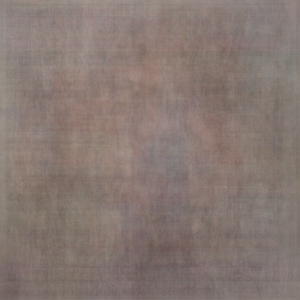

In [29]:
PIL.Image.fromarray(compressed_image_dict['humiliation'].astype(np.uint8))

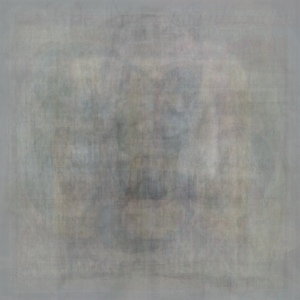

In [27]:
PIL.Image.fromarray(compressed_image_dict['ego'].astype(np.uint8))

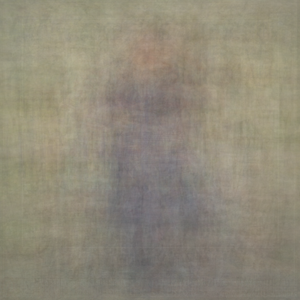

In [19]:
PIL.Image.fromarray(compressed_image_dict['modesty'].astype(np.uint8))

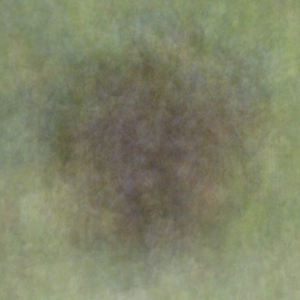

In [17]:
PIL.Image.fromarray(compressed_image_dict['grape'].astype(np.uint8))

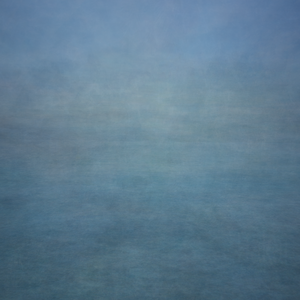

In [24]:
PIL.Image.fromarray(compressed_image_dict['ocean'].astype(np.uint8))

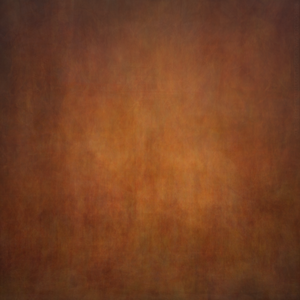

In [25]:
PIL.Image.fromarray(compressed_image_dict['fire'].astype(np.uint8))

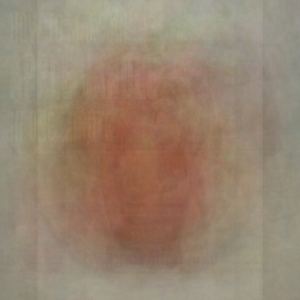

In [28]:
PIL.Image.fromarray(compressed_image_dict['apple'].astype(np.uint8))

To perform more advanced analyses of the categories and the relationships between them, we must calculate color distributions and entropy. The following 3 methods set-up necessary components for visualizations.

In [30]:
imageanalysis.save_colorgram_to_disk()
imageanalysis.compress_color_data()
imageanalysis.entropy_computations()

IndexError: tuple index out of range